# 1. Introduction


In [124]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as pyplt
%matplotlib inline
import keras as ks
from keras.callbacks import EarlyStopping
import sklearn.preprocessing as pre
import sklearn.model_selection as mod
import sklearn.decomposition as dec
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
#df = pd.DataFrame(boston.data, columns=boston.feature_names)
#df['target'] = boston.target

In [3]:
df = pd.DataFrame(boston.data)
df['Median_Value'] = boston.target

In [4]:
df.head()

0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  Median_Value  
0  396.90  4.98          24.0  
1  396.90  9.14          21.6  
2  392.83  4.03          34.7  
3  394.63  2.94          33.4  
4  396.90  5.33          36.2

### About the Dataset

This dataset was created from data taken from the 1970 United States census and other sources and used in a paper investigating the willingness of people to pay more for clean air in the Boston housing market. 

Harrison, D. and Rubinfeld, D. (1978). Hedonic housing prices and the demand for clean air. Journal of Environmental Economics and Management, 5(1), pp.81-102.

The scikit learn source includes a description file that can be printed to learn more about the dataset and it's features:

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

However, I found the above descriptions the datasets attributes to be unclear so I read the original source paper to get more detail. My updated decscriptions are included below are based on Table IV in the source paper.

|Orginal Attribute Name|New Name|Description|Assumed Relationship to Housing Values|
|:------------------------|:---------|:-----------|:------------------------------|
|CRIM|Crime_Rate|Crime rate by town|Negative|
|ZN|%_Large_Plots|Proportion of residential land zoned for large plots|Postive|
|INDUS|%_Indus|Proportion of land zoned for industrial use|Negative|
|CHAS|By_River|Boolean value for whether the land borders the Charles River|Positive|
|NOX|NOX|Nitrogen oxide concentrations in the air|Negative|
|RM|Rooms|Average number of rooms in houses|Positive|
|AGE|%_Pre_1940|Proporation of houses constructed before 1940. Older housing is of good quality in Boston|Positive|
|DIS|Dist_to_Jobs|Weighted distance to places of employment|Positive|
|RAD|Highway_Access|Index of accessabilty to highways|Positive|
|TAX|Tax|Property Tax rate in the area|Negative|
|PTRATIO|PTRatio|Pupil-Teacher ration in the area. Higher values mean more students per teacher|Negative|
|B|Blks_per_1000|Proportion of the population that are black. Regarded as undisirable by Whites|Negative|
|LSTAT|%_Lower_Status|Proportion of adults without a high school education or male laborers|Negative|

### Adding more readable column names

In [6]:
#setting columns names
df.columns = ["Crime_Rate", "%_Large_Plots", "%_Indus", "By_River", "NOX", "Rooms", "%_Pre_1940", "Dist_to_Jobs", "Highway_Access", "Tax", "PTRatio", "Blks_per_1000", "%_Lower_Status", "Median_Val"]

In [7]:
#checking the new column names line up 
df.head()

Crime_Rate  %_Large_Plots  %_Indus  By_River    NOX  Rooms  %_Pre_1940  \
0     0.00632           18.0     2.31       0.0  0.538  6.575        65.2   
1     0.02731            0.0     7.07       0.0  0.469  6.421        78.9   
2     0.02729            0.0     7.07       0.0  0.469  7.185        61.1   
3     0.03237            0.0     2.18       0.0  0.458  6.998        45.8   
4     0.06905            0.0     2.18       0.0  0.458  7.147        54.2   

   Dist_to_Jobs  Highway_Access    Tax  PTRatio  Blks_per_1000  \
0        4.0900             1.0  296.0     15.3         396.90   
1        4.9671             2.0  242.0     17.8         396.90   
2        4.9671             2.0  242.0     17.8         392.83   
3        6.0622             3.0  222.0     18.7         394.63   
4        6.0622             3.0  222.0     18.7         396.90   

   %_Lower_Status  Median_Val  
0            4.98        24.0  
1            9.14        21.6  
2            4.03        34.7  
3            2.94        33.4  
4            5.33        36.2

In [8]:
df.tail()

Crime_Rate  %_Large_Plots  %_Indus  By_River    NOX  Rooms  %_Pre_1940  \
501     0.06263            0.0    11.93       0.0  0.573  6.593        69.1   
502     0.04527            0.0    11.93       0.0  0.573  6.120        76.7   
503     0.06076            0.0    11.93       0.0  0.573  6.976        91.0   
504     0.10959            0.0    11.93       0.0  0.573  6.794        89.3   
505     0.04741            0.0    11.93       0.0  0.573  6.030        80.8   

     Dist_to_Jobs  Highway_Access    Tax  PTRatio  Blks_per_1000  \
501        2.4786             1.0  273.0     21.0         391.99   
502        2.2875             1.0  273.0     21.0         396.90   
503        2.1675             1.0  273.0     21.0         396.90   
504        2.3889             1.0  273.0     21.0         393.45   
505        2.5050             1.0  273.0     21.0         396.90   

     %_Lower_Status  Median_Val  
501            9.67        22.4  
502            9.08        20.6  
503            5.64        23.9  
504            6.48        22.0  
505            7.88        11.9

In [9]:
df.columns

Index(['Crime_Rate', '%_Large_Plots', '%_Indus', 'By_River', 'NOX', 'Rooms',
       '%_Pre_1940', 'Dist_to_Jobs', 'Highway_Access', 'Tax', 'PTRatio',
       'Blks_per_1000', '%_Lower_Status', 'Median_Val'],
      dtype='object')

# 2. Descriptive Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
Crime_Rate        506 non-null float64
%_Large_Plots     506 non-null float64
%_Indus           506 non-null float64
By_River          506 non-null float64
NOX               506 non-null float64
Rooms             506 non-null float64
%_Pre_1940        506 non-null float64
Dist_to_Jobs      506 non-null float64
Highway_Access    506 non-null float64
Tax               506 non-null float64
PTRatio           506 non-null float64
Blks_per_1000     506 non-null float64
%_Lower_Status    506 non-null float64
Median_Val        506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Distribution of values

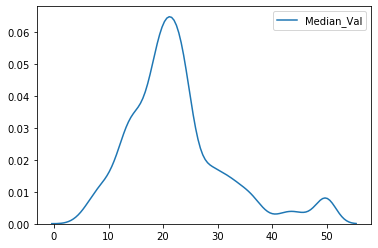

In [11]:
sns.kdeplot(df['Median_Val'])

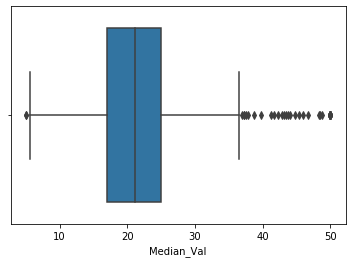

In [12]:
sns.boxplot(df['Median_Val'])

In [13]:
df.describe()

Crime_Rate  %_Large_Plots     %_Indus    By_River         NOX  \
count  506.000000     506.000000  506.000000  506.000000  506.000000   
mean     3.613524      11.363636   11.136779    0.069170    0.554695   
std      8.601545      23.322453    6.860353    0.253994    0.115878   
min      0.006320       0.000000    0.460000    0.000000    0.385000   
25%      0.082045       0.000000    5.190000    0.000000    0.449000   
50%      0.256510       0.000000    9.690000    0.000000    0.538000   
75%      3.677083      12.500000   18.100000    0.000000    0.624000   
max     88.976200     100.000000   27.740000    1.000000    0.871000   

            Rooms  %_Pre_1940  Dist_to_Jobs  Highway_Access         Tax  \
count  506.000000  506.000000    506.000000      506.000000  506.000000   
mean     6.284634   68.574901      3.795043        9.549407  408.237154   
std      0.702617   28.148861      2.105710        8.707259  168.537116   
min      3.561000    2.900000      1.129600        1.000000  187.000000   
25%      5.885500   45.025000      2.100175        4.000000  279.000000   
50%      6.208500   77.500000      3.207450        5.000000  330.000000   
75%      6.623500   94.075000      5.188425       24.000000  666.000000   
max      8.780000  100.000000     12.126500       24.000000  711.000000   

          PTRatio  Blks_per_1000  %_Lower_Status  Median_Val  
count  506.000000     506.000000      506.000000  506.000000  
mean    18.455534     356.674032       12.653063   22.532806  
std      2.164946      91.294864        7.141062    9.197104  
min     12.600000       0.320000        1.730000    5.000000  
25%     17.400000     375.377500        6.950000   17.025000  
50%     19.050000     391.440000       11.360000   21.200000  
75%     20.200000     396.225000       16.955000   25.000000  
max     22.000000     396.900000       37.970000   50.000000

There are lots of outliers in the upper range of values

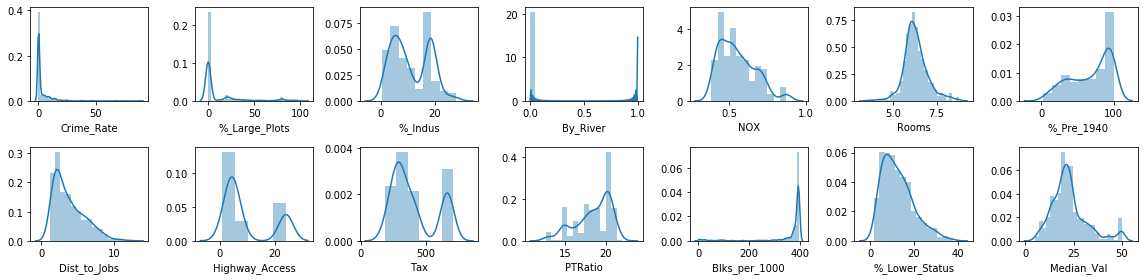

In [14]:
#distributions of the data
rows = 2
cols = 7

fig, ax = pyplt.subplots(nrows= rows, ncols= cols, figsize = (16,4))

col = df.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index = index + 1

pyplt.tight_layout()

Creating a corrolation matrix to see if there is any relationship betweek the variables.

In [15]:
corr_matrix = df.corr().round(2)
corr_matrix.style.background_gradient(cmap='coolwarm')

In [16]:
median_val_corr = corr_matrix.iloc[-1]
median_val_corr.sort_values(ascending=True)

%_Lower_Status   -0.74
PTRatio          -0.51
%_Indus          -0.48
Tax              -0.47
NOX              -0.43
Crime_Rate       -0.39
%_Pre_1940       -0.38
Highway_Access   -0.38
By_River          0.18
Dist_to_Jobs      0.25
Blks_per_1000     0.33
%_Large_Plots     0.36
Rooms             0.70
Median_Val        1.00
Name: Median_Val, dtype: float64

The average number of Rooms per House (0.7) and the % of People of Lower Status (-0.74) are the mostly strongly corrolated with the Median Value of houses

Also, worth noting the high corrolation between NOX and industrialisation (0.76) , Tax and Access to Highways (0.91)

### Corrolation and Sensitivity to different variables

1. Benefit of less NOX drops when DIS and RAD are removed. This is because the advantages of greater accessability cancel out the disadvantages of less clean air. 
2. The affect of higher NOX levels can easily be attributed to a higher proportion of lower status households. 
3. In general there is a high degree of heteroscedasticity. As X increases there is a larger variance in Y. 

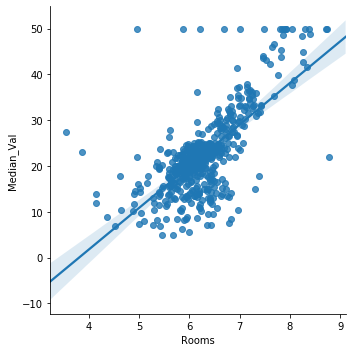

In [17]:
sns.lmplot(x="Rooms", y="Median_Val", data=df)

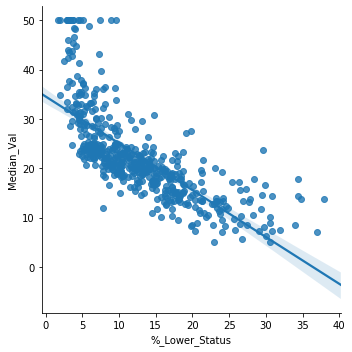

In [18]:
sns.lmplot(x="%_Lower_Status", y="Median_Val", data=df)

Looking at 2 next most closely corrolated attributes: Crime rate and Pupil teacher ratio shows there is a far less obvious relationship.

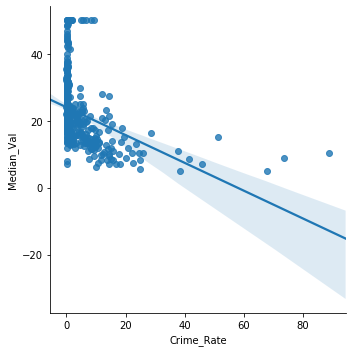

In [19]:
# lmplot of a weakly corrolated value "Distance to areas of employement (Dist_to_Jobs)"
sns.lmplot(x="Crime_Rate", y="Median_Val", data=df)

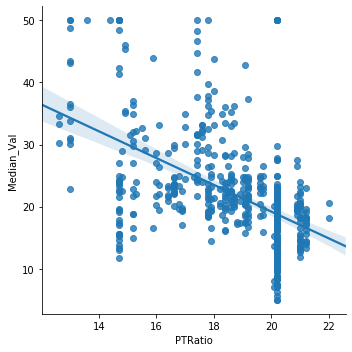

In [20]:

sns.lmplot(x="PTRatio", y="Median_Val", data=df)

The clearly seems to be a relationship between the number of rooms and the % of lower status people when plotted against the Median Value. 

# 3. Inferential Statistics

#### Objective 2: Analyse whether there is a significant difference between median house prices between houses that are along the Charles river and those that aren't.

The first attribute who's effect on housing prices that I was asked to investigate is whether the house is by the Charles River or not ("CHAS" or "By_River").

In the original paper this dataset was derived from, the authors assumed there would be a positive relationship between being next to the river and housing prices.

As I have shown above, there only seems to be a very week positive corrolation (0.18).

In order to investigate further I have performed a T-Test below..

In [21]:
# getting the count of areas next to the Charles river
count_by_river = len(df[df['By_River'] == 1.0])
count_by_river

35

In [22]:
# getting the count of areas away from the Charles River
count_away_from_river = len(df[df['By_River'] == 0.0])
count_away_from_river

471

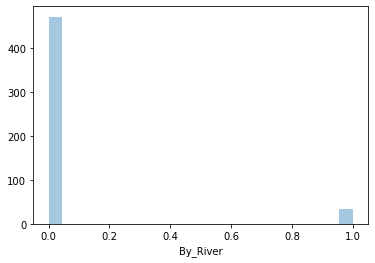

In [23]:
sns.distplot(df['By_River'], kde=False)

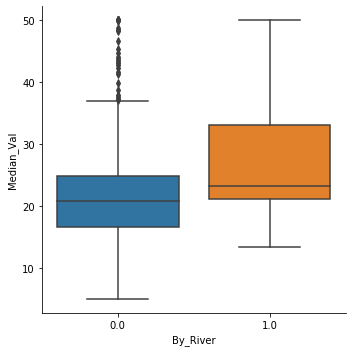

In [24]:
sns.catplot(x='By_River', y='Median_Val', kind='box', data=df)
# What do all the outliers mean

As we can see from the above counts and histogram, there are significantly more areas in our dataset that are located away from the Charles rive (471) vs next to the Charles River (35). There are also a significant number of outliers in the Median Value of houses in areas that are away from the river.

### Discuss issues with unequal sample sizes

In [25]:
next_to_river = df[df['By_River'] == 1]
away_from_river = df[df['By_River'] == 0]
next_to_river["Median_Val"].describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: Median_Val, dtype: float64

In [26]:
away_from_river["Median_Val"].describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: Median_Val, dtype: float64

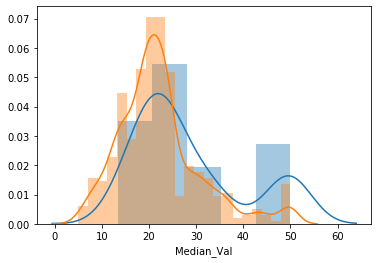

In [27]:
ax = sns.distplot(next_to_river['Median_Val'])
ax = sns.distplot(away_from_river['Median_Val'])
pyplt.rcParams["figure.figsize"] = (20,20)

### T-test

Before we can apply a T-Test, it first necessary to ensure that our datasets meet the requirements:

|#|Requirement|Pass|Reasoning|
|:------------------------|:---------|:-----------|:-----------|
|1|Dependent variable should be measured on continuous scale|YES|Median Value is measured on continuous scale|
|2|Independent variable should consist of two categorical independant groups|YES|Areas are either by or not by the river|
|3|Independence of observations|YES|None of the areas appear twice and no house appears in more than one area|
|4|There should be no significant outliers|NO|There are a number of outliers in the Median Values of houses not by the river|
|5|Dependent variable should be approximately normally distributed for each group|UNKNOWN|At first glance yes, but we will need to test to be sure|
|6|Needs to be homogeneity of variances|UNKNOWN|We will also need to test for this|


As you can see above, the first three requirements were met, but the 4th requirement was failed and the 5th and 6th requirements required further investigation before we can continue with out T-Test.

### Removing Outliers

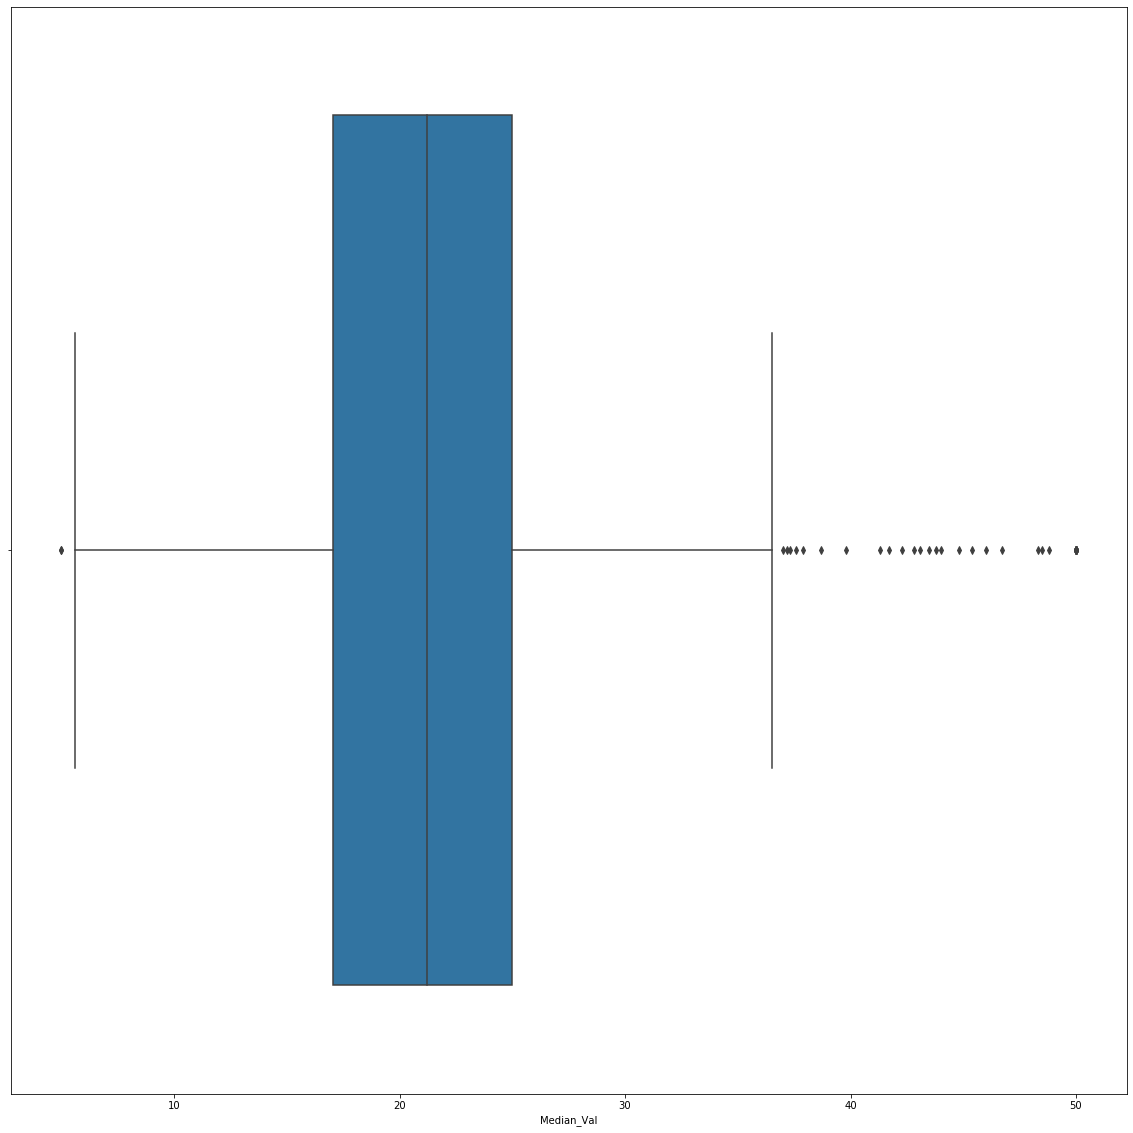

In [28]:
sns.boxplot(df['Median_Val'])

As we can see from the boxplot that we generated earlier there are a significant number of outliers in the target variable ("Median_Val"). There are also 16 areas where the median value of houses is $50,000. This indicates  that there might be a cap on values in the dataset at this value or that this value was entered where accurate information was not available. We could just remove these values, but first I will investigate how many outliers there are in total.

In order to identify the outliers we need to assign a threshold for the Median Value, above or below which we will consider the data point to be an outlier. The most obvious way of this is to follow the same method as the box-plot an remove an datapoints that are outside of the 75th and 25th percentiles. The Pandas library has a built in quantile method that can be used to calculate these thresholds.

In [29]:
Q1 = df['Median_Val'].quantile(0.25)
Q1

17.025

In [30]:
Q3 = df['Median_Val'].quantile(0.75)
Q3

25.0

In [31]:
IQR = Q3 - Q1
IQR

7.975000000000001

Now that the interquartile range has been calculated we can find the upper and lower "whisker" values for the box plot which will acts as our thresholds.

In [32]:
# calculate where the tip of the lower boxplot whisker is
lower_thresh = Q1 - 1.5 * IQR
lower_thresh

5.0624999999999964

In [33]:
# calculate where the tip of the upper boxplot whisker is
upper_thresh = Q3 + 1.5 * IQR
upper_thresh

36.962500000000006

In [34]:
# show all values that are below the lower outlier threshold
below = df.loc[df['Median_Val'] < lower_thresh]
below

Crime_Rate  %_Large_Plots  %_Indus  By_River    NOX  Rooms  %_Pre_1940  \
398     38.3518            0.0     18.1       0.0  0.693  5.453       100.0   
405     67.9208            0.0     18.1       0.0  0.693  5.683       100.0   

     Dist_to_Jobs  Highway_Access    Tax  PTRatio  Blks_per_1000  \
398        1.4896            24.0  666.0     20.2         396.90   
405        1.4254            24.0  666.0     20.2         384.97   

     %_Lower_Status  Median_Val  
398           30.59         5.0  
405           22.98         5.0

There are two data points below the lower threshold.

In [35]:
# show all values that are above the upper outlier threshold
above = df.loc[df['Median_Val'] > upper_thresh]
above

Crime_Rate  %_Large_Plots  %_Indus  By_River     NOX  Rooms  %_Pre_1940  \
97      0.12083            0.0     2.89       0.0  0.4450  8.069        76.0   
98      0.08187            0.0     2.89       0.0  0.4450  7.820        36.9   
157     1.22358            0.0    19.58       0.0  0.6050  6.943        97.4   
161     1.46336            0.0    19.58       0.0  0.6050  7.489        90.8   
162     1.83377            0.0    19.58       1.0  0.6050  7.802        98.2   
163     1.51902            0.0    19.58       1.0  0.6050  8.375        93.9   
166     2.01019            0.0    19.58       0.0  0.6050  7.929        96.2   
179     0.05780            0.0     2.46       0.0  0.4880  6.980        58.4   
180     0.06588            0.0     2.46       0.0  0.4880  7.765        83.3   
182     0.09103            0.0     2.46       0.0  0.4880  7.155        92.2   
186     0.05602            0.0     2.46       0.0  0.4880  7.831        53.6   
190     0.09068           45.0     3.44       0.0  0.4370  6.951        21.5   
195     0.01381           80.0     0.46       0.0  0.4220  7.875        32.0   
202     0.02177           82.5     2.03       0.0  0.4150  7.610        15.7   
203     0.03510           95.0     2.68       0.0  0.4161  7.853        33.2   
204     0.02009           95.0     2.68       0.0  0.4161  8.034        31.9   
224     0.31533            0.0     6.20       0.0  0.5040  8.266        78.3   
225     0.52693            0.0     6.20       0.0  0.5040  8.725        83.0   
226     0.38214            0.0     6.20       0.0  0.5040  8.040        86.5   
228     0.29819            0.0     6.20       0.0  0.5040  7.686        17.0   
232     0.57529            0.0     6.20       0.0  0.5070  8.337        73.3   
233     0.33147            0.0     6.20       0.0  0.5070  8.247        70.4   
253     0.36894           22.0     5.86       0.0  0.4310  8.259         8.4   
256     0.01538           90.0     3.75       0.0  0.3940  7.454        34.2   
257     0.61154           20.0     3.97       0.0  0.6470  8.704        86.9   
261     0.53412           20.0     3.97       0.0  0.6470  7.520        89.4   
262     0.52014           20.0     3.97       0.0  0.6470  8.398        91.5   
267     0.57834           20.0     3.97       0.0  0.5750  8.297        67.0   
268     0.54050           20.0     3.97       0.0  0.5750  7.470        52.6   
280     0.03578           20.0     3.33       0.0  0.4429  7.820        64.5   
282     0.06129           20.0     3.33       1.0  0.4429  7.645        49.7   
283     0.01501           90.0     1.21       1.0  0.4010  7.923        24.8   
291     0.07886           80.0     4.95       0.0  0.4110  7.148        27.7   
368     4.89822            0.0    18.10       0.0  0.6310  4.970       100.0   
369     5.66998            0.0    18.10       1.0  0.6310  6.683        96.8   
370     6.53876            0.0    18.10       1.0  0.6310  7.016        97.5   
371     9.23230            0.0    18.10       0.0  0.6310  6.216       100.0   
372     8.26725            0.0    18.10       1.0  0.6680  5.875        89.6   

     Dist_to_Jobs  Highway_Access    Tax  PTRatio  Blks_per_1000  \
97         3.4952             2.0  276.0     18.0         396.90   
98         3.4952             2.0  276.0     18.0         393.53   
157        1.8773             5.0  403.0     14.7         363.43   
161        1.9709             5.0  403.0     14.7         374.43   
162        2.0407             5.0  403.0     14.7         389.61   
163        2.1620             5.0  403.0     14.7         388.45   
166        2.0459             5.0  403.0     14.7         369.30   
179        2.8290             3.0  193.0     17.8         396.90   
180        2.7410             3.0  193.0     17.8         395.56   
182        2.7006             3.0  193.0     17.8         394.12   
186        3.1992             3.0  193.0     17.8         392.63   
190        6.4798             5.0  398.0     15.2         377.68   


In [36]:
above["Median_Val"].count()

38

There are 38 datapoints that are higher that the upper threshold. We can create a dataset called "no_outliers" that does not contain any outliers by removing both these groups.

In [37]:
no_outliers = df[((df['Median_Val'] > lower_thresh) & (df['Median_Val'] < upper_thresh))]
no_outliers

Crime_Rate  %_Large_Plots  %_Indus  By_River    NOX  Rooms  %_Pre_1940  \
0       0.00632           18.0     2.31       0.0  0.538  6.575        65.2   
1       0.02731            0.0     7.07       0.0  0.469  6.421        78.9   
2       0.02729            0.0     7.07       0.0  0.469  7.185        61.1   
3       0.03237            0.0     2.18       0.0  0.458  6.998        45.8   
4       0.06905            0.0     2.18       0.0  0.458  7.147        54.2   
..          ...            ...      ...       ...    ...    ...         ...   
501     0.06263            0.0    11.93       0.0  0.573  6.593        69.1   
502     0.04527            0.0    11.93       0.0  0.573  6.120        76.7   
503     0.06076            0.0    11.93       0.0  0.573  6.976        91.0   
504     0.10959            0.0    11.93       0.0  0.573  6.794        89.3   
505     0.04741            0.0    11.93       0.0  0.573  6.030        80.8   

     Dist_to_Jobs  Highway_Access    Tax  PTRatio  Blks_per_1000  \
0          4.0900             1.0  296.0     15.3         396.90   
1          4.9671             2.0  242.0     17.8         396.90   
2          4.9671             2.0  242.0     17.8         392.83   
3          6.0622             3.0  222.0     18.7         394.63   
4          6.0622             3.0  222.0     18.7         396.90   
..            ...             ...    ...      ...            ...   
501        2.4786             1.0  273.0     21.0         391.99   
502        2.2875             1.0  273.0     21.0         396.90   
503        2.1675             1.0  273.0     21.0         396.90   
504        2.3889             1.0  273.0     21.0         393.45   
505        2.5050             1.0  273.0     21.0         396.90   

     %_Lower_Status  Median_Val  
0              4.98        24.0  
1              9.14        21.6  
2              4.03        34.7  
3              2.94        33.4  
4              5.33        36.2  
..              ...         ...  
501            9.67        22.4  
502            9.08        20.6  
503            5.64        23.9  
504            6.48        22.0  
505            7.88        11.9  

[466 rows x 14 columns]

We can then compare what our two populations look like with the outliers removed.

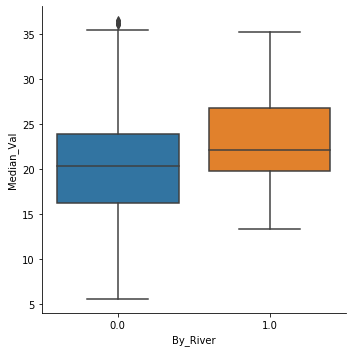

In [38]:

sns.catplot(x='By_River', y='Median_Val', kind='box', data=no_outliers)

### The dependant varibale needs to be approxmately normally distributed in each group.

In order to test this I created two new groups from the "no_outliers" dataset.

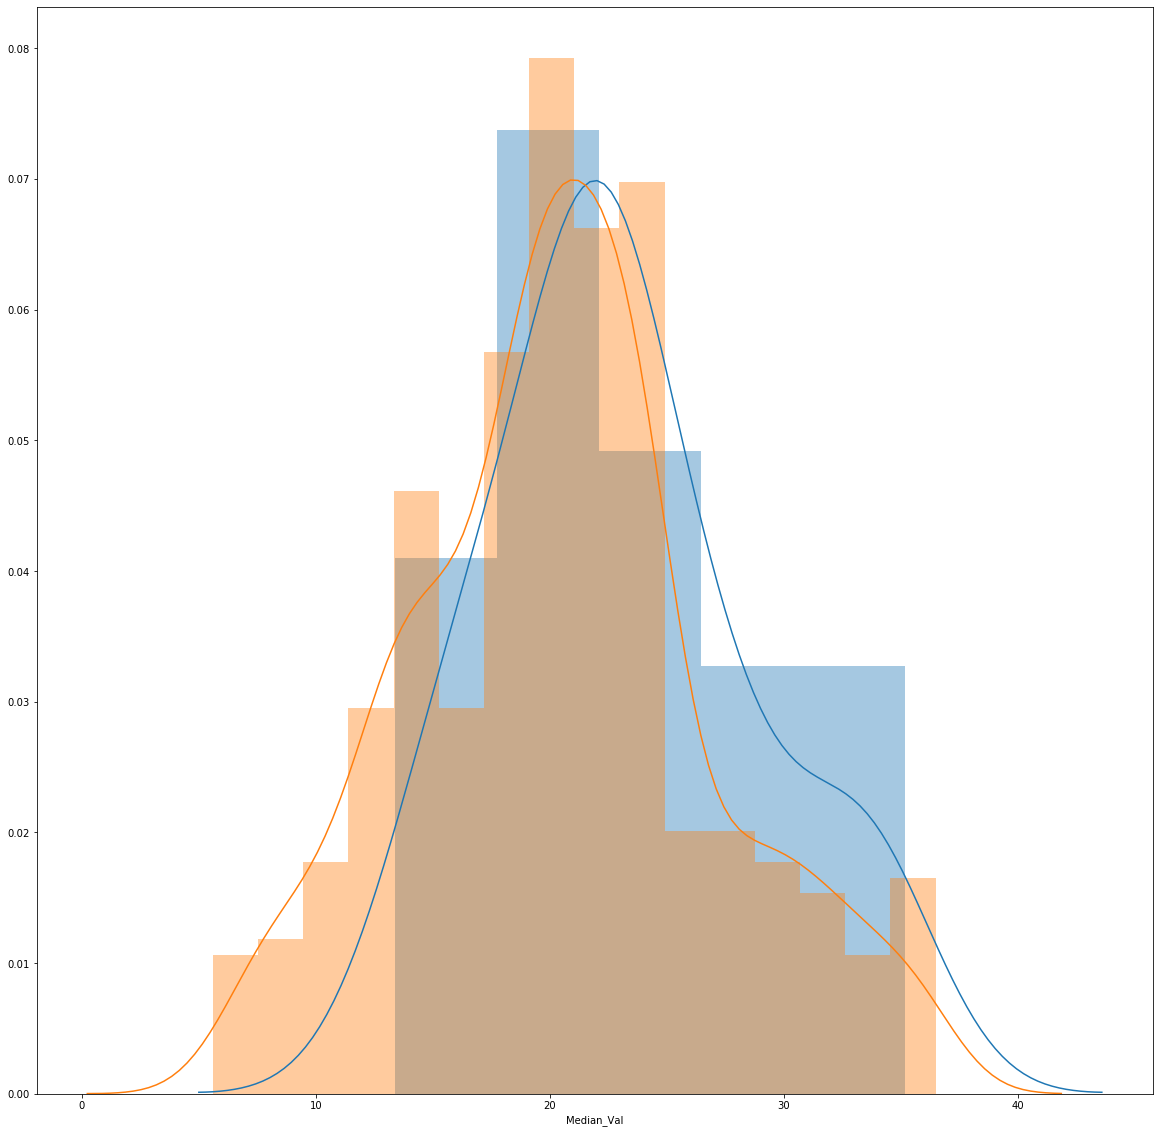

In [39]:
cleansed_next_to_river = no_outliers[no_outliers['By_River'] == 1]
cleansed_away_from_river = no_outliers[no_outliers['By_River'] == 0]

ax = sns.distplot(cleansed_next_to_river['Median_Val'])
ax = sns.distplot(cleansed_away_from_river['Median_Val'])
pyplt.rcParams["figure.figsize"] = (20,20)

From looking at the two "cleansed" datasets it can be observed that both are much closer to appearing to be normally distributed. However, we will need to test for this using Scipys "normaltest" function.

In [40]:
from scipy import stats
next_to_river_Ntest = stats.normaltest(cleansed_next_to_river['Median_Val'])
away_from_river_Ntest = stats.normaltest(cleansed_away_from_river['Median_Val'])
print(next_to_river_Ntest)
print(away_from_river_Ntest)


NormaltestResult(statistic=1.289316190319236, pvalue=0.5248419574390437)
NormaltestResult(statistic=3.405851916816045, pvalue=0.1821497808954563)


For both groups the Pvalue is greater than the alpha threshold(0.05). We can therefore say with a good degree of certainty that the data is normally distributed.
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

### Homogenity of Variances

Homogeneity of variance is an assumption underlying t tests in which the population variances (i.e., the distribution, or “spread,” of scores around the mean) of two or more samples are considered equal. In correlations and regressions, the term “homogeneity of variance in arrays,” also called “homoskedasticity,” refers to the assumption that, within the population, the variance of Y for each value of X is constant.

In order to perform a valid ttest we need to check if both samples have similar variances. Levenes test can be used to do this it. It tests the null hypothosis that variances are equal. 

In [41]:
# 
stats.levene(cleansed_next_to_river['Median_Val'], cleansed_away_from_river['Median_Val'])

LeveneResult(statistic=0.7964820987689898, pvalue=0.3726098479576784)

The Pvalue is greater than the threshold of 0.05 so we can say that there is no signifcant difference in the variances of both groups.

In [42]:
# variance of median values of houses next to the river
print(np.var(cleansed_next_to_river['Median_Val']))

31.402091836734694


In [43]:
# variance of values of house in areas away from the river
print(np.var(cleansed_away_from_river['Median_Val']))

41.76279086132484


### Summary of T Test Requirement Statuses

|#|Requirement|Pass|Reasoning|
|:------------------------|:---------|:-----------|:-----------|
|1|Dependent variable should be measured on continuous scale|YES|Median Value is measured on continuous scale|
|2|Independent variable should consist of two categorical independant groups|YES|Areas are either by or not by the river|
|3|Independence of observations|YES|None of the areas appear twice and no house appears in more than one area|
|4|There should be no significant outliers|YES|There were originally, but they have removed them.|
|5|Dependent variable should be approximately normally distributed for each group|YES|Both groups are approximately normally distrubuted.|
|6|Needs to be homogeneity of variances|YES|There is homogenity of variances|


### T Test Results

Since all the requirements were met, it was appropriate to proceed with the T Test.

In [44]:
stats.ttest_ind(cleansed_next_to_river['Median_Val'], cleansed_away_from_river['Median_Val'])

Ttest_indResult(statistic=2.100509858104912, pvalue=0.03622310352018016)

The purpose of the current study was to test if there is a significant difference in the Median_Value between the house prices in areas by or not by the Charles River in Boston.

In [45]:
import researchpy as rp

tt_descriptives, tt_results = rp.ttest(cleansed_next_to_river['Median_Val'], cleansed_away_from_river['Median_Val'])

tt_descriptives

Variable      N       Mean        SD        SE  95% Conf.   Interval
0  Median_Val   28.0  23.192857  5.706587  1.078444  20.980074  25.405640
1  Median_Val  438.0  20.560959  6.469804  0.309139  19.953375  21.168543
2    combined  466.0  20.719099  6.451416  0.298856  20.131823  21.306374

In [46]:
tt_results

Independent t-test   results
0  Difference (Median_Val - Median_Val) =     2.6319
1                    Degrees of freedom =   464.0000
2                                     t =     2.1005
3                 Two side test p value =     0.0362
4                Difference < 0 p value =     0.9819
5                Difference > 0 p value =     0.0181
6                             Cohen's d =     0.4095
7                             Hedge's g =     0.4088
8                         Glass's delta =     0.4612
9                                     r =     0.0971

The results of the test show a P value of 0.0362. This is lower than the 0.05 giving a strong indication that we can reject the null hypothesis that there is no difference between Median Value of houses in areas that are by or away from the Charles River in Boston. If the value was greater than 0.05 this would indicate that there was no difference between the two groups.

We can thereforce conclude that there is a significant difference between the housing prices for houses along the Charles River and those not along the Charles River.

# 4. Predictions


#### Objective 3: Predict the median house prcie based on the other variables in the dataset using neural network

## 4.1 Pre-Processing

Preprocessing is an integral step in Machine Learning. Quality of the data must be as good as possible before feeding into the model.

There are a number of different steps we can take to preprocesss the data and ensure the quality of the data:

1. Deal with any Null values
2. Deal with Categorical Variables
3. Standardise the Data


### 4.1.1 Null Values

First we will check to ensure if our cleansed dataset contains any Null values. If there are Null values, the row containing the value will be need to be removed of the value will need to be replaced.

In [47]:
no_outliers.isnull().sum()

Crime_Rate        0
%_Large_Plots     0
%_Indus           0
By_River          0
NOX               0
Rooms             0
%_Pre_1940        0
Dist_to_Jobs      0
Highway_Access    0
Tax               0
PTRatio           0
Blks_per_1000     0
%_Lower_Status    0
Median_Val        0
dtype: int64

As we can see, no of the columns contain Null values. So we can move on.

### 4.1.2 Check for Categorical Variables

As we have already seen there is one categorical variable in the dataset showing whether the area is located by or away from the Charles River.

Luckily this has already been coverted into a "dummy variable" of 0 for No and 1 for Yes. Therefore we dont have to do any encoding or processing of this variable.

In [48]:
no_outliers["By_River"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: By_River, Length: 466, dtype: float64

### 4.1.3 Standardise / Normalise the Data

In standardisation we transform all values such that the means of the values is 0 and the standard deviation is 1.

This helps to prevent a machine learning model from giving a different weight to values that are at a different scale to other values. For example, if we look at the below we can see that variables like the number of black people per 1000 is always going to be higher than the number of Rooms in a house or the Pupil Teacher Ratio.

In [49]:
no_outliers.head()

Crime_Rate  %_Large_Plots  %_Indus  By_River    NOX  Rooms  %_Pre_1940  \
0     0.00632           18.0     2.31       0.0  0.538  6.575        65.2   
1     0.02731            0.0     7.07       0.0  0.469  6.421        78.9   
2     0.02729            0.0     7.07       0.0  0.469  7.185        61.1   
3     0.03237            0.0     2.18       0.0  0.458  6.998        45.8   
4     0.06905            0.0     2.18       0.0  0.458  7.147        54.2   

   Dist_to_Jobs  Highway_Access    Tax  PTRatio  Blks_per_1000  \
0        4.0900             1.0  296.0     15.3         396.90   
1        4.9671             2.0  242.0     17.8         396.90   
2        4.9671             2.0  242.0     17.8         392.83   
3        6.0622             3.0  222.0     18.7         394.63   
4        6.0622             3.0  222.0     18.7         396.90   

   %_Lower_Status  Median_Val  
0            4.98        24.0  
1            9.14        21.6  
2            4.03        34.7  
3            2.94        33.4  
4            5.33        36.2

Before we scale the data it needs to be split into the independent and dependent variables for the model.

It also a good idea to shuffle the data before going any further. 

In [50]:
no_outliers = shuffle(no_outliers)

In [51]:
# create the input from the first 13 variables
# output is the Median Value
x_input = no_outliers.iloc[:, 0:13]
y_output = no_outliers["Median_Val"]

The data then needs to be split into the testing and training sets. For this project we will use a 80:20 train:test split. 

We can use Sklearns model selection tool for this.

In [52]:
#train test splitting
x_train, x_test, y_train, y_test = mod.train_test_split(x_input, y_output, test_size=0.2)

In [53]:
x_train.iloc[0]

Crime_Rate          0.12757
%_Large_Plots      30.00000
%_Indus             4.93000
By_River            0.00000
NOX                 0.42800
Rooms               6.39300
%_Pre_1940          7.80000
Dist_to_Jobs        7.03550
Highway_Access      6.00000
Tax               300.00000
PTRatio            16.60000
Blks_per_1000     374.71000
%_Lower_Status      5.19000
Name: 243, dtype: float64

Once the data is split into testing and training sets it can be scaled.


In [54]:
scaler = pre.StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_input.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_input.columns)

In [55]:
x_train.iloc[0]

Crime_Rate       -0.411483
%_Large_Plots     0.922293
%_Indus          -0.977909
By_River         -0.256715
NOX              -1.132619
Rooms             0.366405
%_Pre_1940       -2.188268
Dist_to_Jobs      1.618857
Highway_Access   -0.426543
Tax              -0.667663
PTRatio          -1.022009
Blks_per_1000     0.234254
%_Lower_Status   -1.171055
Name: 0, dtype: float64

##  4.2 Baseline prediction test

At this stage I performed an inital test of the model to act as a performance baseline. I tuned this model further following this test.

In [56]:
# Defining the Baseline test model
m = ks.models.Sequential()
m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
m.add(ks.layers.Dense(1))
m.compile(loss="mean_squared_error", optimizer="adam")


In [57]:

m.fit(x_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
372/372 [==============================] - 2s 4ms/step - loss: 425.7181
Epoch 2/100
372/372 [==============================] - 0s 744us/step - loss: 379.9739
Epoch 3/100
372/372 [==============================] - 0s 680us/step - loss: 329.1842
Epoch 4/100
372/372 [==============================] - 0s 459us/step - loss: 272.4338
Epoch 5/100
372/372 [==============================] - 0s 408us/step - loss: 215.8953
Epoch 6/100
372/372 [==============================] - 0s 390us/step - loss: 164.1906
Epoch 7/100
372/372 [==============================] - 0s 398us/step - loss: 122.3884
Epoch 8/100
372/372 [==============================] - 0s 383us/step - loss: 92.2671
Epoch 9/100
372/372 [==============================] - 0s 402us/step - loss: 71.9848
Epoch 10/100
372/372 [==============================] - 0s 403us/step - loss: 59.0126
Epoch 11/100
372/372 [==============================] - 0s 394us/step - loss: 50.2945
Epoch 12/100
372/372 [==============================] - 0s

372/372 [==============================] - 0s 315us/step - loss: 6.1766
Epoch 97/100
372/372 [==============================] - 0s 312us/step - loss: 6.2623
Epoch 98/100
372/372 [==============================] - 0s 334us/step - loss: 6.1904
Epoch 99/100
372/372 [==============================] - 0s 345us/step - loss: 6.1215
Epoch 100/100
372/372 [==============================] - 0s 341us/step - loss: 6.0960


In [58]:
# show the predicted prices for the test input variables
MedianVal_prediction = m.predict(x_test).T
MedianVal_prediction

array([[24.53861  , 26.847311 , 21.512087 , 24.89177  , 21.016949 ,
         7.8704867, 22.313072 , 32.924664 , 27.65185  , 26.099958 ,
        26.393927 , 21.428862 , 18.484034 , 16.869347 , 26.208393 ,
        23.240522 , 24.264046 ,  9.7442045, 19.399017 ,  8.895097 ,
         8.383978 ,  7.682259 , 21.841702 , 21.375822 , 18.004877 ,
        27.435276 , 30.314383 , 26.996418 , 19.238747 , 16.242903 ,
        25.495987 , 17.260868 , 18.395313 , 31.531506 , 33.39331  ,
        20.798819 , 24.0331   , 22.681046 , 29.960407 , 22.02816  ,
        15.611133 , 18.785685 , 18.655598 , 24.726128 , 25.031607 ,
        10.122406 , 21.086262 , 15.546076 , 17.876038 , 18.121258 ,
        16.19126  , 18.150959 , 24.978176 , 24.956038 , 14.139359 ,
        20.221209 , 12.201607 , 15.28638  , 21.998785 , 21.722866 ,
        33.434498 , 22.46616  , 18.381828 , 30.129505 , 22.72794  ,
        20.073153 , 18.579884 , 12.455729 , 19.088717 , 27.798868 ,
        17.136017 , 30.815765 , 25.260439 , 25.6

In [59]:
#show the real values
MedianVal_real = y_test.as_matrix().astype(np.float32)
MedianVal_real

d:\data_analytics\machine_learning_stats\machinelearning-and-statistics-project\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([24.6, 29.1, 19.4, 23.2, 24.5,  5.6, 23. , 32.7, 30.5, 28.7, 22.5,
       20. , 17.5, 27.9, 28.7, 23.4, 23.1, 13.1, 19.3,  8.7,  8.5,  7.2,
       23.2, 21.7, 19.3, 29. , 28.5, 29.6, 20.9, 15.1, 25.1, 17.5, 16.7,
       34.9, 33.8, 21.7, 24.4, 24.1, 33. , 22.2, 15.2, 19.4, 17.5, 22.8,
       23.9,  6.3, 25. , 14.9, 13.1, 19.4, 13.6, 20.1, 27.1, 16.5, 17.1,
       15. , 12.8, 13.8, 19.3, 20.3, 33.1, 21.4, 16.1, 34.7, 18.5, 20.4,
       17.8, 13.9, 22.5, 28. , 15.6, 30.7, 23.9, 24.7, 21.7, 19.2, 24.5,
       19.3, 24.3, 22.3, 12.7, 24.8, 18.8, 14.4, 20.3, 20.1, 14.9, 22.9,
       22. , 21.4, 23.8, 10.9, 20.6, 10.4], dtype=float32)

In [60]:
# Show prediction vs real side by side with difference between the two
predicted_V_real_df = pd.DataFrame({'Prediction': MedianVal_prediction.ravel(), 'Real_value': MedianVal_real.ravel()})
predicted_V_real_df['%Difference'] = 100*(abs(predicted_V_real_df['Prediction'] - predicted_V_real_df['Real_value'])/predicted_V_real_df['Prediction'])
predicted_V_real_df

Prediction  Real_value  %Difference
0    24.538610   24.600000     0.250177
1    26.847311   29.100000     8.390745
2    21.512087   19.400000     9.818142
3    24.891769   23.200001     6.796498
4    21.016949   24.500000    16.572582
..         ...         ...          ...
89   17.563278   21.400000    21.845133
90   23.518618   23.799999     1.196421
91   13.600981   10.900000    19.858725
92   21.847189   20.600000     5.708691
93   11.153535   10.400000     6.756022

[94 rows x 3 columns]

In [61]:
# average of the percentage difference
predicted_V_real_df['%Difference'].mean()

9.461681

In [62]:
# Evaluate the accuracy 
m.evaluate(x_test, y_test)

94/94 [==============================] - 0s 244us/step


6.555816853300054

## 4.3 Factors to Consider When Creating a Model

Before going any further it is worth outlining my reasoning for selecting the options that I did when creating this Baseline model and considerations for improving the model in later iterations.

#### Model Selection

I used the Sequential Model. This is "default" model for Keras. It functions by adding sequential layers of neurons. Inputs are fed into the first layers with outputs being passed on to subsequent layers. 

In the Baseline Test I have just added an input later that takes in 13 variables, and an output layers that gives out a single values (Y).

There is also the option to create custom "functional models" in Keras, but this was not necessary what we are trying to achieve.

#### Density

This is the layer type. In this type all node/neurons in the next layer are connected to all nodes in the previous layer. This is the best layer type for this projects use case. However, other layer types exist, such as Convolutional Layers (used for image prediction) and Recurrent Layers (used for time series data). 

#### Number of Layers

For the baseline we have added 1 input later and 1 output layer. This is the absolute minimum number we can have. There is also an single "hidden layer" automatically created from the outputs of the input layer.

In the case of linear and generalized linear models , having no hidden layers is enough and increasing this number doesn't necessarily improve the performance of the model. However, if there are mutliple inputs (such as in our data) having up to 2 hidden layers can help to improve accuracy, but there is no set rules for what will deliver the best results. [1][2]. 

I will introduce additional layers in later iterations of the model.

#### Number of Units per Layer

The number of input units should match the number of variables being inputted while the number of output units should match the number of outputs required. In this case we have 13 input variables and required 1 output. This is what has been entered into the Baseline test.

The number of units in a hidden layer depends on a number of factors [3]:

* the numbers of input and output units 
* the number of training cases 
* the amount of noise in the targets 
* the complexity of the function or classification to be learned 
* the architecture 
* the type of hidden unit activation function 
* the training algorithm 
* regularization 
 
Having too few or too many hidden units can result in underfitting and overfitting respectively reducing accuracy. 

There are some rules of thumb such as:
* somewhere between the size of the input and output layer
* (inputs + outputs) x 2/3
* never more than twice the number of the input layer

These fail to take account of size of the training dataset and other considerations [3]. 

We will expriment with different unit sizes in later iterations.



#### Activation Function

Choosing an appropriate activation function is one of the most important considerations when designing a model. An activation function is the non-linear transformation that is performed on the input data to create the output. In the absense of an activation function the model is just a linear regression model[4].

Different activation functions have different use cases. For example, Binary Step Functions is used in classification where there are only two choices. This is obviously not suitable for this projects dataset, but there are several others that are worth considering. 

##### Linear 
* Assumes input is proportional to output 
* Only suitable for simple tasks as each layer in the model only does a linear transformation of the output of the previous layer and passes it on.
* This is also the default function in Keras if no other function is specified.

##### Sigmoid 
* Non-linear
* Tries to push Y values to extremes making it useful for classification

##### Tanh 
* Essentially a scalled version of the Sigmoid function

##### ReLU
* The most widely used activation function.
* Full name is Rectified Linear Unit
* It's non-linear allowing for back propigation of erros. 
* Allows for mutliple layers of activated by the ReLU function. 
* ReLu should only be used in hidden layers.

As a rule of thumb, ReLu should be the first port of call when creating a model. If it's results are not optimal, then other functions can be considered [7]. This is why ReLU was used in the Baseline Model. The output was left at the default linear function. 




#### Loss Function

This is the method used to find the error between the actual values and predicted value. Different metrics are used for different use cases. 

For regression problems the best option is "mean-squared error" [6].

#### Optimizer

Optimizers try to minimise the loss function and make predictions as correct as possible. They do this by updating the model in response to the output of the loss function[10]. 

Adam is generally recommended as the best optimizer to use [8] along with SGD using Nestorov momentum[9]. I have used Adam in the baseline model and given that Adam incorporates many of the good features of SGD I do not think there would be much value in using other optimizers.

#### Epochs

An epoch is single pass of the entire training dataset through a machine learning model.

One pass is not enough as the model is learning each time the model is passed through. If there are too many epochs the model will go from underfitting to overfitting. That being said, there is no fixed rule on how many epochs is best for a given dataset [11]. 

In our Baseline Model we have set the model to perform 100 epochs. We will try larger numbers of epochs in later iterations. 

#### Batch Size

The batch size is the number of samples processed before the model is updated. For example, in the Baseline Model the batch size is 5. There are 372 samples (rows) in the training dataset so the date will be divided into 74 batches each with 5 rows. Therefore each epoch will involved 74 updates to the model. 

Generally, batch sizes are set to values that are to the power of 2 e.g. 32, 64, 128 etc. A good default batch size is 32 with smaller batches tending to give better results [12]. 


## 4.4 Model Tuning - Round 1

I will now test updating the model based on some of the possible improvements discussed above

1. Decreasing batch sizes beginning at 32
2. Increasing number of epochs starting at 100
3. Varied Layer Sizes
4. Increased numbers of layers

I will not be changing:
1. Activation functions
2. Loss function
3. Optimizer
From my investigation, the options in the Baseline Model already seem to be the best fit for the dataset.

### 4.4.1 Batch Sizes

###### Test 1-  Increasing Batch Size to 32


In [63]:
# Test 1
# m = ks.models.Sequential()
# m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
# m.add(ks.layers.Dense(1))

# m.compile(loss="mean_squared_error", optimizer="adam")

# m.fit(x_train, y_train, epochs=100, batch_size=32)

# batch_test1_prediction = m.predict(x_test).T

# MedianVal_real = y_test.as_matrix().astype(np.float32)

# result_batch1 = m.evaluate(x_test, y_test)

In [64]:
# result_batch1

26.539871296984085

###### Test 2 - Batch Size to 16

In [65]:
# Test 2
# m = ks.models.Sequential()
# m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
# m.add(ks.layers.Dense(1))

# m.compile(loss="mean_squared_error", optimizer="adam")

# m.fit(x_train, y_train, epochs=100, batch_size=16)

# batch_test1_prediction = m.predict(x_test).T

# MedianVal_real = y_test.as_matrix().astype(np.float32)

# result_batch2 = m.evaluate(x_test, y_test)

In [66]:
# result_batch2

12.633492307460054

###### Test 3 - Batch Size to 4

In [67]:
# Test 3
# m = ks.models.Sequential()
# m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
# m.add(ks.layers.Dense(1))

# m.compile(loss="mean_squared_error", optimizer="adam")

# m.fit(x_train, y_train, epochs=100, batch_size=4)

# batch_test1_prediction = m.predict(x_test).T

# MedianVal_real = y_test.as_matrix().astype(np.float32)

# result_batch3 = m.evaluate(x_test, y_test)

In [68]:
# result_batch3

7.892184135761667

###### Test 4 - Batch Size to 2

In [69]:
# Test 4
# m = ks.models.Sequential()
# m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
# m.add(ks.layers.Dense(1))

# m.compile(loss="mean_squared_error", optimizer="adam")

# m.fit(x_train, y_train, epochs=100, batch_size=2)

# batch_test1_prediction = m.predict(x_test).T

# MedianVal_real = y_test.as_matrix().astype(np.float32)

# result_batch4 = m.evaluate(x_test, y_test)

In [70]:
# result_batch4

8.877476955981965

#### 4.4.1.1 Commentary

I tested batch sizes multiple times and the results for 2 vs 4 batches was inconclusive. Sometimes 2 performed better and sometimes 4 performed better.

In order to get a more conclusive answer I test each five times and got the average of the tests.

In [71]:
# function to test batch sizes with 10 test and average of results

# def batchsize_test(tests, b_size):
#     counter = 0
#     resultslist = []
#     while counter < tests:
#         m = ks.models.Sequential()
#         m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
#         m.add(ks.layers.Dense(1))

#         m.compile(loss="mean_squared_error", optimizer="adam")

#         m.fit(x_train, y_train, epochs=100, batch_size=b_size)

#         batch_test1_prediction = m.predict(x_test).T

#         MedianVal_real = y_test.as_matrix().astype(np.float32)

#         result_batch3 = m.evaluate(x_test, y_test)
#         counter += 1
#         resultslist.append(result_batch3)
#     avg_result = sum(resultslist) / tests
#     return avg_result

#print(batchsize_test(5, 2))

In [72]:
#print(batchsize_test(5, 4))

###### Result of tests:

A batch size of 2 seems to perform marginally better. Given that we are dealing with a relatively small dataset memory isn't an issue so we should there is no reason not to use the smaller batch size. 

### 4.4.2 Number of Epochs

###### Test 1 - 500 Epochs

In [73]:
# Test 1
# m = ks.models.Sequential()
# m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
# m.add(ks.layers.Dense(1))

# m.compile(loss="mean_squared_error", optimizer="adam")

# history = m.fit(x_train, y_train, epochs=500, batch_size=2)

# epoch_test1_prediction = m.predict(x_test).T

# MedianVal_real = y_test.as_matrix().astype(np.float32)

# result_epochv1 = m.evaluate(x_test, y_test)

In [74]:
# print(history.history.keys())

In [75]:
# pyplt.plot(history.history['loss'])
# pyplt.title('model loss')
# pyplt.ylabel('loss')
# pyplt.xlabel('epoch')
# pyplt.legend(['train', 'test'], loc='upper left')
# pyplt.show()

In [76]:
# result_epochv1

8.384088232162151

From looking at the above results there definitely seems to deminishing returns or even signs of overfitting after the 300 epoch mark. With that it may be best to introduce early stopping once the loss metric stops reducing.  

###### Test 2 - 500 Epochs with Early Stopping

In [77]:
# Test 2
# 
# m = ks.models.Sequential()
# m.add(ks.layers.Dense(13, input_dim=13, activation="relu"))
# m.add(ks.layers.Dense(1))

# m.compile(loss="mean_squared_error", optimizer="adam")

# #add early stopping
# es = EarlyStopping(monitor='loss', patience=10, verbose=1)

# history = m.fit(x_train, y_train, epochs=500, batch_size=2, callbacks=[es])

# ES_prediction = m.predict(x_test).T

# MedianVal_real = y_test.as_matrix().astype(np.float32)

# result_ES = m.evaluate(x_test, y_test)

In [78]:
# result_ES

8.051695742505663

#### 4.4.2.1 Commentary

Early stopping kicked in at before the 230 epoch mark in most test. This is even when the test was set to only stop when the loss value had no descresed for the previous 10 epochs.

In future there is probably no benefit to be gained from going over 250 Epochs

### 4.4.3 Number of Units per Layer

###### Test 1 - (inputs + outputs) x 2/3

One heuristic is that the number of units in the  hidden layer should be calculated using the above formula. We will test this first.

In [79]:
14*(2/3)


9.333333333333332

In [80]:
# Test 1
# m = ks.models.Sequential()
# m.add(ks.layers.Dense(9, input_dim=13, activation="relu"))
# m.add(ks.layers.Dense(1))

# m.compile(loss="mean_squared_error", optimizer="adam")

# #add early stopping
# es = EarlyStopping(monitor='loss', patience=10, verbose=1)

# history = m.fit(x_train, y_train, epochs=250, batch_size=2, callbacks=[es])

# layersize9_prediction = m.predict(x_test).T

# MedianVal_real = y_test.as_matrix().astype(np.float32)

# result_layerN9 = m.evaluate(x_test, y_test)

In [81]:
# result_layerN9

8.323373987319622

###### Test 2 - Twice the number of Inputs

One heuristics is that the number of units in the hidden layer should not be over twice the number of inputs.

In [82]:
# Test 2
# m = ks.models.Sequential()
# m.add(ks.layers.Dense(26, input_dim=13, activation="relu"))
# m.add(ks.layers.Dense(1))

# m.compile(loss="mean_squared_error", optimizer="adam")

# #add early stopping
# es = EarlyStopping(monitor='loss', patience=10, verbose=1)

# history = m.fit(x_train, y_train, epochs=250, batch_size=2, callbacks=[es])

# layersize26_prediction = m.predict(x_test).T

# MedianVal_real = y_test.as_matrix().astype(np.float32)

# result_layerN26 = m.evaluate(x_test, y_test)

In [83]:
# result_layerN26

7.729459732136828

###### Test 3 - Quadrupel the Input

In [84]:
# m = ks.models.Sequential()
# m.add(ks.layers.Dense(52, input_dim=13, activation="relu"))
# m.add(ks.layers.Dense(1))

# m.compile(loss="mean_squared_error", optimizer="adam")

# #add early stopping
# es = EarlyStopping(monitor='loss', patience=10, verbose=1)

# history = m.fit(x_train, y_train, epochs=250, batch_size=2, callbacks=[es])

# layersize52_prediction = m.predict(x_test).T

# MedianVal_real = y_test.as_matrix().astype(np.float32)

# result_layerN52 = m.evaluate(x_test, y_test)

In [85]:
# result_layerN52

5.981633308085989

Results appear inconclusive again. Need to test mutliple times and get an average.

In [86]:
# def unitsize_test(tests, batchsize, unit_size):
#     counter = 0
#     resultslist = []
#     while counter < tests:
#         m = ks.models.Sequential()
#         m.add(ks.layers.Dense(unit_size, input_dim=13, activation="relu"))
#         m.add(ks.layers.Dense(1))

#         m.compile(loss="mean_squared_error", optimizer="adam")
        
#         es = EarlyStopping(monitor='loss', patience=10, verbose=1)
        
#         m.fit(x_train, y_train, epochs=300, batch_size=batchsize, callbacks=[es])

#         #unit_prediction = m.predict(x_test).T

#         #MedianVal_real = y_test.as_matrix().astype(np.float32)

#         result_units = m.evaluate(x_test, y_test)
#         counter += 1
#         resultslist.append(result_units)
#     avg_result = sum(resultslist) / tests
#     return avg_result

In [87]:
# hidden layer size = 26
# batch size = 2
# epoch = 300 - with early stopping
#print(unitsize_test(5, 2, 26))

Result was 8.461502002147919

In [88]:
# hidden layer size = 26
# batch size = 4
# epoch = 300 - with early stopping
#print(unitsize_test(5, 4, 26))

Result was 7.670181302821382

In [89]:
# hidden layer size = 52
# batch size = 2
# epoch = 300 - with early stopping
#print(unitsize_test(5, 2, 52))

Result was 8.024365358149751

In [90]:
# hidden layer size = 52
# batch size = 4
# epoch = 300 - with early stopping
#print(unitsize_test(5, 4, 52))

Result was 7.862417864292226

In [91]:
# hidden layer size = 64
# batch size = 2
# epoch = 300 - with early stopping
#print(unitsize_test(5, 2, 64))

Result was 8.067290689590129

In [92]:
# hidden layer size = 64
# batch size = 4
# epoch = 300 - with early stopping
#print(unitsize_test(5, 4, 64))

Result was 7.880062107329673

The best result seems to be a hidden layer of 26 units and a batch size of 4 per epoch. Batch sizes of 4 seem to consistently perform better.

### 4.4.4 Number of Layers

To begin with we will test adding one additional hidden layer of various sizes.

In [160]:
def layer_count_test(tests, batchsize, unit_size1, unit_size2):
    counter = 0
    resultslist = []
    while counter < tests:
        m = ks.models.Sequential()
        m.add(ks.layers.Dense(unit_size1, input_dim=13, activation="relu"))
        m.add(ks.layers.Dense(unit_size2, activation="relu"))
        m.add(ks.layers.Dense(1))

        m.compile(loss="mean_squared_error", optimizer="adam")
        
        es = EarlyStopping(monitor='loss', patience=10, verbose=1)
        
        m.fit(x_train, y_train, epochs=300, batch_size=batchsize, callbacks=[es])

        result_units = m.evaluate(x_test, y_test)
        
        counter += 1
        
        resultslist.append(result_units)
        #print("Version: " + tests, batchsize, unit_size1, unit_size2 + " iteration: " + counter)
        
    avg_result = sum(resultslist) / tests
    return avg_result

In [161]:
layers_test_results = [
    layer_count_test(5, 4, 13, 13),
    layer_count_test(5, 4, 26, 26),
    layer_count_test(5, 4, 26, 13),
    layer_count_test(5, 4, 52, 26),
    layer_count_test(5, 4, 64, 13),
]

Epoch 1/300
372/372 [==============================] - 0s 483us/step - loss: 446.0073
Epoch 2/300
372/372 [==============================] - 0s 298us/step - loss: 353.4610
Epoch 3/300
372/372 [==============================] - 0s 276us/step - loss: 182.9618
Epoch 4/300
372/372 [==============================] - 0s 308us/step - loss: 59.4493
Epoch 5/300
372/372 [==============================] - 0s 260us/step - loss: 34.6174
Epoch 6/300
372/372 [==============================] - 0s 265us/step - loss: 25.1209
Epoch 7/300
372/372 [==============================] - 0s 273us/step - loss: 20.3232
Epoch 8/300
372/372 [==============================] - 0s 300us/step - loss: 17.3954
Epoch 9/300
372/372 [==============================] - 0s 273us/step - loss: 15.7418
Epoch 10/300
372/372 [==============================] - 0s 274us/step - loss: 14.5402
Epoch 11/300
372/372 [==============================] - 0s 292us/step - loss: 13.6174
Epoch 12/300
372/372 [==============================] - 0s 2

372/372 [==============================] - 0s 265us/step - loss: 5.0256
Epoch 98/300
372/372 [==============================] - 0s 270us/step - loss: 4.9378
Epoch 99/300
372/372 [==============================] - 0s 255us/step - loss: 4.9218
Epoch 100/300
372/372 [==============================] - 0s 252us/step - loss: 4.9807
Epoch 101/300
372/372 [==============================] - 0s 252us/step - loss: 4.9571
Epoch 102/300
372/372 [==============================] - 0s 243us/step - loss: 4.9532
Epoch 103/300
372/372 [==============================] - 0s 262us/step - loss: 5.0395
Epoch 104/300
372/372 [==============================] - 0s 242us/step - loss: 4.9056
Epoch 105/300
372/372 [==============================] - 0s 269us/step - loss: 4.8973
Epoch 106/300
372/372 [==============================] - 0s 239us/step - loss: 4.8700
Epoch 107/300
372/372 [==============================] - 0s 300us/step - loss: 4.8590
Epoch 108/300
372/372 [==============================] - 0s 303us/step

372/372 [==============================] - 0s 301us/step - loss: 5.5616
Epoch 50/300
372/372 [==============================] - 0s 327us/step - loss: 5.5221
Epoch 51/300
372/372 [==============================] - 0s 306us/step - loss: 5.4929
Epoch 52/300
372/372 [==============================] - 0s 324us/step - loss: 5.4785
Epoch 53/300
372/372 [==============================] - 0s 308us/step - loss: 5.3944
Epoch 54/300
372/372 [==============================] - 0s 306us/step - loss: 5.3974
Epoch 55/300
372/372 [==============================] - 0s 292us/step - loss: 5.3222
Epoch 56/300
372/372 [==============================] - 0s 291us/step - loss: 5.1753
Epoch 57/300
372/372 [==============================] - 0s 252us/step - loss: 5.1570
Epoch 58/300
372/372 [==============================] - 0s 294us/step - loss: 5.1981
Epoch 59/300
372/372 [==============================] - 0s 265us/step - loss: 5.0875
Epoch 60/300
372/372 [==============================] - 0s 298us/step - loss: 

372/372 [==============================] - 0s 257us/step - loss: 3.2625
Epoch 146/300
372/372 [==============================] - 0s 247us/step - loss: 3.2369
Epoch 147/300
372/372 [==============================] - 0s 253us/step - loss: 3.3075
Epoch 148/300
372/372 [==============================] - 0s 244us/step - loss: 3.1909
Epoch 149/300
372/372 [==============================] - 0s 268us/step - loss: 3.1704
Epoch 150/300
372/372 [==============================] - 0s 284us/step - loss: 3.3259
Epoch 151/300
372/372 [==============================] - 0s 298us/step - loss: 3.1689
Epoch 152/300
372/372 [==============================] - 0s 260us/step - loss: 3.1864
Epoch 153/300
372/372 [==============================] - 0s 253us/step - loss: 3.1408
Epoch 154/300
372/372 [==============================] - 0s 252us/step - loss: 3.1371
Epoch 155/300
372/372 [==============================] - 0s 255us/step - loss: 3.2199
Epoch 156/300
372/372 [==============================] - 0s 258us/st

372/372 [==============================] - 0s 249us/step - loss: 2.6498
Epoch 241/300
372/372 [==============================] - 0s 249us/step - loss: 2.5813
Epoch 242/300
372/372 [==============================] - 0s 255us/step - loss: 2.6238
Epoch 243/300
372/372 [==============================] - 0s 273us/step - loss: 2.5441
Epoch 244/300
372/372 [==============================] - 0s 275us/step - loss: 2.5502
Epoch 245/300
372/372 [==============================] - 0s 248us/step - loss: 2.6074
Epoch 246/300
372/372 [==============================] - 0s 253us/step - loss: 2.5809
Epoch 247/300
372/372 [==============================] - 0s 247us/step - loss: 2.5308
Epoch 248/300
372/372 [==============================] - 0s 240us/step - loss: 2.5512
Epoch 249/300
372/372 [==============================] - 0s 231us/step - loss: 2.5577
Epoch 250/300
372/372 [==============================] - 0s 209us/step - loss: 2.5032
Epoch 251/300
372/372 [==============================] - 0s 263us/st

372/372 [==============================] - 0s 240us/step - loss: 5.7630
Epoch 75/300
372/372 [==============================] - 0s 259us/step - loss: 5.6031
Epoch 76/300
372/372 [==============================] - 0s 269us/step - loss: 5.6412
Epoch 77/300
372/372 [==============================] - 0s 277us/step - loss: 5.7763
Epoch 78/300
372/372 [==============================] - 0s 279us/step - loss: 5.5799
Epoch 79/300
372/372 [==============================] - 0s 273us/step - loss: 5.6889
Epoch 80/300
372/372 [==============================] - 0s 266us/step - loss: 5.6653
Epoch 81/300
372/372 [==============================] - 0s 248us/step - loss: 5.5498
Epoch 82/300
372/372 [==============================] - 0s 230us/step - loss: 5.4770
Epoch 83/300
372/372 [==============================] - 0s 244us/step - loss: 5.5134
Epoch 84/300
372/372 [==============================] - 0s 258us/step - loss: 5.5396
Epoch 85/300
372/372 [==============================] - 0s 236us/step - loss: 

372/372 [==============================] - 0s 249us/step - loss: 4.2366
Epoch 170/300
372/372 [==============================] - 0s 275us/step - loss: 4.2258
Epoch 171/300
372/372 [==============================] - 0s 258us/step - loss: 4.2617
Epoch 172/300
372/372 [==============================] - 0s 258us/step - loss: 4.1789
Epoch 173/300
372/372 [==============================] - 0s 254us/step - loss: 4.1800
Epoch 174/300
372/372 [==============================] - 0s 274us/step - loss: 4.1950
Epoch 175/300
372/372 [==============================] - 0s 262us/step - loss: 4.1578
Epoch 176/300
372/372 [==============================] - 0s 241us/step - loss: 4.1105
Epoch 177/300
372/372 [==============================] - 0s 242us/step - loss: 4.2184
Epoch 178/300
372/372 [==============================] - 0s 228us/step - loss: 4.1788
Epoch 179/300
372/372 [==============================] - 0s 241us/step - loss: 4.0706
Epoch 180/300
372/372 [==============================] - 0s 236us/st

372/372 [==============================] - 0s 238us/step - loss: 3.4843
Epoch 265/300
372/372 [==============================] - 0s 233us/step - loss: 3.5336
Epoch 266/300
372/372 [==============================] - 0s 248us/step - loss: 3.4864
Epoch 267/300
372/372 [==============================] - 0s 237us/step - loss: 3.5013
Epoch 268/300
372/372 [==============================] - 0s 244us/step - loss: 3.4550
Epoch 269/300
372/372 [==============================] - 0s 236us/step - loss: 3.5087
Epoch 270/300
372/372 [==============================] - 0s 233us/step - loss: 3.4500
Epoch 271/300
372/372 [==============================] - 0s 233us/step - loss: 3.5337
Epoch 272/300
372/372 [==============================] - 0s 228us/step - loss: 3.4357
Epoch 273/300
372/372 [==============================] - 0s 271us/step - loss: 3.4478
Epoch 274/300
372/372 [==============================] - 0s 274us/step - loss: 3.6695
Epoch 275/300
372/372 [==============================] - 0s 233us/st

372/372 [==============================] - 0s 257us/step - loss: 5.4949
Epoch 60/300
372/372 [==============================] - 0s 260us/step - loss: 5.3624
Epoch 61/300
372/372 [==============================] - 0s 257us/step - loss: 5.3955
Epoch 62/300
372/372 [==============================] - 0s 260us/step - loss: 5.3974
Epoch 63/300
372/372 [==============================] - 0s 260us/step - loss: 5.2690
Epoch 64/300
372/372 [==============================] - 0s 273us/step - loss: 5.2550
Epoch 65/300
372/372 [==============================] - 0s 215us/step - loss: 5.1787
Epoch 66/300
372/372 [==============================] - 0s 252us/step - loss: 5.1699
Epoch 67/300
372/372 [==============================] - 0s 263us/step - loss: 5.2176
Epoch 68/300
372/372 [==============================] - 0s 260us/step - loss: 5.2060
Epoch 69/300
372/372 [==============================] - 0s 244us/step - loss: 5.0028
Epoch 70/300
372/372 [==============================] - 0s 255us/step - loss: 

372/372 [==============================] - 0s 259us/step - loss: 3.8687
Epoch 155/300
372/372 [==============================] - 0s 262us/step - loss: 3.8210
Epoch 156/300
372/372 [==============================] - 0s 267us/step - loss: 3.8571
Epoch 157/300
372/372 [==============================] - 0s 256us/step - loss: 3.8209
Epoch 158/300
372/372 [==============================] - 0s 256us/step - loss: 3.9382
Epoch 159/300
372/372 [==============================] - 0s 233us/step - loss: 3.7699
Epoch 160/300
372/372 [==============================] - 0s 247us/step - loss: 3.7236
Epoch 161/300
372/372 [==============================] - 0s 233us/step - loss: 3.7213
Epoch 162/300
372/372 [==============================] - 0s 246us/step - loss: 3.7420
Epoch 163/300
372/372 [==============================] - 0s 231us/step - loss: 3.7596
Epoch 164/300
372/372 [==============================] - 0s 248us/step - loss: 3.7605
Epoch 165/300
372/372 [==============================] - 0s 252us/st

372/372 [==============================] - 0s 254us/step - loss: 5.2298
Epoch 71/300
372/372 [==============================] - 0s 242us/step - loss: 5.1502
Epoch 72/300
372/372 [==============================] - 0s 229us/step - loss: 5.2276
Epoch 73/300
372/372 [==============================] - 0s 242us/step - loss: 5.1580
Epoch 74/300
372/372 [==============================] - 0s 241us/step - loss: 5.2141
Epoch 75/300
372/372 [==============================] - 0s 219us/step - loss: 5.1906
Epoch 76/300
372/372 [==============================] - 0s 241us/step - loss: 5.1028
Epoch 77/300
372/372 [==============================] - 0s 251us/step - loss: 5.2355
Epoch 78/300
372/372 [==============================] - 0s 239us/step - loss: 5.0601
Epoch 79/300
372/372 [==============================] - 0s 243us/step - loss: 5.0702
Epoch 80/300
372/372 [==============================] - 0s 231us/step - loss: 5.0444
Epoch 81/300
372/372 [==============================] - 0s 235us/step - loss: 

372/372 [==============================] - 0s 247us/step - loss: 3.6978
Epoch 166/300
372/372 [==============================] - 0s 248us/step - loss: 3.6992
Epoch 167/300
372/372 [==============================] - 0s 235us/step - loss: 3.6864
Epoch 168/300
372/372 [==============================] - 0s 245us/step - loss: 3.6637
Epoch 169/300
372/372 [==============================] - 0s 230us/step - loss: 3.6067
Epoch 170/300
372/372 [==============================] - 0s 255us/step - loss: 3.6585
Epoch 171/300
372/372 [==============================] - 0s 235us/step - loss: 3.5887
Epoch 172/300
372/372 [==============================] - 0s 254us/step - loss: 3.5804
Epoch 173/300
372/372 [==============================] - 0s 229us/step - loss: 3.6985
Epoch 174/300
372/372 [==============================] - 0s 237us/step - loss: 3.5894
Epoch 175/300
372/372 [==============================] - 0s 254us/step - loss: 3.5997
Epoch 176/300
372/372 [==============================] - 0s 248us/st

372/372 [==============================] - 0s 228us/step - loss: 4.5126
Epoch 57/300
372/372 [==============================] - 0s 247us/step - loss: 4.4649
Epoch 58/300
372/372 [==============================] - 0s 260us/step - loss: 4.5714
Epoch 59/300
372/372 [==============================] - 0s 227us/step - loss: 4.4157
Epoch 60/300
372/372 [==============================] - 0s 246us/step - loss: 4.2756
Epoch 61/300
372/372 [==============================] - 0s 228us/step - loss: 4.4107
Epoch 62/300
372/372 [==============================] - 0s 236us/step - loss: 4.2304
Epoch 63/300
372/372 [==============================] - 0s 248us/step - loss: 4.2091
Epoch 64/300
372/372 [==============================] - 0s 224us/step - loss: 4.2655
Epoch 65/300
372/372 [==============================] - 0s 245us/step - loss: 4.3097
Epoch 66/300
372/372 [==============================] - 0s 298us/step - loss: 4.2091
Epoch 67/300
372/372 [==============================] - 0s 261us/step - loss: 

Epoch 152/300
372/372 [==============================] - 0s 249us/step - loss: 2.4887
Epoch 153/300
372/372 [==============================] - 0s 254us/step - loss: 2.5298
Epoch 154/300
372/372 [==============================] - 0s 249us/step - loss: 2.5250
Epoch 155/300
372/372 [==============================] - 0s 237us/step - loss: 2.4784
Epoch 156/300
372/372 [==============================] - 0s 227us/step - loss: 2.5098
Epoch 157/300
372/372 [==============================] - 0s 248us/step - loss: 2.4821
Epoch 00157: early stopping
94/94 [==============================] - 0s 138us/step
Epoch 1/300
372/372 [==============================] - 0s 440us/step - loss: 385.3717
Epoch 2/300
372/372 [==============================] - 0s 235us/step - loss: 128.3282
Epoch 3/300
372/372 [==============================] - 0s 242us/step - loss: 36.7418
Epoch 4/300
372/372 [==============================] - 0s 248us/step - loss: 24.3070
Epoch 5/300
372/372 [==============================] - 0s 2

372/372 [==============================] - 0s 258us/step - loss: 3.6126
Epoch 91/300
372/372 [==============================] - 0s 244us/step - loss: 3.5125
Epoch 92/300
372/372 [==============================] - 0s 226us/step - loss: 3.5274
Epoch 93/300
372/372 [==============================] - 0s 247us/step - loss: 3.6497
Epoch 94/300
372/372 [==============================] - 0s 238us/step - loss: 3.5349
Epoch 95/300
372/372 [==============================] - 0s 245us/step - loss: 3.4656
Epoch 96/300
372/372 [==============================] - 0s 244us/step - loss: 3.3452
Epoch 97/300
372/372 [==============================] - 0s 248us/step - loss: 3.4613
Epoch 98/300
372/372 [==============================] - 0s 234us/step - loss: 3.5823
Epoch 99/300
372/372 [==============================] - 0s 261us/step - loss: 3.3807
Epoch 100/300
372/372 [==============================] - 0s 258us/step - loss: 3.4892
Epoch 101/300
372/372 [==============================] - 0s 260us/step - loss

372/372 [==============================] - 0s 252us/step - loss: 2.3934
Epoch 186/300
372/372 [==============================] - 0s 256us/step - loss: 2.5223
Epoch 187/300
372/372 [==============================] - 0s 254us/step - loss: 2.3777
Epoch 188/300
372/372 [==============================] - 0s 257us/step - loss: 2.3470
Epoch 189/300
372/372 [==============================] - 0s 253us/step - loss: 2.5232
Epoch 190/300
372/372 [==============================] - 0s 231us/step - loss: 2.4222
Epoch 191/300
372/372 [==============================] - 0s 249us/step - loss: 2.3998
Epoch 192/300
372/372 [==============================] - 0s 231us/step - loss: 2.3865
Epoch 193/300
372/372 [==============================] - 0s 263us/step - loss: 2.3522
Epoch 194/300
372/372 [==============================] - 0s 248us/step - loss: 2.3476
Epoch 195/300
372/372 [==============================] - 0s 263us/step - loss: 2.3952
Epoch 196/300
372/372 [==============================] - 0s 247us/st

372/372 [==============================] - 0s 261us/step - loss: 4.5534
Epoch 59/300
372/372 [==============================] - 0s 270us/step - loss: 4.8029
Epoch 60/300
372/372 [==============================] - 0s 263us/step - loss: 4.7093
Epoch 61/300
372/372 [==============================] - 0s 251us/step - loss: 4.6300
Epoch 62/300
372/372 [==============================] - 0s 308us/step - loss: 4.7537
Epoch 63/300
372/372 [==============================] - 0s 264us/step - loss: 4.5467
Epoch 64/300
372/372 [==============================] - 0s 266us/step - loss: 4.5212
Epoch 65/300
372/372 [==============================] - 0s 251us/step - loss: 4.5952
Epoch 66/300
372/372 [==============================] - 0s 242us/step - loss: 4.4117
Epoch 67/300
372/372 [==============================] - 0s 255us/step - loss: 4.4893
Epoch 68/300
372/372 [==============================] - 0s 227us/step - loss: 4.3637
Epoch 69/300
372/372 [==============================] - 0s 257us/step - loss: 

372/372 [==============================] - 0s 284us/step - loss: 2.7260
Epoch 154/300
372/372 [==============================] - 0s 264us/step - loss: 2.8145
Epoch 155/300
372/372 [==============================] - 0s 257us/step - loss: 2.7585
Epoch 156/300
372/372 [==============================] - 0s 250us/step - loss: 2.7200
Epoch 157/300
372/372 [==============================] - 0s 258us/step - loss: 2.7794
Epoch 158/300
372/372 [==============================] - 0s 232us/step - loss: 2.6584
Epoch 159/300
372/372 [==============================] - 0s 314us/step - loss: 2.6078
Epoch 160/300
372/372 [==============================] - 0s 262us/step - loss: 2.6921
Epoch 161/300
372/372 [==============================] - 0s 237us/step - loss: 2.6735
Epoch 162/300
372/372 [==============================] - 0s 236us/step - loss: 2.6770
Epoch 163/300
372/372 [==============================] - 0s 257us/step - loss: 2.6452
Epoch 164/300
372/372 [==============================] - 0s 237us/st

372/372 [==============================] - 0s 258us/step - loss: 1.8926
Epoch 249/300
372/372 [==============================] - 0s 259us/step - loss: 1.8679
Epoch 250/300
372/372 [==============================] - 0s 236us/step - loss: 1.9113
Epoch 251/300
372/372 [==============================] - 0s 260us/step - loss: 1.8241
Epoch 252/300
372/372 [==============================] - 0s 257us/step - loss: 1.9027
Epoch 253/300
372/372 [==============================] - 0s 237us/step - loss: 1.7888
Epoch 254/300
372/372 [==============================] - 0s 258us/step - loss: 1.7827
Epoch 255/300
372/372 [==============================] - 0s 239us/step - loss: 1.7984
Epoch 256/300
372/372 [==============================] - 0s 299us/step - loss: 1.8326
Epoch 257/300
372/372 [==============================] - 0s 262us/step - loss: 1.8315
Epoch 258/300
372/372 [==============================] - 0s 255us/step - loss: 1.8405
Epoch 259/300
372/372 [==============================] - 0s 273us/st

372/372 [==============================] - 0s 279us/step - loss: 5.0270
Epoch 54/300
372/372 [==============================] - 0s 271us/step - loss: 4.9221
Epoch 55/300
372/372 [==============================] - 0s 276us/step - loss: 4.9323
Epoch 56/300
372/372 [==============================] - 0s 275us/step - loss: 4.8728
Epoch 57/300
372/372 [==============================] - 0s 273us/step - loss: 4.7982
Epoch 58/300
372/372 [==============================] - 0s 263us/step - loss: 4.7510
Epoch 59/300
372/372 [==============================] - 0s 267us/step - loss: 4.6787
Epoch 60/300
372/372 [==============================] - 0s 274us/step - loss: 4.5820
Epoch 61/300
372/372 [==============================] - 0s 274us/step - loss: 4.6726
Epoch 62/300
372/372 [==============================] - 0s 267us/step - loss: 4.8131
Epoch 63/300
372/372 [==============================] - 0s 277us/step - loss: 4.6685
Epoch 64/300
372/372 [==============================] - 0s 290us/step - loss: 

Epoch 149/300
372/372 [==============================] - 0s 255us/step - loss: 3.1565
Epoch 150/300
372/372 [==============================] - 0s 255us/step - loss: 2.9625
Epoch 151/300
372/372 [==============================] - 0s 245us/step - loss: 2.9662
Epoch 152/300
372/372 [==============================] - 0s 276us/step - loss: 3.1009
Epoch 153/300
372/372 [==============================] - 0s 268us/step - loss: 3.0484
Epoch 154/300
372/372 [==============================] - 0s 259us/step - loss: 3.0795
Epoch 155/300
372/372 [==============================] - 0s 260us/step - loss: 2.9731
Epoch 156/300
372/372 [==============================] - 0s 290us/step - loss: 2.9317
Epoch 157/300
372/372 [==============================] - 0s 263us/step - loss: 3.0975
Epoch 158/300
372/372 [==============================] - 0s 260us/step - loss: 3.0625
Epoch 159/300
372/372 [==============================] - 0s 286us/step - loss: 2.8906
Epoch 160/300
372/372 [==============================]

372/372 [==============================] - 0s 295us/step - loss: 4.6974
Epoch 54/300
372/372 [==============================] - 0s 271us/step - loss: 4.6529
Epoch 55/300
372/372 [==============================] - 0s 269us/step - loss: 4.6491
Epoch 56/300
372/372 [==============================] - 0s 263us/step - loss: 4.4407
Epoch 57/300
372/372 [==============================] - 0s 267us/step - loss: 4.5608
Epoch 58/300
372/372 [==============================] - 0s 271us/step - loss: 4.6819
Epoch 59/300
372/372 [==============================] - 0s 275us/step - loss: 4.4125
Epoch 60/300
372/372 [==============================] - 0s 287us/step - loss: 4.4585
Epoch 61/300
372/372 [==============================] - 0s 324us/step - loss: 4.4482
Epoch 62/300
372/372 [==============================] - 0s 300us/step - loss: 4.3970
Epoch 63/300
372/372 [==============================] - 0s 261us/step - loss: 4.3679
Epoch 64/300
372/372 [==============================] - 0s 271us/step - loss: 

Epoch 149/300
372/372 [==============================] - 0s 299us/step - loss: 2.7316
Epoch 150/300
372/372 [==============================] - 0s 269us/step - loss: 2.6717
Epoch 151/300
372/372 [==============================] - 0s 281us/step - loss: 2.7152
Epoch 152/300
372/372 [==============================] - 0s 282us/step - loss: 2.6379
Epoch 153/300
372/372 [==============================] - 0s 283us/step - loss: 2.6068
Epoch 154/300
372/372 [==============================] - 0s 290us/step - loss: 2.7367
Epoch 155/300
372/372 [==============================] - 0s 277us/step - loss: 2.6668
Epoch 156/300
372/372 [==============================] - 0s 322us/step - loss: 2.7086
Epoch 157/300
372/372 [==============================] - 0s 314us/step - loss: 2.5468
Epoch 158/300
372/372 [==============================] - 0s 305us/step - loss: 2.6341
Epoch 159/300
372/372 [==============================] - 0s 287us/step - loss: 2.6165
Epoch 160/300
372/372 [==============================]

372/372 [==============================] - 0s 314us/step - loss: 4.7647
Epoch 57/300
372/372 [==============================] - 0s 330us/step - loss: 4.7118
Epoch 58/300
372/372 [==============================] - 0s 284us/step - loss: 4.6692
Epoch 59/300
372/372 [==============================] - 0s 319us/step - loss: 4.5660
Epoch 60/300
372/372 [==============================] - 0s 319us/step - loss: 4.6639
Epoch 61/300
372/372 [==============================] - 0s 298us/step - loss: 4.5013
Epoch 62/300
372/372 [==============================] - 0s 291us/step - loss: 4.5717
Epoch 63/300
372/372 [==============================] - 0s 311us/step - loss: 4.5041
Epoch 64/300
372/372 [==============================] - 0s 300us/step - loss: 4.4628
Epoch 65/300
372/372 [==============================] - 0s 298us/step - loss: 4.4288
Epoch 66/300
372/372 [==============================] - 0s 324us/step - loss: 4.3321
Epoch 67/300
372/372 [==============================] - 0s 306us/step - loss: 

Epoch 152/300
372/372 [==============================] - 0s 265us/step - loss: 2.6099
Epoch 153/300
372/372 [==============================] - 0s 257us/step - loss: 2.6240
Epoch 154/300
372/372 [==============================] - 0s 267us/step - loss: 2.6359
Epoch 155/300
372/372 [==============================] - 0s 238us/step - loss: 2.6610
Epoch 156/300
372/372 [==============================] - 0s 234us/step - loss: 2.5677
Epoch 157/300
372/372 [==============================] - 0s 255us/step - loss: 2.6009
Epoch 158/300
372/372 [==============================] - 0s 231us/step - loss: 2.4997
Epoch 159/300
372/372 [==============================] - 0s 253us/step - loss: 2.5578
Epoch 160/300
372/372 [==============================] - 0s 240us/step - loss: 2.5423
Epoch 161/300
372/372 [==============================] - 0s 274us/step - loss: 2.5745
Epoch 162/300
372/372 [==============================] - 0s 272us/step - loss: 2.4978
Epoch 163/300
372/372 [==============================]

372/372 [==============================] - 0s 295us/step - loss: 10.8696
Epoch 13/300
372/372 [==============================] - 0s 276us/step - loss: 10.0948
Epoch 14/300
372/372 [==============================] - 0s 260us/step - loss: 9.5062
Epoch 15/300
372/372 [==============================] - 0s 258us/step - loss: 9.1733
Epoch 16/300
372/372 [==============================] - 0s 258us/step - loss: 8.6040
Epoch 17/300
372/372 [==============================] - 0s 253us/step - loss: 8.1863
Epoch 18/300
372/372 [==============================] - 0s 235us/step - loss: 7.8554
Epoch 19/300
372/372 [==============================] - 0s 256us/step - loss: 7.5698
Epoch 20/300
372/372 [==============================] - 0s 255us/step - loss: 7.4729
Epoch 21/300
372/372 [==============================] - 0s 283us/step - loss: 7.2387
Epoch 22/300
372/372 [==============================] - 0s 276us/step - loss: 7.0847
Epoch 23/300
372/372 [==============================] - 0s 265us/step - loss

372/372 [==============================] - 0s 255us/step - loss: 3.8843
Epoch 109/300
372/372 [==============================] - 0s 285us/step - loss: 3.8128
Epoch 110/300
372/372 [==============================] - 0s 258us/step - loss: 3.7956
Epoch 111/300
372/372 [==============================] - 0s 263us/step - loss: 3.7460
Epoch 112/300
372/372 [==============================] - 0s 242us/step - loss: 3.7523
Epoch 113/300
372/372 [==============================] - 0s 271us/step - loss: 3.7200
Epoch 114/300
372/372 [==============================] - 0s 287us/step - loss: 3.7357
Epoch 115/300
372/372 [==============================] - 0s 250us/step - loss: 3.6529
Epoch 116/300
372/372 [==============================] - 0s 247us/step - loss: 3.7102
Epoch 117/300
372/372 [==============================] - 0s 252us/step - loss: 3.6169
Epoch 118/300
372/372 [==============================] - 0s 262us/step - loss: 3.7682
Epoch 119/300
372/372 [==============================] - 0s 237us/st

372/372 [==============================] - 0s 256us/step - loss: 2.5899
Epoch 204/300
372/372 [==============================] - 0s 264us/step - loss: 2.5615
Epoch 205/300
372/372 [==============================] - 0s 258us/step - loss: 2.5780
Epoch 206/300
372/372 [==============================] - 0s 243us/step - loss: 2.5781
Epoch 207/300
372/372 [==============================] - 0s 256us/step - loss: 2.5417
Epoch 208/300
372/372 [==============================] - 0s 264us/step - loss: 2.6266 0s - loss: 2.243
Epoch 209/300
372/372 [==============================] - 0s 258us/step - loss: 2.5193
Epoch 210/300
372/372 [==============================] - 0s 243us/step - loss: 2.6008
Epoch 211/300
372/372 [==============================] - 0s 260us/step - loss: 2.5749
Epoch 212/300
372/372 [==============================] - 0s 264us/step - loss: 2.5326
Epoch 213/300
372/372 [==============================] - 0s 247us/step - loss: 2.5622
Epoch 214/300
372/372 [============================

372/372 [==============================] - 0s 287us/step - loss: 4.6219
Epoch 59/300
372/372 [==============================] - 0s 271us/step - loss: 4.7707
Epoch 60/300
372/372 [==============================] - 0s 279us/step - loss: 4.6557
Epoch 61/300
372/372 [==============================] - 0s 292us/step - loss: 4.6400
Epoch 62/300
372/372 [==============================] - 0s 268us/step - loss: 4.6257
Epoch 63/300
372/372 [==============================] - 0s 264us/step - loss: 4.6310
Epoch 64/300
372/372 [==============================] - 0s 252us/step - loss: 4.7037
Epoch 65/300
372/372 [==============================] - 0s 265us/step - loss: 4.5501
Epoch 66/300
372/372 [==============================] - 0s 263us/step - loss: 4.4398
Epoch 67/300
372/372 [==============================] - 0s 247us/step - loss: 4.5272
Epoch 68/300
372/372 [==============================] - 0s 249us/step - loss: 4.4830
Epoch 69/300
372/372 [==============================] - 0s 251us/step - loss: 

372/372 [==============================] - 0s 252us/step - loss: 3.1271
Epoch 154/300
372/372 [==============================] - 0s 295us/step - loss: 3.0038
Epoch 155/300
372/372 [==============================] - 0s 332us/step - loss: 3.0138
Epoch 156/300
372/372 [==============================] - 0s 316us/step - loss: 3.0291
Epoch 157/300
372/372 [==============================] - 0s 324us/step - loss: 2.9300
Epoch 158/300
372/372 [==============================] - 0s 485us/step - loss: 3.0253
Epoch 159/300
372/372 [==============================] - 0s 450us/step - loss: 3.0237
Epoch 160/300
372/372 [==============================] - 0s 295us/step - loss: 2.9527
Epoch 161/300
372/372 [==============================] - 0s 236us/step - loss: 2.9786
Epoch 162/300
372/372 [==============================] - 0s 227us/step - loss: 2.9634
Epoch 163/300
372/372 [==============================] - 0s 233us/step - loss: 2.8862
Epoch 164/300
372/372 [==============================] - 0s 260us/st

372/372 [==============================] - 0s 214us/step - loss: 2.0635
Epoch 249/300
372/372 [==============================] - 0s 219us/step - loss: 1.9544
Epoch 250/300
372/372 [==============================] - 0s 209us/step - loss: 1.9523
Epoch 251/300
372/372 [==============================] - 0s 210us/step - loss: 1.9694
Epoch 252/300
372/372 [==============================] - 0s 208us/step - loss: 1.9629
Epoch 253/300
372/372 [==============================] - 0s 222us/step - loss: 1.9731
Epoch 254/300
372/372 [==============================] - 0s 223us/step - loss: 1.8965
Epoch 255/300
372/372 [==============================] - 0s 212us/step - loss: 1.9503
Epoch 256/300
372/372 [==============================] - 0s 236us/step - loss: 1.9149
Epoch 257/300
372/372 [==============================] - 0s 237us/step - loss: 1.8649
Epoch 258/300
372/372 [==============================] - 0s 225us/step - loss: 1.9066
Epoch 259/300
372/372 [==============================] - 0s 227us/st

Epoch 43/300
372/372 [==============================] - 0s 248us/step - loss: 5.2718
Epoch 44/300
372/372 [==============================] - 0s 244us/step - loss: 5.2765
Epoch 45/300
372/372 [==============================] - 0s 206us/step - loss: 5.1610
Epoch 46/300
372/372 [==============================] - 0s 231us/step - loss: 5.3500
Epoch 47/300
372/372 [==============================] - 0s 211us/step - loss: 5.1961
Epoch 48/300
372/372 [==============================] - 0s 214us/step - loss: 5.0779
Epoch 49/300
372/372 [==============================] - 0s 210us/step - loss: 5.2077
Epoch 50/300
372/372 [==============================] - 0s 216us/step - loss: 5.1043
Epoch 51/300
372/372 [==============================] - 0s 213us/step - loss: 5.1128
Epoch 52/300
372/372 [==============================] - 0s 220us/step - loss: 4.9775
Epoch 53/300
372/372 [==============================] - 0s 225us/step - loss: 5.0558
Epoch 54/300
372/372 [==============================] - 0s 219us/

Epoch 139/300
372/372 [==============================] - 0s 229us/step - loss: 3.2794
Epoch 140/300
372/372 [==============================] - 0s 252us/step - loss: 3.2434
Epoch 141/300
372/372 [==============================] - 0s 293us/step - loss: 3.2172 0s - loss: 2.928
Epoch 142/300
372/372 [==============================] - 0s 216us/step - loss: 3.3852
Epoch 143/300
372/372 [==============================] - 0s 263us/step - loss: 3.1885
Epoch 144/300
372/372 [==============================] - 0s 262us/step - loss: 3.2424
Epoch 145/300
372/372 [==============================] - 0s 288us/step - loss: 3.2727
Epoch 146/300
372/372 [==============================] - 0s 314us/step - loss: 3.1866
Epoch 147/300
372/372 [==============================] - 0s 290us/step - loss: 3.1542
Epoch 148/300
372/372 [==============================] - 0s 270us/step - loss: 3.0849
Epoch 149/300
372/372 [==============================] - 0s 243us/step - loss: 3.0936
Epoch 150/300
372/372 [==============

372/372 [==============================] - 0s 318us/step - loss: 7.0814
Epoch 20/300
372/372 [==============================] - 0s 324us/step - loss: 6.8421
Epoch 21/300
372/372 [==============================] - 0s 315us/step - loss: 6.8424
Epoch 22/300
372/372 [==============================] - 0s 293us/step - loss: 6.6409
Epoch 23/300
372/372 [==============================] - 0s 242us/step - loss: 6.5115
Epoch 24/300
372/372 [==============================] - 0s 308us/step - loss: 6.3292
Epoch 25/300
372/372 [==============================] - 0s 314us/step - loss: 6.1760
Epoch 26/300
372/372 [==============================] - 0s 323us/step - loss: 6.2163
Epoch 27/300
372/372 [==============================] - 0s 261us/step - loss: 6.0832
Epoch 28/300
372/372 [==============================] - 0s 248us/step - loss: 5.9963
Epoch 29/300
372/372 [==============================] - 0s 250us/step - loss: 6.0758
Epoch 30/300
372/372 [==============================] - 0s 253us/step - loss: 

372/372 [==============================] - 0s 217us/step - loss: 3.2335
Epoch 116/300
372/372 [==============================] - 0s 217us/step - loss: 3.1043
Epoch 117/300
372/372 [==============================] - 0s 219us/step - loss: 3.2058
Epoch 118/300
372/372 [==============================] - 0s 219us/step - loss: 3.1432
Epoch 119/300
372/372 [==============================] - 0s 218us/step - loss: 3.1618
Epoch 120/300
372/372 [==============================] - 0s 222us/step - loss: 3.1719
Epoch 121/300
372/372 [==============================] - 0s 223us/step - loss: 3.0594
Epoch 122/300
372/372 [==============================] - 0s 218us/step - loss: 3.0348
Epoch 123/300
372/372 [==============================] - 0s 212us/step - loss: 3.0717
Epoch 124/300
372/372 [==============================] - 0s 226us/step - loss: 3.0598
Epoch 125/300
372/372 [==============================] - 0s 219us/step - loss: 3.0241
Epoch 126/300
372/372 [==============================] - 0s 219us/st

372/372 [==============================] - 0s 209us/step - loss: 2.1208
Epoch 211/300
372/372 [==============================] - 0s 207us/step - loss: 2.0526
Epoch 212/300
372/372 [==============================] - 0s 205us/step - loss: 2.0249
Epoch 213/300
372/372 [==============================] - 0s 205us/step - loss: 2.0876
Epoch 214/300
372/372 [==============================] - 0s 205us/step - loss: 2.1762
Epoch 215/300
372/372 [==============================] - 0s 205us/step - loss: 2.1885
Epoch 216/300
372/372 [==============================] - 0s 205us/step - loss: 2.1071
Epoch 217/300
372/372 [==============================] - 0s 205us/step - loss: 2.0740
Epoch 218/300
372/372 [==============================] - 0s 205us/step - loss: 2.1234
Epoch 219/300
372/372 [==============================] - 0s 205us/step - loss: 2.0976
Epoch 220/300
372/372 [==============================] - 0s 206us/step - loss: 2.1410
Epoch 221/300
372/372 [==============================] - 0s 205us/st

372/372 [==============================] - 0s 256us/step - loss: 2.9793
Epoch 84/300
372/372 [==============================] - 0s 256us/step - loss: 3.1638
Epoch 85/300
372/372 [==============================] - 0s 258us/step - loss: 3.0544
Epoch 86/300
372/372 [==============================] - 0s 221us/step - loss: 3.0216
Epoch 87/300
372/372 [==============================] - 0s 211us/step - loss: 3.0495
Epoch 88/300
372/372 [==============================] - 0s 214us/step - loss: 2.9118
Epoch 89/300
372/372 [==============================] - 0s 246us/step - loss: 3.0299
Epoch 90/300
372/372 [==============================] - 0s 295us/step - loss: 2.8381
Epoch 91/300
372/372 [==============================] - 0s 244us/step - loss: 3.1529
Epoch 92/300
372/372 [==============================] - 0s 250us/step - loss: 3.0003
Epoch 93/300
372/372 [==============================] - 0s 237us/step - loss: 2.9262
Epoch 94/300
372/372 [==============================] - 0s 230us/step - loss: 

372/372 [==============================] - 0s 225us/step - loss: 3.7870
Epoch 55/300
372/372 [==============================] - 0s 223us/step - loss: 3.8912
Epoch 56/300
372/372 [==============================] - 0s 228us/step - loss: 3.5601
Epoch 57/300
372/372 [==============================] - 0s 226us/step - loss: 3.8588
Epoch 58/300
372/372 [==============================] - 0s 223us/step - loss: 3.7790
Epoch 59/300
372/372 [==============================] - 0s 223us/step - loss: 3.6303
Epoch 60/300
372/372 [==============================] - 0s 233us/step - loss: 3.8023
Epoch 61/300
372/372 [==============================] - 0s 231us/step - loss: 3.5046
Epoch 62/300
372/372 [==============================] - 0s 223us/step - loss: 3.5121
Epoch 63/300
372/372 [==============================] - 0s 223us/step - loss: 3.5141
Epoch 64/300
372/372 [==============================] - 0s 235us/step - loss: 3.4498
Epoch 65/300
372/372 [==============================] - 0s 251us/step - loss: 

Epoch 150/300
372/372 [==============================] - 0s 247us/step - loss: 1.9180
Epoch 151/300
372/372 [==============================] - 0s 284us/step - loss: 1.7712
Epoch 152/300
372/372 [==============================] - 0s 298us/step - loss: 1.7488
Epoch 153/300
372/372 [==============================] - 0s 237us/step - loss: 1.7975
Epoch 154/300
372/372 [==============================] - 0s 244us/step - loss: 1.7863
Epoch 155/300
372/372 [==============================] - 0s 211us/step - loss: 1.8054
Epoch 156/300
372/372 [==============================] - 0s 210us/step - loss: 1.8865
Epoch 157/300
372/372 [==============================] - 0s 205us/step - loss: 1.8218
Epoch 158/300
372/372 [==============================] - 0s 208us/step - loss: 1.7974
Epoch 00158: early stopping
94/94 [==============================] - 0s 44us/step
Epoch 1/300
372/372 [==============================] - 0s 405us/step - loss: 353.4920
Epoch 2/300
372/372 [==============================] - 0s 

372/372 [==============================] - 0s 359us/step - loss: 3.1143
Epoch 88/300
372/372 [==============================] - 0s 381us/step - loss: 3.2345
Epoch 89/300
372/372 [==============================] - 0s 410us/step - loss: 3.0576
Epoch 90/300
372/372 [==============================] - 0s 324us/step - loss: 3.0124
Epoch 91/300
372/372 [==============================] - 0s 270us/step - loss: 3.1457
Epoch 92/300
372/372 [==============================] - 0s 274us/step - loss: 3.0384
Epoch 93/300
372/372 [==============================] - 0s 279us/step - loss: 3.1199
Epoch 94/300
372/372 [==============================] - 0s 276us/step - loss: 2.8577
Epoch 95/300
372/372 [==============================] - 0s 314us/step - loss: 2.8906
Epoch 96/300
372/372 [==============================] - 0s 274us/step - loss: 2.9564
Epoch 97/300
372/372 [==============================] - 0s 329us/step - loss: 3.1031
Epoch 98/300
372/372 [==============================] - 0s 316us/step - loss: 

372/372 [==============================] - 0s 212us/step - loss: 1.8408
Epoch 183/300
372/372 [==============================] - 0s 213us/step - loss: 1.7943
Epoch 184/300
372/372 [==============================] - 0s 214us/step - loss: 1.7678
Epoch 185/300
372/372 [==============================] - 0s 253us/step - loss: 1.6862
Epoch 186/300
372/372 [==============================] - 0s 217us/step - loss: 1.8565
Epoch 187/300
372/372 [==============================] - 0s 214us/step - loss: 1.8185
Epoch 188/300
372/372 [==============================] - 0s 217us/step - loss: 1.6916
Epoch 189/300
372/372 [==============================] - 0s 221us/step - loss: 1.6800
Epoch 190/300
372/372 [==============================] - 0s 226us/step - loss: 1.6957
Epoch 191/300
372/372 [==============================] - 0s 217us/step - loss: 1.8109
Epoch 192/300
372/372 [==============================] - 0s 216us/step - loss: 1.7151
Epoch 193/300
372/372 [==============================] - 0s 220us/st

372/372 [==============================] - 0s 243us/step - loss: 3.7132
Epoch 72/300
372/372 [==============================] - 0s 237us/step - loss: 3.7851
Epoch 73/300
372/372 [==============================] - 0s 240us/step - loss: 4.0520
Epoch 74/300
372/372 [==============================] - 0s 238us/step - loss: 3.5261
Epoch 75/300
372/372 [==============================] - 0s 230us/step - loss: 3.7859
Epoch 76/300
372/372 [==============================] - 0s 208us/step - loss: 3.5737
Epoch 77/300
372/372 [==============================] - 0s 209us/step - loss: 3.5616
Epoch 78/300
372/372 [==============================] - 0s 204us/step - loss: 3.3991
Epoch 79/300
372/372 [==============================] - 0s 205us/step - loss: 3.5389
Epoch 80/300
372/372 [==============================] - 0s 206us/step - loss: 3.5422
Epoch 81/300
372/372 [==============================] - 0s 204us/step - loss: 3.3599
Epoch 82/300
372/372 [==============================] - 0s 208us/step - loss: 

372/372 [==============================] - 0s 209us/step - loss: 1.9802
Epoch 167/300
372/372 [==============================] - 0s 209us/step - loss: 2.0789
Epoch 168/300
372/372 [==============================] - 0s 206us/step - loss: 1.9742
Epoch 169/300
372/372 [==============================] - 0s 208us/step - loss: 1.8499
Epoch 170/300
372/372 [==============================] - 0s 207us/step - loss: 1.8664
Epoch 171/300
372/372 [==============================] - 0s 206us/step - loss: 1.8285
Epoch 172/300
372/372 [==============================] - 0s 205us/step - loss: 1.9071
Epoch 173/300
372/372 [==============================] - 0s 206us/step - loss: 1.9226
Epoch 174/300
372/372 [==============================] - 0s 210us/step - loss: 1.9068
Epoch 175/300
372/372 [==============================] - 0s 207us/step - loss: 1.7726
Epoch 176/300
372/372 [==============================] - 0s 209us/step - loss: 1.7733
Epoch 177/300
372/372 [==============================] - 0s 205us/st

372/372 [==============================] - 0s 262us/step - loss: 3.9079
Epoch 51/300
372/372 [==============================] - 0s 278us/step - loss: 3.8302
Epoch 52/300
372/372 [==============================] - 0s 246us/step - loss: 3.8377
Epoch 53/300
372/372 [==============================] - 0s 256us/step - loss: 3.7259
Epoch 54/300
372/372 [==============================] - 0s 260us/step - loss: 3.8378
Epoch 55/300
372/372 [==============================] - 0s 245us/step - loss: 3.9816
Epoch 56/300
372/372 [==============================] - 0s 245us/step - loss: 3.6424
Epoch 57/300
372/372 [==============================] - 0s 242us/step - loss: 3.6549
Epoch 58/300
372/372 [==============================] - 0s 243us/step - loss: 3.6878
Epoch 59/300
372/372 [==============================] - 0s 244us/step - loss: 3.5263
Epoch 60/300
372/372 [==============================] - 0s 247us/step - loss: 3.7623
Epoch 61/300
372/372 [==============================] - 0s 246us/step - loss: 

Epoch 146/300
372/372 [==============================] - 0s 258us/step - loss: 1.9300
Epoch 147/300
372/372 [==============================] - 0s 235us/step - loss: 1.9241
Epoch 148/300
372/372 [==============================] - 0s 249us/step - loss: 1.7519
Epoch 149/300
372/372 [==============================] - 0s 312us/step - loss: 1.9806
Epoch 150/300
372/372 [==============================] - 0s 281us/step - loss: 1.8291
Epoch 151/300
372/372 [==============================] - 0s 249us/step - loss: 2.0616
Epoch 152/300
372/372 [==============================] - 0s 243us/step - loss: 1.9972
Epoch 153/300
372/372 [==============================] - 0s 249us/step - loss: 1.8788
Epoch 154/300
372/372 [==============================] - 0s 244us/step - loss: 1.7156
Epoch 155/300
372/372 [==============================] - 0s 243us/step - loss: 1.8463
Epoch 156/300
372/372 [==============================] - 0s 246us/step - loss: 1.9812
Epoch 157/300
372/372 [==============================]

372/372 [==============================] - 0s 237us/step - loss: 3.5413
Epoch 67/300
372/372 [==============================] - 0s 236us/step - loss: 3.5193
Epoch 68/300
372/372 [==============================] - 0s 236us/step - loss: 3.5507
Epoch 69/300
372/372 [==============================] - 0s 235us/step - loss: 3.4427
Epoch 70/300
372/372 [==============================] - 0s 234us/step - loss: 3.4662
Epoch 71/300
372/372 [==============================] - 0s 235us/step - loss: 3.5196
Epoch 72/300
372/372 [==============================] - 0s 234us/step - loss: 3.4264
Epoch 73/300
372/372 [==============================] - 0s 234us/step - loss: 3.3833
Epoch 74/300
372/372 [==============================] - 0s 236us/step - loss: 3.3529
Epoch 75/300
372/372 [==============================] - 0s 233us/step - loss: 3.3547
Epoch 76/300
372/372 [==============================] - 0s 232us/step - loss: 3.2824
Epoch 77/300
372/372 [==============================] - 0s 235us/step - loss: 

372/372 [==============================] - 0s 205us/step - loss: 2.1996
Epoch 162/300
372/372 [==============================] - 0s 203us/step - loss: 2.0256
Epoch 163/300
372/372 [==============================] - 0s 206us/step - loss: 2.2073
Epoch 164/300
372/372 [==============================] - 0s 202us/step - loss: 2.0528
Epoch 165/300
372/372 [==============================] - 0s 204us/step - loss: 1.9623
Epoch 166/300
372/372 [==============================] - 0s 204us/step - loss: 2.0390
Epoch 167/300
372/372 [==============================] - 0s 202us/step - loss: 1.9233
Epoch 168/300
372/372 [==============================] - 0s 203us/step - loss: 2.0366
Epoch 169/300
372/372 [==============================] - 0s 204us/step - loss: 2.1174
Epoch 170/300
372/372 [==============================] - 0s 207us/step - loss: 2.0661
Epoch 171/300
372/372 [==============================] - 0s 202us/step - loss: 1.9436
Epoch 172/300
372/372 [==============================] - 0s 206us/st

372/372 [==============================] - 0s 276us/step - loss: 6.7356
Epoch 16/300
372/372 [==============================] - 0s 293us/step - loss: 6.4869
Epoch 17/300
372/372 [==============================] - 0s 259us/step - loss: 6.5751
Epoch 18/300
372/372 [==============================] - 0s 255us/step - loss: 6.2327
Epoch 19/300
372/372 [==============================] - 0s 247us/step - loss: 6.0780
Epoch 20/300
372/372 [==============================] - 0s 259us/step - loss: 6.1378
Epoch 21/300
372/372 [==============================] - 0s 261us/step - loss: 6.0525
Epoch 22/300
372/372 [==============================] - 0s 268us/step - loss: 5.7630
Epoch 23/300
372/372 [==============================] - 0s 271us/step - loss: 5.7714
Epoch 24/300
372/372 [==============================] - 0s 272us/step - loss: 5.6367
Epoch 25/300
372/372 [==============================] - 0s 267us/step - loss: 5.4669
Epoch 26/300
372/372 [==============================] - 0s 295us/step - loss: 

372/372 [==============================] - 0s 276us/step - loss: 2.9211
Epoch 112/300
372/372 [==============================] - 0s 279us/step - loss: 2.8249
Epoch 113/300
372/372 [==============================] - 0s 271us/step - loss: 2.9722
Epoch 114/300
372/372 [==============================] - 0s 263us/step - loss: 2.7425
Epoch 115/300
372/372 [==============================] - 0s 273us/step - loss: 2.7480
Epoch 116/300
372/372 [==============================] - 0s 267us/step - loss: 2.7306
Epoch 117/300
372/372 [==============================] - 0s 268us/step - loss: 2.6763
Epoch 118/300
372/372 [==============================] - 0s 292us/step - loss: 2.6876
Epoch 119/300
372/372 [==============================] - 0s 281us/step - loss: 2.8257
Epoch 120/300
372/372 [==============================] - 0s 273us/step - loss: 2.6731
Epoch 121/300
372/372 [==============================] - 0s 279us/step - loss: 2.6425
Epoch 122/300
372/372 [==============================] - 0s 262us/st

372/372 [==============================] - 0s 281us/step - loss: 5.0820
Epoch 37/300
372/372 [==============================] - 0s 303us/step - loss: 4.9708
Epoch 38/300
372/372 [==============================] - 0s 305us/step - loss: 4.9964
Epoch 39/300
372/372 [==============================] - 0s 316us/step - loss: 4.8255
Epoch 40/300
372/372 [==============================] - 0s 311us/step - loss: 4.9389
Epoch 41/300
372/372 [==============================] - 0s 295us/step - loss: 4.6706
Epoch 42/300
372/372 [==============================] - 0s 268us/step - loss: 4.7363
Epoch 43/300
372/372 [==============================] - 0s 308us/step - loss: 4.8310
Epoch 44/300
372/372 [==============================] - 0s 308us/step - loss: 4.5758
Epoch 45/300
372/372 [==============================] - 0s 299us/step - loss: 4.5590
Epoch 46/300
372/372 [==============================] - 0s 308us/step - loss: 4.4567
Epoch 47/300
372/372 [==============================] - 0s 311us/step - loss: 

372/372 [==============================] - 0s 300us/step - loss: 2.1457
Epoch 133/300
372/372 [==============================] - 0s 300us/step - loss: 2.1693
Epoch 134/300
372/372 [==============================] - 0s 306us/step - loss: 2.1084
Epoch 135/300
372/372 [==============================] - 0s 303us/step - loss: 2.1376
Epoch 136/300
372/372 [==============================] - 0s 276us/step - loss: 2.1404
Epoch 137/300
372/372 [==============================] - 0s 314us/step - loss: 2.2958
Epoch 138/300
372/372 [==============================] - 0s 314us/step - loss: 2.1687
Epoch 139/300
372/372 [==============================] - 0s 288us/step - loss: 2.0666
Epoch 140/300
372/372 [==============================] - 0s 314us/step - loss: 2.0671
Epoch 141/300
372/372 [==============================] - 0s 319us/step - loss: 2.1656
Epoch 142/300
372/372 [==============================] - 0s 311us/step - loss: 2.4492
Epoch 143/300
372/372 [==============================] - 0s 303us/st

372/372 [==============================] - 0s 300us/step - loss: 1.5060
Epoch 228/300
372/372 [==============================] - 0s 295us/step - loss: 1.4636
Epoch 229/300
372/372 [==============================] - 0s 294us/step - loss: 1.7582
Epoch 230/300
372/372 [==============================] - 0s 282us/step - loss: 1.6372
Epoch 231/300
372/372 [==============================] - 0s 285us/step - loss: 1.6343
Epoch 232/300
372/372 [==============================] - 0s 298us/step - loss: 1.6487
Epoch 233/300
372/372 [==============================] - 0s 286us/step - loss: 1.6098
Epoch 00233: early stopping
94/94 [==============================] - 0s 138us/step
Epoch 1/300
372/372 [==============================] - 0s 445us/step - loss: 407.7829
Epoch 2/300
372/372 [==============================] - 0s 259us/step - loss: 155.2289
Epoch 3/300
372/372 [==============================] - 0s 268us/step - loss: 26.5118
Epoch 4/300
372/372 [==============================] - 0s 279us/step - l

372/372 [==============================] - 0s 272us/step - loss: 3.3855
Epoch 90/300
372/372 [==============================] - 0s 270us/step - loss: 3.1564
Epoch 91/300
372/372 [==============================] - 0s 258us/step - loss: 3.2943
Epoch 92/300
372/372 [==============================] - 0s 267us/step - loss: 3.1151
Epoch 93/300
372/372 [==============================] - 0s 303us/step - loss: 3.1570
Epoch 94/300
372/372 [==============================] - 0s 276us/step - loss: 3.3046
Epoch 95/300
372/372 [==============================] - 0s 284us/step - loss: 3.2496
Epoch 96/300
372/372 [==============================] - 0s 280us/step - loss: 3.2071
Epoch 97/300
372/372 [==============================] - 0s 282us/step - loss: 3.1714
Epoch 98/300
372/372 [==============================] - 0s 298us/step - loss: 3.0767
Epoch 99/300
372/372 [==============================] - 0s 269us/step - loss: 3.1337
Epoch 100/300
372/372 [==============================] - 0s 257us/step - loss:

372/372 [==============================] - 0s 290us/step - loss: 6.7353
Epoch 17/300
372/372 [==============================] - 0s 314us/step - loss: 6.6849
Epoch 18/300
372/372 [==============================] - 0s 303us/step - loss: 6.4624
Epoch 19/300
372/372 [==============================] - 0s 273us/step - loss: 6.2837
Epoch 20/300
372/372 [==============================] - 0s 280us/step - loss: 6.1918
Epoch 21/300
372/372 [==============================] - 0s 293us/step - loss: 6.0535
Epoch 22/300
372/372 [==============================] - 0s 260us/step - loss: 6.1321
Epoch 23/300
372/372 [==============================] - 0s 295us/step - loss: 5.9188
Epoch 24/300
372/372 [==============================] - 0s 305us/step - loss: 5.8085
Epoch 25/300
372/372 [==============================] - 0s 272us/step - loss: 5.6267
Epoch 26/300
372/372 [==============================] - 0s 264us/step - loss: 5.5556
Epoch 27/300
372/372 [==============================] - 0s 261us/step - loss: 

372/372 [==============================] - 0s 271us/step - loss: 2.6719
Epoch 113/300
372/372 [==============================] - 0s 261us/step - loss: 2.6640
Epoch 114/300
372/372 [==============================] - 0s 303us/step - loss: 2.6717
Epoch 115/300
372/372 [==============================] - 0s 292us/step - loss: 2.6211
Epoch 116/300
372/372 [==============================] - 0s 268us/step - loss: 2.7341
Epoch 117/300
372/372 [==============================] - 0s 260us/step - loss: 2.5683
Epoch 118/300
372/372 [==============================] - 0s 262us/step - loss: 2.6471
Epoch 119/300
372/372 [==============================] - 0s 267us/step - loss: 2.6076
Epoch 120/300
372/372 [==============================] - 0s 257us/step - loss: 2.5719
Epoch 121/300
372/372 [==============================] - 0s 265us/step - loss: 2.7553
Epoch 122/300
372/372 [==============================] - 0s 246us/step - loss: 2.5433
Epoch 123/300
372/372 [==============================] - 0s 244us/st

In [162]:
labels = ["13 -> 13", "26 -> 26", "26 -> 13", "52 -> 26", "64 -> 13"]

In [163]:
layerresults_df = pd.DataFrame({'Tests': labels, 'Results': layers_test_results})

In [164]:
layerresults_df

Tests   Results
0  13 -> 13  7.041681
1  26 -> 26  7.156049
2  26 -> 13  7.263621
3  52 -> 26  7.712510
4  64 -> 13  7.161295

##### Test with 3 Layers 

In [98]:
# def three_layer_count_test(tests, batchsize, unit_size1, unit_size2, unit_size3):
#     counter = 0
#     resultslist = []
#     while counter < tests:
#         m = ks.models.Sequential()
#         m.add(ks.layers.Dense(unit_size1, input_dim=13, activation="relu"))
#         m.add(ks.layers.Dense(unit_size2, activation="relu"))
#         m.add(ks.layers.Dense(unit_size3, activation="relu"))
#         m.add(ks.layers.Dense(1))

#         m.compile(loss="mean_squared_error", optimizer="adam")
        
#         es = EarlyStopping(monitor='loss', patience=10, verbose=1)
        
#         m.fit(x_train, y_train, epochs=300, batch_size=batchsize, callbacks=[es])

#         result_units = m.evaluate(x_test, y_test)
        
#         counter += 1
        
#         resultslist.append(result_units)
   
        
#     avg_result = sum(resultslist) / tests
#     return avg_result

In [99]:
# three_layers_test_results = [
#     three_layer_count_test(5, 4, 13, 13, 13),
#     three_layer_count_test(5, 4, 26, 13, 13),
#     three_layer_count_test(5, 4, 26, 13, 9),
#     three_layer_count_test(5, 4, 52, 26, 13),
#     three_layer_count_test(5, 4, 64, 26, 13)
# ]

In [100]:
#labels = ["13 -> 13 -> 13", "26 -> 13 - > 13", "26 -> 13 -> 9", "52 -> 26 -> 13", "64 -> 26 -> 13"]

In [101]:
#three_layerresults_df = pd.DataFrame({'Tests': labels, 'Results': three_layers_test_results})
#three_layerresults_df

Adding further layers did not lead to improvements in the performance of the model.

## 4.5 Further Tuning

In an attempt to further tune the model an achieve better results I will add two further tuning stages:

1. Whitening 
2. Feature Selection


### 4.5.1 Whitening

PCA attempts to summarise datasets and remove dedundancy by "merging" corrolated features or variables. If two features are telling us the same thing or not really adding to the ability of a model to predict a value [13].

Before applying PCA it is necessary to normalise / standardise the data [14].

In [102]:
w_inputs = no_outliers.iloc[:, 0:13]
w_inputs.head()

Crime_Rate  %_Large_Plots  %_Indus  By_River    NOX  Rooms  %_Pre_1940  \
249     0.19073           22.0     5.86       0.0  0.431  6.718        17.5   
310     2.63548            0.0     9.90       0.0  0.544  4.973        37.8   
46      0.18836            0.0     6.91       0.0  0.448  5.786        33.3   
349     0.02899           40.0     1.25       0.0  0.429  6.939        34.5   
263     0.82526           20.0     3.97       0.0  0.647  7.327        94.5   

     Dist_to_Jobs  Highway_Access    Tax  PTRatio  Blks_per_1000  \
249        7.8265             7.0  330.0     19.1         393.74   
310        2.5194             4.0  304.0     18.4         350.45   
46         5.1004             3.0  233.0     17.9         396.90   
349        8.7921             1.0  335.0     19.7         389.85   
263        2.0788             5.0  264.0     13.0         393.42   

     %_Lower_Status  
249            6.56  
310           12.64  
46            14.15  
349            5.89  
263           11.25

In [103]:
w_outputs = no_outliers[['Median_Val']]
w_outputs.head()

Median_Val
249        26.2
310        16.1
46         20.0
349        26.6
263        31.0

In [104]:
wx_train, wx_test, wy_train, wy_test = mod.train_test_split(w_inputs, w_outputs, test_size=0.2)

In [105]:
# Normalise the training data first before PCA
w_scaler = pre.StandardScaler()
wx_train_scaled = pd.DataFrame(w_scaler.fit_transform(wx_train), columns=w_inputs.columns)
wx_test_scaled = pd.DataFrame(w_scaler.transform(wx_test), columns=w_inputs.columns)

In [106]:
wx_train_scaled.head()

Crime_Rate  %_Large_Plots   %_Indus  By_River       NOX     Rooms  \
0   -0.428533      -0.505345 -0.199207 -0.250713 -0.076089  0.140919   
1   -0.392023      -0.505345 -0.761886 -0.250713 -0.442491  0.674266   
2   -0.425842       0.454225 -0.812098 -0.250713 -1.064523  0.461285   
3   -0.308534      -0.505345  1.214134  3.988620  2.684710 -2.081957   
4   -0.443505       0.257949 -1.473725 -0.250713 -1.191486  1.662212   

   %_Pre_1940  Dist_to_Jobs  Highway_Access       Tax   PTRatio  \
0    0.553980     -0.739405       -0.398777  0.139303 -0.360407   
1   -1.689288     -0.222820       -0.165896 -0.618399 -0.550580   
2   -0.699821      1.832898       -0.282337 -0.478982  0.257653   
3    0.689719     -1.037875       -0.515218 -0.036484 -1.834243   
4   -0.328324      2.477775       -0.748099 -1.170006  0.019937   

   Blks_per_1000  %_Lower_Status  
0       0.362302       -0.404932  
1       0.271606       -1.342773  
2       0.210819       -0.535305  
3      -0.128532       -0.170823  
4       0.410888       -0.741377

In [107]:
wx_test_scaled.head()

Crime_Rate  %_Large_Plots   %_Indus  By_River       NOX     Rooms  \
0   -0.354414      -0.505345 -0.475378 -0.250713 -0.152778 -0.449700   
1   -0.438060      -0.505345 -0.797330 -0.250713 -0.485096 -0.433592   
2   -0.419404      -0.505345 -0.113550  3.988620 -0.570306 -0.659102   
3    0.107855      -0.505345  0.995561 -0.250713  1.824091  0.398644   
4   -0.432072       0.803159 -0.949445 -0.250713 -1.090086  1.291732   

   %_Pre_1940  Dist_to_Jobs  Highway_Access       Tax   PTRatio  \
0    0.907616      0.250309       -0.631658 -0.618399  1.160972   
1   -0.017553     -0.229654       -0.515218 -0.788124  0.305196   
2   -0.531933     -0.094666       -0.631658 -0.800247  0.019937   
3    0.689719     -0.618548        1.697151  1.557721  0.780627   
4   -0.514073      1.144611       -0.398777 -0.660830 -0.930924   

   Blks_per_1000  %_Lower_Status  
0       0.422657        0.415152  
1       0.450406       -0.512875  
2       0.386055        0.377302  
3       0.209200       -0.777826  
4       0.389402       -0.274560

In [108]:
# perform PCA on Normalised training set
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(wx_train_scaled)
w_train_whitened = pd.DataFrame(pca.transform(wx_train_scaled), columns=wx_train_scaled.columns)
w_test_whitened = pd.DataFrame(pca.transform(wx_test_scaled), columns=wx_test_scaled.columns)

In [109]:
w_train_whitened.corr().round().head()

Crime_Rate  %_Large_Plots  %_Indus  By_River  NOX  Rooms  \
Crime_Rate            1.0           -0.0      0.0       0.0 -0.0   -0.0   
%_Large_Plots        -0.0            1.0      0.0      -0.0  0.0    0.0   
%_Indus               0.0            0.0      1.0      -0.0 -0.0    0.0   
By_River              0.0           -0.0     -0.0       1.0 -0.0   -0.0   
NOX                  -0.0            0.0     -0.0      -0.0  1.0   -0.0   

               %_Pre_1940  Dist_to_Jobs  Highway_Access  Tax  PTRatio  \
Crime_Rate           -0.0          -0.0            -0.0 -0.0     -0.0   
%_Large_Plots         0.0          -0.0             0.0 -0.0      0.0   
%_Indus              -0.0           0.0            -0.0 -0.0      0.0   
By_River              0.0           0.0            -0.0 -0.0      0.0   
NOX                   0.0          -0.0             0.0 -0.0      0.0   

               Blks_per_1000  %_Lower_Status  
Crime_Rate               0.0             0.0  
%_Large_Plots           -0.0            -0.0  
%_Indus                 -0.0            -0.0  
By_River                -0.0             0.0  
NOX                     -0.0             0.0

In [170]:
# test with scaled and whitened data
def whitened_tester(unit1, unit2):
    counter = 0
    results = []
    while counter < 5:
        m = ks.models.Sequential()
        m.add(ks.layers.Dense(unit1, input_dim=13, activation="relu"))
        m.add(ks.layers.Dense(unit2, activation="relu"))
        m.add(ks.layers.Dense(1))

        m.compile(loss="mean_squared_error", optimizer="adam")

        es = EarlyStopping(monitor='loss', patience=10, verbose=1)

        m.fit(w_train_whitened, wy_train, epochs=300, batch_size=4, callbacks=[es])

        result_units = m.evaluate(w_test_whitened, wy_test)

        counter += 1

        results.append(result_units)
   
        
    avg_result = sum(results) / 5
    return avg_result

In [172]:
whitened_tests = [
    whitened_tester(13, 13),
    whitened_tester(26, 13),
    whitened_tester(52, 13),
    whitened_tester(52, 26),
    whitened_tester(64, 13)    
]


Epoch 1/300
372/372 [==============================] - 0s 448us/step - loss: 450.5173
Epoch 2/300
372/372 [==============================] - 0s 295us/step - loss: 355.5306
Epoch 3/300
372/372 [==============================] - 0s 303us/step - loss: 186.6747
Epoch 4/300
372/372 [==============================] - 0s 300us/step - loss: 55.6448
Epoch 5/300
372/372 [==============================] - 0s 295us/step - loss: 23.5196
Epoch 6/300
372/372 [==============================] - 0s 295us/step - loss: 16.1930
Epoch 7/300
372/372 [==============================] - 0s 297us/step - loss: 13.4771
Epoch 8/300
372/372 [==============================] - 0s 298us/step - loss: 12.1143
Epoch 9/300
372/372 [==============================] - 0s 303us/step - loss: 11.2084
Epoch 10/300
372/372 [==============================] - 0s 306us/step - loss: 10.4393
Epoch 11/300
372/372 [==============================] - 0s 290us/step - loss: 9.8987
Epoch 12/300
372/372 [==============================] - 0s 28

372/372 [==============================] - 0s 306us/step - loss: 4.2998
Epoch 98/300
372/372 [==============================] - 0s 298us/step - loss: 4.2587
Epoch 99/300
372/372 [==============================] - 0s 306us/step - loss: 4.2242
Epoch 100/300
372/372 [==============================] - 0s 292us/step - loss: 4.2080
Epoch 101/300
372/372 [==============================] - 0s 311us/step - loss: 4.1864
Epoch 102/300
372/372 [==============================] - 0s 303us/step - loss: 4.1640
Epoch 103/300
372/372 [==============================] - 0s 308us/step - loss: 4.1671
Epoch 104/300
372/372 [==============================] - 0s 279us/step - loss: 4.2303
Epoch 105/300
372/372 [==============================] - 0s 263us/step - loss: 4.1517
Epoch 106/300
372/372 [==============================] - 0s 260us/step - loss: 4.1384
Epoch 107/300
372/372 [==============================] - 0s 253us/step - loss: 4.1295
Epoch 108/300
372/372 [==============================] - 0s 263us/step

372/372 [==============================] - 0s 257us/step - loss: 3.4164
Epoch 193/300
372/372 [==============================] - 0s 261us/step - loss: 3.3667
Epoch 194/300
372/372 [==============================] - 0s 260us/step - loss: 3.3474
Epoch 195/300
372/372 [==============================] - 0s 261us/step - loss: 3.3959
Epoch 196/300
372/372 [==============================] - 0s 253us/step - loss: 3.4551
Epoch 197/300
372/372 [==============================] - 0s 246us/step - loss: 3.3374
Epoch 198/300
372/372 [==============================] - 0s 255us/step - loss: 3.3784
Epoch 199/300
372/372 [==============================] - 0s 260us/step - loss: 3.3575
Epoch 200/300
372/372 [==============================] - 0s 251us/step - loss: 3.3735
Epoch 201/300
372/372 [==============================] - 0s 242us/step - loss: 3.3322
Epoch 202/300
372/372 [==============================] - 0s 270us/step - loss: 3.3436
Epoch 203/300
372/372 [==============================] - 0s 265us/st

372/372 [==============================] - 0s 281us/step - loss: 4.1426
Epoch 74/300
372/372 [==============================] - 0s 269us/step - loss: 4.1992
Epoch 75/300
372/372 [==============================] - 0s 266us/step - loss: 4.1460
Epoch 76/300
372/372 [==============================] - 0s 253us/step - loss: 4.0758
Epoch 77/300
372/372 [==============================] - 0s 265us/step - loss: 4.0695
Epoch 78/300
372/372 [==============================] - 0s 256us/step - loss: 4.0743
Epoch 79/300
372/372 [==============================] - 0s 245us/step - loss: 4.0451
Epoch 80/300
372/372 [==============================] - 0s 226us/step - loss: 3.9686
Epoch 81/300
372/372 [==============================] - 0s 254us/step - loss: 3.8946
Epoch 82/300
372/372 [==============================] - 0s 248us/step - loss: 3.9393
Epoch 83/300
372/372 [==============================] - 0s 280us/step - loss: 3.9411
Epoch 84/300
372/372 [==============================] - 0s 282us/step - loss: 

372/372 [==============================] - 0s 254us/step - loss: 2.9665
Epoch 169/300
372/372 [==============================] - 0s 263us/step - loss: 3.1024
Epoch 170/300
372/372 [==============================] - 0s 263us/step - loss: 2.9331
Epoch 171/300
372/372 [==============================] - 0s 249us/step - loss: 2.9633
Epoch 172/300
372/372 [==============================] - 0s 236us/step - loss: 2.9785
Epoch 173/300
372/372 [==============================] - 0s 212us/step - loss: 2.8519
Epoch 174/300
372/372 [==============================] - 0s 214us/step - loss: 2.8809
Epoch 175/300
372/372 [==============================] - 0s 212us/step - loss: 2.8832
Epoch 176/300
372/372 [==============================] - 0s 212us/step - loss: 2.9255
Epoch 177/300
372/372 [==============================] - 0s 252us/step - loss: 2.9180
Epoch 178/300
372/372 [==============================] - 0s 257us/step - loss: 2.8737
Epoch 179/300
372/372 [==============================] - 0s 260us/st

372/372 [==============================] - 0s 260us/step - loss: 2.1961
Epoch 264/300
372/372 [==============================] - 0s 271us/step - loss: 2.2485
Epoch 265/300
372/372 [==============================] - 0s 271us/step - loss: 2.1981
Epoch 266/300
372/372 [==============================] - 0s 276us/step - loss: 2.1969
Epoch 267/300
372/372 [==============================] - 0s 256us/step - loss: 2.2239
Epoch 268/300
372/372 [==============================] - 0s 261us/step - loss: 2.2103
Epoch 269/300
372/372 [==============================] - 0s 231us/step - loss: 2.2149
Epoch 270/300
372/372 [==============================] - 0s 247us/step - loss: 2.2160
Epoch 271/300
372/372 [==============================] - 0s 255us/step - loss: 2.2182
Epoch 272/300
372/372 [==============================] - 0s 242us/step - loss: 2.1320
Epoch 273/300
372/372 [==============================] - 0s 253us/step - loss: 2.1376
Epoch 274/300
372/372 [==============================] - 0s 241us/st

372/372 [==============================] - 0s 235us/step - loss: 4.6004
Epoch 59/300
372/372 [==============================] - 0s 249us/step - loss: 4.5425
Epoch 60/300
372/372 [==============================] - 0s 260us/step - loss: 4.5469
Epoch 61/300
372/372 [==============================] - 0s 243us/step - loss: 4.5229
Epoch 62/300
372/372 [==============================] - 0s 263us/step - loss: 4.4840
Epoch 63/300
372/372 [==============================] - 0s 264us/step - loss: 4.4690
Epoch 64/300
372/372 [==============================] - 0s 251us/step - loss: 4.4500
Epoch 65/300
372/372 [==============================] - 0s 261us/step - loss: 4.4453
Epoch 66/300
372/372 [==============================] - 0s 270us/step - loss: 4.4528
Epoch 67/300
372/372 [==============================] - 0s 272us/step - loss: 4.3713
Epoch 68/300
372/372 [==============================] - 0s 256us/step - loss: 4.3607
Epoch 69/300
372/372 [==============================] - 0s 253us/step - loss: 

372/372 [==============================] - 0s 257us/step - loss: 3.2856
Epoch 154/300
372/372 [==============================] - 0s 272us/step - loss: 3.2705
Epoch 155/300
372/372 [==============================] - 0s 244us/step - loss: 3.2596
Epoch 156/300
372/372 [==============================] - 0s 225us/step - loss: 3.2737
Epoch 157/300
372/372 [==============================] - 0s 257us/step - loss: 3.3699
Epoch 158/300
372/372 [==============================] - 0s 256us/step - loss: 3.2676
Epoch 159/300
372/372 [==============================] - 0s 267us/step - loss: 3.1923
Epoch 160/300
372/372 [==============================] - 0s 276us/step - loss: 3.1221
Epoch 161/300
372/372 [==============================] - 0s 254us/step - loss: 3.2013
Epoch 162/300
372/372 [==============================] - 0s 249us/step - loss: 3.2642
Epoch 163/300
372/372 [==============================] - 0s 244us/step - loss: 3.2318
Epoch 164/300
372/372 [==============================] - 0s 267us/st

372/372 [==============================] - 0s 228us/step - loss: 4.3615
Epoch 79/300
372/372 [==============================] - 0s 232us/step - loss: 4.3940
Epoch 80/300
372/372 [==============================] - 0s 218us/step - loss: 4.3251
Epoch 81/300
372/372 [==============================] - 0s 241us/step - loss: 4.3011
Epoch 82/300
372/372 [==============================] - 0s 219us/step - loss: 4.2174
Epoch 83/300
372/372 [==============================] - 0s 241us/step - loss: 4.2794
Epoch 84/300
372/372 [==============================] - 0s 232us/step - loss: 4.2516
Epoch 85/300
372/372 [==============================] - 0s 249us/step - loss: 4.1919
Epoch 86/300
372/372 [==============================] - 0s 245us/step - loss: 4.1579
Epoch 87/300
372/372 [==============================] - 0s 245us/step - loss: 4.2233
Epoch 88/300
372/372 [==============================] - 0s 221us/step - loss: 4.0892
Epoch 89/300
372/372 [==============================] - 0s 239us/step - loss: 

372/372 [==============================] - 0s 234us/step - loss: 2.4927
Epoch 174/300
372/372 [==============================] - 0s 247us/step - loss: 2.5603
Epoch 175/300
372/372 [==============================] - 0s 261us/step - loss: 2.5060
Epoch 176/300
372/372 [==============================] - 0s 257us/step - loss: 2.5796
Epoch 177/300
372/372 [==============================] - 0s 279us/step - loss: 2.5059
Epoch 178/300
372/372 [==============================] - 0s 260us/step - loss: 2.4947
Epoch 179/300
372/372 [==============================] - 0s 271us/step - loss: 2.4723
Epoch 180/300
372/372 [==============================] - 0s 259us/step - loss: 2.4460
Epoch 181/300
372/372 [==============================] - 0s 268us/step - loss: 2.4754
Epoch 182/300
372/372 [==============================] - 0s 256us/step - loss: 2.4255
Epoch 183/300
372/372 [==============================] - 0s 273us/step - loss: 2.4234
Epoch 184/300
372/372 [==============================] - 0s 272us/st

372/372 [==============================] - 0s 276us/step - loss: 1.8906
Epoch 269/300
372/372 [==============================] - 0s 268us/step - loss: 1.8429
Epoch 270/300
372/372 [==============================] - 0s 276us/step - loss: 1.8544
Epoch 271/300
372/372 [==============================] - 0s 265us/step - loss: 1.8974
Epoch 272/300
372/372 [==============================] - 0s 274us/step - loss: 1.8771
Epoch 273/300
372/372 [==============================] - 0s 251us/step - loss: 1.8857
Epoch 274/300
372/372 [==============================] - 0s 273us/step - loss: 1.8550
Epoch 275/300
372/372 [==============================] - 0s 273us/step - loss: 1.8811
Epoch 276/300
372/372 [==============================] - 0s 260us/step - loss: 1.8487
Epoch 277/300
372/372 [==============================] - 0s 272us/step - loss: 1.8518
Epoch 278/300
372/372 [==============================] - 0s 273us/step - loss: 1.8764
Epoch 279/300
372/372 [==============================] - 0s 253us/st

372/372 [==============================] - 0s 291us/step - loss: 4.5283
Epoch 64/300
372/372 [==============================] - 0s 262us/step - loss: 4.4719
Epoch 65/300
372/372 [==============================] - 0s 257us/step - loss: 4.5026
Epoch 66/300
372/372 [==============================] - 0s 254us/step - loss: 4.4356
Epoch 67/300
372/372 [==============================] - 0s 279us/step - loss: 4.3516
Epoch 68/300
372/372 [==============================] - 0s 291us/step - loss: 4.3153
Epoch 69/300
372/372 [==============================] - 0s 292us/step - loss: 4.3602
Epoch 70/300
372/372 [==============================] - 0s 289us/step - loss: 4.2606
Epoch 71/300
372/372 [==============================] - 0s 290us/step - loss: 4.2223
Epoch 72/300
372/372 [==============================] - 0s 259us/step - loss: 4.1426
Epoch 73/300
372/372 [==============================] - 0s 255us/step - loss: 4.2003
Epoch 74/300
372/372 [==============================] - 0s 261us/step - loss: 

372/372 [==============================] - 0s 268us/step - loss: 2.3616
Epoch 159/300
372/372 [==============================] - 0s 284us/step - loss: 2.4075
Epoch 160/300
372/372 [==============================] - 0s 303us/step - loss: 2.3352
Epoch 161/300
372/372 [==============================] - 0s 275us/step - loss: 2.3540
Epoch 162/300
372/372 [==============================] - 0s 260us/step - loss: 2.3676
Epoch 163/300
372/372 [==============================] - 0s 276us/step - loss: 2.3456
Epoch 164/300
372/372 [==============================] - 0s 295us/step - loss: 2.3432
Epoch 165/300
372/372 [==============================] - 0s 263us/step - loss: 2.3033
Epoch 166/300
372/372 [==============================] - 0s 255us/step - loss: 2.3458
Epoch 167/300
372/372 [==============================] - 0s 255us/step - loss: 2.3461
Epoch 168/300
372/372 [==============================] - 0s 266us/step - loss: 2.2875
Epoch 169/300
372/372 [==============================] - 0s 272us/st

372/372 [==============================] - 0s 252us/step - loss: 1.8887
Epoch 254/300
372/372 [==============================] - 0s 256us/step - loss: 1.8844
Epoch 255/300
372/372 [==============================] - 0s 232us/step - loss: 1.9080
Epoch 256/300
372/372 [==============================] - 0s 257us/step - loss: 1.8838
Epoch 257/300
372/372 [==============================] - 0s 246us/step - loss: 1.8931
Epoch 258/300
372/372 [==============================] - 0s 250us/step - loss: 1.9162
Epoch 259/300
372/372 [==============================] - 0s 227us/step - loss: 1.8711
Epoch 260/300
372/372 [==============================] - 0s 244us/step - loss: 1.8619
Epoch 261/300
372/372 [==============================] - 0s 247us/step - loss: 1.9079
Epoch 262/300
372/372 [==============================] - 0s 244us/step - loss: 1.8534
Epoch 263/300
372/372 [==============================] - 0s 233us/step - loss: 1.8448
Epoch 264/300
372/372 [==============================] - 0s 260us/st

372/372 [==============================] - 0s 275us/step - loss: 3.7494
Epoch 74/300
372/372 [==============================] - 0s 266us/step - loss: 3.7800
Epoch 75/300
372/372 [==============================] - 0s 271us/step - loss: 3.6796
Epoch 76/300
372/372 [==============================] - 0s 255us/step - loss: 3.6752
Epoch 77/300
372/372 [==============================] - 0s 257us/step - loss: 3.6988
Epoch 78/300
372/372 [==============================] - 0s 246us/step - loss: 3.6298
Epoch 79/300
372/372 [==============================] - 0s 263us/step - loss: 3.6284
Epoch 80/300
372/372 [==============================] - 0s 270us/step - loss: 3.5532
Epoch 81/300
372/372 [==============================] - 0s 245us/step - loss: 3.5655
Epoch 82/300
372/372 [==============================] - 0s 250us/step - loss: 3.5427
Epoch 83/300
372/372 [==============================] - 0s 261us/step - loss: 3.4996
Epoch 84/300
372/372 [==============================] - 0s 263us/step - loss: 

372/372 [==============================] - 0s 278us/step - loss: 1.9824
Epoch 169/300
372/372 [==============================] - 0s 316us/step - loss: 1.9935
Epoch 170/300
372/372 [==============================] - 0s 279us/step - loss: 1.9530
Epoch 171/300
372/372 [==============================] - 0s 276us/step - loss: 1.9060
Epoch 172/300
372/372 [==============================] - 0s 282us/step - loss: 1.8749
Epoch 173/300
372/372 [==============================] - 0s 249us/step - loss: 1.9370
Epoch 174/300
372/372 [==============================] - 0s 277us/step - loss: 1.8910
Epoch 175/300
372/372 [==============================] - 0s 262us/step - loss: 1.9311
Epoch 176/300
372/372 [==============================] - 0s 277us/step - loss: 1.8600
Epoch 177/300
372/372 [==============================] - 0s 294us/step - loss: 1.9201
Epoch 178/300
372/372 [==============================] - 0s 291us/step - loss: 1.9035
Epoch 179/300
372/372 [==============================] - 0s 279us/st

372/372 [==============================] - 0s 292us/step - loss: 6.7159
Epoch 21/300
372/372 [==============================] - 0s 295us/step - loss: 6.5006
Epoch 22/300
372/372 [==============================] - 0s 292us/step - loss: 6.3234
Epoch 23/300
372/372 [==============================] - 0s 273us/step - loss: 6.1580
Epoch 24/300
372/372 [==============================] - 0s 295us/step - loss: 6.0449
Epoch 25/300
372/372 [==============================] - 0s 286us/step - loss: 5.9361
Epoch 26/300
372/372 [==============================] - 0s 319us/step - loss: 5.8433
Epoch 27/300
372/372 [==============================] - 0s 275us/step - loss: 5.6258
Epoch 28/300
372/372 [==============================] - 0s 265us/step - loss: 5.6102
Epoch 29/300
372/372 [==============================] - 0s 273us/step - loss: 5.4201
Epoch 30/300
372/372 [==============================] - 0s 276us/step - loss: 5.3028
Epoch 31/300
372/372 [==============================] - 0s 290us/step - loss: 

372/372 [==============================] - 0s 290us/step - loss: 2.2395
Epoch 117/300
372/372 [==============================] - 0s 271us/step - loss: 2.3487
Epoch 118/300
372/372 [==============================] - 0s 265us/step - loss: 2.2554
Epoch 119/300
372/372 [==============================] - 0s 270us/step - loss: 2.3031
Epoch 120/300
372/372 [==============================] - 0s 287us/step - loss: 2.2017
Epoch 121/300
372/372 [==============================] - 0s 306us/step - loss: 2.1873
Epoch 122/300
372/372 [==============================] - 0s 285us/step - loss: 2.1886
Epoch 123/300
372/372 [==============================] - 0s 282us/step - loss: 2.1605
Epoch 124/300
372/372 [==============================] - 0s 314us/step - loss: 2.1389
Epoch 125/300
372/372 [==============================] - 0s 300us/step - loss: 2.0939
Epoch 126/300
372/372 [==============================] - 0s 271us/step - loss: 2.1034
Epoch 127/300
372/372 [==============================] - 0s 286us/st

372/372 [==============================] - 0s 273us/step - loss: 1.2882
Epoch 212/300
372/372 [==============================] - 0s 279us/step - loss: 1.2315
Epoch 213/300
372/372 [==============================] - 0s 278us/step - loss: 1.2281
Epoch 214/300
372/372 [==============================] - 0s 267us/step - loss: 1.2782
Epoch 215/300
372/372 [==============================] - 0s 259us/step - loss: 1.1835
Epoch 216/300
372/372 [==============================] - 0s 257us/step - loss: 1.1754
Epoch 217/300
372/372 [==============================] - 0s 282us/step - loss: 1.1697
Epoch 218/300
372/372 [==============================] - 0s 262us/step - loss: 1.1779
Epoch 219/300
372/372 [==============================] - 0s 271us/step - loss: 1.1594
Epoch 220/300
372/372 [==============================] - 0s 300us/step - loss: 1.1708
Epoch 221/300
372/372 [==============================] - 0s 271us/step - loss: 1.1924
Epoch 222/300
372/372 [==============================] - 0s 291us/st

372/372 [==============================] - 0s 276us/step - loss: 6.5325
Epoch 21/300
372/372 [==============================] - 0s 267us/step - loss: 6.3747
Epoch 22/300
372/372 [==============================] - 0s 261us/step - loss: 6.1428
Epoch 23/300
372/372 [==============================] - 0s 299us/step - loss: 6.0475
Epoch 24/300
372/372 [==============================] - 0s 239us/step - loss: 5.9511
Epoch 25/300
372/372 [==============================] - 0s 270us/step - loss: 5.8127
Epoch 26/300
372/372 [==============================] - 0s 269us/step - loss: 5.7375
Epoch 27/300
372/372 [==============================] - 0s 269us/step - loss: 5.5926
Epoch 28/300
372/372 [==============================] - 0s 277us/step - loss: 5.5054
Epoch 29/300
372/372 [==============================] - 0s 261us/step - loss: 5.4559
Epoch 30/300
372/372 [==============================] - 0s 264us/step - loss: 5.3201
Epoch 31/300
372/372 [==============================] - 0s 272us/step - loss: 

372/372 [==============================] - 0s 279us/step - loss: 2.4678
Epoch 117/300
372/372 [==============================] - 0s 298us/step - loss: 2.4089
Epoch 118/300
372/372 [==============================] - 0s 248us/step - loss: 2.4137
Epoch 119/300
372/372 [==============================] - 0s 243us/step - loss: 2.4415
Epoch 120/300
372/372 [==============================] - 0s 270us/step - loss: 2.3991
Epoch 121/300
372/372 [==============================] - 0s 280us/step - loss: 2.5165
Epoch 122/300
372/372 [==============================] - 0s 265us/step - loss: 2.4174
Epoch 123/300
372/372 [==============================] - 0s 268us/step - loss: 2.3507
Epoch 124/300
372/372 [==============================] - 0s 258us/step - loss: 2.2735
Epoch 125/300
372/372 [==============================] - 0s 268us/step - loss: 2.3162
Epoch 126/300
372/372 [==============================] - 0s 268us/step - loss: 2.3382
Epoch 127/300
372/372 [==============================] - 0s 295us/st

372/372 [==============================] - 0s 292us/step - loss: 1.4724
Epoch 212/300
372/372 [==============================] - 0s 284us/step - loss: 1.4960
Epoch 213/300
372/372 [==============================] - 0s 270us/step - loss: 1.4988
Epoch 214/300
372/372 [==============================] - 0s 285us/step - loss: 1.4792
Epoch 215/300
372/372 [==============================] - 0s 273us/step - loss: 1.4386
Epoch 216/300
372/372 [==============================] - 0s 281us/step - loss: 1.4397
Epoch 217/300
372/372 [==============================] - 0s 268us/step - loss: 1.4999
Epoch 218/300
372/372 [==============================] - 0s 272us/step - loss: 1.4756
Epoch 219/300
372/372 [==============================] - 0s 258us/step - loss: 1.4069
Epoch 220/300
372/372 [==============================] - 0s 285us/step - loss: 1.4503
Epoch 221/300
372/372 [==============================] - 0s 306us/step - loss: 1.4498
Epoch 222/300
372/372 [==============================] - 0s 261us/st

Epoch 46/300
372/372 [==============================] - 0s 276us/step - loss: 4.2595
Epoch 47/300
372/372 [==============================] - 0s 261us/step - loss: 4.2156
Epoch 48/300
372/372 [==============================] - 0s 261us/step - loss: 4.1169
Epoch 49/300
372/372 [==============================] - 0s 261us/step - loss: 4.1543
Epoch 50/300
372/372 [==============================] - 0s 273us/step - loss: 4.0490
Epoch 51/300
372/372 [==============================] - 0s 276us/step - loss: 4.0673
Epoch 52/300
372/372 [==============================] - 0s 260us/step - loss: 4.0247
Epoch 53/300
372/372 [==============================] - 0s 252us/step - loss: 3.9423
Epoch 54/300
372/372 [==============================] - 0s 252us/step - loss: 3.9345
Epoch 55/300
372/372 [==============================] - 0s 268us/step - loss: 3.8595
Epoch 56/300
372/372 [==============================] - 0s 265us/step - loss: 3.9350
Epoch 57/300
372/372 [==============================] - 0s 262us/

372/372 [==============================] - 0s 284us/step - loss: 2.0616
Epoch 142/300
372/372 [==============================] - 0s 281us/step - loss: 2.0483
Epoch 143/300
372/372 [==============================] - 0s 275us/step - loss: 2.1060
Epoch 144/300
372/372 [==============================] - 0s 263us/step - loss: 2.0818
Epoch 145/300
372/372 [==============================] - 0s 246us/step - loss: 2.0228
Epoch 146/300
372/372 [==============================] - 0s 263us/step - loss: 2.0459
Epoch 147/300
372/372 [==============================] - 0s 261us/step - loss: 1.9915
Epoch 148/300
372/372 [==============================] - 0s 271us/step - loss: 1.9803
Epoch 149/300
372/372 [==============================] - 0s 276us/step - loss: 1.9648
Epoch 150/300
372/372 [==============================] - 0s 295us/step - loss: 1.9623
Epoch 151/300
372/372 [==============================] - 0s 303us/step - loss: 2.0124
Epoch 152/300
372/372 [==============================] - 0s 306us/st

372/372 [==============================] - 0s 271us/step - loss: 4.6641
Epoch 40/300
372/372 [==============================] - 0s 291us/step - loss: 4.6785
Epoch 41/300
372/372 [==============================] - 0s 276us/step - loss: 4.5978
Epoch 42/300
372/372 [==============================] - 0s 295us/step - loss: 4.5432
Epoch 43/300
372/372 [==============================] - 0s 263us/step - loss: 4.4732
Epoch 44/300
372/372 [==============================] - 0s 255us/step - loss: 4.4866
Epoch 45/300
372/372 [==============================] - 0s 263us/step - loss: 4.3819
Epoch 46/300
372/372 [==============================] - 0s 257us/step - loss: 4.3349
Epoch 47/300
372/372 [==============================] - 0s 267us/step - loss: 4.3195
Epoch 48/300
372/372 [==============================] - 0s 254us/step - loss: 4.2271
Epoch 49/300
372/372 [==============================] - 0s 270us/step - loss: 4.1913
Epoch 50/300
372/372 [==============================] - 0s 300us/step - loss: 

372/372 [==============================] - 0s 268us/step - loss: 2.1087
Epoch 136/300
372/372 [==============================] - 0s 280us/step - loss: 2.0699
Epoch 137/300
372/372 [==============================] - 0s 292us/step - loss: 2.0896
Epoch 138/300
372/372 [==============================] - 0s 291us/step - loss: 2.0380
Epoch 139/300
372/372 [==============================] - 0s 292us/step - loss: 2.1177
Epoch 140/300
372/372 [==============================] - 0s 284us/step - loss: 2.0579
Epoch 141/300
372/372 [==============================] - 0s 298us/step - loss: 2.0907
Epoch 142/300
372/372 [==============================] - 0s 291us/step - loss: 2.0892
Epoch 143/300
372/372 [==============================] - 0s 267us/step - loss: 2.0279
Epoch 144/300
372/372 [==============================] - 0s 270us/step - loss: 2.0030
Epoch 145/300
372/372 [==============================] - 0s 261us/step - loss: 2.1150
Epoch 146/300
372/372 [==============================] - 0s 290us/st

372/372 [==============================] - 0s 268us/step - loss: 1.4458
Epoch 231/300
372/372 [==============================] - 0s 284us/step - loss: 1.4323
Epoch 232/300
372/372 [==============================] - 0s 279us/step - loss: 1.4704
Epoch 233/300
372/372 [==============================] - 0s 276us/step - loss: 1.3951
Epoch 234/300
372/372 [==============================] - 0s 272us/step - loss: 1.4487
Epoch 235/300
372/372 [==============================] - 0s 292us/step - loss: 1.3778
Epoch 236/300
372/372 [==============================] - 0s 300us/step - loss: 1.4319
Epoch 237/300
372/372 [==============================] - 0s 273us/step - loss: 1.3678
Epoch 238/300
372/372 [==============================] - 0s 288us/step - loss: 1.3635
Epoch 239/300
372/372 [==============================] - 0s 266us/step - loss: 1.3688
Epoch 240/300
372/372 [==============================] - 0s 268us/step - loss: 1.3866
Epoch 241/300
372/372 [==============================] - 0s 268us/st

372/372 [==============================] - 0s 281us/step - loss: 5.0852
Epoch 26/300
372/372 [==============================] - 0s 308us/step - loss: 4.9671
Epoch 27/300
372/372 [==============================] - 0s 298us/step - loss: 4.8425
Epoch 28/300
372/372 [==============================] - 0s 274us/step - loss: 4.7719
Epoch 29/300
372/372 [==============================] - 0s 260us/step - loss: 4.6298
Epoch 30/300
372/372 [==============================] - 0s 290us/step - loss: 4.5850
Epoch 31/300
372/372 [==============================] - 0s 272us/step - loss: 4.4557
Epoch 32/300
372/372 [==============================] - 0s 265us/step - loss: 4.3654
Epoch 33/300
372/372 [==============================] - 0s 267us/step - loss: 4.2148
Epoch 34/300
372/372 [==============================] - 0s 257us/step - loss: 4.2018
Epoch 35/300
372/372 [==============================] - 0s 263us/step - loss: 4.1186
Epoch 36/300
372/372 [==============================] - 0s 287us/step - loss: 

372/372 [==============================] - 0s 265us/step - loss: 1.6333
Epoch 122/300
372/372 [==============================] - 0s 270us/step - loss: 1.6617
Epoch 123/300
372/372 [==============================] - 0s 264us/step - loss: 1.5509
Epoch 124/300
372/372 [==============================] - 0s 263us/step - loss: 1.5234
Epoch 125/300
372/372 [==============================] - 0s 267us/step - loss: 1.5520
Epoch 126/300
372/372 [==============================] - 0s 277us/step - loss: 1.5469
Epoch 127/300
372/372 [==============================] - 0s 254us/step - loss: 1.5214
Epoch 128/300
372/372 [==============================] - 0s 269us/step - loss: 1.4368
Epoch 129/300
372/372 [==============================] - 0s 274us/step - loss: 1.4684
Epoch 130/300
372/372 [==============================] - 0s 264us/step - loss: 1.5136
Epoch 131/300
372/372 [==============================] - 0s 295us/step - loss: 1.5433
Epoch 132/300
372/372 [==============================] - 0s 276us/st

372/372 [==============================] - 0s 257us/step - loss: 3.4598
Epoch 49/300
372/372 [==============================] - 0s 255us/step - loss: 3.4211
Epoch 50/300
372/372 [==============================] - 0s 251us/step - loss: 3.3546
Epoch 51/300
372/372 [==============================] - 0s 256us/step - loss: 3.1798
Epoch 52/300
372/372 [==============================] - 0s 257us/step - loss: 3.2450
Epoch 53/300
372/372 [==============================] - 0s 259us/step - loss: 3.1705
Epoch 54/300
372/372 [==============================] - 0s 251us/step - loss: 3.0291
Epoch 55/300
372/372 [==============================] - 0s 256us/step - loss: 3.0463
Epoch 56/300
372/372 [==============================] - 0s 257us/step - loss: 3.0500
Epoch 57/300
372/372 [==============================] - 0s 262us/step - loss: 2.9387
Epoch 58/300
372/372 [==============================] - 0s 265us/step - loss: 3.0044
Epoch 59/300
372/372 [==============================] - 0s 262us/step - loss: 

372/372 [==============================] - 0s 271us/step - loss: 1.4681
Epoch 145/300
372/372 [==============================] - 0s 276us/step - loss: 1.3447
Epoch 146/300
372/372 [==============================] - 0s 262us/step - loss: 1.3819
Epoch 147/300
372/372 [==============================] - 0s 268us/step - loss: 1.2509
Epoch 00147: early stopping
94/94 [==============================] - 0s 127us/step
Epoch 1/300
372/372 [==============================] - 0s 413us/step - loss: 385.3698
Epoch 2/300
372/372 [==============================] - 0s 263us/step - loss: 172.6452
Epoch 3/300
372/372 [==============================] - 0s 327us/step - loss: 37.7252
Epoch 4/300
372/372 [==============================] - 0s 281us/step - loss: 15.3737
Epoch 5/300
372/372 [==============================] - 0s 290us/step - loss: 11.7609
Epoch 6/300
372/372 [==============================] - 0s 271us/step - loss: 10.4140
Epoch 7/300
372/372 [==============================] - 0s 269us/step - loss

372/372 [==============================] - 0s 273us/step - loss: 1.8966
Epoch 93/300
372/372 [==============================] - 0s 273us/step - loss: 1.8851
Epoch 94/300
372/372 [==============================] - 0s 265us/step - loss: 1.9051
Epoch 95/300
372/372 [==============================] - 0s 249us/step - loss: 1.9016
Epoch 96/300
372/372 [==============================] - 0s 269us/step - loss: 1.7771
Epoch 97/300
372/372 [==============================] - 0s 263us/step - loss: 1.8014
Epoch 98/300
372/372 [==============================] - 0s 269us/step - loss: 1.7412
Epoch 99/300
372/372 [==============================] - 0s 263us/step - loss: 1.8260
Epoch 100/300
372/372 [==============================] - 0s 276us/step - loss: 1.7330
Epoch 101/300
372/372 [==============================] - 0s 284us/step - loss: 1.7088
Epoch 102/300
372/372 [==============================] - 0s 265us/step - loss: 1.7520
Epoch 103/300
372/372 [==============================] - 0s 263us/step - lo

372/372 [==============================] - 0s 423us/step - loss: 437.7649
Epoch 2/300
372/372 [==============================] - 0s 259us/step - loss: 262.3945
Epoch 3/300
372/372 [==============================] - 0s 266us/step - loss: 71.3356
Epoch 4/300
372/372 [==============================] - 0s 245us/step - loss: 20.2300
Epoch 5/300
372/372 [==============================] - 0s 272us/step - loss: 13.3128
Epoch 6/300
372/372 [==============================] - 0s 271us/step - loss: 11.4028
Epoch 7/300
372/372 [==============================] - 0s 263us/step - loss: 10.4246
Epoch 8/300
372/372 [==============================] - 0s 269us/step - loss: 9.5929
Epoch 9/300
372/372 [==============================] - 0s 276us/step - loss: 9.0435
Epoch 10/300
372/372 [==============================] - 0s 268us/step - loss: 8.4924
Epoch 11/300
372/372 [==============================] - 0s 246us/step - loss: 8.0585
Epoch 12/300
372/372 [==============================] - 0s 239us/step - loss:

372/372 [==============================] - 0s 300us/step - loss: 1.7437
Epoch 98/300
372/372 [==============================] - 0s 277us/step - loss: 1.6756
Epoch 99/300
372/372 [==============================] - 0s 276us/step - loss: 1.7757
Epoch 100/300
372/372 [==============================] - 0s 260us/step - loss: 1.8308
Epoch 101/300
372/372 [==============================] - 0s 261us/step - loss: 1.6003
Epoch 102/300
372/372 [==============================] - 0s 258us/step - loss: 1.6485
Epoch 103/300
372/372 [==============================] - 0s 248us/step - loss: 1.5899
Epoch 104/300
372/372 [==============================] - 0s 244us/step - loss: 1.5316
Epoch 105/300
372/372 [==============================] - 0s 246us/step - loss: 1.4645
Epoch 106/300
372/372 [==============================] - 0s 261us/step - loss: 1.5755
Epoch 107/300
372/372 [==============================] - 0s 265us/step - loss: 1.5469
Epoch 108/300
372/372 [==============================] - 0s 262us/step

372/372 [==============================] - 0s 284us/step - loss: 5.3358
Epoch 23/300
372/372 [==============================] - 0s 296us/step - loss: 5.1940
Epoch 24/300
372/372 [==============================] - 0s 300us/step - loss: 5.0681
Epoch 25/300
372/372 [==============================] - 0s 274us/step - loss: 4.9667
Epoch 26/300
372/372 [==============================] - 0s 283us/step - loss: 4.8726
Epoch 27/300
372/372 [==============================] - 0s 300us/step - loss: 4.7223
Epoch 28/300
372/372 [==============================] - 0s 290us/step - loss: 4.7965
Epoch 29/300
372/372 [==============================] - 0s 335us/step - loss: 4.6404
Epoch 30/300
372/372 [==============================] - 0s 300us/step - loss: 4.6580
Epoch 31/300
372/372 [==============================] - 0s 301us/step - loss: 4.5362
Epoch 32/300
372/372 [==============================] - 0s 303us/step - loss: 4.4250
Epoch 33/300
372/372 [==============================] - 0s 327us/step - loss: 

372/372 [==============================] - 0s 300us/step - loss: 1.7583
Epoch 119/300
372/372 [==============================] - 0s 300us/step - loss: 1.7710
Epoch 120/300
372/372 [==============================] - 0s 295us/step - loss: 1.8209
Epoch 121/300
372/372 [==============================] - 0s 277us/step - loss: 1.7938
Epoch 122/300
372/372 [==============================] - 0s 268us/step - loss: 1.7612
Epoch 123/300
372/372 [==============================] - 0s 298us/step - loss: 1.6973
Epoch 124/300
372/372 [==============================] - 0s 330us/step - loss: 1.6837
Epoch 125/300
372/372 [==============================] - 0s 335us/step - loss: 1.6999
Epoch 126/300
372/372 [==============================] - 0s 335us/step - loss: 1.6379
Epoch 127/300
372/372 [==============================] - 0s 335us/step - loss: 1.6876
Epoch 128/300
372/372 [==============================] - 0s 335us/step - loss: 1.6599
Epoch 129/300
372/372 [==============================] - 0s 319us/st

372/372 [==============================] - 0s 303us/step - loss: 3.5460
Epoch 47/300
372/372 [==============================] - 0s 290us/step - loss: 3.4824
Epoch 48/300
372/372 [==============================] - 0s 298us/step - loss: 3.3950
Epoch 49/300
372/372 [==============================] - 0s 294us/step - loss: 3.3747
Epoch 50/300
372/372 [==============================] - 0s 291us/step - loss: 3.2534
Epoch 51/300
372/372 [==============================] - 0s 294us/step - loss: 3.0731
Epoch 52/300
372/372 [==============================] - 0s 296us/step - loss: 3.2104
Epoch 53/300
372/372 [==============================] - 0s 306us/step - loss: 3.1176
Epoch 54/300
372/372 [==============================] - 0s 300us/step - loss: 2.9364
Epoch 55/300
372/372 [==============================] - 0s 273us/step - loss: 3.0239
Epoch 56/300
372/372 [==============================] - 0s 281us/step - loss: 3.0298
Epoch 57/300
372/372 [==============================] - 0s 282us/step - loss: 

372/372 [==============================] - 0s 300us/step - loss: 1.1613
Epoch 143/300
372/372 [==============================] - 0s 300us/step - loss: 1.0921
Epoch 144/300
372/372 [==============================] - 0s 279us/step - loss: 1.0744
Epoch 145/300
372/372 [==============================] - 0s 284us/step - loss: 1.0702
Epoch 146/300
372/372 [==============================] - 0s 289us/step - loss: 1.0014
Epoch 147/300
372/372 [==============================] - 0s 276us/step - loss: 0.9881
Epoch 148/300
372/372 [==============================] - 0s 271us/step - loss: 1.0106
Epoch 149/300
372/372 [==============================] - 0s 283us/step - loss: 0.9757
Epoch 150/300
372/372 [==============================] - 0s 270us/step - loss: 1.0349
Epoch 151/300
372/372 [==============================] - 0s 266us/step - loss: 1.0814
Epoch 152/300
372/372 [==============================] - 0s 274us/step - loss: 1.1629
Epoch 153/300
372/372 [==============================] - 0s 265us/st

372/372 [==============================] - 0s 306us/step - loss: 2.1302
Epoch 79/300
372/372 [==============================] - 0s 322us/step - loss: 2.2539
Epoch 80/300
372/372 [==============================] - 0s 295us/step - loss: 2.1522
Epoch 81/300
372/372 [==============================] - 0s 300us/step - loss: 2.0447
Epoch 82/300
372/372 [==============================] - 0s 314us/step - loss: 2.0370
Epoch 83/300
372/372 [==============================] - 0s 322us/step - loss: 2.0761
Epoch 84/300
372/372 [==============================] - 0s 308us/step - loss: 1.9459
Epoch 85/300
372/372 [==============================] - 0s 319us/step - loss: 2.0394
Epoch 86/300
372/372 [==============================] - 0s 295us/step - loss: 1.9979
Epoch 87/300
372/372 [==============================] - 0s 319us/step - loss: 1.9896
Epoch 88/300
372/372 [==============================] - 0s 295us/step - loss: 1.9206
Epoch 89/300
372/372 [==============================] - 0s 303us/step - loss: 

372/372 [==============================] - 0s 300us/step - loss: 9.5690
Epoch 8/300
372/372 [==============================] - 0s 314us/step - loss: 9.0452
Epoch 9/300
372/372 [==============================] - 0s 292us/step - loss: 8.6137
Epoch 10/300
372/372 [==============================] - 0s 303us/step - loss: 7.9749
Epoch 11/300
372/372 [==============================] - 0s 298us/step - loss: 7.5373
Epoch 12/300
372/372 [==============================] - 0s 303us/step - loss: 7.2692
Epoch 13/300
372/372 [==============================] - 0s 298us/step - loss: 7.0319
Epoch 14/300
372/372 [==============================] - 0s 311us/step - loss: 6.7088
Epoch 15/300
372/372 [==============================] - 0s 292us/step - loss: 6.5931
Epoch 16/300
372/372 [==============================] - 0s 295us/step - loss: 6.2928
Epoch 17/300
372/372 [==============================] - 0s 306us/step - loss: 6.1283
Epoch 18/300
372/372 [==============================] - 0s 284us/step - loss: 5.

372/372 [==============================] - 0s 263us/step - loss: 1.7195
Epoch 104/300
372/372 [==============================] - 0s 287us/step - loss: 1.7435
Epoch 105/300
372/372 [==============================] - 0s 287us/step - loss: 1.7190
Epoch 106/300
372/372 [==============================] - 0s 298us/step - loss: 1.7861
Epoch 107/300
372/372 [==============================] - 0s 300us/step - loss: 1.5268
Epoch 108/300
372/372 [==============================] - 0s 274us/step - loss: 1.5867
Epoch 109/300
372/372 [==============================] - 0s 300us/step - loss: 1.4194
Epoch 110/300
372/372 [==============================] - 0s 271us/step - loss: 1.4150
Epoch 111/300
372/372 [==============================] - 0s 265us/step - loss: 1.4399
Epoch 112/300
372/372 [==============================] - 0s 257us/step - loss: 1.4678
Epoch 113/300
372/372 [==============================] - 0s 290us/step - loss: 1.3432
Epoch 114/300
372/372 [==============================] - 0s 282us/st

372/372 [==============================] - 0s 300us/step - loss: 4.4362
Epoch 31/300
372/372 [==============================] - 0s 282us/step - loss: 4.2722
Epoch 32/300
372/372 [==============================] - 0s 267us/step - loss: 4.3076
Epoch 33/300
372/372 [==============================] - 0s 269us/step - loss: 4.2607
Epoch 34/300
372/372 [==============================] - 0s 273us/step - loss: 4.1048
Epoch 35/300
372/372 [==============================] - 0s 256us/step - loss: 3.9388
Epoch 36/300
372/372 [==============================] - 0s 265us/step - loss: 3.8404
Epoch 37/300
372/372 [==============================] - 0s 263us/step - loss: 3.8580
Epoch 38/300
372/372 [==============================] - 0s 249us/step - loss: 3.6810
Epoch 39/300
372/372 [==============================] - 0s 284us/step - loss: 3.5676
Epoch 40/300
372/372 [==============================] - 0s 265us/step - loss: 3.5986
Epoch 41/300
372/372 [==============================] - 0s 264us/step - loss: 

372/372 [==============================] - 0s 287us/step - loss: 1.1121
Epoch 127/300
372/372 [==============================] - 0s 292us/step - loss: 1.0642
Epoch 128/300
372/372 [==============================] - 0s 306us/step - loss: 1.1225
Epoch 129/300
372/372 [==============================] - 0s 306us/step - loss: 1.2638
Epoch 130/300
372/372 [==============================] - 0s 287us/step - loss: 1.0072
Epoch 131/300
372/372 [==============================] - 0s 266us/step - loss: 1.0597
Epoch 132/300
372/372 [==============================] - 0s 259us/step - loss: 0.9942
Epoch 133/300
372/372 [==============================] - 0s 265us/step - loss: 1.0326
Epoch 134/300
372/372 [==============================] - 0s 279us/step - loss: 1.0156
Epoch 135/300
372/372 [==============================] - 0s 270us/step - loss: 1.0095
Epoch 136/300
372/372 [==============================] - 0s 306us/step - loss: 1.1628
Epoch 137/300
372/372 [==============================] - 0s 298us/st

372/372 [==============================] - 0s 287us/step - loss: 2.3615
Epoch 80/300
372/372 [==============================] - 0s 300us/step - loss: 2.2454
Epoch 81/300
372/372 [==============================] - 0s 271us/step - loss: 2.1979
Epoch 82/300
372/372 [==============================] - 0s 272us/step - loss: 2.1728
Epoch 83/300
372/372 [==============================] - 0s 264us/step - loss: 2.1698
Epoch 84/300
372/372 [==============================] - 0s 273us/step - loss: 2.1916
Epoch 85/300
372/372 [==============================] - 0s 266us/step - loss: 2.3141
Epoch 86/300
372/372 [==============================] - 0s 263us/step - loss: 2.1863
Epoch 87/300
372/372 [==============================] - 0s 272us/step - loss: 2.0889
Epoch 88/300
372/372 [==============================] - 0s 259us/step - loss: 2.0704
Epoch 89/300
372/372 [==============================] - 0s 311us/step - loss: 2.1204
Epoch 90/300
372/372 [==============================] - 0s 292us/step - loss: 

372/372 [==============================] - 0s 276us/step - loss: 0.8550
Epoch 175/300
372/372 [==============================] - 0s 280us/step - loss: 0.7609
Epoch 176/300
372/372 [==============================] - 0s 292us/step - loss: 0.8803
Epoch 177/300
372/372 [==============================] - 0s 267us/step - loss: 0.8518
Epoch 178/300
372/372 [==============================] - 0s 273us/step - loss: 0.9216
Epoch 179/300
372/372 [==============================] - 0s 276us/step - loss: 0.8201
Epoch 180/300
372/372 [==============================] - 0s 300us/step - loss: 0.7355
Epoch 181/300
372/372 [==============================] - 0s 272us/step - loss: 0.7880
Epoch 182/300
372/372 [==============================] - 0s 255us/step - loss: 0.7907
Epoch 183/300
372/372 [==============================] - 0s 271us/step - loss: 0.7277
Epoch 184/300
372/372 [==============================] - 0s 281us/step - loss: 0.8466
Epoch 185/300
372/372 [==============================] - 0s 279us/st

Epoch 41/300
372/372 [==============================] - 0s 262us/step - loss: 4.2012
Epoch 42/300
372/372 [==============================] - 0s 257us/step - loss: 4.0732
Epoch 43/300
372/372 [==============================] - 0s 258us/step - loss: 4.0879
Epoch 44/300
372/372 [==============================] - 0s 303us/step - loss: 4.0135
Epoch 45/300
372/372 [==============================] - 0s 263us/step - loss: 3.9366
Epoch 46/300
372/372 [==============================] - 0s 268us/step - loss: 4.0409
Epoch 47/300
372/372 [==============================] - 0s 257us/step - loss: 3.9439
Epoch 48/300
372/372 [==============================] - 0s 257us/step - loss: 3.9624
Epoch 49/300
372/372 [==============================] - 0s 255us/step - loss: 3.8332
Epoch 50/300
372/372 [==============================] - 0s 259us/step - loss: 3.8911
Epoch 51/300
372/372 [==============================] - 0s 266us/step - loss: 3.7324
Epoch 52/300
372/372 [==============================] - 0s 266us/

Epoch 137/300
372/372 [==============================] - 0s 265us/step - loss: 1.7868
Epoch 138/300
372/372 [==============================] - 0s 276us/step - loss: 1.7387
Epoch 139/300
372/372 [==============================] - 0s 273us/step - loss: 1.8343
Epoch 140/300
372/372 [==============================] - 0s 259us/step - loss: 1.6551
Epoch 141/300
372/372 [==============================] - 0s 258us/step - loss: 1.7768
Epoch 142/300
372/372 [==============================] - 0s 268us/step - loss: 1.7480
Epoch 143/300
372/372 [==============================] - 0s 260us/step - loss: 1.7015
Epoch 144/300
372/372 [==============================] - 0s 271us/step - loss: 1.7448
Epoch 145/300
372/372 [==============================] - 0s 268us/step - loss: 1.7505
Epoch 146/300
372/372 [==============================] - 0s 276us/step - loss: 1.7048
Epoch 147/300
372/372 [==============================] - 0s 265us/step - loss: 1.6932
Epoch 148/300
372/372 [==============================]

372/372 [==============================] - 0s 274us/step - loss: 2.0849
Epoch 72/300
372/372 [==============================] - 0s 303us/step - loss: 2.0049
Epoch 73/300
372/372 [==============================] - 0s 295us/step - loss: 2.0140
Epoch 74/300
372/372 [==============================] - 0s 294us/step - loss: 2.0092
Epoch 75/300
372/372 [==============================] - 0s 279us/step - loss: 1.9139
Epoch 76/300
372/372 [==============================] - 0s 282us/step - loss: 1.9521
Epoch 77/300
372/372 [==============================] - 0s 277us/step - loss: 1.8626
Epoch 78/300
372/372 [==============================] - 0s 282us/step - loss: 1.8996
Epoch 79/300
372/372 [==============================] - 0s 269us/step - loss: 1.8749
Epoch 80/300
372/372 [==============================] - 0s 276us/step - loss: 1.8999
Epoch 81/300
372/372 [==============================] - 0s 289us/step - loss: 1.8472
Epoch 82/300
372/372 [==============================] - 0s 270us/step - loss: 

372/372 [==============================] - 0s 295us/step - loss: 0.7183
Epoch 167/300
372/372 [==============================] - 0s 311us/step - loss: 0.8312
Epoch 168/300
372/372 [==============================] - 0s 296us/step - loss: 0.7811
Epoch 169/300
372/372 [==============================] - 0s 271us/step - loss: 0.8158
Epoch 170/300
372/372 [==============================] - 0s 290us/step - loss: 0.8772
Epoch 171/300
372/372 [==============================] - 0s 271us/step - loss: 0.8062
Epoch 172/300
372/372 [==============================] - 0s 260us/step - loss: 0.7564
Epoch 173/300
372/372 [==============================] - 0s 264us/step - loss: 0.7894
Epoch 174/300
372/372 [==============================] - 0s 300us/step - loss: 0.9340
Epoch 175/300
372/372 [==============================] - 0s 286us/step - loss: 0.8290
Epoch 176/300
372/372 [==============================] - 0s 272us/step - loss: 0.8537
Epoch 00176: early stopping
94/94 [==============================] -

372/372 [==============================] - 0s 279us/step - loss: 2.2227
Epoch 86/300
372/372 [==============================] - 0s 259us/step - loss: 2.1748
Epoch 87/300
372/372 [==============================] - 0s 258us/step - loss: 2.1132
Epoch 88/300
372/372 [==============================] - 0s 273us/step - loss: 2.1814
Epoch 89/300
372/372 [==============================] - 0s 268us/step - loss: 2.0828
Epoch 90/300
372/372 [==============================] - 0s 291us/step - loss: 2.0494
Epoch 91/300
372/372 [==============================] - 0s 311us/step - loss: 2.0287
Epoch 92/300
372/372 [==============================] - 0s 308us/step - loss: 2.0459
Epoch 93/300
372/372 [==============================] - 0s 284us/step - loss: 2.0384
Epoch 94/300
372/372 [==============================] - 0s 286us/step - loss: 1.9120
Epoch 95/300
372/372 [==============================] - 0s 290us/step - loss: 1.9437
Epoch 96/300
372/372 [==============================] - 0s 274us/step - loss: 

372/372 [==============================] - 0s 279us/step - loss: 0.9426
Epoch 181/300
372/372 [==============================] - 0s 267us/step - loss: 1.0786
Epoch 182/300
372/372 [==============================] - 0s 265us/step - loss: 1.2756
Epoch 183/300
372/372 [==============================] - 0s 292us/step - loss: 0.9574
Epoch 184/300
372/372 [==============================] - 0s 268us/step - loss: 0.9742
Epoch 185/300
372/372 [==============================] - 0s 265us/step - loss: 0.8985
Epoch 186/300
372/372 [==============================] - 0s 255us/step - loss: 0.9192
Epoch 187/300
372/372 [==============================] - 0s 274us/step - loss: 0.9269
Epoch 188/300
372/372 [==============================] - 0s 266us/step - loss: 0.9215
Epoch 189/300
372/372 [==============================] - 0s 268us/step - loss: 0.9918
Epoch 190/300
372/372 [==============================] - 0s 272us/step - loss: 0.9480
Epoch 191/300
372/372 [==============================] - 0s 258us/st

372/372 [==============================] - 0s 268us/step - loss: 2.0378
Epoch 75/300
372/372 [==============================] - 0s 271us/step - loss: 2.0183
Epoch 76/300
372/372 [==============================] - 0s 271us/step - loss: 1.9452
Epoch 77/300
372/372 [==============================] - 0s 270us/step - loss: 2.0608
Epoch 78/300
372/372 [==============================] - 0s 257us/step - loss: 1.9859
Epoch 79/300
372/372 [==============================] - 0s 266us/step - loss: 2.0082
Epoch 80/300
372/372 [==============================] - 0s 264us/step - loss: 1.9716
Epoch 81/300
372/372 [==============================] - 0s 257us/step - loss: 1.9043
Epoch 82/300
372/372 [==============================] - 0s 258us/step - loss: 1.8529
Epoch 83/300
372/372 [==============================] - 0s 255us/step - loss: 1.7337
Epoch 84/300
372/372 [==============================] - 0s 240us/step - loss: 1.7766
Epoch 85/300
372/372 [==============================] - 0s 268us/step - loss: 

372/372 [==============================] - 0s 294us/step - loss: 8.7925
Epoch 8/300
372/372 [==============================] - 0s 271us/step - loss: 8.2136
Epoch 9/300
372/372 [==============================] - 0s 289us/step - loss: 7.6597
Epoch 10/300
372/372 [==============================] - 0s 303us/step - loss: 7.2962
Epoch 11/300
372/372 [==============================] - 0s 301us/step - loss: 6.9239
Epoch 12/300
372/372 [==============================] - 0s 276us/step - loss: 6.5976
Epoch 13/300
372/372 [==============================] - 0s 269us/step - loss: 6.4573
Epoch 14/300
372/372 [==============================] - 0s 282us/step - loss: 6.1570
Epoch 15/300
372/372 [==============================] - 0s 266us/step - loss: 5.8881
Epoch 16/300
372/372 [==============================] - 0s 267us/step - loss: 5.6861
Epoch 17/300
372/372 [==============================] - 0s 257us/step - loss: 5.5987
Epoch 18/300
372/372 [==============================] - 0s 288us/step - loss: 5.

372/372 [==============================] - 0s 292us/step - loss: 1.6699
Epoch 104/300
372/372 [==============================] - 0s 278us/step - loss: 1.6863
Epoch 105/300
372/372 [==============================] - 0s 287us/step - loss: 1.6428
Epoch 106/300
372/372 [==============================] - 0s 297us/step - loss: 1.7465
Epoch 107/300
372/372 [==============================] - 0s 295us/step - loss: 1.6577
Epoch 108/300
372/372 [==============================] - 0s 322us/step - loss: 1.6426
Epoch 109/300
372/372 [==============================] - 0s 282us/step - loss: 1.6463
Epoch 110/300
372/372 [==============================] - 0s 303us/step - loss: 1.5236
Epoch 111/300
372/372 [==============================] - 0s 295us/step - loss: 1.5736
Epoch 112/300
372/372 [==============================] - 0s 300us/step - loss: 1.6328
Epoch 113/300
372/372 [==============================] - 0s 281us/step - loss: 1.6107
Epoch 114/300
372/372 [==============================] - 0s 297us/st

In [173]:
white_labels = ["13 -> 13", "26 -> 26", "26 -> 13", "52 -> 26", "64 -> 13"]

In [175]:
whitened_results_df = pd.DataFrame({'Tests': white_labels, 'Results': whitened_tests})
whitened_results_df

Tests    Results
0  13 -> 13  11.300592
1  26 -> 26  12.115421
2  26 -> 13  12.411172
3  52 -> 26  14.741150
4  64 -> 13  12.237195

### 4.5.2 Feature / Variable Selection

Another approach to tuning the model is feature selection. Feature selection can be used to identify and remove unneeded, irrelevant and redundant data that do not contribute to the accuracy of a predictive model [13]. If we were dealing with a larger dataset it would have the added benefit of being more cost-effective, and simpler to explain.

Generally speaking, the more features used in the model, the better the prediction will be. However, this a trade off outlined in the table below:


|LESS FEATURES|MORE FEATURES|
|:------------------------|:---------|
|Easier to iterpret|Harder to interpret|
|Less likely to over fit|More likely to overfit|
|Lower predictiton accuracy|Higher predicition accuracy|

### 4.5.2.1 Calculate the predictive power of each feature

#### Filter Method / Corrolation
One method of doing this is corrolation of each variable with the target variable. There should also be low corrolation between predictors or they should be merged. Corrolation is just one statistical measure that could be used. For example, a Chi Squared test is another option.

#### Wrapper Method

This approach treats the selection of features as a search problem. Different combinations of features are compared with other combinations with the combination that provides the best accuracy being used. 

#### Embedded Method

This just allows the algorithm to do it for you. Bad predictors are given a low weight with better predictors are given a higher weight.

In this project I have used the filter method to select my features.

#### 4.5.2.1.1 Filtering using Corrolation

We looked at corrolation between elements in the "Descriptive Analytics" section, but this was for the dataset before outliers were removed. The process now needs to be repeated.

In [113]:
#Check no errors have been introduced
no_outliers.describe()

Crime_Rate  %_Large_Plots     %_Indus    By_River         NOX  \
count  466.000000     466.000000  466.000000  466.000000  466.000000   
mean     3.590278      10.580472   11.382446    0.060086    0.556826   
std      8.245015      22.177036    6.793901    0.237901    0.117400   
min      0.006320       0.000000    0.740000    0.000000    0.385000   
25%      0.082757       0.000000    5.640000    0.000000    0.453000   
50%      0.247510       0.000000    9.900000    0.000000    0.538000   
75%      3.755472      12.500000   18.100000    0.000000    0.624000   
max     88.976200     100.000000   27.740000    1.000000    0.871000   

            Rooms  %_Pre_1940  Dist_to_Jobs  Highway_Access         Tax  \
count  466.000000  466.000000    466.000000      466.000000  466.000000   
mean     6.179633   68.666524      3.833586        9.669528  413.105150   
std      0.576325   28.046527      2.124901        8.792361  168.544572   
min      3.561000    2.900000      1.137000        1.000000  187.000000   
25%      5.876250   45.175000      2.104425        4.000000  284.000000   
50%      6.163500   77.500000      3.272100        5.000000  335.000000   
75%      6.506250   94.100000      5.241300       24.000000  666.000000   
max      8.780000  100.000000     12.126500       24.000000  711.000000   

          PTRatio  Blks_per_1000  %_Lower_Status  Median_Val  
count  466.000000     466.000000      466.000000  466.000000  
mean    18.617382     354.197790       13.275687   20.719099  
std      2.063273      94.679607        6.934097    6.451416  
min     12.600000       0.320000        1.980000    5.600000  
25%     17.400000     374.590000        7.790000   16.500000  
50%     19.100000     391.955000       12.125000   20.600000  
75%     20.200000     396.397500       17.205000   24.075000  
max     22.000000     396.900000       37.970000   36.500000

In [114]:
noOutliers_corr_matrix = no_outliers.corr().round(2)
noOutliers_corr_matrix.style.background_gradient(cmap='coolwarm')

In [115]:
no_median_val_corr = noOutliers_corr_matrix.iloc[-1]
no_median_val_corr.sort_values(ascending=True)

%_Lower_Status   -0.77
%_Indus          -0.61
Tax              -0.59
NOX              -0.57
%_Pre_1940       -0.56
Highway_Access   -0.50
PTRatio          -0.49
Crime_Rate       -0.48
By_River          0.10
Blks_per_1000     0.41
%_Large_Plots     0.44
Dist_to_Jobs      0.44
Rooms             0.57
Median_Val        1.00
Name: Median_Val, dtype: float64

It seems like removing the outlier has had a big effect on the corrolation of some the features and the Median Value. With that in mind it may be a good idea to bring back all values except those at maximum Median Value of 50,000. I think it is best to continue to exclude these as 50,000 appears to be some kind of cap on the values. 

In [116]:
fifty_plus_removed = df.loc[df['Median_Val'] < 49.9]
fifty_plus_removed.head()

Crime_Rate  %_Large_Plots  %_Indus  By_River    NOX  Rooms  %_Pre_1940  \
0     0.00632           18.0     2.31       0.0  0.538  6.575        65.2   
1     0.02731            0.0     7.07       0.0  0.469  6.421        78.9   
2     0.02729            0.0     7.07       0.0  0.469  7.185        61.1   
3     0.03237            0.0     2.18       0.0  0.458  6.998        45.8   
4     0.06905            0.0     2.18       0.0  0.458  7.147        54.2   

   Dist_to_Jobs  Highway_Access    Tax  PTRatio  Blks_per_1000  \
0        4.0900             1.0  296.0     15.3         396.90   
1        4.9671             2.0  242.0     17.8         396.90   
2        4.9671             2.0  242.0     17.8         392.83   
3        6.0622             3.0  222.0     18.7         394.63   
4        6.0622             3.0  222.0     18.7         396.90   

   %_Lower_Status  Median_Val  
0            4.98        24.0  
1            9.14        21.6  
2            4.03        34.7  
3            2.94        33.4  
4            5.33        36.2

In [117]:
fifty_plus_removed.describe()

Crime_Rate  %_Large_Plots     %_Indus    By_River         NOX  \
count  490.000000     490.000000  490.000000  490.000000  490.000000   
mean     3.643241      11.112245   11.113143    0.059184    0.554307   
std      8.722154      22.844626    6.821302    0.236209    0.116688   
min      0.006320       0.000000    0.740000    0.000000    0.385000   
25%      0.082045       0.000000    5.190000    0.000000    0.449000   
50%      0.247510       0.000000    9.690000    0.000000    0.538000   
75%      3.647423      12.500000   18.100000    0.000000    0.624000   
max     88.976200     100.000000   27.740000    1.000000    0.871000   

            Rooms  %_Pre_1940  Dist_to_Jobs  Highway_Access         Tax  \
count  490.000000   490.00000    490.000000      490.000000  490.000000   
mean     6.245471    68.27898      3.834519        9.514286  408.002041   
std      0.653147    28.16479      2.109948        8.691297  168.065190   
min      3.561000     2.90000      1.137000        1.000000  187.000000   
25%      5.881000    44.55000      2.111050        4.000000  280.250000   
50%      6.185000    76.80000      3.275900        5.000000  330.000000   
75%      6.578000    93.87500      5.214600       24.000000  666.000000   
max      8.780000   100.00000     12.126500       24.000000  711.000000   

          PTRatio  Blks_per_1000  %_Lower_Status  Median_Val  
count  490.000000     490.000000       490.00000  490.000000  
mean    18.520000     355.855449        12.92402   21.635918  
std      2.110478      92.634273         7.08318    7.865301  
min     12.600000       0.320000         1.98000    5.000000  
25%     17.400000     375.912500         7.34750   16.700000  
50%     19.100000     391.770000        11.67500   20.900000  
75%     20.200000     396.322500        17.11750   24.675000  
max     22.000000     396.900000        37.97000   48.800000

The new dataset remove the 16 rows where the median value was greater than 49,900, leaving 490.

In [118]:
fiftyPlusRemoved_corr_matrix = fifty_plus_removed.corr().round(2)
fiftyPlusRemoved_corr_matrix.style.background_gradient(cmap='coolwarm')

In [119]:
fifty_val_corr = fiftyPlusRemoved_corr_matrix.iloc[-1]
fifty_val_corr.sort_values(ascending=True)

%_Lower_Status   -0.76
%_Indus          -0.60
Tax              -0.57
NOX              -0.52
PTRatio          -0.52
%_Pre_1940       -0.49
Highway_Access   -0.48
Crime_Rate       -0.45
By_River          0.07
Blks_per_1000     0.36
Dist_to_Jobs      0.37
%_Large_Plots     0.40
Rooms             0.69
Median_Val        1.00
Name: Median_Val, dtype: float64

With the Median Values of 50,000 removed the corrolations have changed slightly. However, the features with the highest corrolation are still the % of Lower Status people and the number of rooms in the house. % of Land zoned for industrial use, Tax, NOX and Parent Teacher ration are all also all have a corrolation of above 0.50. We need to double check to see if there is a relationship between these values and the Median Value.

In [120]:
# getting highly corralted values
high_corr_features = fifty_plus_removed[["%_Lower_Status","Rooms","%_Indus","Tax","NOX","PTRatio","Median_Val"]]
high_corr_features.head()

%_Lower_Status  Rooms  %_Indus    Tax    NOX  PTRatio  Median_Val
0            4.98  6.575     2.31  296.0  0.538     15.3        24.0
1            9.14  6.421     7.07  242.0  0.469     17.8        21.6
2            4.03  7.185     7.07  242.0  0.469     17.8        34.7
3            2.94  6.998     2.18  222.0  0.458     18.7        33.4
4            5.33  7.147     2.18  222.0  0.458     18.7        36.2

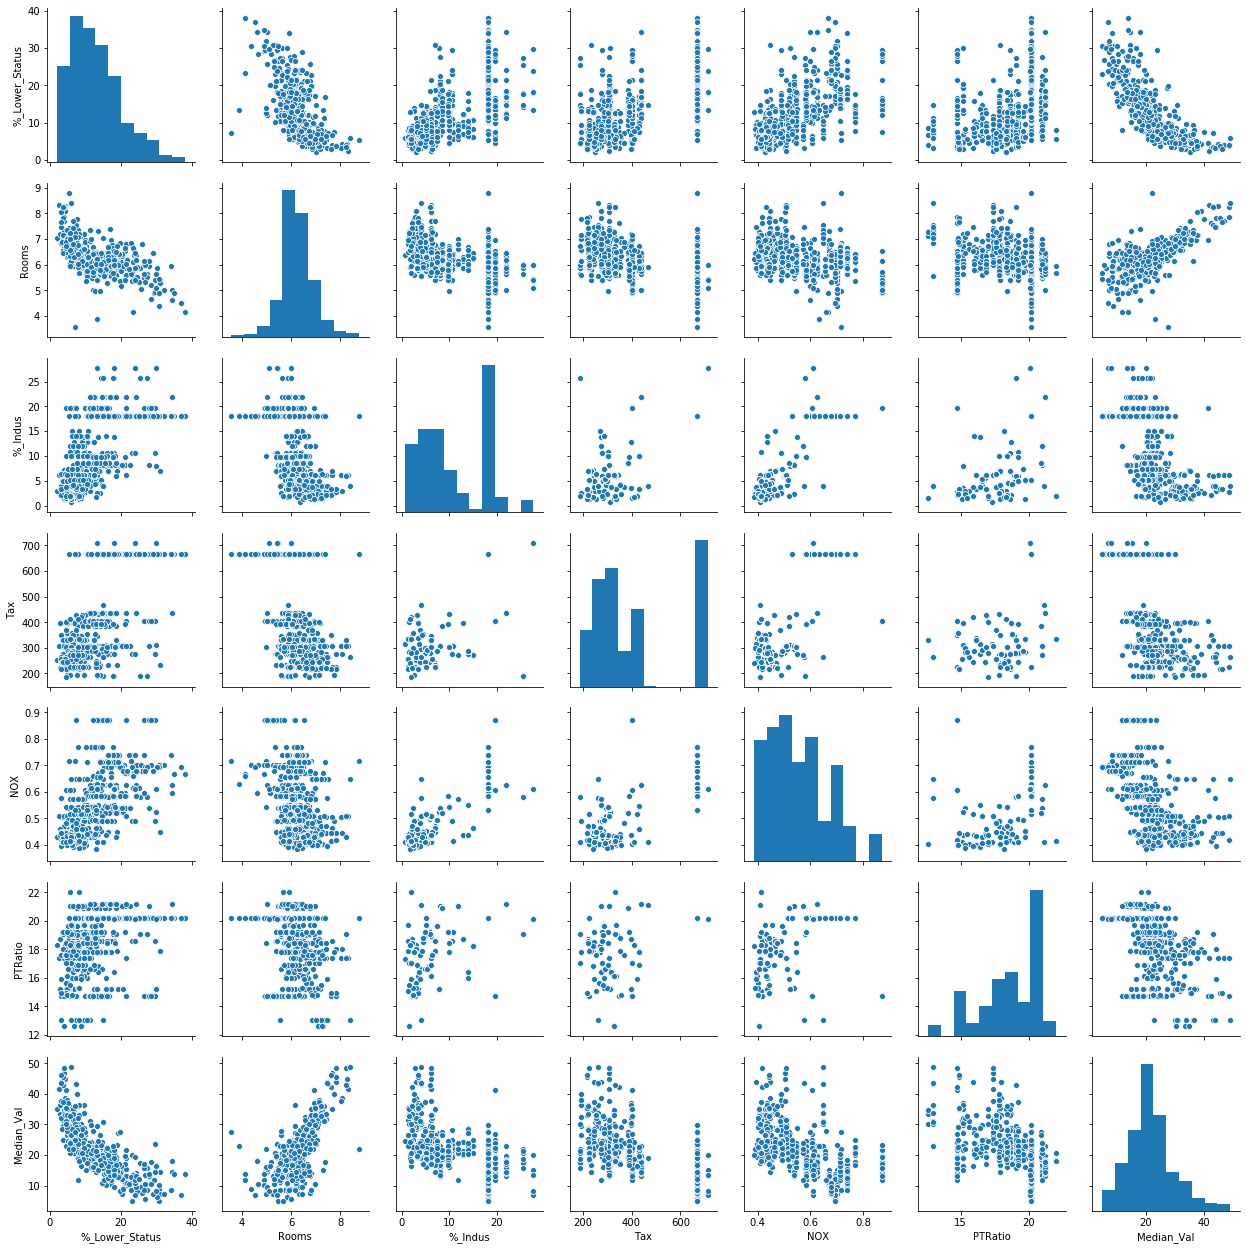

In [121]:
sns.pairplot(high_corr_features)

From looking at the right hand column of the pairplot above we can see that only % Lower Status and number of Rooms have an obvious relationship with the Median Value. Furthermore, Tax, the % Industrial, and NOX are all corrolated with eachother making them bad features to include in the model.

#### 4.5.2.1.2 Filtering using F_regression

This tests each feature to see which is the best predictor by calculating the corrolation between each feature and the target.

In [122]:
# modification of chi squared test code found here:
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
fregX = fifty_plus_removed.iloc[:, 0:13]  
fregy = fifty_plus_removed["Median_Val"]
fregX.head()

Crime_Rate  %_Large_Plots  %_Indus  By_River    NOX  Rooms  %_Pre_1940  \
0     0.00632           18.0     2.31       0.0  0.538  6.575        65.2   
1     0.02731            0.0     7.07       0.0  0.469  6.421        78.9   
2     0.02729            0.0     7.07       0.0  0.469  7.185        61.1   
3     0.03237            0.0     2.18       0.0  0.458  6.998        45.8   
4     0.06905            0.0     2.18       0.0  0.458  7.147        54.2   

   Dist_to_Jobs  Highway_Access    Tax  PTRatio  Blks_per_1000  %_Lower_Status  
0        4.0900             1.0  296.0     15.3         396.90            4.98  
1        4.9671             2.0  242.0     17.8         396.90            9.14  
2        4.9671             2.0  242.0     17.8         392.83            4.03  
3        6.0622             3.0  222.0     18.7         394.63            2.94  
4        6.0622             3.0  222.0     18.7         396.90            5.33

In [125]:
bestfeatures = SelectKBest(score_func=f_regression, k=10) # show the top 10 best features
fregfit = bestfeatures.fit(fregX,fregy)
dfscores = pd.DataFrame(fregfit.scores_)
dfcolumns = pd.DataFrame(fregX.columns) 
fregfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
fregfeatureScores.columns = ['Features','Score']  #naming the dataframe columns
print(fregfeatureScores.nlargest(10,'Score'))  #print 10 best features

          Features       Score
12  %_Lower_Status  666.627892
5            Rooms  435.309814
2          %_Indus  274.507475
9              Tax  237.855059
4              NOX  185.148836
10         PTRatio  179.568192
6       %_Pre_1940  156.620474
8   Highway_Access  143.190234
0       Crime_Rate  123.991786
1    %_Large_Plots   95.527784


As with the corrolation test, % Lower Status and Rooms are by far the best predictors.

### 4.5.2 Testing with Filtered Features

For our further testing we will only use the % Lower Status and Rooms features.

In [126]:
filtered_features = fifty_plus_removed[["%_Lower_Status","Rooms","Median_Val"]]
filtered_features.head()

%_Lower_Status  Rooms  Median_Val
0            4.98  6.575        24.0
1            9.14  6.421        21.6
2            4.03  7.185        34.7
3            2.94  6.998        33.4
4            5.33  7.147        36.2

In [127]:
# shuffle again and split into train and test
filtered_features = shuffle(filtered_features)

FFX = filtered_features.drop(labels=['Median_Val'], axis = 1)
FFy = filtered_features['Median_Val']

FFX_train, FFX_test, FFy_train, FFy_test = mod.train_test_split(FFX, FFy, test_size = 0.2, random_state = 0)

In [128]:
#check how many datapoints are in the train and test batches
FFX_train.shape, FFX_test.shape

((392, 2), (98, 2))

In [129]:
# new filtered features model
FFm = ks.models.Sequential()
FFm.add(ks.layers.Dense(12, input_dim=2, activation="relu"))
FFm.add(ks.layers.Dense(1, activation="linear"))
FFm.compile(loss="mean_squared_error", optimizer="adam")
#FFes = EarlyStopping(monitor='loss', patience=20, verbose=1)

FFm.fit(FFX_train, FFy_train, epochs=300, batch_size=4)

Epoch 1/300
392/392 [==============================] - 0s 957us/step - loss: 515.1224
Epoch 2/300
392/392 [==============================] - 0s 751us/step - loss: 362.2470
Epoch 3/300
392/392 [==============================] - 0s 783us/step - loss: 252.6210
Epoch 4/300
392/392 [==============================] - 0s 781us/step - loss: 192.9736
Epoch 5/300
392/392 [==============================] - 0s 530us/step - loss: 166.0227
Epoch 6/300
392/392 [==============================] - 0s 412us/step - loss: 151.0181
Epoch 7/300
392/392 [==============================] - 0s 353us/step - loss: 139.3595
Epoch 8/300
392/392 [==============================] - 0s 337us/step - loss: 128.6183
Epoch 9/300
392/392 [==============================] - 0s 339us/step - loss: 117.9553
Epoch 10/300
392/392 [==============================] - 0s 332us/step - loss: 107.4015
Epoch 11/300
392/392 [==============================] - 0s 365us/step - loss: 96.4398
Epoch 12/300
392/392 [==============================]

392/392 [==============================] - 0s 317us/step - loss: 20.8272
Epoch 97/300
392/392 [==============================] - 0s 325us/step - loss: 20.9026
Epoch 98/300
392/392 [==============================] - 0s 320us/step - loss: 20.8428
Epoch 99/300
392/392 [==============================] - 0s 322us/step - loss: 20.8730
Epoch 100/300
392/392 [==============================] - 0s 328us/step - loss: 20.8434
Epoch 101/300
392/392 [==============================] - 0s 332us/step - loss: 20.8069
Epoch 102/300
392/392 [==============================] - 0s 342us/step - loss: 20.8676
Epoch 103/300
392/392 [==============================] - 0s 349us/step - loss: 20.8879
Epoch 104/300
392/392 [==============================] - 0s 397us/step - loss: 20.9642
Epoch 105/300
392/392 [==============================] - 0s 357us/step - loss: 20.7880
Epoch 106/300
392/392 [==============================] - 0s 358us/step - loss: 20.9883
Epoch 107/300
392/392 [==============================] - 0s 

392/392 [==============================] - 0s 330us/step - loss: 20.8046
Epoch 191/300
392/392 [==============================] - 0s 338us/step - loss: 21.0042
Epoch 192/300
392/392 [==============================] - 0s 337us/step - loss: 20.8234
Epoch 193/300
392/392 [==============================] - 0s 326us/step - loss: 20.8464
Epoch 194/300
392/392 [==============================] - 0s 333us/step - loss: 21.0487
Epoch 195/300
392/392 [==============================] - 0s 332us/step - loss: 20.8386
Epoch 196/300
392/392 [==============================] - 0s 340us/step - loss: 20.8735
Epoch 197/300
392/392 [==============================] - 0s 336us/step - loss: 20.9390
Epoch 198/300
392/392 [==============================] - 0s 344us/step - loss: 20.8461
Epoch 199/300
392/392 [==============================] - 0s 323us/step - loss: 20.8809
Epoch 200/300
392/392 [==============================] - 0s 327us/step - loss: 20.9281
Epoch 201/300
392/392 [==============================] - 

392/392 [==============================] - 0s 308us/step - loss: 20.8331
Epoch 285/300
392/392 [==============================] - 0s 328us/step - loss: 20.9568
Epoch 286/300
392/392 [==============================] - 0s 322us/step - loss: 20.8337
Epoch 287/300
392/392 [==============================] - 0s 335us/step - loss: 20.9740
Epoch 288/300
392/392 [==============================] - 0s 328us/step - loss: 20.9673
Epoch 289/300
392/392 [==============================] - 0s 330us/step - loss: 20.9948
Epoch 290/300
392/392 [==============================] - 0s 340us/step - loss: 20.9173
Epoch 291/300
392/392 [==============================] - 0s 336us/step - loss: 20.9066
Epoch 292/300
392/392 [==============================] - 0s 328us/step - loss: 21.0260
Epoch 293/300
392/392 [==============================] - 0s 331us/step - loss: 20.9249
Epoch 294/300
392/392 [==============================] - 0s 349us/step - loss: 20.8978
Epoch 295/300
392/392 [==============================] - 

In [130]:
FFm.evaluate(FFX_test, FFy_test)

98/98 [==============================] - 0s 144us/step


23.495211056300572

Initial results for the model using the filtered features are worse than the baseline, though the data has not been normalised yet. We will retest following doing this step next. 

#### 4.5.2.1 Filtered Features Normalisation

In [132]:
scaler = pre.StandardScaler()
FFX_train = pd.DataFrame(scaler.fit_transform(FFX_train), columns=FFX.columns)
FFX_test = pd.DataFrame(scaler.transform(FFX_test), columns=FFX.columns)

In [134]:
FFX_train.head()

%_Lower_Status     Rooms
0        0.724345 -0.583618
1        1.273920 -0.393197
2       -0.990503  3.284687
3        0.314369  1.159346
4        0.064562 -1.021278

In [137]:
# model test with normalised input features 

FFm = ks.models.Sequential()
FFm.add(ks.layers.Dense(12, input_dim=2, activation="relu"))
FFm.add(ks.layers.Dense(1, activation="linear"))
FFm.compile(loss="mean_squared_error", optimizer="adam")
#FFes = EarlyStopping(monitor='loss', patience=20, verbose=1)

FFm.fit(FFX_train, FFy_train, epochs=300, batch_size=4)

Epoch 1/300
392/392 [==============================] - 0s 623us/step - loss: 510.9170
Epoch 2/300
392/392 [==============================] - 0s 323us/step - loss: 481.5099
Epoch 3/300
392/392 [==============================] - 0s 334us/step - loss: 445.8625
Epoch 4/300
392/392 [==============================] - 0s 315us/step - loss: 403.1615
Epoch 5/300
392/392 [==============================] - 0s 331us/step - loss: 354.0624
Epoch 6/300
392/392 [==============================] - 0s 329us/step - loss: 300.7047
Epoch 7/300
392/392 [==============================] - 0s 315us/step - loss: 244.0904
Epoch 8/300
392/392 [==============================] - 0s 320us/step - loss: 187.8740
Epoch 9/300
392/392 [==============================] - 0s 342us/step - loss: 138.1241
Epoch 10/300
392/392 [==============================] - 0s 332us/step - loss: 97.7222
Epoch 11/300
392/392 [==============================] - 0s 330us/step - loss: 67.9015
Epoch 12/300
392/392 [==============================] 

392/392 [==============================] - 0s 302us/step - loss: 13.8496
Epoch 97/300
392/392 [==============================] - 0s 341us/step - loss: 13.8763
Epoch 98/300
392/392 [==============================] - 0s 316us/step - loss: 13.8834
Epoch 99/300
392/392 [==============================] - 0s 341us/step - loss: 13.8336
Epoch 100/300
392/392 [==============================] - 0s 443us/step - loss: 13.8569
Epoch 101/300
392/392 [==============================] - 0s 360us/step - loss: 13.8370
Epoch 102/300
392/392 [==============================] - 0s 361us/step - loss: 13.8262
Epoch 103/300
392/392 [==============================] - 0s 325us/step - loss: 13.8097
Epoch 104/300
392/392 [==============================] - 0s 322us/step - loss: 13.7996
Epoch 105/300
392/392 [==============================] - 0s 323us/step - loss: 13.8220
Epoch 106/300
392/392 [==============================] - 0s 323us/step - loss: 13.7717
Epoch 107/300
392/392 [==============================] - 0s 

392/392 [==============================] - 0s 302us/step - loss: 13.4399
Epoch 191/300
392/392 [==============================] - 0s 329us/step - loss: 13.4341
Epoch 192/300
392/392 [==============================] - 0s 332us/step - loss: 13.4494
Epoch 193/300
392/392 [==============================] - 0s 330us/step - loss: 13.4575
Epoch 194/300
392/392 [==============================] - 0s 336us/step - loss: 13.4188
Epoch 195/300
392/392 [==============================] - 0s 334us/step - loss: 13.4202
Epoch 196/300
392/392 [==============================] - 0s 322us/step - loss: 13.4368
Epoch 197/300
392/392 [==============================] - 0s 331us/step - loss: 13.4334
Epoch 198/300
392/392 [==============================] - 0s 309us/step - loss: 13.4652
Epoch 199/300
392/392 [==============================] - 0s 328us/step - loss: 13.4002
Epoch 200/300
392/392 [==============================] - 0s 333us/step - loss: 13.4415
Epoch 201/300
392/392 [==============================] - 

392/392 [==============================] - 0s 326us/step - loss: 13.2826
Epoch 285/300
392/392 [==============================] - 0s 320us/step - loss: 13.2343
Epoch 286/300
392/392 [==============================] - 0s 332us/step - loss: 13.2635
Epoch 287/300
392/392 [==============================] - 0s 334us/step - loss: 13.3175
Epoch 288/300
392/392 [==============================] - 0s 345us/step - loss: 13.2989
Epoch 289/300
392/392 [==============================] - 0s 345us/step - loss: 13.2960
Epoch 290/300
392/392 [==============================] - 0s 346us/step - loss: 13.2569
Epoch 291/300
392/392 [==============================] - 0s 325us/step - loss: 13.2621
Epoch 292/300
392/392 [==============================] - 0s 352us/step - loss: 13.2709
Epoch 293/300
392/392 [==============================] - 0s 336us/step - loss: 13.2856
Epoch 294/300
392/392 [==============================] - 0s 354us/step - loss: 13.3011
Epoch 295/300
392/392 [==============================] - 

In [138]:
FFm.evaluate(FFX_test, FFy_test)

98/98 [==============================] - 0s 115us/step


13.232086629283671

Even after the normalization the performance of the model still fails to beat the baseline test where all 13 features where included.

#### 4.5.2.1 Filtered Features - Comparing Various Model Configurations

In [144]:
# function to test various model configurations on the filter features dataset
def FF_tester(layer_size1, layer_size2, batch_S, OPT):
    counter = 0
    results = []
    while counter < 5:
        FFm = ks.models.Sequential()
        FFm.add(ks.layers.Dense(layer_size1, input_dim=2, activation="relu"))
        FFm.add(ks.layers.Dense(layer_size2, activation="relu"))
        FFm.add(ks.layers.Dense(1,activation="linear"))

        FFm.compile(loss="mean_squared_error", optimizer=OPT)

        FFes = EarlyStopping(monitor='loss', patience=20, verbose=1)

        FFm.fit(FFX_train, FFy_train, epochs=300, batch_size=batch_S, callbacks=[FFes])

        result_units = FFm.evaluate(FFX_test, FFy_test)

        counter += 1

        results.append(result_units)
   
        
    avg_result = sum(results) / 5
    return avg_result

In [145]:
big_all_adam = FF_tester(64,64,32,"adam") # large layers, large batches, adam optimizer
big_all_adam

Epoch 1/300
392/392 [==============================] - 0s 404us/step - loss: 527.8905
Epoch 2/300
392/392 [==============================] - 0s 33us/step - loss: 503.2909
Epoch 3/300
392/392 [==============================] - 0s 46us/step - loss: 474.0268
Epoch 4/300
392/392 [==============================] - 0s 63us/step - loss: 432.7291
Epoch 5/300
392/392 [==============================] - 0s 45us/step - loss: 372.6124
Epoch 6/300
392/392 [==============================] - 0s 46us/step - loss: 299.0092
Epoch 7/300
392/392 [==============================] - 0s 50us/step - loss: 216.9035
Epoch 8/300
392/392 [==============================] - 0s 57us/step - loss: 142.3383
Epoch 9/300
392/392 [==============================] - 0s 45us/step - loss: 87.7609
Epoch 10/300
392/392 [==============================] - 0s 48us/step - loss: 60.4259
Epoch 11/300
392/392 [==============================] - 0s 55us/step - loss: 49.9569
Epoch 12/300
392/392 [==============================] - 0s 48us/s

392/392 [==============================] - 0s 55us/step - loss: 12.5402
Epoch 98/300
392/392 [==============================] - 0s 58us/step - loss: 12.6250
Epoch 99/300
392/392 [==============================] - 0s 51us/step - loss: 12.4114
Epoch 100/300
392/392 [==============================] - 0s 48us/step - loss: 12.4246
Epoch 101/300
392/392 [==============================] - 0s 58us/step - loss: 12.3362
Epoch 102/300
392/392 [==============================] - 0s 51us/step - loss: 12.3584
Epoch 103/300
392/392 [==============================] - 0s 61us/step - loss: 12.3250
Epoch 104/300
392/392 [==============================] - 0s 60us/step - loss: 12.3667
Epoch 105/300
392/392 [==============================] - 0s 60us/step - loss: 12.2847
Epoch 106/300
392/392 [==============================] - 0s 47us/step - loss: 12.3589
Epoch 107/300
392/392 [==============================] - 0s 49us/step - loss: 12.3425
Epoch 108/300
392/392 [==============================] - 0s 55us/step 

392/392 [==============================] - 0s 51us/step - loss: 11.8475
Epoch 193/300
392/392 [==============================] - 0s 54us/step - loss: 11.9066
Epoch 194/300
392/392 [==============================] - 0s 51us/step - loss: 11.8236
Epoch 195/300
392/392 [==============================] - 0s 45us/step - loss: 12.0288
Epoch 196/300
392/392 [==============================] - 0s 55us/step - loss: 11.7648
Epoch 197/300
392/392 [==============================] - 0s 55us/step - loss: 11.8783
Epoch 198/300
392/392 [==============================] - 0s 54us/step - loss: 11.8310
Epoch 199/300
392/392 [==============================] - 0s 52us/step - loss: 11.8460
Epoch 200/300
392/392 [==============================] - 0s 59us/step - loss: 11.8166
Epoch 201/300
392/392 [==============================] - 0s 60us/step - loss: 11.8257
Epoch 202/300
392/392 [==============================] - 0s 48us/step - loss: 11.8703
Epoch 203/300
392/392 [==============================] - 0s 58us/ste

392/392 [==============================] - 0s 56us/step - loss: 11.5464
Epoch 288/300
392/392 [==============================] - 0s 45us/step - loss: 11.5183
Epoch 289/300
392/392 [==============================] - 0s 51us/step - loss: 11.6411
Epoch 290/300
392/392 [==============================] - 0s 53us/step - loss: 11.5814
Epoch 291/300
392/392 [==============================] - 0s 51us/step - loss: 11.5072
Epoch 292/300
392/392 [==============================] - 0s 47us/step - loss: 11.5354
Epoch 293/300
392/392 [==============================] - 0s 55us/step - loss: 11.5724
Epoch 294/300
392/392 [==============================] - 0s 40us/step - loss: 11.5206
Epoch 295/300
392/392 [==============================] - 0s 65us/step - loss: 11.6969
Epoch 296/300
392/392 [==============================] - 0s 48us/step - loss: 11.5207
Epoch 297/300
392/392 [==============================] - 0s 45us/step - loss: 11.6162
Epoch 298/300
392/392 [==============================] - 0s 42us/ste

392/392 [==============================] - 0s 52us/step - loss: 12.6693
Epoch 83/300
392/392 [==============================] - 0s 49us/step - loss: 12.7635
Epoch 84/300
392/392 [==============================] - 0s 51us/step - loss: 12.8729
Epoch 85/300
392/392 [==============================] - 0s 45us/step - loss: 12.5376
Epoch 86/300
392/392 [==============================] - 0s 55us/step - loss: 12.5723
Epoch 87/300
392/392 [==============================] - 0s 61us/step - loss: 12.5862
Epoch 88/300
392/392 [==============================] - 0s 44us/step - loss: 12.6262
Epoch 89/300
392/392 [==============================] - 0s 59us/step - loss: 12.4872
Epoch 90/300
392/392 [==============================] - 0s 52us/step - loss: 12.4440
Epoch 91/300
392/392 [==============================] - 0s 54us/step - loss: 12.4608
Epoch 92/300
392/392 [==============================] - 0s 48us/step - loss: 12.4092
Epoch 93/300
392/392 [==============================] - 0s 43us/step - loss: 1

392/392 [==============================] - 0s 53us/step - loss: 11.8971
Epoch 178/300
392/392 [==============================] - 0s 51us/step - loss: 11.8022
Epoch 179/300
392/392 [==============================] - 0s 40us/step - loss: 11.8137
Epoch 180/300
392/392 [==============================] - 0s 40us/step - loss: 11.7605
Epoch 181/300
392/392 [==============================] - 0s 58us/step - loss: 11.8042
Epoch 182/300
392/392 [==============================] - 0s 52us/step - loss: 11.8489
Epoch 183/300
392/392 [==============================] - 0s 58us/step - loss: 11.8487
Epoch 184/300
392/392 [==============================] - 0s 40us/step - loss: 11.7371
Epoch 185/300
392/392 [==============================] - 0s 59us/step - loss: 11.8979
Epoch 186/300
392/392 [==============================] - 0s 52us/step - loss: 11.9512
Epoch 187/300
392/392 [==============================] - 0s 54us/step - loss: 11.8468
Epoch 188/300
392/392 [==============================] - 0s 34us/ste

392/392 [==============================] - 0s 43us/step - loss: 11.5288
Epoch 273/300
392/392 [==============================] - 0s 55us/step - loss: 11.5919
Epoch 274/300
392/392 [==============================] - 0s 49us/step - loss: 11.5670
Epoch 275/300
392/392 [==============================] - 0s 45us/step - loss: 11.6564
Epoch 276/300
392/392 [==============================] - 0s 46us/step - loss: 11.6414
Epoch 277/300
392/392 [==============================] - 0s 52us/step - loss: 11.6166
Epoch 278/300
392/392 [==============================] - 0s 44us/step - loss: 11.5173
Epoch 279/300
392/392 [==============================] - 0s 58us/step - loss: 11.5965
Epoch 280/300
392/392 [==============================] - 0s 51us/step - loss: 11.8866
Epoch 281/300
392/392 [==============================] - 0s 55us/step - loss: 11.5538
Epoch 282/300
392/392 [==============================] - 0s 50us/step - loss: 11.4851
Epoch 283/300
392/392 [==============================] - 0s 54us/ste

392/392 [==============================] - 0s 45us/step - loss: 13.2058
Epoch 68/300
392/392 [==============================] - 0s 41us/step - loss: 13.2787
Epoch 69/300
392/392 [==============================] - 0s 61us/step - loss: 13.1348
Epoch 70/300
392/392 [==============================] - 0s 50us/step - loss: 13.0676
Epoch 71/300
392/392 [==============================] - 0s 54us/step - loss: 13.0088
Epoch 72/300
392/392 [==============================] - 0s 52us/step - loss: 13.1668
Epoch 73/300
392/392 [==============================] - 0s 51us/step - loss: 12.9773
Epoch 74/300
392/392 [==============================] - 0s 57us/step - loss: 12.8538
Epoch 75/300
392/392 [==============================] - 0s 51us/step - loss: 12.8760
Epoch 76/300
392/392 [==============================] - 0s 51us/step - loss: 12.7929
Epoch 77/300
392/392 [==============================] - 0s 41us/step - loss: 12.7754
Epoch 78/300
392/392 [==============================] - 0s 46us/step - loss: 1

392/392 [==============================] - 0s 47us/step - loss: 11.6678
Epoch 163/300
392/392 [==============================] - 0s 41us/step - loss: 11.6412
Epoch 164/300
392/392 [==============================] - 0s 40us/step - loss: 11.7000
Epoch 165/300
392/392 [==============================] - 0s 34us/step - loss: 11.7665
Epoch 166/300
392/392 [==============================] - 0s 52us/step - loss: 11.6194
Epoch 167/300
392/392 [==============================] - 0s 39us/step - loss: 11.6036
Epoch 168/300
392/392 [==============================] - 0s 38us/step - loss: 11.6778
Epoch 169/300
392/392 [==============================] - 0s 41us/step - loss: 11.6691
Epoch 170/300
392/392 [==============================] - 0s 43us/step - loss: 11.5975
Epoch 171/300
392/392 [==============================] - 0s 47us/step - loss: 11.6810
Epoch 172/300
392/392 [==============================] - 0s 52us/step - loss: 11.6471
Epoch 173/300
392/392 [==============================] - 0s 43us/ste

392/392 [==============================] - 0s 44us/step - loss: 11.3082
Epoch 258/300
392/392 [==============================] - 0s 52us/step - loss: 11.2483
Epoch 259/300
392/392 [==============================] - 0s 56us/step - loss: 11.2762
Epoch 260/300
392/392 [==============================] - 0s 50us/step - loss: 11.3440
Epoch 261/300
392/392 [==============================] - 0s 53us/step - loss: 11.5747
Epoch 262/300
392/392 [==============================] - 0s 54us/step - loss: 11.9064
Epoch 263/300
392/392 [==============================] - 0s 40us/step - loss: 11.3688
Epoch 264/300
392/392 [==============================] - 0s 49us/step - loss: 11.2841
Epoch 265/300
392/392 [==============================] - 0s 64us/step - loss: 11.3440
Epoch 266/300
392/392 [==============================] - 0s 42us/step - loss: 11.5184
Epoch 267/300
392/392 [==============================] - 0s 54us/step - loss: 11.2047
Epoch 268/300
392/392 [==============================] - 0s 60us/ste

392/392 [==============================] - 0s 51us/step - loss: 14.1681
Epoch 53/300
392/392 [==============================] - 0s 53us/step - loss: 14.1598
Epoch 54/300
392/392 [==============================] - 0s 41us/step - loss: 14.1194
Epoch 55/300
392/392 [==============================] - 0s 53us/step - loss: 14.0525
Epoch 56/300
392/392 [==============================] - 0s 61us/step - loss: 14.0407
Epoch 57/300
392/392 [==============================] - 0s 52us/step - loss: 13.9887
Epoch 58/300
392/392 [==============================] - 0s 59us/step - loss: 13.9552
Epoch 59/300
392/392 [==============================] - 0s 59us/step - loss: 13.9294
Epoch 60/300
392/392 [==============================] - 0s 49us/step - loss: 13.8299
Epoch 61/300
392/392 [==============================] - 0s 44us/step - loss: 13.8099
Epoch 62/300
392/392 [==============================] - 0s 58us/step - loss: 13.8043
Epoch 63/300
392/392 [==============================] - 0s 37us/step - loss: 1

Epoch 148/300
392/392 [==============================] - 0s 47us/step - loss: 12.3173
Epoch 149/300
392/392 [==============================] - 0s 57us/step - loss: 12.4782
Epoch 150/300
392/392 [==============================] - 0s 52us/step - loss: 12.4567
Epoch 151/300
392/392 [==============================] - 0s 54us/step - loss: 12.3374
Epoch 152/300
392/392 [==============================] - 0s 49us/step - loss: 12.2450
Epoch 153/300
392/392 [==============================] - 0s 62us/step - loss: 12.2994
Epoch 154/300
392/392 [==============================] - 0s 55us/step - loss: 12.1678
Epoch 155/300
392/392 [==============================] - 0s 56us/step - loss: 12.2457
Epoch 156/300
392/392 [==============================] - 0s 45us/step - loss: 12.1668
Epoch 157/300
392/392 [==============================] - 0s 61us/step - loss: 12.2329
Epoch 158/300
392/392 [==============================] - 0s 60us/step - loss: 12.2111
Epoch 159/300
392/392 [==============================]

392/392 [==============================] - 0s 46us/step - loss: 12.0912
Epoch 244/300
392/392 [==============================] - 0s 53us/step - loss: 11.8379
Epoch 245/300
392/392 [==============================] - 0s 51us/step - loss: 11.8220
Epoch 246/300
392/392 [==============================] - 0s 47us/step - loss: 11.8015
Epoch 247/300
392/392 [==============================] - 0s 53us/step - loss: 11.8100
Epoch 248/300
392/392 [==============================] - 0s 56us/step - loss: 11.9269
Epoch 249/300
392/392 [==============================] - 0s 55us/step - loss: 11.9787
Epoch 250/300
392/392 [==============================] - 0s 44us/step - loss: 11.8891
Epoch 251/300
392/392 [==============================] - 0s 37us/step - loss: 11.9006
Epoch 252/300
392/392 [==============================] - 0s 52us/step - loss: 11.8130
Epoch 253/300
392/392 [==============================] - 0s 47us/step - loss: 11.7523
Epoch 254/300
392/392 [==============================] - 0s 55us/ste

392/392 [==============================] - 0s 48us/step - loss: 15.4414
Epoch 39/300
392/392 [==============================] - 0s 41us/step - loss: 15.2875
Epoch 40/300
392/392 [==============================] - 0s 50us/step - loss: 15.1331
Epoch 41/300
392/392 [==============================] - 0s 52us/step - loss: 15.1862
Epoch 42/300
392/392 [==============================] - 0s 49us/step - loss: 15.1050
Epoch 43/300
392/392 [==============================] - 0s 58us/step - loss: 14.8757
Epoch 44/300
392/392 [==============================] - 0s 50us/step - loss: 14.8310
Epoch 45/300
392/392 [==============================] - 0s 94us/step - loss: 14.7061
Epoch 46/300
392/392 [==============================] - 0s 58us/step - loss: 14.5353
Epoch 47/300
392/392 [==============================] - 0s 67us/step - loss: 14.4573
Epoch 48/300
392/392 [==============================] - 0s 92us/step - loss: 14.3169
Epoch 49/300
392/392 [==============================] - 0s 69us/step - loss: 1

392/392 [==============================] - 0s 72us/step - loss: 12.1462
Epoch 134/300
392/392 [==============================] - 0s 82us/step - loss: 12.0937
Epoch 135/300
392/392 [==============================] - 0s 69us/step - loss: 12.0784
Epoch 136/300
392/392 [==============================] - 0s 89us/step - loss: 12.3015
Epoch 137/300
392/392 [==============================] - 0s 83us/step - loss: 12.0574
Epoch 138/300
392/392 [==============================] - 0s 75us/step - loss: 12.0098
Epoch 139/300
392/392 [==============================] - 0s 107us/step - loss: 12.0319
Epoch 140/300
392/392 [==============================] - 0s 78us/step - loss: 12.0716
Epoch 141/300
392/392 [==============================] - 0s 94us/step - loss: 12.1449
Epoch 142/300
392/392 [==============================] - 0s 78us/step - loss: 12.1658
Epoch 143/300
392/392 [==============================] - 0s 59us/step - loss: 12.0480
Epoch 144/300
392/392 [==============================] - 0s 63us/st

392/392 [==============================] - 0s 54us/step - loss: 11.6630
Epoch 229/300
392/392 [==============================] - 0s 55us/step - loss: 11.6589
Epoch 230/300
392/392 [==============================] - 0s 60us/step - loss: 11.6499
Epoch 231/300
392/392 [==============================] - 0s 66us/step - loss: 11.6661
Epoch 232/300
392/392 [==============================] - 0s 75us/step - loss: 11.6523
Epoch 233/300
392/392 [==============================] - 0s 62us/step - loss: 11.7169
Epoch 234/300
392/392 [==============================] - 0s 80us/step - loss: 11.6156
Epoch 235/300
392/392 [==============================] - 0s 82us/step - loss: 11.6436
Epoch 236/300
392/392 [==============================] - 0s 85us/step - loss: 11.7221
Epoch 237/300
392/392 [==============================] - 0s 87us/step - loss: 11.6501
Epoch 238/300
392/392 [==============================] - 0s 72us/step - loss: 11.6877
Epoch 239/300
392/392 [==============================] - 0s 54us/ste

13.512113555596802

In [146]:
bigLayer_mediumbatch_adam = FF_tester(64,64,16,"adam") # large layers, large batches, adam optimizer
bigLayer_smallbatch_adam = FF_tester(64,64,4,"adam")

Epoch 1/300
392/392 [==============================] - 0s 448us/step - loss: 506.1484
Epoch 2/300
392/392 [==============================] - 0s 93us/step - loss: 438.7833
Epoch 3/300
392/392 [==============================] - 0s 92us/step - loss: 323.7733
Epoch 4/300
392/392 [==============================] - 0s 79us/step - loss: 170.6183
Epoch 5/300
392/392 [==============================] - 0s 94us/step - loss: 60.5681
Epoch 6/300
392/392 [==============================] - 0s 88us/step - loss: 36.0061
Epoch 7/300
392/392 [==============================] - 0s 95us/step - loss: 30.2523
Epoch 8/300
392/392 [==============================] - 0s 96us/step - loss: 26.8868
Epoch 9/300
392/392 [==============================] - 0s 92us/step - loss: 24.3360
Epoch 10/300
392/392 [==============================] - 0s 93us/step - loss: 22.3262
Epoch 11/300
392/392 [==============================] - 0s 89us/step - loss: 20.9548
Epoch 12/300
392/392 [==============================] - 0s 87us/step 

392/392 [==============================] - 0s 94us/step - loss: 12.3601
Epoch 98/300
392/392 [==============================] - 0s 105us/step - loss: 11.9974
Epoch 99/300
392/392 [==============================] - 0s 90us/step - loss: 12.3259
Epoch 100/300
392/392 [==============================] - 0s 95us/step - loss: 12.2207
Epoch 101/300
392/392 [==============================] - 0s 95us/step - loss: 11.9543
Epoch 102/300
392/392 [==============================] - 0s 103us/step - loss: 11.9972
Epoch 103/300
392/392 [==============================] - 0s 95us/step - loss: 11.9799
Epoch 104/300
392/392 [==============================] - 0s 92us/step - loss: 11.9084
Epoch 105/300
392/392 [==============================] - 0s 99us/step - loss: 12.0279
Epoch 106/300
392/392 [==============================] - 0s 89us/step - loss: 11.9698
Epoch 107/300
392/392 [==============================] - 0s 101us/step - loss: 11.9935
Epoch 108/300
392/392 [==============================] - 0s 99us/st

392/392 [==============================] - 0s 118us/step - loss: 13.1991
Epoch 41/300
392/392 [==============================] - 0s 123us/step - loss: 13.0352
Epoch 42/300
392/392 [==============================] - 0s 121us/step - loss: 13.0279
Epoch 43/300
392/392 [==============================] - 0s 128us/step - loss: 12.9528
Epoch 44/300
392/392 [==============================] - 0s 114us/step - loss: 12.8701
Epoch 45/300
392/392 [==============================] - 0s 124us/step - loss: 13.3791
Epoch 46/300
392/392 [==============================] - 0s 120us/step - loss: 13.0134
Epoch 47/300
392/392 [==============================] - 0s 109us/step - loss: 12.8368
Epoch 48/300
392/392 [==============================] - 0s 124us/step - loss: 12.8614
Epoch 49/300
392/392 [==============================] - 0s 129us/step - loss: 12.7022
Epoch 50/300
392/392 [==============================] - 0s 121us/step - loss: 12.5699
Epoch 51/300
392/392 [==============================] - 0s 128us/st

98/98 [==============================] - 0s 212us/step
Epoch 1/300
392/392 [==============================] - 0s 525us/step - loss: 518.4216
Epoch 2/300
392/392 [==============================] - 0s 140us/step - loss: 467.8992
Epoch 3/300
392/392 [==============================] - 0s 130us/step - loss: 383.5174
Epoch 4/300
392/392 [==============================] - 0s 137us/step - loss: 260.0126
Epoch 5/300
392/392 [==============================] - 0s 128us/step - loss: 136.5031
Epoch 6/300
392/392 [==============================] - 0s 123us/step - loss: 61.1548
Epoch 7/300
392/392 [==============================] - 0s 113us/step - loss: 41.3614
Epoch 8/300
392/392 [==============================] - 0s 120us/step - loss: 35.2790
Epoch 9/300
392/392 [==============================] - 0s 124us/step - loss: 30.7272
Epoch 10/300
392/392 [==============================] - 0s 120us/step - loss: 27.3982
Epoch 11/300
392/392 [==============================] - 0s 122us/step - loss: 25.0416
Epo

392/392 [==============================] - 0s 114us/step - loss: 12.2464
Epoch 96/300
392/392 [==============================] - 0s 123us/step - loss: 12.3176
Epoch 97/300
392/392 [==============================] - 0s 118us/step - loss: 12.3176
Epoch 98/300
392/392 [==============================] - 0s 125us/step - loss: 12.4083
Epoch 99/300
392/392 [==============================] - 0s 116us/step - loss: 12.3143
Epoch 100/300
392/392 [==============================] - 0s 128us/step - loss: 12.2017
Epoch 101/300
392/392 [==============================] - 0s 129us/step - loss: 12.2769
Epoch 102/300
392/392 [==============================] - 0s 122us/step - loss: 12.2499
Epoch 103/300
392/392 [==============================] - 0s 117us/step - loss: 12.3179
Epoch 104/300
392/392 [==============================] - 0s 133us/step - loss: 12.3668
Epoch 105/300
392/392 [==============================] - 0s 135us/step - loss: 12.2200
Epoch 106/300
392/392 [==============================] - 0s 1

392/392 [==============================] - 0s 115us/step - loss: 11.6072
Epoch 190/300
392/392 [==============================] - 0s 129us/step - loss: 11.5508
Epoch 191/300
392/392 [==============================] - 0s 122us/step - loss: 11.5971
Epoch 192/300
392/392 [==============================] - 0s 122us/step - loss: 11.8014
Epoch 193/300
392/392 [==============================] - 0s 131us/step - loss: 11.6310
Epoch 194/300
392/392 [==============================] - 0s 131us/step - loss: 11.7649
Epoch 195/300
392/392 [==============================] - 0s 133us/step - loss: 12.0647
Epoch 196/300
392/392 [==============================] - 0s 115us/step - loss: 11.6092
Epoch 197/300
392/392 [==============================] - 0s 115us/step - loss: 11.8723
Epoch 198/300
392/392 [==============================] - 0s 117us/step - loss: 11.9135
Epoch 00198: early stopping
98/98 [==============================] - 0s 192us/step
Epoch 1/300
392/392 [==============================] - 0s 480

392/392 [==============================] - 0s 127us/step - loss: 12.2071
Epoch 86/300
392/392 [==============================] - 0s 116us/step - loss: 12.0959
Epoch 87/300
392/392 [==============================] - 0s 113us/step - loss: 12.1371
Epoch 88/300
392/392 [==============================] - 0s 119us/step - loss: 12.0839
Epoch 89/300
392/392 [==============================] - 0s 113us/step - loss: 12.2521
Epoch 90/300
392/392 [==============================] - 0s 129us/step - loss: 12.1198
Epoch 91/300
392/392 [==============================] - 0s 131us/step - loss: 12.0736
Epoch 92/300
392/392 [==============================] - 0s 135us/step - loss: 12.2673
Epoch 93/300
392/392 [==============================] - 0s 114us/step - loss: 12.1424
Epoch 94/300
392/392 [==============================] - 0s 119us/step - loss: 11.9792
Epoch 95/300
392/392 [==============================] - 0s 142us/step - loss: 12.0679
Epoch 96/300
392/392 [==============================] - 0s 112us/st

392/392 [==============================] - 0s 127us/step - loss: 11.7255
Epoch 180/300
392/392 [==============================] - 0s 121us/step - loss: 11.7452
Epoch 181/300
392/392 [==============================] - 0s 134us/step - loss: 11.5661
Epoch 182/300
392/392 [==============================] - 0s 120us/step - loss: 11.5744
Epoch 183/300
392/392 [==============================] - 0s 120us/step - loss: 11.6792
Epoch 184/300
392/392 [==============================] - 0s 122us/step - loss: 11.6062
Epoch 185/300
392/392 [==============================] - 0s 131us/step - loss: 11.4144
Epoch 186/300
392/392 [==============================] - 0s 128us/step - loss: 11.4280
Epoch 187/300
392/392 [==============================] - 0s 127us/step - loss: 11.8936
Epoch 188/300
392/392 [==============================] - 0s 125us/step - loss: 11.6912
Epoch 189/300
392/392 [==============================] - 0s 126us/step - loss: 11.4721
Epoch 190/300
392/392 [==============================] - 

392/392 [==============================] - 0s 129us/step - loss: 12.4774
Epoch 69/300
392/392 [==============================] - 0s 128us/step - loss: 12.6146
Epoch 70/300
392/392 [==============================] - 0s 129us/step - loss: 12.5293
Epoch 71/300
392/392 [==============================] - 0s 130us/step - loss: 12.5021
Epoch 72/300
392/392 [==============================] - 0s 137us/step - loss: 12.5638
Epoch 73/300
392/392 [==============================] - 0s 136us/step - loss: 12.2200
Epoch 74/300
392/392 [==============================] - 0s 135us/step - loss: 12.3372
Epoch 75/300
392/392 [==============================] - 0s 122us/step - loss: 12.5580
Epoch 76/300
392/392 [==============================] - 0s 130us/step - loss: 12.3810
Epoch 77/300
392/392 [==============================] - 0s 128us/step - loss: 12.3521
Epoch 78/300
392/392 [==============================] - 0s 135us/step - loss: 12.3628
Epoch 79/300
392/392 [==============================] - 0s 119us/st

392/392 [==============================] - 0s 143us/step - loss: 11.5227
Epoch 163/300
392/392 [==============================] - 0s 140us/step - loss: 11.5487
Epoch 164/300
392/392 [==============================] - 0s 126us/step - loss: 11.5735
Epoch 165/300
392/392 [==============================] - 0s 126us/step - loss: 11.6969
Epoch 166/300
392/392 [==============================] - 0s 121us/step - loss: 11.6740
Epoch 167/300
392/392 [==============================] - 0s 141us/step - loss: 11.6006
Epoch 168/300
392/392 [==============================] - 0s 148us/step - loss: 11.9462
Epoch 169/300
392/392 [==============================] - 0s 127us/step - loss: 11.9746
Epoch 170/300
392/392 [==============================] - 0s 144us/step - loss: 11.5803
Epoch 171/300
392/392 [==============================] - 0s 136us/step - loss: 11.6586
Epoch 172/300
392/392 [==============================] - 0s 138us/step - loss: 11.6145
Epoch 173/300
392/392 [==============================] - 

392/392 [==============================] - 0s 493us/step - loss: 12.8099
Epoch 26/300
392/392 [==============================] - 0s 464us/step - loss: 13.2671
Epoch 27/300
392/392 [==============================] - 0s 470us/step - loss: 12.7657
Epoch 28/300
392/392 [==============================] - 0s 498us/step - loss: 12.8534
Epoch 29/300
392/392 [==============================] - 0s 493us/step - loss: 12.7082
Epoch 30/300
392/392 [==============================] - 0s 492us/step - loss: 12.7761
Epoch 31/300
392/392 [==============================] - 0s 512us/step - loss: 12.5082
Epoch 32/300
392/392 [==============================] - 0s 486us/step - loss: 12.7916
Epoch 33/300
392/392 [==============================] - 0s 500us/step - loss: 12.5505
Epoch 34/300
392/392 [==============================] - 0s 494us/step - loss: 12.5173
Epoch 35/300
392/392 [==============================] - 0s 483us/step - loss: 12.6974
Epoch 36/300
392/392 [==============================] - 0s 507us/st

392/392 [==============================] - 0s 494us/step - loss: 12.7078
Epoch 56/300
392/392 [==============================] - 0s 495us/step - loss: 12.6362
Epoch 57/300
392/392 [==============================] - 0s 494us/step - loss: 12.6333
Epoch 58/300
392/392 [==============================] - 0s 503us/step - loss: 12.5352
Epoch 59/300
392/392 [==============================] - 0s 484us/step - loss: 12.7758
Epoch 60/300
392/392 [==============================] - 0s 481us/step - loss: 12.3192
Epoch 61/300
392/392 [==============================] - ETA: 0s - loss: 12.62 - 0s 478us/step - loss: 12.4837
Epoch 62/300
392/392 [==============================] - 0s 487us/step - loss: 12.7135
Epoch 63/300
392/392 [==============================] - 0s 450us/step - loss: 12.3881
Epoch 64/300
392/392 [==============================] - 0s 506us/step - loss: 12.4742
Epoch 65/300
392/392 [==============================] - 0s 498us/step - loss: 12.8243
Epoch 66/300
392/392 [=====================

392/392 [==============================] - 0s 490us/step - loss: 12.1379
Epoch 150/300
392/392 [==============================] - 0s 504us/step - loss: 12.0506
Epoch 00150: early stopping
98/98 [==============================] - 0s 215us/step
Epoch 1/300
392/392 [==============================] - 0s 893us/step - loss: 431.0089
Epoch 2/300
392/392 [==============================] - 0s 485us/step - loss: 78.9465
Epoch 3/300
392/392 [==============================] - 0s 497us/step - loss: 26.0555
Epoch 4/300
392/392 [==============================] - 0s 488us/step - loss: 21.1915
Epoch 5/300
392/392 [==============================] - 0s 499us/step - loss: 18.8243
Epoch 6/300
392/392 [==============================] - 0s 501us/step - loss: 17.3196
Epoch 7/300
392/392 [==============================] - 0s 487us/step - loss: 16.1412
Epoch 8/300
392/392 [==============================] - 0s 513us/step - loss: 15.2309
Epoch 9/300
392/392 [==============================] - 0s 508us/step - loss:

392/392 [==============================] - 0s 507us/step - loss: 11.8438
Epoch 94/300
392/392 [==============================] - 0s 499us/step - loss: 12.2744
Epoch 95/300
392/392 [==============================] - 0s 507us/step - loss: 11.9370
Epoch 96/300
392/392 [==============================] - 0s 502us/step - loss: 12.2076
Epoch 97/300
392/392 [==============================] - 0s 535us/step - loss: 12.4414
Epoch 98/300
392/392 [==============================] - 0s 531us/step - loss: 11.9434
Epoch 99/300
392/392 [==============================] - 0s 527us/step - loss: 11.9580
Epoch 100/300
392/392 [==============================] - 0s 497us/step - loss: 11.9347
Epoch 101/300
392/392 [==============================] - 0s 520us/step - loss: 11.9712
Epoch 00101: early stopping
98/98 [==============================] - 0s 185us/step
Epoch 1/300
392/392 [==============================] - 0s 636us/step - loss: 391.8920
Epoch 2/300
392/392 [==============================] - 0s 392us/step

392/392 [==============================] - 0s 352us/step - loss: 11.9942
Epoch 87/300
392/392 [==============================] - 0s 491us/step - loss: 11.7732
Epoch 88/300
392/392 [==============================] - 0s 481us/step - loss: 11.9781
Epoch 89/300
392/392 [==============================] - 0s 494us/step - loss: 12.4763
Epoch 90/300
392/392 [==============================] - 0s 470us/step - loss: 11.9486
Epoch 91/300
392/392 [==============================] - 0s 493us/step - loss: 12.1780
Epoch 92/300
392/392 [==============================] - 0s 482us/step - loss: 11.9933
Epoch 93/300
392/392 [==============================] - 0s 478us/step - loss: 12.0273
Epoch 94/300
392/392 [==============================] - 0s 491us/step - loss: 12.0156
Epoch 95/300
392/392 [==============================] - 0s 487us/step - loss: 12.0739
Epoch 96/300
392/392 [==============================] - 0s 490us/step - loss: 12.1548
Epoch 97/300
392/392 [==============================] - 0s 495us/st

392/392 [==============================] - 0s 499us/step - loss: 13.6278
Epoch 19/300
392/392 [==============================] - 0s 491us/step - loss: 13.9783
Epoch 20/300
392/392 [==============================] - 0s 492us/step - loss: 13.5482
Epoch 21/300
392/392 [==============================] - 0s 505us/step - loss: 13.1421
Epoch 22/300
392/392 [==============================] - 0s 497us/step - loss: 12.9546
Epoch 23/300
392/392 [==============================] - 0s 494us/step - loss: 13.2174
Epoch 24/300
392/392 [==============================] - 0s 499us/step - loss: 13.2339
Epoch 25/300
392/392 [==============================] - 0s 487us/step - loss: 13.1495
Epoch 26/300
392/392 [==============================] - 0s 503us/step - loss: 12.9624
Epoch 27/300
392/392 [==============================] - 0s 479us/step - loss: 12.8743
Epoch 28/300
392/392 [==============================] - 0s 500us/step - loss: 13.3493
Epoch 29/300
392/392 [==============================] - 0s 509us/st

392/392 [==============================] - 0s 494us/step - loss: 11.9981
Epoch 114/300
392/392 [==============================] - 0s 491us/step - loss: 12.0313
Epoch 115/300
392/392 [==============================] - 0s 487us/step - loss: 12.0243
Epoch 116/300
392/392 [==============================] - 0s 495us/step - loss: 12.1058
Epoch 117/300
392/392 [==============================] - 0s 492us/step - loss: 12.0299
Epoch 00117: early stopping
98/98 [==============================] - 0s 204us/step


In [147]:
print(bigLayer_mediumbatch_adam)

14.01716899677199


In [148]:
print(bigLayer_smallbatch_adam)

14.012420605640022


In [149]:
mediumLayer_bigbatch_adam = FF_tester(32,12,32,"adam")
mediumLayer_mediumbatch_adam  = FF_tester(32,12,16,"adam")
mediumLayer_smallbatch_adam  = FF_tester(32,12,4,"adam")

Epoch 1/300
392/392 [==============================] - 0s 461us/step - loss: 527.2718
Epoch 2/300
392/392 [==============================] - 0s 41us/step - loss: 518.7504
Epoch 3/300
392/392 [==============================] - 0s 48us/step - loss: 508.9175
Epoch 4/300
392/392 [==============================] - 0s 58us/step - loss: 496.8583
Epoch 5/300
392/392 [==============================] - 0s 52us/step - loss: 481.9182
Epoch 6/300
392/392 [==============================] - 0s 51us/step - loss: 463.4045
Epoch 7/300
392/392 [==============================] - 0s 43us/step - loss: 440.7411
Epoch 8/300
392/392 [==============================] - 0s 66us/step - loss: 414.0870
Epoch 9/300
392/392 [==============================] - 0s 53us/step - loss: 382.1102
Epoch 10/300
392/392 [==============================] - 0s 49us/step - loss: 347.0616
Epoch 11/300
392/392 [==============================] - 0s 47us/step - loss: 307.4098
Epoch 12/300
392/392 [==============================] - 0s 58u

392/392 [==============================] - 0s 57us/step - loss: 13.4810
Epoch 98/300
392/392 [==============================] - 0s 57us/step - loss: 13.4767
Epoch 99/300
392/392 [==============================] - 0s 51us/step - loss: 13.4462
Epoch 100/300
392/392 [==============================] - 0s 61us/step - loss: 13.4190
Epoch 101/300
392/392 [==============================] - 0s 64us/step - loss: 13.3911
Epoch 102/300
392/392 [==============================] - 0s 58us/step - loss: 13.3456
Epoch 103/300
392/392 [==============================] - 0s 64us/step - loss: 13.3078
Epoch 104/300
392/392 [==============================] - 0s 60us/step - loss: 13.2841
Epoch 105/300
392/392 [==============================] - 0s 68us/step - loss: 13.2412
Epoch 106/300
392/392 [==============================] - 0s 56us/step - loss: 13.2219
Epoch 107/300
392/392 [==============================] - 0s 57us/step - loss: 13.2287
Epoch 108/300
392/392 [==============================] - 0s 54us/step 

392/392 [==============================] - 0s 57us/step - loss: 12.3713
Epoch 193/300
392/392 [==============================] - 0s 56us/step - loss: 12.3785
Epoch 194/300
392/392 [==============================] - 0s 44us/step - loss: 12.3521
Epoch 195/300
392/392 [==============================] - 0s 47us/step - loss: 12.2918
Epoch 196/300
392/392 [==============================] - ETA: 0s - loss: 10.02 - 0s 47us/step - loss: 12.3473
Epoch 197/300
392/392 [==============================] - 0s 61us/step - loss: 12.3149
Epoch 198/300
392/392 [==============================] - 0s 52us/step - loss: 12.3774
Epoch 199/300
392/392 [==============================] - 0s 52us/step - loss: 12.3830
Epoch 200/300
392/392 [==============================] - 0s 49us/step - loss: 12.2576
Epoch 201/300
392/392 [==============================] - 0s 62us/step - loss: 12.3182
Epoch 202/300
392/392 [==============================] - 0s 57us/step - loss: 12.3386
Epoch 203/300
392/392 [=====================

392/392 [==============================] - 0s 69us/step - loss: 11.8904
Epoch 288/300
392/392 [==============================] - 0s 54us/step - loss: 11.8926
Epoch 289/300
392/392 [==============================] - 0s 49us/step - loss: 11.8392
Epoch 290/300
392/392 [==============================] - 0s 52us/step - loss: 11.8840
Epoch 291/300
392/392 [==============================] - 0s 41us/step - loss: 11.9966
Epoch 292/300
392/392 [==============================] - 0s 49us/step - loss: 11.9379
Epoch 293/300
392/392 [==============================] - 0s 62us/step - loss: 11.8243
Epoch 294/300
392/392 [==============================] - 0s 52us/step - loss: 11.8785
Epoch 295/300
392/392 [==============================] - 0s 84us/step - loss: 11.9189
Epoch 296/300
392/392 [==============================] - 0s 48us/step - loss: 11.9334
Epoch 297/300
392/392 [==============================] - 0s 42us/step - loss: 11.8534
Epoch 298/300
392/392 [==============================] - 0s 49us/ste

392/392 [==============================] - 0s 52us/step - loss: 13.8273
Epoch 83/300
392/392 [==============================] - 0s 51us/step - loss: 13.7724
Epoch 84/300
392/392 [==============================] - 0s 44us/step - loss: 13.7575
Epoch 85/300
392/392 [==============================] - 0s 41us/step - loss: 13.7227
Epoch 86/300
392/392 [==============================] - 0s 52us/step - loss: 13.7086
Epoch 87/300
392/392 [==============================] - 0s 56us/step - loss: 13.6755
Epoch 88/300
392/392 [==============================] - 0s 53us/step - loss: 13.6907
Epoch 89/300
392/392 [==============================] - 0s 37us/step - loss: 13.5848
Epoch 90/300
392/392 [==============================] - 0s 57us/step - loss: 13.6566
Epoch 91/300
392/392 [==============================] - 0s 66us/step - loss: 13.6058
Epoch 92/300
392/392 [==============================] - 0s 43us/step - loss: 13.5336
Epoch 93/300
392/392 [==============================] - 0s 50us/step - loss: 1

392/392 [==============================] - 0s 54us/step - loss: 12.8225
Epoch 178/300
392/392 [==============================] - 0s 48us/step - loss: 12.7303
Epoch 179/300
392/392 [==============================] - 0s 59us/step - loss: 12.6666
Epoch 180/300
392/392 [==============================] - 0s 50us/step - loss: 12.7531
Epoch 181/300
392/392 [==============================] - 0s 55us/step - loss: 12.7190
Epoch 182/300
392/392 [==============================] - 0s 59us/step - loss: 12.7545
Epoch 183/300
392/392 [==============================] - 0s 66us/step - loss: 12.6885
Epoch 184/300
392/392 [==============================] - 0s 49us/step - loss: 12.6899
Epoch 185/300
392/392 [==============================] - 0s 53us/step - loss: 12.7721
Epoch 186/300
392/392 [==============================] - 0s 56us/step - loss: 12.6638
Epoch 187/300
392/392 [==============================] - 0s 53us/step - loss: 12.6846
Epoch 188/300
392/392 [==============================] - 0s 52us/ste

392/392 [==============================] - 0s 48us/step - loss: 12.4424
Epoch 273/300
392/392 [==============================] - 0s 45us/step - loss: 12.2624
Epoch 274/300
392/392 [==============================] - 0s 55us/step - loss: 12.2961
Epoch 275/300
392/392 [==============================] - 0s 56us/step - loss: 12.2687
Epoch 276/300
392/392 [==============================] - 0s 51us/step - loss: 12.3014
Epoch 277/300
392/392 [==============================] - 0s 45us/step - loss: 12.2995
Epoch 278/300
392/392 [==============================] - 0s 52us/step - loss: 12.2632
Epoch 279/300
392/392 [==============================] - 0s 55us/step - loss: 12.2411
Epoch 280/300
392/392 [==============================] - 0s 47us/step - loss: 12.2830
Epoch 281/300
392/392 [==============================] - 0s 50us/step - loss: 12.2401
Epoch 282/300
392/392 [==============================] - 0s 57us/step - loss: 12.2913
Epoch 283/300
392/392 [==============================] - 0s 45us/ste

392/392 [==============================] - 0s 47us/step - loss: 14.0519
Epoch 68/300
392/392 [==============================] - 0s 40us/step - loss: 14.0055
Epoch 69/300
392/392 [==============================] - 0s 53us/step - loss: 13.9844
Epoch 70/300
392/392 [==============================] - 0s 40us/step - loss: 13.9300
Epoch 71/300
392/392 [==============================] - 0s 56us/step - loss: 13.9139
Epoch 72/300
392/392 [==============================] - 0s 43us/step - loss: 13.8522
Epoch 73/300
392/392 [==============================] - 0s 54us/step - loss: 13.8189
Epoch 74/300
392/392 [==============================] - 0s 41us/step - loss: 13.8214
Epoch 75/300
392/392 [==============================] - 0s 52us/step - loss: 13.7965
Epoch 76/300
392/392 [==============================] - 0s 50us/step - loss: 13.7296
Epoch 77/300
392/392 [==============================] - 0s 53us/step - loss: 13.7169
Epoch 78/300
392/392 [==============================] - 0s 46us/step - loss: 1

392/392 [==============================] - 0s 51us/step - loss: 12.2615
Epoch 163/300
392/392 [==============================] - 0s 51us/step - loss: 12.2419
Epoch 164/300
392/392 [==============================] - 0s 54us/step - loss: 12.2965
Epoch 165/300
392/392 [==============================] - 0s 43us/step - loss: 12.1955
Epoch 166/300
392/392 [==============================] - 0s 46us/step - loss: 12.2105
Epoch 167/300
392/392 [==============================] - 0s 40us/step - loss: 12.2462
Epoch 168/300
392/392 [==============================] - 0s 44us/step - loss: 12.3096
Epoch 169/300
392/392 [==============================] - 0s 54us/step - loss: 12.1959
Epoch 170/300
392/392 [==============================] - 0s 38us/step - loss: 12.1849
Epoch 171/300
392/392 [==============================] - 0s 57us/step - loss: 12.2205
Epoch 172/300
392/392 [==============================] - 0s 55us/step - loss: 12.1894
Epoch 173/300
392/392 [==============================] - 0s 47us/ste

392/392 [==============================] - 0s 37us/step - loss: 11.8803
Epoch 258/300
392/392 [==============================] - 0s 49us/step - loss: 11.7791
Epoch 259/300
392/392 [==============================] - 0s 38us/step - loss: 11.8196
Epoch 260/300
392/392 [==============================] - 0s 41us/step - loss: 11.8069
Epoch 261/300
392/392 [==============================] - 0s 60us/step - loss: 11.8326
Epoch 262/300
392/392 [==============================] - 0s 44us/step - loss: 11.8570
Epoch 263/300
392/392 [==============================] - 0s 48us/step - loss: 11.8244
Epoch 264/300
392/392 [==============================] - 0s 38us/step - loss: 12.0074
Epoch 265/300
392/392 [==============================] - 0s 41us/step - loss: 11.8496
Epoch 266/300
392/392 [==============================] - 0s 41us/step - loss: 11.7871
Epoch 267/300
392/392 [==============================] - 0s 74us/step - loss: 11.7787
Epoch 268/300
392/392 [==============================] - 0s 50us/ste

392/392 [==============================] - 0s 48us/step - loss: 17.1022
Epoch 53/300
392/392 [==============================] - 0s 57us/step - loss: 16.9620
Epoch 54/300
392/392 [==============================] - 0s 43us/step - loss: 16.8370
Epoch 55/300
392/392 [==============================] - 0s 59us/step - loss: 16.6973
Epoch 56/300
392/392 [==============================] - 0s 40us/step - loss: 16.6014
Epoch 57/300
392/392 [==============================] - 0s 58us/step - loss: 16.4961
Epoch 58/300
392/392 [==============================] - 0s 55us/step - loss: 16.4302
Epoch 59/300
392/392 [==============================] - ETA: 0s - loss: 27.90 - 0s 54us/step - loss: 16.2529
Epoch 60/300
392/392 [==============================] - 0s 50us/step - loss: 16.1363
Epoch 61/300
392/392 [==============================] - 0s 46us/step - loss: 16.0827
Epoch 62/300
392/392 [==============================] - 0s 58us/step - loss: 15.9966
Epoch 63/300
392/392 [==============================] 

392/392 [==============================] - 0s 49us/step - loss: 13.0476
Epoch 148/300
392/392 [==============================] - 0s 44us/step - loss: 13.0984
Epoch 149/300
392/392 [==============================] - 0s 55us/step - loss: 13.0676
Epoch 150/300
392/392 [==============================] - 0s 47us/step - loss: 13.1299
Epoch 151/300
392/392 [==============================] - 0s 50us/step - loss: 13.0127
Epoch 152/300
392/392 [==============================] - 0s 63us/step - loss: 13.0483
Epoch 153/300
392/392 [==============================] - 0s 52us/step - loss: 13.0559
Epoch 154/300
392/392 [==============================] - 0s 55us/step - loss: 12.9700
Epoch 155/300
392/392 [==============================] - 0s 56us/step - loss: 12.9829
Epoch 156/300
392/392 [==============================] - 0s 53us/step - loss: 12.9743
Epoch 157/300
392/392 [==============================] - 0s 53us/step - loss: 12.9408
Epoch 158/300
392/392 [==============================] - 0s 42us/ste

392/392 [==============================] - 0s 47us/step - loss: 12.2104
Epoch 243/300
392/392 [==============================] - 0s 52us/step - loss: 12.2786
Epoch 244/300
392/392 [==============================] - 0s 55us/step - loss: 12.2604
Epoch 245/300
392/392 [==============================] - 0s 43us/step - loss: 12.2697
Epoch 246/300
392/392 [==============================] - 0s 41us/step - loss: 12.2330
Epoch 247/300
392/392 [==============================] - 0s 41us/step - loss: 12.2183
Epoch 248/300
392/392 [==============================] - 0s 42us/step - loss: 12.2260
Epoch 249/300
392/392 [==============================] - 0s 44us/step - loss: 12.1880
Epoch 250/300
392/392 [==============================] - 0s 47us/step - loss: 12.1873
Epoch 251/300
392/392 [==============================] - 0s 50us/step - loss: 12.1727
Epoch 252/300
392/392 [==============================] - 0s 43us/step - loss: 12.2323
Epoch 253/300
392/392 [==============================] - 0s 40us/ste

392/392 [==============================] - 0s 59us/step - loss: 21.2850
Epoch 38/300
392/392 [==============================] - 0s 52us/step - loss: 20.5961
Epoch 39/300
392/392 [==============================] - 0s 53us/step - loss: 19.9685
Epoch 40/300
392/392 [==============================] - 0s 43us/step - loss: 19.5554
Epoch 41/300
392/392 [==============================] - 0s 68us/step - loss: 19.0628
Epoch 42/300
392/392 [==============================] - 0s 45us/step - loss: 18.6070
Epoch 43/300
392/392 [==============================] - 0s 50us/step - loss: 18.2420
Epoch 44/300
392/392 [==============================] - 0s 63us/step - loss: 17.9033
Epoch 45/300
392/392 [==============================] - 0s 56us/step - loss: 17.6384
Epoch 46/300
392/392 [==============================] - 0s 46us/step - loss: 17.4134
Epoch 47/300
392/392 [==============================] - 0s 54us/step - loss: 17.2389
Epoch 48/300
392/392 [==============================] - 0s 45us/step - loss: 1

392/392 [==============================] - 0s 73us/step - loss: 12.9709
Epoch 134/300
392/392 [==============================] - 0s 73us/step - loss: 12.9223
Epoch 135/300
392/392 [==============================] - 0s 66us/step - loss: 12.9449
Epoch 136/300
392/392 [==============================] - 0s 74us/step - loss: 12.8691
Epoch 137/300
392/392 [==============================] - 0s 84us/step - loss: 12.9497
Epoch 138/300
392/392 [==============================] - 0s 63us/step - loss: 12.8752
Epoch 139/300
392/392 [==============================] - 0s 70us/step - loss: 12.8295
Epoch 140/300
392/392 [==============================] - 0s 62us/step - loss: 12.8316
Epoch 141/300
392/392 [==============================] - 0s 67us/step - loss: 12.8030
Epoch 142/300
392/392 [==============================] - 0s 73us/step - loss: 12.8062
Epoch 143/300
392/392 [==============================] - 0s 65us/step - loss: 12.8099
Epoch 144/300
392/392 [==============================] - 0s 64us/ste

392/392 [==============================] - 0s 37us/step - loss: 12.0856
Epoch 229/300
392/392 [==============================] - 0s 54us/step - loss: 12.1355
Epoch 230/300
392/392 [==============================] - 0s 36us/step - loss: 12.1416
Epoch 231/300
392/392 [==============================] - 0s 51us/step - loss: 12.1260
Epoch 232/300
392/392 [==============================] - 0s 37us/step - loss: 12.0871
Epoch 233/300
392/392 [==============================] - 0s 62us/step - loss: 12.1039
Epoch 234/300
392/392 [==============================] - 0s 54us/step - loss: 12.0802
Epoch 235/300
392/392 [==============================] - 0s 46us/step - loss: 12.1500
Epoch 236/300
392/392 [==============================] - 0s 44us/step - loss: 12.1059
Epoch 237/300
392/392 [==============================] - 0s 59us/step - loss: 12.0824
Epoch 238/300
392/392 [==============================] - 0s 54us/step - loss: 12.0893
Epoch 239/300
392/392 [==============================] - 0s 54us/ste

Epoch 23/300
392/392 [==============================] - 0s 93us/step - loss: 21.7428
Epoch 24/300
392/392 [==============================] - 0s 163us/step - loss: 21.0711
Epoch 25/300
392/392 [==============================] - 0s 126us/step - loss: 20.4958
Epoch 26/300
392/392 [==============================] - 0s 132us/step - loss: 19.9663
Epoch 27/300
392/392 [==============================] - 0s 132us/step - loss: 19.4765
Epoch 28/300
392/392 [==============================] - 0s 125us/step - loss: 18.9748
Epoch 29/300
392/392 [==============================] - 0s 130us/step - loss: 18.4622
Epoch 30/300
392/392 [==============================] - 0s 122us/step - loss: 17.9808
Epoch 31/300
392/392 [==============================] - 0s 131us/step - loss: 17.6127
Epoch 32/300
392/392 [==============================] - 0s 138us/step - loss: 17.2584
Epoch 33/300
392/392 [==============================] - 0s 129us/step - loss: 16.9298
Epoch 34/300
392/392 [==============================] -

392/392 [==============================] - 0s 101us/step - loss: 13.1101
Epoch 119/300
392/392 [==============================] - 0s 100us/step - loss: 13.0722
Epoch 120/300
392/392 [==============================] - 0s 93us/step - loss: 12.9859
Epoch 121/300
392/392 [==============================] - 0s 113us/step - loss: 13.0016
Epoch 122/300
392/392 [==============================] - 0s 103us/step - loss: 13.0010
Epoch 123/300
392/392 [==============================] - 0s 95us/step - loss: 13.0558
Epoch 124/300
392/392 [==============================] - 0s 99us/step - loss: 13.2007
Epoch 125/300
392/392 [==============================] - 0s 101us/step - loss: 13.1566
Epoch 126/300
392/392 [==============================] - 0s 92us/step - loss: 12.9708
Epoch 127/300
392/392 [==============================] - 0s 95us/step - loss: 12.9584
Epoch 128/300
392/392 [==============================] - 0s 107us/step - loss: 12.9967
Epoch 129/300
392/392 [==============================] - 0s 10

392/392 [==============================] - 0s 84us/step - loss: 12.7388
Epoch 213/300
392/392 [==============================] - 0s 91us/step - loss: 12.5927
Epoch 214/300
392/392 [==============================] - 0s 94us/step - loss: 12.6752
Epoch 215/300
392/392 [==============================] - 0s 96us/step - loss: 12.6902
Epoch 216/300
392/392 [==============================] - 0s 90us/step - loss: 12.5958
Epoch 217/300
392/392 [==============================] - 0s 95us/step - loss: 12.7068
Epoch 218/300
392/392 [==============================] - 0s 99us/step - loss: 12.6626
Epoch 219/300
392/392 [==============================] - 0s 92us/step - loss: 12.5680
Epoch 220/300
392/392 [==============================] - 0s 100us/step - loss: 12.6749
Epoch 221/300
392/392 [==============================] - 0s 89us/step - loss: 12.5805
Epoch 222/300
392/392 [==============================] - 0s 106us/step - loss: 12.5769
Epoch 223/300
392/392 [==============================] - 0s 93us/s

392/392 [==============================] - 0s 85us/step - loss: 313.0698
Epoch 7/300
392/392 [==============================] - 0s 95us/step - loss: 240.1575
Epoch 8/300
392/392 [==============================] - 0s 92us/step - loss: 168.3969
Epoch 9/300
392/392 [==============================] - 0s 92us/step - loss: 107.1080
Epoch 10/300
392/392 [==============================] - 0s 110us/step - loss: 65.6629
Epoch 11/300
392/392 [==============================] - 0s 92us/step - loss: 44.4019
Epoch 12/300
392/392 [==============================] - 0s 101us/step - loss: 34.6324
Epoch 13/300
392/392 [==============================] - 0s 100us/step - loss: 30.5019
Epoch 14/300
392/392 [==============================] - 0s 87us/step - loss: 27.5781
Epoch 15/300
392/392 [==============================] - 0s 108us/step - loss: 25.5880
Epoch 16/300
392/392 [==============================] - 0s 98us/step - loss: 23.7152
Epoch 17/300
392/392 [==============================] - 0s 89us/step - lo

392/392 [==============================] - 0s 92us/step - loss: 12.8992
Epoch 103/300
392/392 [==============================] - 0s 78us/step - loss: 12.9301
Epoch 104/300
392/392 [==============================] - 0s 94us/step - loss: 12.9776
Epoch 105/300
392/392 [==============================] - 0s 100us/step - loss: 12.9454
Epoch 106/300
392/392 [==============================] - 0s 86us/step - loss: 12.9573
Epoch 107/300
392/392 [==============================] - 0s 78us/step - loss: 12.9574
Epoch 108/300
392/392 [==============================] - 0s 76us/step - loss: 12.8440
Epoch 109/300
392/392 [==============================] - 0s 103us/step - loss: 12.8400
Epoch 110/300
392/392 [==============================] - 0s 95us/step - loss: 12.8825
Epoch 111/300
392/392 [==============================] - 0s 102us/step - loss: 12.8440
Epoch 112/300
392/392 [==============================] - 0s 88us/step - loss: 12.8984
Epoch 113/300
392/392 [==============================] - 0s 88us/

392/392 [==============================] - 0s 78us/step - loss: 12.1106
Epoch 198/300
392/392 [==============================] - 0s 100us/step - loss: 12.2928
Epoch 199/300
392/392 [==============================] - 0s 95us/step - loss: 12.0503
Epoch 200/300
392/392 [==============================] - 0s 92us/step - loss: 12.1936
Epoch 201/300
392/392 [==============================] - 0s 106us/step - loss: 12.2413
Epoch 202/300
392/392 [==============================] - 0s 82us/step - loss: 11.9304
Epoch 203/300
392/392 [==============================] - 0s 95us/step - loss: 12.1601
Epoch 204/300
392/392 [==============================] - 0s 89us/step - loss: 12.0802
Epoch 205/300
392/392 [==============================] - 0s 113us/step - loss: 11.9587
Epoch 206/300
392/392 [==============================] - 0s 86us/step - loss: 11.9877
Epoch 207/300
392/392 [==============================] - 0s 91us/step - loss: 11.9014
Epoch 208/300
392/392 [==============================] - 0s 88us/

392/392 [==============================] - 0s 99us/step - loss: 11.5740
Epoch 293/300
392/392 [==============================] - 0s 87us/step - loss: 11.5014
Epoch 294/300
392/392 [==============================] - 0s 89us/step - loss: 11.5895
Epoch 295/300
392/392 [==============================] - 0s 91us/step - loss: 11.6039
Epoch 296/300
392/392 [==============================] - 0s 101us/step - loss: 11.4942
Epoch 00296: early stopping
98/98 [==============================] - 0s 209us/step
Epoch 1/300
392/392 [==============================] - 0s 411us/step - loss: 526.3649
Epoch 2/300
392/392 [==============================] - 0s 80us/step - loss: 509.7853
Epoch 3/300
392/392 [==============================] - 0s 77us/step - loss: 485.7985
Epoch 4/300
392/392 [==============================] - 0s 93us/step - loss: 450.0636
Epoch 5/300
392/392 [==============================] - 0s 81us/step - loss: 401.1878
Epoch 6/300
392/392 [==============================] - 0s 104us/step - los

392/392 [==============================] - 0s 84us/step - loss: 12.5569
Epoch 92/300
392/392 [==============================] - 0s 84us/step - loss: 12.6178
Epoch 93/300
392/392 [==============================] - 0s 93us/step - loss: 12.6299
Epoch 94/300
392/392 [==============================] - 0s 82us/step - loss: 12.5373
Epoch 95/300
392/392 [==============================] - 0s 98us/step - loss: 12.5060
Epoch 96/300
392/392 [==============================] - 0s 85us/step - loss: 12.5598
Epoch 97/300
392/392 [==============================] - 0s 95us/step - loss: 12.4851
Epoch 98/300
392/392 [==============================] - 0s 103us/step - loss: 12.4952
Epoch 99/300
392/392 [==============================] - 0s 89us/step - loss: 12.4976
Epoch 100/300
392/392 [==============================] - 0s 98us/step - loss: 12.4714
Epoch 101/300
392/392 [==============================] - 0s 85us/step - loss: 12.7189
Epoch 102/300
392/392 [==============================] - 0s 102us/step - lo

392/392 [==============================] - 0s 83us/step - loss: 12.0342
Epoch 187/300
392/392 [==============================] - 0s 75us/step - loss: 12.0739
Epoch 188/300
392/392 [==============================] - 0s 73us/step - loss: 12.1182
Epoch 189/300
392/392 [==============================] - 0s 81us/step - loss: 12.0536
Epoch 190/300
392/392 [==============================] - 0s 94us/step - loss: 11.9593
Epoch 191/300
392/392 [==============================] - 0s 98us/step - loss: 12.0101
Epoch 192/300
392/392 [==============================] - 0s 86us/step - loss: 12.1335
Epoch 193/300
392/392 [==============================] - 0s 79us/step - loss: 12.0168
Epoch 194/300
392/392 [==============================] - 0s 107us/step - loss: 11.9640
Epoch 195/300
392/392 [==============================] - 0s 84us/step - loss: 12.0701
Epoch 196/300
392/392 [==============================] - 0s 90us/step - loss: 11.9276
Epoch 197/300
392/392 [==============================] - 0s 96us/st

392/392 [==============================] - 0s 96us/step - loss: 13.6437
Epoch 64/300
392/392 [==============================] - 0s 83us/step - loss: 13.6553
Epoch 65/300
392/392 [==============================] - 0s 88us/step - loss: 13.6159
Epoch 66/300
392/392 [==============================] - 0s 109us/step - loss: 13.5890
Epoch 67/300
392/392 [==============================] - 0s 97us/step - loss: 13.6224
Epoch 68/300
392/392 [==============================] - 0s 103us/step - loss: 13.5497
Epoch 69/300
392/392 [==============================] - 0s 86us/step - loss: 13.4294
Epoch 70/300
392/392 [==============================] - 0s 107us/step - loss: 13.4694
Epoch 71/300
392/392 [==============================] - 0s 89us/step - loss: 13.5310
Epoch 72/300
392/392 [==============================] - 0s 107us/step - loss: 13.3177
Epoch 73/300
392/392 [==============================] - 0s 80us/step - loss: 13.3501
Epoch 74/300
392/392 [==============================] - 0s 104us/step - lo

392/392 [==============================] - 0s 117us/step - loss: 12.4695
Epoch 159/300
392/392 [==============================] - 0s 84us/step - loss: 12.4980
Epoch 160/300
392/392 [==============================] - 0s 86us/step - loss: 12.5028
Epoch 161/300
392/392 [==============================] - 0s 93us/step - loss: 12.5360
Epoch 162/300
392/392 [==============================] - 0s 93us/step - loss: 12.4764
Epoch 163/300
392/392 [==============================] - 0s 89us/step - loss: 12.4243
Epoch 164/300
392/392 [==============================] - 0s 83us/step - loss: 12.4058
Epoch 165/300
392/392 [==============================] - 0s 100us/step - loss: 12.4578
Epoch 166/300
392/392 [==============================] - 0s 96us/step - loss: 12.5768
Epoch 167/300
392/392 [==============================] - 0s 101us/step - loss: 12.4341
Epoch 168/300
392/392 [==============================] - 0s 96us/step - loss: 12.5095
Epoch 169/300
392/392 [==============================] - 0s 99us/

392/392 [==============================] - 0s 92us/step - loss: 12.1955
Epoch 254/300
392/392 [==============================] - 0s 94us/step - loss: 12.2637
Epoch 255/300
392/392 [==============================] - 0s 95us/step - loss: 12.2279
Epoch 256/300
392/392 [==============================] - 0s 98us/step - loss: 12.2739
Epoch 257/300
392/392 [==============================] - 0s 95us/step - loss: 12.0963
Epoch 258/300
392/392 [==============================] - 0s 98us/step - loss: 12.1924
Epoch 259/300
392/392 [==============================] - 0s 96us/step - loss: 12.3479
Epoch 260/300
392/392 [==============================] - 0s 98us/step - loss: 12.3633
Epoch 261/300
392/392 [==============================] - 0s 85us/step - loss: 12.2586
Epoch 262/300
392/392 [==============================] - 0s 108us/step - loss: 12.1249
Epoch 263/300
392/392 [==============================] - 0s 89us/step - loss: 12.1822
Epoch 264/300
392/392 [==============================] - 0s 91us/st

392/392 [==============================] - 0s 89us/step - loss: 14.0832
Epoch 49/300
392/392 [==============================] - 0s 93us/step - loss: 14.0120
Epoch 50/300
392/392 [==============================] - 0s 81us/step - loss: 13.9604
Epoch 51/300
392/392 [==============================] - 0s 92us/step - loss: 13.8428
Epoch 52/300
392/392 [==============================] - 0s 86us/step - loss: 13.8386
Epoch 53/300
392/392 [==============================] - 0s 97us/step - loss: 13.8196
Epoch 54/300
392/392 [==============================] - 0s 84us/step - loss: 13.7543
Epoch 55/300
392/392 [==============================] - 0s 89us/step - loss: 13.7173
Epoch 56/300
392/392 [==============================] - 0s 95us/step - loss: 13.6654
Epoch 57/300
392/392 [==============================] - 0s 85us/step - loss: 13.6000
Epoch 58/300
392/392 [==============================] - 0s 97us/step - loss: 13.6617
Epoch 59/300
392/392 [==============================] - 0s 97us/step - loss: 1

392/392 [==============================] - 0s 83us/step - loss: 12.3418
Epoch 144/300
392/392 [==============================] - 0s 99us/step - loss: 12.2547
Epoch 145/300
392/392 [==============================] - 0s 86us/step - loss: 12.4736
Epoch 146/300
392/392 [==============================] - 0s 98us/step - loss: 12.4002
Epoch 147/300
392/392 [==============================] - 0s 88us/step - loss: 12.3145
Epoch 148/300
392/392 [==============================] - 0s 84us/step - loss: 12.5431
Epoch 149/300
392/392 [==============================] - 0s 100us/step - loss: 12.2565
Epoch 150/300
392/392 [==============================] - 0s 85us/step - loss: 12.1965
Epoch 151/300
392/392 [==============================] - 0s 103us/step - loss: 12.2660
Epoch 152/300
392/392 [==============================] - 0s 92us/step - loss: 12.3070
Epoch 153/300
392/392 [==============================] - 0s 83us/step - loss: 12.2814
Epoch 154/300
392/392 [==============================] - 0s 84us/s

392/392 [==============================] - 0s 83us/step - loss: 11.7567
Epoch 239/300
392/392 [==============================] - 0s 97us/step - loss: 11.8871
Epoch 240/300
392/392 [==============================] - 0s 94us/step - loss: 11.7633
Epoch 241/300
392/392 [==============================] - 0s 96us/step - loss: 11.7232
Epoch 242/300
392/392 [==============================] - 0s 100us/step - loss: 11.7023
Epoch 243/300
392/392 [==============================] - 0s 78us/step - loss: 11.7793
Epoch 244/300
392/392 [==============================] - 0s 101us/step - loss: 11.8442
Epoch 245/300
392/392 [==============================] - 0s 88us/step - loss: 11.7086
Epoch 246/300
392/392 [==============================] - 0s 84us/step - loss: 11.6841
Epoch 247/300
392/392 [==============================] - 0s 80us/step - loss: 11.6462
Epoch 248/300
392/392 [==============================] - 0s 97us/step - loss: 11.6421
Epoch 249/300
392/392 [==============================] - 0s 86us/s

392/392 [==============================] - 0s 356us/step - loss: 13.5029
Epoch 33/300
392/392 [==============================] - 0s 368us/step - loss: 13.4835
Epoch 34/300
392/392 [==============================] - 0s 383us/step - loss: 13.3153
Epoch 35/300
392/392 [==============================] - 0s 373us/step - loss: 13.3942
Epoch 36/300
392/392 [==============================] - 0s 361us/step - loss: 13.5817
Epoch 37/300
392/392 [==============================] - 0s 358us/step - loss: 13.1261
Epoch 38/300
392/392 [==============================] - 0s 359us/step - loss: 13.5486
Epoch 39/300
392/392 [==============================] - 0s 372us/step - loss: 13.3486
Epoch 40/300
392/392 [==============================] - 0s 364us/step - loss: 13.1282
Epoch 41/300
392/392 [==============================] - 0s 371us/step - loss: 13.7193
Epoch 42/300
392/392 [==============================] - 0s 358us/step - loss: 13.3218
Epoch 43/300
392/392 [==============================] - 0s 368us/st

392/392 [==============================] - 0s 351us/step - loss: 13.1866
Epoch 37/300
392/392 [==============================] - 0s 351us/step - loss: 13.3843
Epoch 38/300
392/392 [==============================] - 0s 360us/step - loss: 12.9999
Epoch 39/300
392/392 [==============================] - 0s 341us/step - loss: 12.9315
Epoch 40/300
392/392 [==============================] - 0s 370us/step - loss: 13.0490
Epoch 41/300
392/392 [==============================] - 0s 358us/step - loss: 13.0225
Epoch 42/300
392/392 [==============================] - 0s 363us/step - loss: 12.9927
Epoch 43/300
392/392 [==============================] - 0s 343us/step - loss: 12.8472
Epoch 44/300
392/392 [==============================] - 0s 374us/step - loss: 12.7203
Epoch 45/300
392/392 [==============================] - 0s 344us/step - loss: 12.8222
Epoch 46/300
392/392 [==============================] - 0s 367us/step - loss: 12.8948
Epoch 47/300
392/392 [==============================] - 0s 341us/st

392/392 [==============================] - 0s 322us/step - loss: 11.8504
Epoch 132/300
392/392 [==============================] - 0s 353us/step - loss: 12.1472
Epoch 133/300
392/392 [==============================] - 0s 344us/step - loss: 12.0484
Epoch 134/300
392/392 [==============================] - 0s 347us/step - loss: 12.2144
Epoch 135/300
392/392 [==============================] - 0s 351us/step - loss: 11.9896
Epoch 136/300
392/392 [==============================] - 0s 350us/step - loss: 11.9687
Epoch 137/300
392/392 [==============================] - 0s 345us/step - loss: 12.1087
Epoch 138/300
392/392 [==============================] - 0s 361us/step - loss: 11.9445
Epoch 139/300
392/392 [==============================] - 0s 322us/step - loss: 11.9620
Epoch 140/300
392/392 [==============================] - 0s 351us/step - loss: 11.7817
Epoch 141/300
392/392 [==============================] - 0s 340us/step - loss: 11.9260
Epoch 142/300
392/392 [==============================] - 

392/392 [==============================] - 0s 319us/step - loss: 13.9917
Epoch 19/300
392/392 [==============================] - 0s 345us/step - loss: 13.8844
Epoch 20/300
392/392 [==============================] - 0s 324us/step - loss: 13.6978
Epoch 21/300
392/392 [==============================] - 0s 342us/step - loss: 13.6212
Epoch 22/300
392/392 [==============================] - 0s 339us/step - loss: 13.4794
Epoch 23/300
392/392 [==============================] - 0s 329us/step - loss: 13.4510
Epoch 24/300
392/392 [==============================] - 0s 335us/step - loss: 13.4857
Epoch 25/300
392/392 [==============================] - 0s 330us/step - loss: 13.2855
Epoch 26/300
392/392 [==============================] - 0s 337us/step - loss: 13.1632
Epoch 27/300
392/392 [==============================] - 0s 348us/step - loss: 13.1804
Epoch 28/300
392/392 [==============================] - 0s 331us/step - loss: 13.0169
Epoch 29/300
392/392 [==============================] - 0s 338us/st

392/392 [==============================] - 0s 318us/step - loss: 12.1632
Epoch 114/300
392/392 [==============================] - 0s 329us/step - loss: 12.0991
Epoch 115/300
392/392 [==============================] - 0s 332us/step - loss: 12.2217
Epoch 116/300
392/392 [==============================] - 0s 345us/step - loss: 12.0076
Epoch 117/300
392/392 [==============================] - 0s 336us/step - loss: 11.9891
Epoch 118/300
392/392 [==============================] - 0s 341us/step - loss: 12.1288
Epoch 119/300
392/392 [==============================] - 0s 344us/step - loss: 12.0454
Epoch 120/300
392/392 [==============================] - 0s 340us/step - loss: 11.9663
Epoch 121/300
392/392 [==============================] - 0s 330us/step - loss: 12.0710
Epoch 122/300
392/392 [==============================] - 0s 339us/step - loss: 12.0631
Epoch 123/300
392/392 [==============================] - 0s 352us/step - loss: 12.0034
Epoch 124/300
392/392 [==============================] - 

392/392 [==============================] - 0s 344us/step - loss: 11.6130
Epoch 208/300
392/392 [==============================] - 0s 354us/step - loss: 11.7881
Epoch 209/300
392/392 [==============================] - 0s 370us/step - loss: 11.8849
Epoch 210/300
392/392 [==============================] - 0s 337us/step - loss: 11.7551
Epoch 211/300
392/392 [==============================] - 0s 367us/step - loss: 11.6654
Epoch 212/300
392/392 [==============================] - 0s 353us/step - loss: 11.7961
Epoch 213/300
392/392 [==============================] - 0s 354us/step - loss: 11.7059
Epoch 214/300
392/392 [==============================] - 0s 349us/step - loss: 11.7129
Epoch 215/300
392/392 [==============================] - 0s 347us/step - loss: 11.9361
Epoch 216/300
392/392 [==============================] - 0s 345us/step - loss: 11.78720s - loss: 11.
Epoch 217/300
392/392 [==============================] - 0s 354us/step - loss: 11.7351
Epoch 218/300
392/392 [====================

392/392 [==============================] - 0s 336us/step - loss: 13.9045
Epoch 18/300
392/392 [==============================] - 0s 345us/step - loss: 13.6755
Epoch 19/300
392/392 [==============================] - 0s 372us/step - loss: 13.7881
Epoch 20/300
392/392 [==============================] - 0s 363us/step - loss: 13.4067
Epoch 21/300
392/392 [==============================] - 0s 351us/step - loss: 13.4228
Epoch 22/300
392/392 [==============================] - 0s 379us/step - loss: 13.3541
Epoch 23/300
392/392 [==============================] - 0s 348us/step - loss: 13.1711
Epoch 24/300
392/392 [==============================] - 0s 362us/step - loss: 13.0852
Epoch 25/300
392/392 [==============================] - 0s 368us/step - loss: 13.2033
Epoch 26/300
392/392 [==============================] - 0s 366us/step - loss: 13.2321
Epoch 27/300
392/392 [==============================] - 0s 348us/step - loss: 12.8986
Epoch 28/300
392/392 [==============================] - 0s 352us/st

Epoch 112/300
392/392 [==============================] - 0s 353us/step - loss: 11.9178
Epoch 113/300
392/392 [==============================] - 0s 344us/step - loss: 11.8819
Epoch 114/300
392/392 [==============================] - 0s 353us/step - loss: 11.8418
Epoch 115/300
392/392 [==============================] - 0s 345us/step - loss: 11.9411
Epoch 116/300
392/392 [==============================] - 0s 346us/step - loss: 11.8157
Epoch 117/300
392/392 [==============================] - 0s 350us/step - loss: 11.8293
Epoch 118/300
392/392 [==============================] - 0s 353us/step - loss: 11.9030
Epoch 119/300
392/392 [==============================] - 0s 357us/step - loss: 11.8899
Epoch 120/300
392/392 [==============================] - 0s 351us/step - loss: 11.7357
Epoch 121/300
392/392 [==============================] - 0s 353us/step - loss: 11.8453
Epoch 122/300
392/392 [==============================] - 0s 347us/step - loss: 11.8811
Epoch 123/300
392/392 [====================

392/392 [==============================] - 0s 295us/step - loss: 12.7124
Epoch 81/300
392/392 [==============================] - 0s 309us/step - loss: 12.7073
Epoch 82/300
392/392 [==============================] - 0s 319us/step - loss: 12.7357
Epoch 83/300
392/392 [==============================] - 0s 293us/step - loss: 12.8108
Epoch 84/300
392/392 [==============================] - 0s 301us/step - loss: 12.6172
Epoch 85/300
392/392 [==============================] - 0s 303us/step - loss: 12.8151
Epoch 86/300
392/392 [==============================] - 0s 322us/step - loss: 12.7099
Epoch 87/300
392/392 [==============================] - 0s 297us/step - loss: 12.7232
Epoch 88/300
392/392 [==============================] - 0s 304us/step - loss: 12.5718
Epoch 89/300
392/392 [==============================] - 0s 291us/step - loss: 12.4780
Epoch 90/300
392/392 [==============================] - 0s 279us/step - loss: 12.6296
Epoch 91/300
392/392 [==============================] - 0s 310us/st

In [150]:
print(mediumLayer_bigbatch_adam)
print(mediumLayer_mediumbatch_adam)
print(mediumLayer_smallbatch_adam)

13.595232322264692
13.559877535761618
13.860125993222605


In [165]:
#smallLayer_bigbatch_adam  = FF_tester(12,6,32,"adam")
#smallLayer_mediumbatch_adam  = FF_tester(12,6,16,"adam")
#smallLayer_smallbatch_adam  = FF_tester(12,6,4,"adam")
tinyLayer_smallbatch_adam = FF_tester(2,2,4,"adam")

Epoch 1/300
392/392 [==============================] - 0s 492us/step - loss: 520.2349
Epoch 2/300
392/392 [==============================] - 0s 288us/step - loss: 503.0317
Epoch 3/300
392/392 [==============================] - 0s 277us/step - loss: 479.0442
Epoch 4/300
392/392 [==============================] - 0s 280us/step - loss: 450.7169
Epoch 5/300
392/392 [==============================] - 0s 286us/step - loss: 418.0920
Epoch 6/300
392/392 [==============================] - 0s 287us/step - loss: 380.0529
Epoch 7/300
392/392 [==============================] - 0s 298us/step - loss: 336.6248
Epoch 8/300
392/392 [==============================] - 0s 307us/step - loss: 288.9491
Epoch 9/300
392/392 [==============================] - 0s 308us/step - loss: 240.5774
Epoch 10/300
392/392 [==============================] - 0s 285us/step - loss: 194.3751
Epoch 11/300
392/392 [==============================] - 0s 287us/step - loss: 153.8931
Epoch 12/300
392/392 [==============================

392/392 [==============================] - 0s 252us/step - loss: 16.7643
Epoch 97/300
392/392 [==============================] - 0s 262us/step - loss: 16.7481
Epoch 98/300
392/392 [==============================] - 0s 259us/step - loss: 16.8050
Epoch 99/300
392/392 [==============================] - 0s 254us/step - loss: 16.7432
Epoch 100/300
392/392 [==============================] - 0s 251us/step - loss: 16.7357
Epoch 101/300
392/392 [==============================] - 0s 242us/step - loss: 16.7419
Epoch 102/300
392/392 [==============================] - 0s 257us/step - loss: 16.6911
Epoch 103/300
392/392 [==============================] - 0s 282us/step - loss: 16.7189
Epoch 104/300
392/392 [==============================] - 0s 361us/step - loss: 16.7649
Epoch 105/300
392/392 [==============================] - 0s 268us/step - loss: 16.6437
Epoch 106/300
392/392 [==============================] - 0s 254us/step - loss: 16.6457
Epoch 107/300
392/392 [==============================] - 0s 

392/392 [==============================] - 0s 288us/step - loss: 16.3761
Epoch 191/300
392/392 [==============================] - 0s 298us/step - loss: 16.3547
Epoch 192/300
392/392 [==============================] - 0s 318us/step - loss: 16.3482
Epoch 193/300
392/392 [==============================] - 0s 291us/step - loss: 16.3455
Epoch 194/300
392/392 [==============================] - 0s 249us/step - loss: 16.3497
Epoch 195/300
392/392 [==============================] - 0s 267us/step - loss: 16.3656
Epoch 196/300
392/392 [==============================] - 0s 260us/step - loss: 16.3690
Epoch 197/300
392/392 [==============================] - 0s 248us/step - loss: 16.3560
Epoch 198/300
392/392 [==============================] - 0s 232us/step - loss: 16.4399
Epoch 199/300
392/392 [==============================] - 0s 227us/step - loss: 16.3473
Epoch 200/300
392/392 [==============================] - 0s 235us/step - loss: 16.3549
Epoch 201/300
392/392 [==============================] - 

392/392 [==============================] - 0s 230us/step - loss: 112.4193
Epoch 19/300
392/392 [==============================] - 0s 243us/step - loss: 84.6504
Epoch 20/300
392/392 [==============================] - 0s 221us/step - loss: 65.0382
Epoch 21/300
392/392 [==============================] - 0s 242us/step - loss: 51.3891
Epoch 22/300
392/392 [==============================] - 0s 226us/step - loss: 42.2421
Epoch 23/300
392/392 [==============================] - 0s 246us/step - loss: 36.1852
Epoch 24/300
392/392 [==============================] - 0s 226us/step - loss: 31.9796
Epoch 25/300
392/392 [==============================] - 0s 246us/step - loss: 29.1561
Epoch 26/300
392/392 [==============================] - 0s 224us/step - loss: 27.0640
Epoch 27/300
392/392 [==============================] - 0s 247us/step - loss: 25.4340
Epoch 28/300
392/392 [==============================] - 0s 234us/step - loss: 24.2009
Epoch 29/300
392/392 [==============================] - 0s 246us/s

Epoch 113/300
392/392 [==============================] - 0s 256us/step - loss: 17.6970
Epoch 114/300
392/392 [==============================] - 0s 249us/step - loss: 17.6635
Epoch 115/300
392/392 [==============================] - 0s 222us/step - loss: 17.6329
Epoch 116/300
392/392 [==============================] - 0s 259us/step - loss: 17.6302
Epoch 117/300
392/392 [==============================] - 0s 306us/step - loss: 17.6061
Epoch 118/300
392/392 [==============================] - 0s 289us/step - loss: 17.5683
Epoch 119/300
392/392 [==============================] - 0s 247us/step - loss: 17.5820
Epoch 120/300
392/392 [==============================] - 0s 253us/step - loss: 17.5209
Epoch 121/300
392/392 [==============================] - 0s 231us/step - loss: 17.5212
Epoch 122/300
392/392 [==============================] - 0s 213us/step - loss: 17.4835
Epoch 123/300
392/392 [==============================] - 0s 244us/step - loss: 17.4297
Epoch 124/300
392/392 [====================

392/392 [==============================] - 0s 242us/step - loss: 15.8867
Epoch 208/300
392/392 [==============================] - 0s 235us/step - loss: 15.8866
Epoch 209/300
392/392 [==============================] - 0s 238us/step - loss: 15.8771
Epoch 210/300
392/392 [==============================] - 0s 215us/step - loss: 15.8917
Epoch 211/300
392/392 [==============================] - 0s 258us/step - loss: 15.8372
Epoch 212/300
392/392 [==============================] - 0s 272us/step - loss: 15.8473
Epoch 213/300
392/392 [==============================] - 0s 247us/step - loss: 15.8310
Epoch 214/300
392/392 [==============================] - 0s 243us/step - loss: 15.8075
Epoch 215/300
392/392 [==============================] - 0s 238us/step - loss: 15.8071
Epoch 216/300
392/392 [==============================] - 0s 250us/step - loss: 15.8113
Epoch 217/300
392/392 [==============================] - 0s 279us/step - loss: 15.8219
Epoch 218/300
392/392 [==============================] - 

98/98 [==============================] - 0s 153us/step
Epoch 1/300
392/392 [==============================] - 0s 529us/step - loss: 534.5324
Epoch 2/300
392/392 [==============================] - 0s 315us/step - loss: 528.8927
Epoch 3/300
392/392 [==============================] - 0s 288us/step - loss: 524.2333
Epoch 4/300
392/392 [==============================] - 0s 282us/step - loss: 519.9244
Epoch 5/300
392/392 [==============================] - 0s 289us/step - loss: 515.7549
Epoch 6/300
392/392 [==============================] - 0s 283us/step - loss: 511.6529
Epoch 7/300
392/392 [==============================] - 0s 290us/step - loss: 507.5816
Epoch 8/300
392/392 [==============================] - 0s 280us/step - loss: 503.5372
Epoch 9/300
392/392 [==============================] - 0s 286us/step - loss: 499.5211
Epoch 10/300
392/392 [==============================] - 0s 315us/step - loss: 495.5376
Epoch 11/300
392/392 [==============================] - 0s 295us/step - loss: 491.57

392/392 [==============================] - 0s 303us/step - loss: 233.8521
Epoch 95/300
392/392 [==============================] - 0s 308us/step - loss: 231.5182
Epoch 96/300
392/392 [==============================] - 0s 304us/step - loss: 229.2017
Epoch 97/300
392/392 [==============================] - 0s 253us/step - loss: 226.8979
Epoch 98/300
392/392 [==============================] - 0s 253us/step - loss: 224.6153
Epoch 99/300
392/392 [==============================] - 0s 252us/step - loss: 222.3503
Epoch 100/300
392/392 [==============================] - 0s 225us/step - loss: 220.1023
Epoch 101/300
392/392 [==============================] - 0s 243us/step - loss: 217.8703
Epoch 102/300
392/392 [==============================] - 0s 235us/step - loss: 215.6539
Epoch 103/300
392/392 [==============================] - 0s 260us/step - loss: 213.4563
Epoch 104/300
392/392 [==============================] - 0s 291us/step - loss: 211.2778
Epoch 105/300
392/392 [============================

392/392 [==============================] - 0s 233us/step - loss: 88.8985
Epoch 188/300
392/392 [==============================] - 0s 250us/step - loss: 88.0979
Epoch 189/300
392/392 [==============================] - 0s 226us/step - loss: 87.3046
Epoch 190/300
392/392 [==============================] - 0s 241us/step - loss: 86.5270
Epoch 191/300
392/392 [==============================] - 0s 313us/step - loss: 85.7677
Epoch 192/300
392/392 [==============================] - 0s 239us/step - loss: 85.0140
Epoch 193/300
392/392 [==============================] - 0s 247us/step - loss: 84.2824
Epoch 194/300
392/392 [==============================] - 0s 242us/step - loss: 83.5584
Epoch 195/300
392/392 [==============================] - 0s 233us/step - loss: 82.8522
Epoch 196/300
392/392 [==============================] - 0s 269us/step - loss: 82.1524
Epoch 197/300
392/392 [==============================] - 0s 295us/step - loss: 81.4724
Epoch 198/300
392/392 [==============================] - 

392/392 [==============================] - 0s 244us/step - loss: 58.8685
Epoch 282/300
392/392 [==============================] - 0s 247us/step - loss: 58.8279
Epoch 283/300
392/392 [==============================] - 0s 290us/step - loss: 58.7917
Epoch 284/300
392/392 [==============================] - 0s 232us/step - loss: 58.7563
Epoch 285/300
392/392 [==============================] - 0s 217us/step - loss: 58.7238
Epoch 286/300
392/392 [==============================] - 0s 193us/step - loss: 58.6909
Epoch 287/300
392/392 [==============================] - 0s 214us/step - loss: 58.6624
Epoch 288/300
392/392 [==============================] - 0s 230us/step - loss: 58.6334
Epoch 289/300
392/392 [==============================] - 0s 219us/step - loss: 58.6077
Epoch 290/300
392/392 [==============================] - 0s 229us/step - loss: 58.5807
Epoch 291/300
392/392 [==============================] - 0s 224us/step - loss: 58.5572
Epoch 292/300
392/392 [==============================] - 

392/392 [==============================] - 0s 232us/step - loss: 16.8720
Epoch 76/300
392/392 [==============================] - 0s 247us/step - loss: 16.8520
Epoch 77/300
392/392 [==============================] - 0s 239us/step - loss: 16.8919
Epoch 78/300
392/392 [==============================] - 0s 231us/step - loss: 16.8602
Epoch 79/300
392/392 [==============================] - 0s 225us/step - loss: 16.8258
Epoch 80/300
392/392 [==============================] - 0s 240us/step - loss: 16.8621
Epoch 81/300
392/392 [==============================] - 0s 296us/step - loss: 16.8778
Epoch 82/300
392/392 [==============================] - 0s 246us/step - loss: 16.8775
Epoch 83/300
392/392 [==============================] - 0s 247us/step - loss: 16.8425
Epoch 84/300
392/392 [==============================] - 0s 225us/step - loss: 16.8551
Epoch 85/300
392/392 [==============================] - 0s 225us/step - loss: 16.8794
Epoch 86/300
392/392 [==============================] - 0s 282us/st

392/392 [==============================] - 0s 238us/step - loss: 298.0165
Epoch 70/300
392/392 [==============================] - 0s 246us/step - loss: 295.2338
Epoch 71/300
392/392 [==============================] - 0s 253us/step - loss: 292.4686
Epoch 72/300
392/392 [==============================] - 0s 236us/step - loss: 289.7194
Epoch 73/300
392/392 [==============================] - 0s 220us/step - loss: 286.9914
Epoch 74/300
392/392 [==============================] - 0s 236us/step - loss: 284.2789
Epoch 75/300
392/392 [==============================] - 0s 219us/step - loss: 281.5841
Epoch 76/300
392/392 [==============================] - 0s 235us/step - loss: 278.9098
Epoch 77/300
392/392 [==============================] - 0s 241us/step - loss: 276.2475
Epoch 78/300
392/392 [==============================] - 0s 239us/step - loss: 273.6102
Epoch 79/300
392/392 [==============================] - 0s 217us/step - loss: 270.9835
Epoch 80/300
392/392 [==============================] - 

392/392 [==============================] - 0s 217us/step - loss: 113.9493
Epoch 163/300
392/392 [==============================] - 0s 235us/step - loss: 112.7605
Epoch 164/300
392/392 [==============================] - 0s 236us/step - loss: 111.5922
Epoch 165/300
392/392 [==============================] - 0s 221us/step - loss: 110.4359
Epoch 166/300
392/392 [==============================] - 0s 230us/step - loss: 109.2920
Epoch 167/300
392/392 [==============================] - 0s 217us/step - loss: 108.1686
Epoch 168/300
392/392 [==============================] - 0s 249us/step - loss: 107.0568
Epoch 169/300
392/392 [==============================] - 0s 221us/step - loss: 105.9648
Epoch 170/300
392/392 [==============================] - 0s 232us/step - loss: 104.8835
Epoch 171/300
392/392 [==============================] - 0s 211us/step - loss: 103.8176
Epoch 172/300
392/392 [==============================] - 0s 235us/step - loss: 102.7737
Epoch 173/300
392/392 [=======================

392/392 [==============================] - 0s 242us/step - loss: 60.6280
Epoch 257/300
392/392 [==============================] - 0s 232us/step - loss: 60.5152
Epoch 258/300
392/392 [==============================] - 0s 252us/step - loss: 60.4058
Epoch 259/300
392/392 [==============================] - 0s 237us/step - loss: 60.3058
Epoch 260/300
392/392 [==============================] - 0s 228us/step - loss: 60.2014
Epoch 261/300
392/392 [==============================] - 0s 267us/step - loss: 60.1058
Epoch 262/300
392/392 [==============================] - 0s 234us/step - loss: 60.0145
Epoch 263/300
392/392 [==============================] - 0s 293us/step - loss: 59.9275
Epoch 264/300
392/392 [==============================] - 0s 280us/step - loss: 59.8401
Epoch 265/300
392/392 [==============================] - 0s 247us/step - loss: 59.7597
Epoch 266/300
392/392 [==============================] - 0s 241us/step - loss: 59.6812
Epoch 267/300
392/392 [==============================] - 

In [167]:
print(smallLayer_bigbatch_adam)
print(smallLayer_mediumbatch_adam)
print(smallLayer_smallbatch_adam)
print(tinyLayer_smallbatch_adam)

40.52218168414369


Medium layer sizes seems to peform the best. As a follow-up we will try the "rmsprop" optimiser.

In [155]:
mediumLayer_mediumbatch_rms  = FF_tester(32,12,16,"rmsprop")

Epoch 1/300
392/392 [==============================] - 0s 193us/step - loss: 523.1482
Epoch 2/300
392/392 [==============================] - 0s 74us/step - loss: 497.4028
Epoch 3/300
392/392 [==============================] - 0s 89us/step - loss: 470.9310
Epoch 4/300
392/392 [==============================] - 0s 89us/step - loss: 441.9169
Epoch 5/300
392/392 [==============================] - 0s 76us/step - loss: 409.0438
Epoch 6/300
392/392 [==============================] - 0s 86us/step - loss: 371.3132
Epoch 7/300
392/392 [==============================] - 0s 81us/step - loss: 331.2312
Epoch 8/300
392/392 [==============================] - 0s 84us/step - loss: 287.5276
Epoch 9/300
392/392 [==============================] - 0s 74us/step - loss: 240.5790
Epoch 10/300
392/392 [==============================] - 0s 81us/step - loss: 195.3494
Epoch 11/300
392/392 [==============================] - 0s 81us/step - loss: 152.1146
Epoch 12/300
392/392 [==============================] - 0s 87u

392/392 [==============================] - 0s 92us/step - loss: 12.8485
Epoch 98/300
392/392 [==============================] - 0s 84us/step - loss: 12.7477
Epoch 99/300
392/392 [==============================] - 0s 89us/step - loss: 12.8072
Epoch 100/300
392/392 [==============================] - 0s 92us/step - loss: 12.7568
Epoch 101/300
392/392 [==============================] - 0s 79us/step - loss: 12.7824
Epoch 102/300
392/392 [==============================] - 0s 94us/step - loss: 12.6604
Epoch 103/300
392/392 [==============================] - 0s 92us/step - loss: 12.7837
Epoch 104/300
392/392 [==============================] - 0s 84us/step - loss: 12.7362
Epoch 105/300
392/392 [==============================] - 0s 112us/step - loss: 12.7461
Epoch 106/300
392/392 [==============================] - 0s 89us/step - loss: 12.7711
Epoch 107/300
392/392 [==============================] - 0s 84us/step - loss: 12.6676
Epoch 108/300
392/392 [==============================] - 0s 79us/step

Epoch 44/300
392/392 [==============================] - 0s 76us/step - loss: 14.1894
Epoch 45/300
392/392 [==============================] - 0s 117us/step - loss: 14.1524
Epoch 46/300
392/392 [==============================] - 0s 64us/step - loss: 14.1640
Epoch 47/300
392/392 [==============================] - 0s 76us/step - loss: 14.0575
Epoch 48/300
392/392 [==============================] - 0s 76us/step - loss: 14.0516
Epoch 49/300
392/392 [==============================] - 0s 69us/step - loss: 14.1216
Epoch 50/300
392/392 [==============================] - 0s 81us/step - loss: 13.9010
Epoch 51/300
392/392 [==============================] - 0s 87us/step - loss: 13.8464
Epoch 52/300
392/392 [==============================] - 0s 87us/step - loss: 13.9323
Epoch 53/300
392/392 [==============================] - 0s 76us/step - loss: 13.7918
Epoch 54/300
392/392 [==============================] - 0s 86us/step - loss: 13.8774
Epoch 55/300
392/392 [==============================] - 0s 84us/

392/392 [==============================] - 0s 76us/step - loss: 12.8156
Epoch 140/300
392/392 [==============================] - 0s 76us/step - loss: 12.7802
Epoch 141/300
392/392 [==============================] - 0s 81us/step - loss: 12.6325
Epoch 142/300
392/392 [==============================] - 0s 99us/step - loss: 12.7907
Epoch 143/300
392/392 [==============================] - 0s 74us/step - loss: 12.7671
Epoch 144/300
392/392 [==============================] - 0s 87us/step - loss: 12.6935
Epoch 145/300
392/392 [==============================] - 0s 92us/step - loss: 12.7445
Epoch 146/300
392/392 [==============================] - 0s 92us/step - loss: 12.7332
Epoch 147/300
392/392 [==============================] - 0s 89us/step - loss: 12.7769
Epoch 148/300
392/392 [==============================] - 0s 94us/step - loss: 12.6979
Epoch 00148: early stopping
98/98 [==============================] - 0s 142us/step
Epoch 1/300
392/392 [==============================] - 0s 227us/step - 

392/392 [==============================] - 0s 81us/step - loss: 13.1347
Epoch 87/300
392/392 [==============================] - 0s 89us/step - loss: 13.0283
Epoch 88/300
392/392 [==============================] - 0s 79us/step - loss: 13.0995
Epoch 89/300
392/392 [==============================] - 0s 87us/step - loss: 13.0478
Epoch 90/300
392/392 [==============================] - 0s 79us/step - loss: 13.0746
Epoch 91/300
392/392 [==============================] - 0s 94us/step - loss: 13.0904
Epoch 92/300
392/392 [==============================] - 0s 79us/step - loss: 12.9957
Epoch 93/300
392/392 [==============================] - 0s 72us/step - loss: 13.0910
Epoch 94/300
392/392 [==============================] - 0s 76us/step - loss: 13.0296
Epoch 95/300
392/392 [==============================] - 0s 73us/step - loss: 12.9952
Epoch 96/300
392/392 [==============================] - 0s 74us/step - loss: 13.0743
Epoch 97/300
392/392 [==============================] - 0s 85us/step - loss: 1

392/392 [==============================] - 0s 79us/step - loss: 12.5554
Epoch 182/300
392/392 [==============================] - 0s 84us/step - loss: 12.5399
Epoch 183/300
392/392 [==============================] - 0s 69us/step - loss: 12.5855
Epoch 184/300
392/392 [==============================] - 0s 84us/step - loss: 12.5419
Epoch 185/300
392/392 [==============================] - 0s 87us/step - loss: 12.5152
Epoch 186/300
392/392 [==============================] - 0s 71us/step - loss: 12.4787
Epoch 187/300
392/392 [==============================] - 0s 71us/step - loss: 12.5484
Epoch 188/300
392/392 [==============================] - 0s 74us/step - loss: 12.5269
Epoch 189/300
392/392 [==============================] - 0s 84us/step - loss: 12.4771
Epoch 190/300
392/392 [==============================] - 0s 74us/step - loss: 12.5437
Epoch 191/300
392/392 [==============================] - 0s 87us/step - loss: 12.4974
Epoch 192/300
392/392 [==============================] - 0s 71us/ste

392/392 [==============================] - 0s 86us/step - loss: 12.2032
Epoch 277/300
392/392 [==============================] - 0s 76us/step - loss: 12.1977
Epoch 278/300
392/392 [==============================] - 0s 79us/step - loss: 12.1829
Epoch 279/300
392/392 [==============================] - 0s 89us/step - loss: 12.2110
Epoch 280/300
392/392 [==============================] - 0s 76us/step - loss: 12.2172
Epoch 281/300
392/392 [==============================] - 0s 76us/step - loss: 12.1898
Epoch 282/300
392/392 [==============================] - 0s 76us/step - loss: 12.2196
Epoch 283/300
392/392 [==============================] - 0s 76us/step - loss: 12.2205
Epoch 284/300
392/392 [==============================] - 0s 71us/step - loss: 12.1332
Epoch 285/300
392/392 [==============================] - 0s 79us/step - loss: 12.2091
Epoch 286/300
392/392 [==============================] - 0s 87us/step - loss: 12.1504
Epoch 287/300
392/392 [==============================] - 0s 76us/ste

392/392 [==============================] - 0s 76us/step - loss: 12.9737
Epoch 72/300
392/392 [==============================] - 0s 77us/step - loss: 12.9534
Epoch 73/300
392/392 [==============================] - 0s 76us/step - loss: 12.9408
Epoch 74/300
392/392 [==============================] - 0s 79us/step - loss: 12.8318
Epoch 75/300
392/392 [==============================] - 0s 79us/step - loss: 12.9416
Epoch 76/300
392/392 [==============================] - 0s 79us/step - loss: 12.9625
Epoch 77/300
392/392 [==============================] - 0s 81us/step - loss: 12.9057
Epoch 78/300
392/392 [==============================] - 0s 84us/step - loss: 12.9132
Epoch 79/300
392/392 [==============================] - 0s 74us/step - loss: 12.8725
Epoch 80/300
392/392 [==============================] - 0s 74us/step - loss: 12.8590
Epoch 81/300
392/392 [==============================] - 0s 71us/step - loss: 12.8397
Epoch 82/300
392/392 [==============================] - 0s 71us/step - loss: 1

392/392 [==============================] - 0s 86us/step - loss: 16.3359
Epoch 26/300
392/392 [==============================] - 0s 74us/step - loss: 16.1123
Epoch 27/300
392/392 [==============================] - 0s 84us/step - loss: 15.8770
Epoch 28/300
392/392 [==============================] - 0s 99us/step - loss: 15.6657
Epoch 29/300
392/392 [==============================] - 0s 87us/step - loss: 15.4450
Epoch 30/300
392/392 [==============================] - 0s 92us/step - loss: 15.2976
Epoch 31/300
392/392 [==============================] - 0s 81us/step - loss: 15.1434
Epoch 32/300
392/392 [==============================] - 0s 87us/step - loss: 14.9542
Epoch 33/300
392/392 [==============================] - 0s 71us/step - loss: 14.8715
Epoch 34/300
392/392 [==============================] - 0s 97us/step - loss: 14.8446
Epoch 35/300
392/392 [==============================] - 0s 86us/step - loss: 14.7861
Epoch 36/300
392/392 [==============================] - 0s 92us/step - loss: 1

392/392 [==============================] - 0s 71us/step - loss: 12.8066
Epoch 122/300
392/392 [==============================] - 0s 79us/step - loss: 12.7576
Epoch 123/300
392/392 [==============================] - 0s 81us/step - loss: 12.7777
Epoch 124/300
392/392 [==============================] - 0s 94us/step - loss: 12.7180
Epoch 125/300
392/392 [==============================] - 0s 86us/step - loss: 12.8150
Epoch 126/300
392/392 [==============================] - 0s 84us/step - loss: 12.7695
Epoch 127/300
392/392 [==============================] - 0s 79us/step - loss: 12.7073
Epoch 128/300
392/392 [==============================] - 0s 92us/step - loss: 12.7030
Epoch 129/300
392/392 [==============================] - 0s 92us/step - loss: 12.8168
Epoch 130/300
392/392 [==============================] - 0s 89us/step - loss: 12.7045
Epoch 131/300
392/392 [==============================] - 0s 81us/step - loss: 12.7111
Epoch 132/300
392/392 [==============================] - 0s 94us/ste

In [156]:
print(mediumLayer_mediumbatch_rms)

13.333427557653312


It didn't make an obvious difference and still isn't beating our original baseline test. Next I will try removing a layer.

In [157]:
def FF_tester_1layer(layer_size1, batch_S, OPT):
    counter = 0
    results = []
    while counter < 5:
        FFm = ks.models.Sequential()
        FFm.add(ks.layers.Dense(layer_size1, input_dim=2, activation="relu"))
        FFm.add(ks.layers.Dense(1,activation="linear"))

        FFm.compile(loss="mean_squared_error", optimizer=OPT)

        FFes = EarlyStopping(monitor='loss', patience=20, verbose=1)

        FFm.fit(FFX_train, FFy_train, epochs=300, batch_size=batch_S, callbacks=[FFes])

        result_units = FFm.evaluate(FFX_test, FFy_test)

        counter += 1

        results.append(result_units)
   
        
    avg_result = sum(results) / 5
    return avg_result

In [158]:
hugelayer = FF_tester_1layer(64, 4, "adam")
biglayer = FF_tester_1layer(32, 4, "adam")
mediumlayer = FF_tester_1layer(12, 4, "adam")
smalllayer = FF_tester_1layer(6, 4, "adam")


Epoch 1/300
392/392 [==============================] - 0s 432us/step - loss: 501.7226
Epoch 2/300
392/392 [==============================] - 0s 293us/step - loss: 419.2173
Epoch 3/300
392/392 [==============================] - 0s 295us/step - loss: 299.0807
Epoch 4/300
392/392 [==============================] - 0s 270us/step - loss: 175.4636
Epoch 5/300
392/392 [==============================] - 0s 267us/step - loss: 86.5958
Epoch 6/300
392/392 [==============================] - 0s 259us/step - loss: 41.5667
Epoch 7/300
392/392 [==============================] - 0s 271us/step - loss: 24.0618
Epoch 8/300
392/392 [==============================] - 0s 286us/step - loss: 18.5509
Epoch 9/300
392/392 [==============================] - 0s 295us/step - loss: 16.8493
Epoch 10/300
392/392 [==============================] - 0s 277us/step - loss: 16.1322
Epoch 11/300
392/392 [==============================] - 0s 285us/step - loss: 15.7852
Epoch 12/300
392/392 [==============================] - 0s 

392/392 [==============================] - 0s 315us/step - loss: 12.8326
Epoch 97/300
392/392 [==============================] - 0s 297us/step - loss: 12.8509
Epoch 98/300
392/392 [==============================] - 0s 280us/step - loss: 12.8305
Epoch 99/300
392/392 [==============================] - 0s 298us/step - loss: 12.8374
Epoch 100/300
392/392 [==============================] - 0s 281us/step - loss: 12.7876
Epoch 101/300
392/392 [==============================] - 0s 267us/step - loss: 12.7897
Epoch 102/300
392/392 [==============================] - 0s 242us/step - loss: 12.6991
Epoch 103/300
392/392 [==============================] - 0s 262us/step - loss: 12.7850
Epoch 104/300
392/392 [==============================] - 0s 290us/step - loss: 12.6775
Epoch 105/300
392/392 [==============================] - 0s 282us/step - loss: 12.8055
Epoch 106/300
392/392 [==============================] - 0s 290us/step - loss: 12.8382
Epoch 107/300
392/392 [==============================] - 0s 

392/392 [==============================] - 0s 242us/step - loss: 12.3383
Epoch 191/300
392/392 [==============================] - 0s 272us/step - loss: 12.3013
Epoch 192/300
392/392 [==============================] - 0s 269us/step - loss: 12.3736
Epoch 193/300
392/392 [==============================] - 0s 278us/step - loss: 12.2576
Epoch 194/300
392/392 [==============================] - 0s 245us/step - loss: 12.3149
Epoch 195/300
392/392 [==============================] - 0s 257us/step - loss: 12.3758
Epoch 196/300
392/392 [==============================] - 0s 243us/step - loss: 12.4363
Epoch 197/300
392/392 [==============================] - 0s 241us/step - loss: 12.4003
Epoch 198/300
392/392 [==============================] - 0s 264us/step - loss: 12.3320
Epoch 199/300
392/392 [==============================] - 0s 250us/step - loss: 12.3011
Epoch 200/300
392/392 [==============================] - 0s 248us/step - loss: 12.3585
Epoch 201/300
392/392 [==============================] - 

392/392 [==============================] - 0s 271us/step - loss: 13.1771
Epoch 53/300
392/392 [==============================] - 0s 271us/step - loss: 13.2328
Epoch 54/300
392/392 [==============================] - 0s 262us/step - loss: 13.2325
Epoch 55/300
392/392 [==============================] - 0s 251us/step - loss: 13.0964
Epoch 56/300
392/392 [==============================] - 0s 251us/step - loss: 13.1669
Epoch 57/300
392/392 [==============================] - 0s 247us/step - loss: 13.2189
Epoch 58/300
392/392 [==============================] - 0s 245us/step - loss: 13.1414
Epoch 59/300
392/392 [==============================] - 0s 247us/step - loss: 13.0007
Epoch 60/300
392/392 [==============================] - 0s 262us/step - loss: 12.9839
Epoch 61/300
392/392 [==============================] - 0s 261us/step - loss: 12.9777
Epoch 62/300
392/392 [==============================] - 0s 242us/step - loss: 12.9678
Epoch 63/300
392/392 [==============================] - 0s 249us/st

392/392 [==============================] - 0s 265us/step - loss: 12.5902
Epoch 147/300
392/392 [==============================] - 0s 260us/step - loss: 12.4880
Epoch 148/300
392/392 [==============================] - 0s 271us/step - loss: 12.6006
Epoch 149/300
392/392 [==============================] - 0s 283us/step - loss: 12.4847
Epoch 150/300
392/392 [==============================] - 0s 282us/step - loss: 12.5293
Epoch 151/300
392/392 [==============================] - 0s 271us/step - loss: 12.4420
Epoch 152/300
392/392 [==============================] - 0s 302us/step - loss: 12.4715
Epoch 153/300
392/392 [==============================] - 0s 284us/step - loss: 12.5184
Epoch 154/300
392/392 [==============================] - 0s 270us/step - loss: 12.4777
Epoch 155/300
392/392 [==============================] - 0s 294us/step - loss: 12.5517
Epoch 156/300
392/392 [==============================] - 0s 263us/step - loss: 12.5295
Epoch 157/300
392/392 [==============================] - 

392/392 [==============================] - 0s 269us/step - loss: 12.2120
Epoch 241/300
392/392 [==============================] - 0s 282us/step - loss: 12.1372
Epoch 242/300
392/392 [==============================] - 0s 251us/step - loss: 12.2341
Epoch 243/300
392/392 [==============================] - 0s 246us/step - loss: 12.2910
Epoch 244/300
392/392 [==============================] - 0s 263us/step - loss: 12.1935
Epoch 245/300
392/392 [==============================] - 0s 268us/step - loss: 12.1700
Epoch 246/300
392/392 [==============================] - 0s 252us/step - loss: 12.1577
Epoch 247/300
392/392 [==============================] - 0s 250us/step - loss: 12.1968
Epoch 248/300
392/392 [==============================] - 0s 249us/step - loss: 12.1298
Epoch 249/300
392/392 [==============================] - 0s 257us/step - loss: 12.0930
Epoch 250/300
392/392 [==============================] - 0s 269us/step - loss: 12.1146
Epoch 251/300
392/392 [==============================] - 

392/392 [==============================] - 0s 258us/step - loss: 13.8398
Epoch 35/300
392/392 [==============================] - 0s 258us/step - loss: 13.6447
Epoch 36/300
392/392 [==============================] - 0s 252us/step - loss: 13.6575
Epoch 37/300
392/392 [==============================] - 0s 242us/step - loss: 13.6638
Epoch 38/300
392/392 [==============================] - 0s 251us/step - loss: 13.5474
Epoch 39/300
392/392 [==============================] - 0s 270us/step - loss: 13.5423
Epoch 40/300
392/392 [==============================] - 0s 258us/step - loss: 13.5210
Epoch 41/300
392/392 [==============================] - 0s 243us/step - loss: 13.4728
Epoch 42/300
392/392 [==============================] - 0s 243us/step - loss: 13.4509
Epoch 43/300
392/392 [==============================] - 0s 252us/step - loss: 13.5002
Epoch 44/300
392/392 [==============================] - 0s 300us/step - loss: 13.4273
Epoch 45/300
392/392 [==============================] - 0s 272us/st

392/392 [==============================] - 0s 230us/step - loss: 12.6253
Epoch 130/300
392/392 [==============================] - 0s 315us/step - loss: 12.6708
Epoch 131/300
392/392 [==============================] - 0s 346us/step - loss: 12.7293
Epoch 132/300
392/392 [==============================] - 0s 321us/step - loss: 12.6775
Epoch 133/300
392/392 [==============================] - 0s 296us/step - loss: 12.6558
Epoch 134/300
392/392 [==============================] - 0s 356us/step - loss: 12.7078
Epoch 135/300
392/392 [==============================] - 0s 371us/step - loss: 12.5592
Epoch 136/300
392/392 [==============================] - 0s 359us/step - loss: 12.6897
Epoch 137/300
392/392 [==============================] - 0s 293us/step - loss: 12.6006
Epoch 138/300
392/392 [==============================] - 0s 244us/step - loss: 12.6150
Epoch 139/300
392/392 [==============================] - 0s 223us/step - loss: 12.6537
Epoch 140/300
392/392 [==============================] - 

392/392 [==============================] - 0s 229us/step - loss: 12.2890
Epoch 224/300
392/392 [==============================] - 0s 231us/step - loss: 12.3532
Epoch 225/300
392/392 [==============================] - 0s 229us/step - loss: 12.3419
Epoch 226/300
392/392 [==============================] - 0s 230us/step - loss: 12.3618
Epoch 227/300
392/392 [==============================] - 0s 232us/step - loss: 12.3097
Epoch 228/300
392/392 [==============================] - 0s 229us/step - loss: 12.2789
Epoch 229/300
392/392 [==============================] - 0s 202us/step - loss: 12.3839
Epoch 230/300
392/392 [==============================] - 0s 268us/step - loss: 12.2750
Epoch 231/300
392/392 [==============================] - 0s 234us/step - loss: 12.3760
Epoch 232/300
392/392 [==============================] - 0s 230us/step - loss: 12.3400
Epoch 233/300
392/392 [==============================] - 0s 231us/step - loss: 12.2526
Epoch 234/300
392/392 [==============================] - 

Epoch 17/300
392/392 [==============================] - 0s 230us/step - loss: 15.2825
Epoch 18/300
392/392 [==============================] - 0s 230us/step - loss: 15.0705
Epoch 19/300
392/392 [==============================] - 0s 231us/step - loss: 15.0369
Epoch 20/300
392/392 [==============================] - 0s 231us/step - loss: 14.9139
Epoch 21/300
392/392 [==============================] - 0s 234us/step - loss: 14.8871
Epoch 22/300
392/392 [==============================] - 0s 232us/step - loss: 14.7084
Epoch 23/300
392/392 [==============================] - 0s 234us/step - loss: 14.6012
Epoch 24/300
392/392 [==============================] - 0s 229us/step - loss: 14.5104
Epoch 25/300
392/392 [==============================] - 0s 232us/step - loss: 14.4816
Epoch 26/300
392/392 [==============================] - 0s 231us/step - loss: 14.3278
Epoch 27/300
392/392 [==============================] - 0s 232us/step - loss: 14.2025
Epoch 28/300
392/392 [==============================] 

392/392 [==============================] - 0s 233us/step - loss: 12.6174
Epoch 113/300
392/392 [==============================] - 0s 231us/step - loss: 12.5678
Epoch 114/300
392/392 [==============================] - 0s 230us/step - loss: 12.6082
Epoch 115/300
392/392 [==============================] - 0s 237us/step - loss: 12.7311
Epoch 116/300
392/392 [==============================] - 0s 226us/step - loss: 12.6071
Epoch 117/300
392/392 [==============================] - 0s 206us/step - loss: 12.5838
Epoch 118/300
392/392 [==============================] - 0s 200us/step - loss: 12.6028
Epoch 119/300
392/392 [==============================] - 0s 202us/step - loss: 12.5751
Epoch 120/300
392/392 [==============================] - 0s 204us/step - loss: 12.6477
Epoch 121/300
392/392 [==============================] - 0s 202us/step - loss: 12.6671
Epoch 122/300
392/392 [==============================] - 0s 297us/step - loss: 12.5284
Epoch 123/300
392/392 [==============================] - 

392/392 [==============================] - 0s 231us/step - loss: 12.2334
Epoch 207/300
392/392 [==============================] - 0s 212us/step - loss: 12.2461
Epoch 208/300
392/392 [==============================] - 0s 208us/step - loss: 12.1909
Epoch 209/300
392/392 [==============================] - 0s 248us/step - loss: 12.1941
Epoch 210/300
392/392 [==============================] - 0s 332us/step - loss: 12.1780
Epoch 211/300
392/392 [==============================] - 0s 387us/step - loss: 12.2108
Epoch 212/300
392/392 [==============================] - 0s 366us/step - loss: 12.2445
Epoch 213/300
392/392 [==============================] - 0s 247us/step - loss: 12.2115
Epoch 214/300
392/392 [==============================] - 0s 369us/step - loss: 12.2150
Epoch 215/300
392/392 [==============================] - 0s 338us/step - loss: 12.2513
Epoch 216/300
392/392 [==============================] - 0s 356us/step - loss: 12.2311
Epoch 217/300
392/392 [==============================] - 

98/98 [==============================] - 0s 167us/step
Epoch 1/300
392/392 [==============================] - 0s 361us/step - loss: 503.4431
Epoch 2/300
392/392 [==============================] - 0s 310us/step - loss: 423.5928
Epoch 3/300
392/392 [==============================] - 0s 271us/step - loss: 310.9912
Epoch 4/300
392/392 [==============================] - 0s 280us/step - loss: 185.7302
Epoch 5/300
392/392 [==============================] - 0s 305us/step - loss: 86.2587
Epoch 6/300
392/392 [==============================] - 0s 216us/step - loss: 36.1083
Epoch 7/300
392/392 [==============================] - 0s 212us/step - loss: 22.0701
Epoch 8/300
392/392 [==============================] - 0s 216us/step - loss: 19.1260
Epoch 9/300
392/392 [==============================] - 0s 237us/step - loss: 18.1414
Epoch 10/300
392/392 [==============================] - 0s 242us/step - loss: 17.4632
Epoch 11/300
392/392 [==============================] - 0s 242us/step - loss: 16.8748
Epoc

392/392 [==============================] - 0s 201us/step - loss: 12.8928
Epoch 95/300
392/392 [==============================] - 0s 203us/step - loss: 12.8150
Epoch 96/300
392/392 [==============================] - 0s 207us/step - loss: 12.7812
Epoch 97/300
392/392 [==============================] - 0s 199us/step - loss: 12.7773
Epoch 98/300
392/392 [==============================] - 0s 189us/step - loss: 12.7708
Epoch 99/300
392/392 [==============================] - 0s 218us/step - loss: 12.8389
Epoch 100/300
392/392 [==============================] - 0s 232us/step - loss: 12.8232
Epoch 101/300
392/392 [==============================] - 0s 239us/step - loss: 12.7869
Epoch 102/300
392/392 [==============================] - 0s 211us/step - loss: 12.8631
Epoch 103/300
392/392 [==============================] - 0s 214us/step - loss: 12.7528
Epoch 104/300
392/392 [==============================] - 0s 206us/step - loss: 12.7595
Epoch 105/300
392/392 [==============================] - 0s 20

392/392 [==============================] - 0s 198us/step - loss: 12.3890
Epoch 189/300
392/392 [==============================] - 0s 201us/step - loss: 12.3390
Epoch 190/300
392/392 [==============================] - 0s 235us/step - loss: 12.3370
Epoch 191/300
392/392 [==============================] - 0s 236us/step - loss: 12.3390
Epoch 192/300
392/392 [==============================] - 0s 214us/step - loss: 12.3668
Epoch 193/300
392/392 [==============================] - 0s 193us/step - loss: 12.3323
Epoch 194/300
392/392 [==============================] - 0s 194us/step - loss: 12.4092
Epoch 195/300
392/392 [==============================] - 0s 189us/step - loss: 12.3545
Epoch 196/300
392/392 [==============================] - 0s 194us/step - loss: 12.4346
Epoch 197/300
392/392 [==============================] - 0s 191us/step - loss: 12.2722
Epoch 198/300
392/392 [==============================] - 0s 193us/step - loss: 12.3292
Epoch 199/300
392/392 [==============================] - 

392/392 [==============================] - 0s 229us/step - loss: 12.0638
Epoch 283/300
392/392 [==============================] - 0s 231us/step - loss: 12.2080
Epoch 284/300
392/392 [==============================] - 0s 229us/step - loss: 12.1254
Epoch 285/300
392/392 [==============================] - 0s 230us/step - loss: 12.1164
Epoch 286/300
392/392 [==============================] - 0s 234us/step - loss: 12.1307
Epoch 287/300
392/392 [==============================] - 0s 329us/step - loss: 12.1198
Epoch 288/300
392/392 [==============================] - 0s 305us/step - loss: 12.1114
Epoch 289/300
392/392 [==============================] - 0s 238us/step - loss: 12.1366
Epoch 290/300
392/392 [==============================] - 0s 227us/step - loss: 12.1595
Epoch 291/300
392/392 [==============================] - 0s 227us/step - loss: 12.0617
Epoch 292/300
392/392 [==============================] - 0s 227us/step - loss: 12.0976
Epoch 293/300
392/392 [==============================] - 

392/392 [==============================] - 0s 346us/step - loss: 13.1938
Epoch 77/300
392/392 [==============================] - 0s 287us/step - loss: 13.2205
Epoch 78/300
392/392 [==============================] - 0s 252us/step - loss: 13.2632
Epoch 79/300
392/392 [==============================] - 0s 243us/step - loss: 13.2620
Epoch 80/300
392/392 [==============================] - 0s 247us/step - loss: 13.1849
Epoch 81/300
392/392 [==============================] - 0s 254us/step - loss: 13.2532
Epoch 82/300
392/392 [==============================] - 0s 280us/step - loss: 13.1361
Epoch 83/300
392/392 [==============================] - 0s 285us/step - loss: 13.1458
Epoch 84/300
392/392 [==============================] - 0s 261us/step - loss: 13.1007
Epoch 85/300
392/392 [==============================] - 0s 262us/step - loss: 13.0863
Epoch 86/300
392/392 [==============================] - 0s 290us/step - loss: 13.1005
Epoch 87/300
392/392 [==============================] - 0s 261us/st

392/392 [==============================] - 0s 290us/step - loss: 12.5041
Epoch 171/300
392/392 [==============================] - 0s 278us/step - loss: 12.4964
Epoch 172/300
392/392 [==============================] - 0s 255us/step - loss: 12.4714
Epoch 173/300
392/392 [==============================] - 0s 261us/step - loss: 12.4788
Epoch 174/300
392/392 [==============================] - 0s 259us/step - loss: 12.4214
Epoch 175/300
392/392 [==============================] - 0s 284us/step - loss: 12.4699
Epoch 176/300
392/392 [==============================] - 0s 263us/step - loss: 12.4169
Epoch 177/300
392/392 [==============================] - 0s 266us/step - loss: 12.3926
Epoch 178/300
392/392 [==============================] - 0s 250us/step - loss: 12.4016
Epoch 179/300
392/392 [==============================] - 0s 255us/step - loss: 12.3931
Epoch 180/300
392/392 [==============================] - 0s 271us/step - loss: 12.4496
Epoch 181/300
392/392 [==============================] - 

392/392 [==============================] - 0s 252us/step - loss: 12.1007
Epoch 265/300
392/392 [==============================] - 0s 255us/step - loss: 12.0614
Epoch 266/300
392/392 [==============================] - 0s 255us/step - loss: 12.0037
Epoch 267/300
392/392 [==============================] - 0s 265us/step - loss: 12.0400
Epoch 268/300
392/392 [==============================] - 0s 257us/step - loss: 11.9954
Epoch 269/300
392/392 [==============================] - 0s 243us/step - loss: 12.0217
Epoch 270/300
392/392 [==============================] - 0s 243us/step - loss: 12.0402
Epoch 271/300
392/392 [==============================] - 0s 267us/step - loss: 12.0347
Epoch 272/300
392/392 [==============================] - 0s 249us/step - loss: 12.0659
Epoch 273/300
392/392 [==============================] - 0s 267us/step - loss: 11.9351
Epoch 274/300
392/392 [==============================] - 0s 243us/step - loss: 11.9809
Epoch 275/300
392/392 [==============================] - 

392/392 [==============================] - 0s 244us/step - loss: 13.2809
Epoch 59/300
392/392 [==============================] - 0s 257us/step - loss: 13.3062
Epoch 60/300
392/392 [==============================] - 0s 278us/step - loss: 13.2642
Epoch 61/300
392/392 [==============================] - 0s 249us/step - loss: 13.1697
Epoch 62/300
392/392 [==============================] - 0s 252us/step - loss: 13.1879
Epoch 63/300
392/392 [==============================] - 0s 249us/step - loss: 13.1756
Epoch 64/300
392/392 [==============================] - 0s 255us/step - loss: 13.1294
Epoch 65/300
392/392 [==============================] - 0s 268us/step - loss: 13.1435
Epoch 66/300
392/392 [==============================] - 0s 252us/step - loss: 13.1374
Epoch 67/300
392/392 [==============================] - 0s 265us/step - loss: 13.1182
Epoch 68/300
392/392 [==============================] - 0s 262us/step - loss: 13.0495
Epoch 69/300
392/392 [==============================] - 0s 266us/st

392/392 [==============================] - 0s 246us/step - loss: 12.4581
Epoch 153/300
392/392 [==============================] - 0s 293us/step - loss: 12.4801
Epoch 154/300
392/392 [==============================] - 0s 275us/step - loss: 12.4563
Epoch 155/300
392/392 [==============================] - 0s 248us/step - loss: 12.4382
Epoch 156/300
392/392 [==============================] - 0s 250us/step - loss: 12.4305
Epoch 157/300
392/392 [==============================] - 0s 252us/step - loss: 12.5533
Epoch 158/300
392/392 [==============================] - 0s 252us/step - loss: 12.3762
Epoch 159/300
392/392 [==============================] - 0s 253us/step - loss: 12.4749
Epoch 160/300
392/392 [==============================] - 0s 260us/step - loss: 12.4544
Epoch 161/300
392/392 [==============================] - 0s 276us/step - loss: 12.3949
Epoch 162/300
392/392 [==============================] - 0s 287us/step - loss: 12.3946
Epoch 163/300
392/392 [==============================] - 

392/392 [==============================] - 0s 253us/step - loss: 12.1240
Epoch 247/300
392/392 [==============================] - 0s 276us/step - loss: 12.1202
Epoch 248/300
392/392 [==============================] - 0s 275us/step - loss: 12.1119
Epoch 249/300
392/392 [==============================] - 0s 257us/step - loss: 12.1311
Epoch 250/300
392/392 [==============================] - 0s 265us/step - loss: 12.1021
Epoch 251/300
392/392 [==============================] - 0s 257us/step - loss: 12.1271
Epoch 252/300
392/392 [==============================] - 0s 279us/step - loss: 12.0272
Epoch 253/300
392/392 [==============================] - 0s 257us/step - loss: 12.0592
Epoch 254/300
392/392 [==============================] - 0s 258us/step - loss: 12.0513
Epoch 255/300
392/392 [==============================] - 0s 254us/step - loss: 12.0918
Epoch 256/300
392/392 [==============================] - 0s 272us/step - loss: 12.1224
Epoch 257/300
392/392 [==============================] - 

392/392 [==============================] - 0s 277us/step - loss: 14.2129
Epoch 41/300
392/392 [==============================] - 0s 273us/step - loss: 14.1672
Epoch 42/300
392/392 [==============================] - 0s 293us/step - loss: 14.1928
Epoch 43/300
392/392 [==============================] - 0s 267us/step - loss: 14.0633
Epoch 44/300
392/392 [==============================] - 0s 259us/step - loss: 14.0074
Epoch 45/300
392/392 [==============================] - 0s 247us/step - loss: 13.9859
Epoch 46/300
392/392 [==============================] - 0s 249us/step - loss: 13.9396
Epoch 47/300
392/392 [==============================] - 0s 266us/step - loss: 13.9467
Epoch 48/300
392/392 [==============================] - 0s 293us/step - loss: 13.8238
Epoch 49/300
392/392 [==============================] - 0s 275us/step - loss: 13.7643
Epoch 50/300
392/392 [==============================] - 0s 250us/step - loss: 13.7269
Epoch 51/300
392/392 [==============================] - 0s 261us/st

392/392 [==============================] - 0s 315us/step - loss: 12.7436
Epoch 136/300
392/392 [==============================] - 0s 247us/step - loss: 12.7539
Epoch 137/300
392/392 [==============================] - 0s 339us/step - loss: 12.7865
Epoch 138/300
392/392 [==============================] - 0s 412us/step - loss: 12.7336
Epoch 139/300
392/392 [==============================] - 0s 343us/step - loss: 12.7711
Epoch 140/300
392/392 [==============================] - 0s 256us/step - loss: 12.7826
Epoch 141/300
392/392 [==============================] - 0s 248us/step - loss: 12.7280
Epoch 142/300
392/392 [==============================] - 0s 277us/step - loss: 12.7053
Epoch 143/300
392/392 [==============================] - 0s 262us/step - loss: 12.7222
Epoch 144/300
392/392 [==============================] - 0s 250us/step - loss: 12.6811
Epoch 145/300
392/392 [==============================] - 0s 270us/step - loss: 12.7298
Epoch 146/300
392/392 [==============================] - 

392/392 [==============================] - 0s 238us/step - loss: 12.5397
Epoch 230/300
392/392 [==============================] - 0s 265us/step - loss: 12.5830
Epoch 231/300
392/392 [==============================] - 0s 247us/step - loss: 12.6221
Epoch 232/300
392/392 [==============================] - 0s 242us/step - loss: 12.5495
Epoch 233/300
392/392 [==============================] - 0s 258us/step - loss: 12.5570
Epoch 234/300
392/392 [==============================] - 0s 250us/step - loss: 12.5196
Epoch 235/300
392/392 [==============================] - 0s 234us/step - loss: 12.5237
Epoch 236/300
392/392 [==============================] - 0s 260us/step - loss: 12.5663
Epoch 237/300
392/392 [==============================] - 0s 252us/step - loss: 12.5372
Epoch 238/300
392/392 [==============================] - 0s 256us/step - loss: 12.5153
Epoch 239/300
392/392 [==============================] - 0s 240us/step - loss: 12.5220
Epoch 240/300
392/392 [==============================] - 

Epoch 23/300
392/392 [==============================] - 0s 267us/step - loss: 15.0908
Epoch 24/300
392/392 [==============================] - 0s 256us/step - loss: 14.9661
Epoch 25/300
392/392 [==============================] - 0s 247us/step - loss: 14.9413
Epoch 26/300
392/392 [==============================] - 0s 248us/step - loss: 14.7966
Epoch 27/300
392/392 [==============================] - 0s 274us/step - loss: 14.6838
Epoch 28/300
392/392 [==============================] - 0s 261us/step - loss: 14.6617
Epoch 29/300
392/392 [==============================] - 0s 245us/step - loss: 14.5181
Epoch 30/300
392/392 [==============================] - 0s 245us/step - loss: 14.4270
Epoch 31/300
392/392 [==============================] - 0s 246us/step - loss: 14.3727
Epoch 32/300
392/392 [==============================] - 0s 243us/step - loss: 14.3292
Epoch 33/300
392/392 [==============================] - 0s 254us/step - loss: 14.3456
Epoch 34/300
392/392 [==============================] 

392/392 [==============================] - 0s 239us/step - loss: 12.9459
Epoch 119/300
392/392 [==============================] - 0s 273us/step - loss: 12.9825
Epoch 120/300
392/392 [==============================] - 0s 251us/step - loss: 12.8721
Epoch 121/300
392/392 [==============================] - 0s 246us/step - loss: 12.9104
Epoch 122/300
392/392 [==============================] - 0s 253us/step - loss: 12.9770
Epoch 123/300
392/392 [==============================] - 0s 244us/step - loss: 12.8765
Epoch 124/300
392/392 [==============================] - 0s 235us/step - loss: 12.8490
Epoch 125/300
392/392 [==============================] - 0s 270us/step - loss: 12.9470
Epoch 126/300
392/392 [==============================] - 0s 242us/step - loss: 12.8301
Epoch 127/300
392/392 [==============================] - 0s 262us/step - loss: 12.8616
Epoch 128/300
392/392 [==============================] - 0s 303us/step - loss: 12.8726
Epoch 129/300
392/392 [==============================] - 

392/392 [==============================] - 0s 246us/step - loss: 12.6997
Epoch 213/300
392/392 [==============================] - 0s 283us/step - loss: 12.5937
Epoch 214/300
392/392 [==============================] - 0s 278us/step - loss: 12.5922
Epoch 215/300
392/392 [==============================] - 0s 255us/step - loss: 12.6727
Epoch 216/300
392/392 [==============================] - 0s 254us/step - loss: 12.6048
Epoch 217/300
392/392 [==============================] - 0s 258us/step - loss: 12.5646
Epoch 218/300
392/392 [==============================] - 0s 253us/step - loss: 12.5555
Epoch 219/300
392/392 [==============================] - 0s 249us/step - loss: 12.6335
Epoch 220/300
392/392 [==============================] - 0s 249us/step - loss: 12.5882
Epoch 221/300
392/392 [==============================] - 0s 256us/step - loss: 12.6153
Epoch 222/300
392/392 [==============================] - 0s 246us/step - loss: 12.5890
Epoch 223/300
392/392 [==============================] - 

392/392 [==============================] - 0s 239us/step - loss: 208.5749
Epoch 6/300
392/392 [==============================] - 0s 280us/step - loss: 122.8498
Epoch 7/300
392/392 [==============================] - 0s 248us/step - loss: 64.2312
Epoch 8/300
392/392 [==============================] - 0s 249us/step - loss: 34.5014
Epoch 9/300
392/392 [==============================] - 0s 250us/step - loss: 23.1208
Epoch 10/300
392/392 [==============================] - 0s 239us/step - loss: 19.4623
Epoch 11/300
392/392 [==============================] - 0s 242us/step - loss: 18.1726
Epoch 12/300
392/392 [==============================] - 0s 276us/step - loss: 17.4636
Epoch 13/300
392/392 [==============================] - 0s 318us/step - loss: 16.9659
Epoch 14/300
392/392 [==============================] - 0s 275us/step - loss: 16.6509
Epoch 15/300
392/392 [==============================] - 0s 300us/step - loss: 16.2696
Epoch 16/300
392/392 [==============================] - 0s 308us/step

392/392 [==============================] - 0s 312us/step - loss: 12.8725
Epoch 101/300
392/392 [==============================] - 0s 294us/step - loss: 12.8345
Epoch 102/300
392/392 [==============================] - 0s 280us/step - loss: 12.8263
Epoch 103/300
392/392 [==============================] - 0s 260us/step - loss: 12.9019
Epoch 104/300
392/392 [==============================] - 0s 281us/step - loss: 12.8585
Epoch 105/300
392/392 [==============================] - 0s 281us/step - loss: 12.7837
Epoch 106/300
392/392 [==============================] - 0s 275us/step - loss: 12.8030
Epoch 107/300
392/392 [==============================] - 0s 285us/step - loss: 12.8660
Epoch 108/300
392/392 [==============================] - 0s 270us/step - loss: 12.7838
Epoch 109/300
392/392 [==============================] - 0s 279us/step - loss: 12.7557
Epoch 110/300
392/392 [==============================] - 0s 275us/step - loss: 12.8493
Epoch 111/300
392/392 [==============================] - 

392/392 [==============================] - 0s 290us/step - loss: 12.3519
Epoch 195/300
392/392 [==============================] - 0s 326us/step - loss: 12.3933
Epoch 196/300
392/392 [==============================] - 0s 349us/step - loss: 12.4059
Epoch 197/300
392/392 [==============================] - 0s 295us/step - loss: 12.4038
Epoch 198/300
392/392 [==============================] - 0s 274us/step - loss: 12.4177
Epoch 199/300
392/392 [==============================] - 0s 254us/step - loss: 12.3966
Epoch 200/300
392/392 [==============================] - 0s 333us/step - loss: 12.3537
Epoch 201/300
392/392 [==============================] - 0s 331us/step - loss: 12.3809
Epoch 202/300
392/392 [==============================] - 0s 292us/step - loss: 12.3129
Epoch 203/300
392/392 [==============================] - 0s 277us/step - loss: 12.3883
Epoch 204/300
392/392 [==============================] - 0s 326us/step - loss: 12.3740
Epoch 205/300
392/392 [==============================] - 

392/392 [==============================] - 0s 299us/step - loss: 12.1432
Epoch 289/300
392/392 [==============================] - 0s 280us/step - loss: 12.0842
Epoch 290/300
392/392 [==============================] - 0s 333us/step - loss: 12.1687
Epoch 291/300
392/392 [==============================] - 0s 331us/step - loss: 12.1031
Epoch 292/300
392/392 [==============================] - 0s 290us/step - loss: 12.1057
Epoch 293/300
392/392 [==============================] - 0s 297us/step - loss: 12.1651
Epoch 294/300
392/392 [==============================] - 0s 333us/step - loss: 12.1565
Epoch 295/300
392/392 [==============================] - 0s 303us/step - loss: 12.1062
Epoch 296/300
392/392 [==============================] - 0s 278us/step - loss: 12.0590
Epoch 297/300
392/392 [==============================] - 0s 321us/step - loss: 12.1178
Epoch 298/300
392/392 [==============================] - 0s 328us/step - loss: 12.0999
Epoch 299/300
392/392 [==============================] - 

392/392 [==============================] - 0s 298us/step - loss: 13.2352
Epoch 83/300
392/392 [==============================] - 0s 290us/step - loss: 13.2332
Epoch 84/300
392/392 [==============================] - 0s 267us/step - loss: 13.2605
Epoch 85/300
392/392 [==============================] - 0s 258us/step - loss: 13.2461
Epoch 86/300
392/392 [==============================] - 0s 247us/step - loss: 13.1759
Epoch 87/300
392/392 [==============================] - 0s 271us/step - loss: 13.2036
Epoch 88/300
392/392 [==============================] - 0s 272us/step - loss: 13.1463
Epoch 89/300
392/392 [==============================] - 0s 315us/step - loss: 13.1782
Epoch 90/300
392/392 [==============================] - 0s 283us/step - loss: 13.1796
Epoch 91/300
392/392 [==============================] - 0s 267us/step - loss: 13.1313
Epoch 92/300
392/392 [==============================] - 0s 275us/step - loss: 13.1393
Epoch 93/300
392/392 [==============================] - 0s 277us/st

392/392 [==============================] - 0s 300us/step - loss: 12.6702
Epoch 177/300
392/392 [==============================] - 0s 293us/step - loss: 12.6714
Epoch 178/300
392/392 [==============================] - 0s 284us/step - loss: 12.6691
Epoch 179/300
392/392 [==============================] - 0s 254us/step - loss: 12.6832
Epoch 180/300
392/392 [==============================] - 0s 260us/step - loss: 12.6874
Epoch 181/300
392/392 [==============================] - 0s 251us/step - loss: 12.6885
Epoch 182/300
392/392 [==============================] - 0s 287us/step - loss: 12.6827
Epoch 183/300
392/392 [==============================] - 0s 259us/step - loss: 12.6598
Epoch 184/300
392/392 [==============================] - 0s 270us/step - loss: 12.6437
Epoch 185/300
392/392 [==============================] - 0s 277us/step - loss: 12.6337
Epoch 186/300
392/392 [==============================] - 0s 244us/step - loss: 12.6591
Epoch 187/300
392/392 [==============================] - 

392/392 [==============================] - 0s 290us/step - loss: 12.6010
Epoch 271/300
392/392 [==============================] - 0s 277us/step - loss: 12.5521
Epoch 272/300
392/392 [==============================] - 0s 245us/step - loss: 12.5950
Epoch 273/300
392/392 [==============================] - 0s 267us/step - loss: 12.5742
Epoch 274/300
392/392 [==============================] - 0s 257us/step - loss: 12.5724
Epoch 275/300
392/392 [==============================] - 0s 257us/step - loss: 12.5550
Epoch 276/300
392/392 [==============================] - 0s 285us/step - loss: 12.5668
Epoch 277/300
392/392 [==============================] - 0s 290us/step - loss: 12.5717
Epoch 278/300
392/392 [==============================] - 0s 256us/step - loss: 12.6004
Epoch 279/300
392/392 [==============================] - 0s 250us/step - loss: 12.5985
Epoch 280/300
392/392 [==============================] - 0s 253us/step - loss: 12.5314
Epoch 281/300
392/392 [==============================] - 

392/392 [==============================] - 0s 270us/step - loss: 14.0097
Epoch 65/300
392/392 [==============================] - 0s 276us/step - loss: 13.9584
Epoch 66/300
392/392 [==============================] - 0s 280us/step - loss: 13.9490
Epoch 67/300
392/392 [==============================] - 0s 244us/step - loss: 13.9045
Epoch 68/300
392/392 [==============================] - 0s 254us/step - loss: 13.8680
Epoch 69/300
392/392 [==============================] - 0s 242us/step - loss: 13.8690
Epoch 70/300
392/392 [==============================] - 0s 258us/step - loss: 13.8756
Epoch 71/300
392/392 [==============================] - 0s 244us/step - loss: 13.7572
Epoch 72/300
392/392 [==============================] - 0s 249us/step - loss: 13.7304
Epoch 73/300
392/392 [==============================] - 0s 252us/step - loss: 13.6862
Epoch 74/300
392/392 [==============================] - 0s 247us/step - loss: 13.6814
Epoch 75/300
392/392 [==============================] - 0s 247us/st

392/392 [==============================] - 0s 255us/step - loss: 12.8879
Epoch 159/300
392/392 [==============================] - 0s 286us/step - loss: 12.8619
Epoch 160/300
392/392 [==============================] - 0s 282us/step - loss: 12.8514
Epoch 161/300
392/392 [==============================] - 0s 260us/step - loss: 12.8526
Epoch 162/300
392/392 [==============================] - 0s 258us/step - loss: 12.8537
Epoch 163/300
392/392 [==============================] - 0s 247us/step - loss: 12.8694
Epoch 164/300
392/392 [==============================] - 0s 248us/step - loss: 12.8846
Epoch 165/300
392/392 [==============================] - 0s 246us/step - loss: 12.8574
Epoch 166/300
392/392 [==============================] - 0s 273us/step - loss: 12.8476
Epoch 167/300
392/392 [==============================] - 0s 257us/step - loss: 12.8602
Epoch 168/300
392/392 [==============================] - 0s 246us/step - loss: 12.8124
Epoch 169/300
392/392 [==============================] - 

392/392 [==============================] - 0s 259us/step - loss: 12.5360
Epoch 253/300
392/392 [==============================] - 0s 272us/step - loss: 12.5212
Epoch 254/300
392/392 [==============================] - 0s 252us/step - loss: 12.5306
Epoch 255/300
392/392 [==============================] - 0s 249us/step - loss: 12.4964
Epoch 256/300
392/392 [==============================] - 0s 251us/step - loss: 12.5657
Epoch 257/300
392/392 [==============================] - 0s 256us/step - loss: 12.4732
Epoch 258/300
392/392 [==============================] - 0s 264us/step - loss: 12.5367
Epoch 259/300
392/392 [==============================] - 0s 255us/step - loss: 12.5101
Epoch 260/300
392/392 [==============================] - 0s 272us/step - loss: 12.4856
Epoch 261/300
392/392 [==============================] - 0s 281us/step - loss: 12.5264
Epoch 262/300
392/392 [==============================] - 0s 244us/step - loss: 12.5050
Epoch 263/300
392/392 [==============================] - 

392/392 [==============================] - 0s 254us/step - loss: 14.4318
Epoch 47/300
392/392 [==============================] - 0s 265us/step - loss: 14.4345
Epoch 48/300
392/392 [==============================] - 0s 245us/step - loss: 14.4321
Epoch 49/300
392/392 [==============================] - 0s 242us/step - loss: 14.4308
Epoch 50/300
392/392 [==============================] - 0s 258us/step - loss: 14.3392
Epoch 51/300
392/392 [==============================] - 0s 245us/step - loss: 14.3157
Epoch 52/300
392/392 [==============================] - 0s 261us/step - loss: 14.3209
Epoch 53/300
392/392 [==============================] - 0s 253us/step - loss: 14.2523
Epoch 54/300
392/392 [==============================] - 0s 254us/step - loss: 14.2269
Epoch 55/300
392/392 [==============================] - 0s 261us/step - loss: 14.2270
Epoch 56/300
392/392 [==============================] - 0s 240us/step - loss: 14.1965
Epoch 57/300
392/392 [==============================] - 0s 270us/st

Epoch 141/300
392/392 [==============================] - 0s 295us/step - loss: 13.5214
Epoch 142/300
392/392 [==============================] - 0s 270us/step - loss: 13.5172
Epoch 143/300
392/392 [==============================] - 0s 257us/step - loss: 13.4752
Epoch 144/300
392/392 [==============================] - 0s 253us/step - loss: 13.5125
Epoch 145/300
392/392 [==============================] - 0s 254us/step - loss: 13.5408
Epoch 146/300
392/392 [==============================] - 0s 229us/step - loss: 13.4942
Epoch 147/300
392/392 [==============================] - 0s 258us/step - loss: 13.4728
Epoch 148/300
392/392 [==============================] - 0s 252us/step - loss: 13.5075
Epoch 149/300
392/392 [==============================] - 0s 257us/step - loss: 13.5422
Epoch 150/300
392/392 [==============================] - 0s 255us/step - loss: 13.5128
Epoch 151/300
392/392 [==============================] - 0s 255us/step - loss: 13.4462
Epoch 152/300
392/392 [====================

392/392 [==============================] - 0s 247us/step - loss: 13.4069
Epoch 236/300
392/392 [==============================] - 0s 265us/step - loss: 13.4106
Epoch 237/300
392/392 [==============================] - 0s 248us/step - loss: 13.4179
Epoch 238/300
392/392 [==============================] - 0s 254us/step - loss: 13.3906
Epoch 239/300
392/392 [==============================] - 0s 254us/step - loss: 13.3504
Epoch 240/300
392/392 [==============================] - 0s 256us/step - loss: 13.3771
Epoch 241/300
392/392 [==============================] - 0s 238us/step - loss: 13.3744
Epoch 242/300
392/392 [==============================] - 0s 261us/step - loss: 13.3671
Epoch 243/300
392/392 [==============================] - 0s 253us/step - loss: 13.4466
Epoch 244/300
392/392 [==============================] - 0s 250us/step - loss: 13.3654
Epoch 245/300
392/392 [==============================] - 0s 253us/step - loss: 13.3594
Epoch 246/300
392/392 [==============================] - 

392/392 [==============================] - 0s 270us/step - loss: 14.9047
Epoch 30/300
392/392 [==============================] - 0s 280us/step - loss: 14.8216
Epoch 31/300
392/392 [==============================] - 0s 270us/step - loss: 14.7330
Epoch 32/300
392/392 [==============================] - 0s 254us/step - loss: 14.6761
Epoch 33/300
392/392 [==============================] - 0s 244us/step - loss: 14.6016
Epoch 34/300
392/392 [==============================] - 0s 250us/step - loss: 14.5331
Epoch 35/300
392/392 [==============================] - 0s 259us/step - loss: 14.5036
Epoch 36/300
392/392 [==============================] - 0s 263us/step - loss: 14.4107
Epoch 37/300
392/392 [==============================] - 0s 243us/step - loss: 14.3730
Epoch 38/300
392/392 [==============================] - 0s 240us/step - loss: 14.3287
Epoch 39/300
392/392 [==============================] - 0s 262us/step - loss: 14.2403
Epoch 40/300
392/392 [==============================] - 0s 246us/st

392/392 [==============================] - 0s 280us/step - loss: 12.7823
Epoch 125/300
392/392 [==============================] - 0s 260us/step - loss: 12.7782
Epoch 126/300
392/392 [==============================] - 0s 280us/step - loss: 12.7856
Epoch 127/300
392/392 [==============================] - 0s 252us/step - loss: 12.8013
Epoch 128/300
392/392 [==============================] - 0s 266us/step - loss: 12.7596
Epoch 129/300
392/392 [==============================] - 0s 272us/step - loss: 12.7671
Epoch 130/300
392/392 [==============================] - 0s 280us/step - loss: 12.7732
Epoch 131/300
392/392 [==============================] - 0s 278us/step - loss: 12.7466
Epoch 132/300
392/392 [==============================] - 0s 257us/step - loss: 12.7718
Epoch 133/300
392/392 [==============================] - 0s 253us/step - loss: 12.7516
Epoch 134/300
392/392 [==============================] - 0s 270us/step - loss: 12.7389
Epoch 135/300
392/392 [==============================] - 

392/392 [==============================] - 0s 282us/step - loss: 12.5085
Epoch 219/300
392/392 [==============================] - 0s 260us/step - loss: 12.5119
Epoch 220/300
392/392 [==============================] - 0s 260us/step - loss: 12.4802
Epoch 221/300
392/392 [==============================] - 0s 252us/step - loss: 12.4949
Epoch 222/300
392/392 [==============================] - 0s 255us/step - loss: 12.4726
Epoch 223/300
392/392 [==============================] - 0s 242us/step - loss: 12.4624
Epoch 224/300
392/392 [==============================] - 0s 260us/step - loss: 12.4765
Epoch 225/300
392/392 [==============================] - 0s 262us/step - loss: 12.4881
Epoch 226/300
392/392 [==============================] - 0s 257us/step - loss: 12.4622
Epoch 227/300
392/392 [==============================] - 0s 244us/step - loss: 12.5000
Epoch 228/300
392/392 [==============================] - 0s 242us/step - loss: 12.4849
Epoch 229/300
392/392 [==============================] - 

392/392 [==============================] - 0s 252us/step - loss: 58.0964
Epoch 12/300
392/392 [==============================] - 0s 252us/step - loss: 40.7419
Epoch 13/300
392/392 [==============================] - 0s 242us/step - loss: 30.6419
Epoch 14/300
392/392 [==============================] - 0s 242us/step - loss: 24.9336
Epoch 15/300
392/392 [==============================] - 0s 247us/step - loss: 21.6927
Epoch 16/300
392/392 [==============================] - 0s 252us/step - loss: 19.7573
Epoch 17/300
392/392 [==============================] - 0s 254us/step - loss: 18.5802
Epoch 18/300
392/392 [==============================] - 0s 249us/step - loss: 17.8053
Epoch 19/300
392/392 [==============================] - 0s 254us/step - loss: 17.2960
Epoch 20/300
392/392 [==============================] - 0s 264us/step - loss: 16.8862
Epoch 21/300
392/392 [==============================] - 0s 247us/step - loss: 16.5812
Epoch 22/300
392/392 [==============================] - 0s 257us/st

392/392 [==============================] - 0s 250us/step - loss: 13.7082
Epoch 107/300
392/392 [==============================] - 0s 253us/step - loss: 13.6771
Epoch 108/300
392/392 [==============================] - 0s 267us/step - loss: 13.6691
Epoch 109/300
392/392 [==============================] - 0s 264us/step - loss: 13.7320
Epoch 110/300
392/392 [==============================] - 0s 244us/step - loss: 13.6833
Epoch 111/300
392/392 [==============================] - 0s 252us/step - loss: 13.6514
Epoch 112/300
392/392 [==============================] - 0s 258us/step - loss: 13.6627
Epoch 113/300
392/392 [==============================] - 0s 256us/step - loss: 13.6264
Epoch 114/300
392/392 [==============================] - 0s 261us/step - loss: 13.6594
Epoch 115/300
392/392 [==============================] - 0s 237us/step - loss: 13.6467
Epoch 116/300
392/392 [==============================] - 0s 270us/step - loss: 13.6113
Epoch 117/300
392/392 [==============================] - 

392/392 [==============================] - 0s 262us/step - loss: 13.2006
Epoch 201/300
392/392 [==============================] - 0s 262us/step - loss: 13.1583
Epoch 202/300
392/392 [==============================] - 0s 257us/step - loss: 13.1563
Epoch 203/300
392/392 [==============================] - 0s 258us/step - loss: 13.1820
Epoch 204/300
392/392 [==============================] - 0s 241us/step - loss: 13.2013
Epoch 205/300
392/392 [==============================] - 0s 254us/step - loss: 13.1659
Epoch 206/300
392/392 [==============================] - 0s 279us/step - loss: 13.1588
Epoch 207/300
392/392 [==============================] - 0s 279us/step - loss: 13.1243
Epoch 208/300
392/392 [==============================] - 0s 266us/step - loss: 13.1855
Epoch 209/300
392/392 [==============================] - 0s 248us/step - loss: 13.1417
Epoch 210/300
392/392 [==============================] - 0s 248us/step - loss: 13.1946
Epoch 211/300
392/392 [==============================] - 

392/392 [==============================] - 0s 232us/step - loss: 12.8723
Epoch 295/300
392/392 [==============================] - 0s 279us/step - loss: 12.8469
Epoch 296/300
392/392 [==============================] - 0s 249us/step - loss: 12.8667
Epoch 297/300
392/392 [==============================] - 0s 250us/step - loss: 12.8513
Epoch 298/300
392/392 [==============================] - 0s 247us/step - loss: 12.8596
Epoch 299/300
392/392 [==============================] - 0s 240us/step - loss: 12.8742
Epoch 300/300
98/98 [==============================] - 0s 122us/step
Epoch 1/300
392/392 [==============================] - 0s 372us/step - loss: 511.4702
Epoch 2/300
392/392 [==============================] - 0s 254us/step - loss: 492.0488
Epoch 3/300
392/392 [==============================] - 0s 247us/step - loss: 466.4438
Epoch 4/300
392/392 [==============================] - 0s 246us/step - loss: 433.2841
Epoch 5/300
392/392 [==============================] - 0s 263us/step - loss: 39

392/392 [==============================] - 0s 253us/step - loss: 14.3637
Epoch 89/300
392/392 [==============================] - 0s 261us/step - loss: 14.3702
Epoch 90/300
392/392 [==============================] - 0s 267us/step - loss: 14.3569
Epoch 91/300
392/392 [==============================] - 0s 262us/step - loss: 14.3641
Epoch 92/300
392/392 [==============================] - 0s 278us/step - loss: 14.3187
Epoch 93/300
392/392 [==============================] - 0s 277us/step - loss: 14.3274
Epoch 94/300
392/392 [==============================] - 0s 277us/step - loss: 14.3453
Epoch 95/300
392/392 [==============================] - 0s 265us/step - loss: 14.3558
Epoch 96/300
392/392 [==============================] - 0s 253us/step - loss: 14.3323
Epoch 97/300
392/392 [==============================] - 0s 273us/step - loss: 14.3210
Epoch 98/300
392/392 [==============================] - 0s 277us/step - loss: 14.3265
Epoch 99/300
392/392 [==============================] - 0s 280us/st

392/392 [==============================] - 0s 257us/step - loss: 13.9374
Epoch 183/300
392/392 [==============================] - 0s 276us/step - loss: 13.8956
Epoch 184/300
392/392 [==============================] - 0s 259us/step - loss: 13.8703
Epoch 185/300
392/392 [==============================] - 0s 242us/step - loss: 13.8876
Epoch 186/300
392/392 [==============================] - 0s 252us/step - loss: 13.8608
Epoch 187/300
392/392 [==============================] - 0s 232us/step - loss: 13.8841
Epoch 188/300
392/392 [==============================] - 0s 266us/step - loss: 13.8799
Epoch 189/300
392/392 [==============================] - 0s 298us/step - loss: 13.8769
Epoch 190/300
392/392 [==============================] - 0s 259us/step - loss: 13.8848
Epoch 191/300
392/392 [==============================] - 0s 248us/step - loss: 13.8554
Epoch 192/300
392/392 [==============================] - 0s 247us/step - loss: 13.8625
Epoch 193/300
392/392 [==============================] - 

392/392 [==============================] - 0s 280us/step - loss: 62.5725
Epoch 16/300
392/392 [==============================] - 0s 275us/step - loss: 48.8048
Epoch 17/300
392/392 [==============================] - 0s 298us/step - loss: 38.7790
Epoch 18/300
392/392 [==============================] - 0s 258us/step - loss: 31.6305
Epoch 19/300
392/392 [==============================] - 0s 270us/step - loss: 26.7499
Epoch 20/300
392/392 [==============================] - 0s 255us/step - loss: 23.4900
Epoch 21/300
392/392 [==============================] - 0s 255us/step - loss: 21.3243
Epoch 22/300
392/392 [==============================] - 0s 255us/step - loss: 19.9239
Epoch 23/300
392/392 [==============================] - 0s 272us/step - loss: 19.0011
Epoch 24/300
392/392 [==============================] - 0s 267us/step - loss: 18.3589
Epoch 25/300
392/392 [==============================] - 0s 247us/step - loss: 17.8197
Epoch 26/300
392/392 [==============================] - 0s 249us/st

392/392 [==============================] - 0s 255us/step - loss: 13.6061
Epoch 111/300
392/392 [==============================] - 0s 281us/step - loss: 13.5734
Epoch 112/300
392/392 [==============================] - 0s 253us/step - loss: 13.5679
Epoch 113/300
392/392 [==============================] - 0s 271us/step - loss: 13.5542
Epoch 114/300
392/392 [==============================] - 0s 278us/step - loss: 13.5752
Epoch 115/300
392/392 [==============================] - 0s 258us/step - loss: 13.5556
Epoch 116/300
392/392 [==============================] - 0s 272us/step - loss: 13.5509
Epoch 117/300
392/392 [==============================] - 0s 242us/step - loss: 13.5656
Epoch 118/300
392/392 [==============================] - 0s 251us/step - loss: 13.5269
Epoch 119/300
392/392 [==============================] - 0s 257us/step - loss: 13.5213
Epoch 120/300
392/392 [==============================] - 0s 255us/step - loss: 13.5395
Epoch 121/300
392/392 [==============================] - 

392/392 [==============================] - 0s 277us/step - loss: 13.3153
Epoch 205/300
392/392 [==============================] - 0s 282us/step - loss: 13.3343
Epoch 206/300
392/392 [==============================] - 0s 260us/step - loss: 13.3078
Epoch 207/300
392/392 [==============================] - 0s 263us/step - loss: 13.3113
Epoch 208/300
392/392 [==============================] - 0s 254us/step - loss: 13.2969
Epoch 209/300
392/392 [==============================] - 0s 267us/step - loss: 13.3118
Epoch 210/300
392/392 [==============================] - 0s 254us/step - loss: 13.2954
Epoch 211/300
392/392 [==============================] - 0s 256us/step - loss: 13.3236
Epoch 212/300
392/392 [==============================] - 0s 245us/step - loss: 13.3213
Epoch 213/300
392/392 [==============================] - 0s 244us/step - loss: 13.2941
Epoch 214/300
392/392 [==============================] - 0s 257us/step - loss: 13.2807
Epoch 215/300
392/392 [==============================] - 

392/392 [==============================] - 0s 266us/step - loss: 13.0934
Epoch 299/300
392/392 [==============================] - 0s 254us/step - loss: 13.1096
Epoch 300/300
98/98 [==============================] - 0s 122us/step
Epoch 1/300
392/392 [==============================] - 0s 379us/step - loss: 535.7606
Epoch 2/300
392/392 [==============================] - 0s 276us/step - loss: 515.1345
Epoch 3/300
392/392 [==============================] - 0s 282us/step - loss: 492.8879
Epoch 4/300
392/392 [==============================] - 0s 276us/step - loss: 467.3145
Epoch 5/300
392/392 [==============================] - 0s 271us/step - loss: 438.0749
Epoch 6/300
392/392 [==============================] - 0s 247us/step - loss: 405.4994
Epoch 7/300
392/392 [==============================] - 0s 261us/step - loss: 370.3289
Epoch 8/300
392/392 [==============================] - 0s 246us/step - loss: 333.4420
Epoch 9/300
392/392 [==============================] - 0s 262us/step - loss: 295.85

392/392 [==============================] - 0s 274us/step - loss: 14.2017
Epoch 93/300
392/392 [==============================] - 0s 293us/step - loss: 14.1554
Epoch 94/300
392/392 [==============================] - 0s 274us/step - loss: 14.1823
Epoch 95/300
392/392 [==============================] - 0s 255us/step - loss: 14.1381
Epoch 96/300
392/392 [==============================] - 0s 277us/step - loss: 14.1288
Epoch 97/300
392/392 [==============================] - 0s 280us/step - loss: 14.0902
Epoch 98/300
392/392 [==============================] - 0s 277us/step - loss: 14.0975
Epoch 99/300
392/392 [==============================] - 0s 254us/step - loss: 14.1251
Epoch 100/300
392/392 [==============================] - 0s 252us/step - loss: 14.0641
Epoch 101/300
392/392 [==============================] - 0s 262us/step - loss: 14.0477
Epoch 102/300
392/392 [==============================] - 0s 262us/step - loss: 14.0435
Epoch 103/300
392/392 [==============================] - 0s 285u

392/392 [==============================] - 0s 323us/step - loss: 13.5231
Epoch 187/300
392/392 [==============================] - 0s 303us/step - loss: 13.5499
Epoch 188/300
392/392 [==============================] - 0s 277us/step - loss: 13.5340
Epoch 189/300
392/392 [==============================] - 0s 265us/step - loss: 13.5262
Epoch 190/300
392/392 [==============================] - 0s 282us/step - loss: 13.5245
Epoch 191/300
392/392 [==============================] - 0s 260us/step - loss: 13.5140
Epoch 192/300
392/392 [==============================] - 0s 270us/step - loss: 13.5320
Epoch 193/300
392/392 [==============================] - 0s 305us/step - loss: 13.5184
Epoch 194/300
392/392 [==============================] - 0s 326us/step - loss: 13.5397
Epoch 195/300
392/392 [==============================] - 0s 350us/step - loss: 13.5388
Epoch 196/300
392/392 [==============================] - 0s 310us/step - loss: 13.5200
Epoch 197/300
392/392 [==============================] - 

392/392 [==============================] - 0s 326us/step - loss: 13.3884
Epoch 281/300
392/392 [==============================] - 0s 273us/step - loss: 13.4106
Epoch 282/300
392/392 [==============================] - 0s 267us/step - loss: 13.4081
Epoch 283/300
392/392 [==============================] - 0s 242us/step - loss: 13.3680
Epoch 284/300
392/392 [==============================] - 0s 252us/step - loss: 13.4037
Epoch 285/300
392/392 [==============================] - 0s 259us/step - loss: 13.3957
Epoch 286/300
392/392 [==============================] - 0s 252us/step - loss: 13.4085
Epoch 287/300
392/392 [==============================] - 0s 254us/step - loss: 13.3853
Epoch 288/300
392/392 [==============================] - 0s 257us/step - loss: 13.3905
Epoch 289/300
392/392 [==============================] - 0s 258us/step - loss: 13.4040
Epoch 290/300
392/392 [==============================] - 0s 257us/step - loss: 13.4075
Epoch 291/300
392/392 [==============================] - 

392/392 [==============================] - 0s 262us/step - loss: 14.3794
Epoch 75/300
392/392 [==============================] - 0s 265us/step - loss: 14.3758
Epoch 76/300
392/392 [==============================] - 0s 252us/step - loss: 14.3726
Epoch 77/300
392/392 [==============================] - 0s 259us/step - loss: 14.3470
Epoch 78/300
392/392 [==============================] - 0s 270us/step - loss: 14.3247
Epoch 79/300
392/392 [==============================] - 0s 272us/step - loss: 14.3062
Epoch 80/300
392/392 [==============================] - 0s 269us/step - loss: 14.2885
Epoch 81/300
392/392 [==============================] - 0s 275us/step - loss: 14.2944
Epoch 82/300
392/392 [==============================] - 0s 233us/step - loss: 14.2402
Epoch 83/300
392/392 [==============================] - 0s 261us/step - loss: 14.2519
Epoch 84/300
392/392 [==============================] - 0s 249us/step - loss: 14.2563
Epoch 85/300
392/392 [==============================] - 0s 255us/st

392/392 [==============================] - 0s 252us/step - loss: 13.7350
Epoch 169/300
392/392 [==============================] - 0s 250us/step - loss: 13.7418
Epoch 170/300
392/392 [==============================] - 0s 264us/step - loss: 13.6972
Epoch 171/300
392/392 [==============================] - 0s 238us/step - loss: 13.7116
Epoch 172/300
392/392 [==============================] - 0s 250us/step - loss: 13.6855
Epoch 173/300
392/392 [==============================] - 0s 254us/step - loss: 13.6966
Epoch 174/300
392/392 [==============================] - 0s 280us/step - loss: 13.6990
Epoch 175/300
392/392 [==============================] - 0s 290us/step - loss: 13.6920
Epoch 176/300
392/392 [==============================] - 0s 287us/step - loss: 13.6836
Epoch 177/300
392/392 [==============================] - 0s 287us/step - loss: 13.6984
Epoch 178/300
392/392 [==============================] - 0s 293us/step - loss: 13.7062
Epoch 179/300
392/392 [==============================] - 

392/392 [==============================] - 0s 252us/step - loss: 13.5864
Epoch 263/300
392/392 [==============================] - 0s 251us/step - loss: 13.5685
Epoch 264/300
392/392 [==============================] - 0s 261us/step - loss: 13.5561
Epoch 265/300
392/392 [==============================] - 0s 267us/step - loss: 13.5810
Epoch 266/300
392/392 [==============================] - 0s 280us/step - loss: 13.5882
Epoch 267/300
392/392 [==============================] - 0s 274us/step - loss: 13.5678
Epoch 268/300
392/392 [==============================] - 0s 272us/step - loss: 13.5609
Epoch 269/300
392/392 [==============================] - 0s 267us/step - loss: 13.5483
Epoch 270/300
392/392 [==============================] - 0s 260us/step - loss: 13.5844
Epoch 271/300
392/392 [==============================] - 0s 241us/step - loss: 13.5631
Epoch 272/300
392/392 [==============================] - 0s 249us/step - loss: 13.5686
Epoch 273/300
392/392 [==============================] - 

392/392 [==============================] - 0s 277us/step - loss: 17.5235
Epoch 57/300
392/392 [==============================] - 0s 295us/step - loss: 17.5070
Epoch 58/300
392/392 [==============================] - 0s 268us/step - loss: 17.5205
Epoch 59/300
392/392 [==============================] - 0s 263us/step - loss: 17.5245
Epoch 60/300
392/392 [==============================] - 0s 247us/step - loss: 17.5103
Epoch 61/300
392/392 [==============================] - 0s 255us/step - loss: 17.5175
Epoch 62/300
392/392 [==============================] - 0s 258us/step - loss: 17.5040
Epoch 63/300
392/392 [==============================] - 0s 261us/step - loss: 17.5166
Epoch 64/300
392/392 [==============================] - 0s 249us/step - loss: 17.5239
Epoch 65/300
392/392 [==============================] - 0s 257us/step - loss: 17.5161
Epoch 66/300
392/392 [==============================] - 0s 243us/step - loss: 17.4936
Epoch 67/300
392/392 [==============================] - 0s 254us/st

392/392 [==============================] - 0s 259us/step - loss: 17.3483
Epoch 151/300
392/392 [==============================] - 0s 263us/step - loss: 17.3655
Epoch 152/300
392/392 [==============================] - 0s 270us/step - loss: 17.3480
Epoch 153/300
392/392 [==============================] - 0s 264us/step - loss: 17.3403
Epoch 154/300
392/392 [==============================] - 0s 249us/step - loss: 17.3450
Epoch 155/300
392/392 [==============================] - 0s 257us/step - loss: 17.3618
Epoch 156/300
392/392 [==============================] - 0s 265us/step - loss: 17.3511
Epoch 157/300
392/392 [==============================] - 0s 277us/step - loss: 17.3280
Epoch 158/300
392/392 [==============================] - 0s 277us/step - loss: 17.3625
Epoch 159/300
392/392 [==============================] - 0s 282us/step - loss: 17.3390
Epoch 160/300
392/392 [==============================] - 0s 267us/step - loss: 17.3425
Epoch 161/300
392/392 [==============================] - 

392/392 [==============================] - 0s 260us/step - loss: 17.2654
Epoch 245/300
392/392 [==============================] - 0s 271us/step - loss: 17.2294
Epoch 246/300
392/392 [==============================] - 0s 289us/step - loss: 17.2196
Epoch 247/300
392/392 [==============================] - 0s 287us/step - loss: 17.1546
Epoch 248/300
392/392 [==============================] - 0s 256us/step - loss: 17.1452
Epoch 249/300
392/392 [==============================] - 0s 258us/step - loss: 17.0895
Epoch 250/300
392/392 [==============================] - 0s 268us/step - loss: 17.0890
Epoch 251/300
392/392 [==============================] - 0s 281us/step - loss: 17.0382
Epoch 252/300
392/392 [==============================] - 0s 258us/step - loss: 17.0268
Epoch 253/300
392/392 [==============================] - 0s 281us/step - loss: 17.0413
Epoch 254/300
392/392 [==============================] - 0s 245us/step - loss: 16.9907
Epoch 255/300
392/392 [==============================] - 

In [166]:
print(hugelayer)
print(biglayer)
print(mediumlayer)
print(smalllayer)

13.136330127716064
13.128195340292795
13.488628529529183
14.86494214972671


<function print>

Again, we don't seem to be making any drastic improvements and are still not beating the initial baseline test on all features. 

## 4.6 Conclusion and Final Model

In this final section we will retest the best performing models from above to determine the final model. For the retest we will use the dataset with all variables included, but with the samples that had a Median Value of 50,000 removed. 

In [189]:
final_model_df = fifty_plus_removed
final_model_df.head()

Crime_Rate  %_Large_Plots  %_Indus  By_River    NOX  Rooms  %_Pre_1940  \
0     0.00632           18.0     2.31       0.0  0.538  6.575        65.2   
1     0.02731            0.0     7.07       0.0  0.469  6.421        78.9   
2     0.02729            0.0     7.07       0.0  0.469  7.185        61.1   
3     0.03237            0.0     2.18       0.0  0.458  6.998        45.8   
4     0.06905            0.0     2.18       0.0  0.458  7.147        54.2   

   Dist_to_Jobs  Highway_Access    Tax  PTRatio  Blks_per_1000  \
0        4.0900             1.0  296.0     15.3         396.90   
1        4.9671             2.0  242.0     17.8         396.90   
2        4.9671             2.0  242.0     17.8         392.83   
3        6.0622             3.0  222.0     18.7         394.63   
4        6.0622             3.0  222.0     18.7         396.90   

   %_Lower_Status  Median_Val  
0            4.98        24.0  
1            9.14        21.6  
2            4.03        34.7  
3            2.94        33.4  
4            5.33        36.2

In [190]:
final_model_df = shuffle(final_model_df)
final_model_df

Crime_Rate  %_Large_Plots  %_Indus  By_River    NOX  Rooms  %_Pre_1940  \
158     1.34284            0.0    19.58       0.0  0.605  6.066       100.0   
386    24.39380            0.0    18.10       0.0  0.700  4.652       100.0   
124     0.09849            0.0    25.65       0.0  0.581  5.879        95.8   
299     0.05561           70.0     2.24       0.0  0.400  7.041        10.0   
471     4.03841            0.0    18.10       0.0  0.532  6.229        90.7   
..          ...            ...      ...       ...    ...    ...         ...   
482     5.73116            0.0    18.10       0.0  0.532  7.061        77.0   
350     0.06211           40.0     1.25       0.0  0.429  6.490        44.4   
435    11.16040            0.0    18.10       0.0  0.740  6.629        94.6   
61      0.17171           25.0     5.13       0.0  0.453  5.966        93.4   
268     0.54050           20.0     3.97       0.0  0.575  7.470        52.6   

     Dist_to_Jobs  Highway_Access    Tax  PTRatio  Blks_per_1000  \
158        1.7573             5.0  403.0     14.7         353.89   
386        1.4672            24.0  666.0     20.2         396.90   
124        2.0063             2.0  188.0     19.1         379.38   
299        7.8278             5.0  358.0     14.8         371.58   
471        3.0993            24.0  666.0     20.2         395.33   
..            ...             ...    ...      ...            ...   
482        3.4106            24.0  666.0     20.2         395.28   
350        8.7921             1.0  335.0     19.7         396.90   
435        2.1247            24.0  666.0     20.2         109.85   
61         6.8185             8.0  284.0     19.7         378.08   
268        2.8720             5.0  264.0     13.0         390.30   

     %_Lower_Status  Median_Val  
158            6.43        24.3  
386           28.28        10.5  
124           17.58        18.8  
299            4.74        29.0  
471           12.87        19.6  
..              ...         ...  
482            7.01        25.0  
350            5.98        22.9  
435           23.27        13.4  
61            14.44        16.0  
268            3.16        43.5  

[490 rows x 14 columns]

In [191]:
FinalX = final_model_df.drop(labels=['Median_Val'], axis = 1)
Finaly = final_model_df['Median_Val']

FinalX_train, FinalX_test, Finaly_train, Finaly_test = mod.train_test_split(FinalX, Finaly, test_size = 0.2, random_state = 0)

In [192]:
FinalX.head()

Crime_Rate  %_Large_Plots  %_Indus  By_River    NOX  Rooms  %_Pre_1940  \
158     1.34284            0.0    19.58       0.0  0.605  6.066       100.0   
386    24.39380            0.0    18.10       0.0  0.700  4.652       100.0   
124     0.09849            0.0    25.65       0.0  0.581  5.879        95.8   
299     0.05561           70.0     2.24       0.0  0.400  7.041        10.0   
471     4.03841            0.0    18.10       0.0  0.532  6.229        90.7   

     Dist_to_Jobs  Highway_Access    Tax  PTRatio  Blks_per_1000  \
158        1.7573             5.0  403.0     14.7         353.89   
386        1.4672            24.0  666.0     20.2         396.90   
124        2.0063             2.0  188.0     19.1         379.38   
299        7.8278             5.0  358.0     14.8         371.58   
471        3.0993            24.0  666.0     20.2         395.33   

     %_Lower_Status  
158            6.43  
386           28.28  
124           17.58  
299            4.74  
471           12.87

In [193]:
scaler = pre.StandardScaler()
FinalX_train = pd.DataFrame(scaler.fit_transform(FinalX_train), columns=FinalX.columns)
FinalX_test = pd.DataFrame(scaler.transform(FinalX_test), columns=FinalX.columns)

In [194]:
FinalX_train.head()

Crime_Rate  %_Large_Plots   %_Indus  By_River       NOX     Rooms  \
0   -0.363886       0.408563 -1.042420 -0.271979  0.813892  0.863605   
1   -0.148440      -0.490815  1.241861 -0.271979  0.451383 -0.652939   
2   -0.369586      -0.490815 -0.716095 -0.271979 -0.394474  0.519773   
3   -0.447102       2.657010 -1.295579 -0.271979 -1.318011  0.908119   
4   -0.441874      -0.490815  0.413608 -0.271979 -0.998657 -0.233894   

   %_Pre_1940  Dist_to_Jobs  Highway_Access       Tax   PTRatio  \
0    1.126014     -0.882302       -0.508264 -0.852684 -2.534953   
1    0.836295     -0.680126       -0.508264 -0.024737 -1.737063   
2    0.447648     -0.262256       -0.161761 -0.596556 -0.469826   
3   -0.732427      1.977118       -0.508264 -0.292778 -1.690128   
4   -1.757043      0.834206       -0.623766 -0.703772 -1.126912   

   Blks_per_1000  %_Lower_Status  
0       0.396188       -0.835325  
1       0.430859       -0.167413  
2       0.450375       -0.736688  
3       0.384522       -0.952280  
4       0.450375       -0.598597

In [195]:
#test final model option 1
def Final_tester(layer_size1, layer_size2):
    counter = 0
    results = []
    while counter < 5:
        m = ks.models.Sequential()
        m.add(ks.layers.Dense(layer_size1, input_dim=13, activation="relu"))
        m.add(ks.layers.Dense(layer_size2, activation="relu"))
        m.add(ks.layers.Dense(1,activation="linear"))

        m.compile(loss="mean_squared_error", optimizer="adam")

        es = EarlyStopping(monitor='loss', patience=20, verbose=1)

        m.fit(FinalX_train, Finaly_train, epochs=300, batch_size=4, callbacks=[es])

        result_units = m.evaluate(FinalX_test, Finaly_test)

        counter += 1

        results.append(result_units)
   
        
    avg_result = sum(results) / 5
    return avg_result

In [196]:
final_results = [
    Final_tester(13, 13),
    Final_tester(26, 26),
    Final_tester(26, 13),
    Final_tester(52, 26),
    Final_tester(64, 13)
]

Epoch 1/300
392/392 [==============================] - 0s 444us/step - loss: 535.7264
Epoch 2/300
392/392 [==============================] - 0s 290us/step - loss: 460.2751
Epoch 3/300
392/392 [==============================] - 0s 276us/step - loss: 262.5494
Epoch 4/300
392/392 [==============================] - 0s 290us/step - loss: 83.2360
Epoch 5/300
392/392 [==============================] - 0s 273us/step - loss: 43.2626
Epoch 6/300
392/392 [==============================] - 0s 266us/step - loss: 31.0927
Epoch 7/300
392/392 [==============================] - 0s 308us/step - loss: 26.1736
Epoch 8/300
392/392 [==============================] - 0s 293us/step - loss: 23.5659
Epoch 9/300
392/392 [==============================] - 0s 293us/step - loss: 21.8493
Epoch 10/300
392/392 [==============================] - 0s 281us/step - loss: 20.3271
Epoch 11/300
392/392 [==============================] - 0s 303us/step - loss: 19.1342
Epoch 12/300
392/392 [==============================] - 0s 2

392/392 [==============================] - 0s 275us/step - loss: 5.6617
Epoch 98/300
392/392 [==============================] - 0s 286us/step - loss: 5.5435
Epoch 99/300
392/392 [==============================] - 0s 271us/step - loss: 5.5311
Epoch 100/300
392/392 [==============================] - 0s 257us/step - loss: 5.6108
Epoch 101/300
392/392 [==============================] - 0s 262us/step - loss: 5.5933
Epoch 102/300
392/392 [==============================] - 0s 259us/step - loss: 5.5447
Epoch 103/300
392/392 [==============================] - 0s 259us/step - loss: 5.5181
Epoch 104/300
392/392 [==============================] - 0s 271us/step - loss: 5.6097
Epoch 105/300
392/392 [==============================] - 0s 254us/step - loss: 5.5188
Epoch 106/300
392/392 [==============================] - 0s 249us/step - loss: 5.3853
Epoch 107/300
392/392 [==============================] - 0s 251us/step - loss: 5.4039
Epoch 108/300
392/392 [==============================] - 0s 244us/step

392/392 [==============================] - 0s 265us/step - loss: 4.2527
Epoch 193/300
392/392 [==============================] - 0s 252us/step - loss: 4.2414
Epoch 194/300
392/392 [==============================] - 0s 253us/step - loss: 4.2064
Epoch 195/300
392/392 [==============================] - 0s 262us/step - loss: 4.0868
Epoch 196/300
392/392 [==============================] - 0s 259us/step - loss: 4.1298
Epoch 197/300
392/392 [==============================] - 0s 257us/step - loss: 4.1560
Epoch 198/300
392/392 [==============================] - 0s 254us/step - loss: 4.0917
Epoch 199/300
392/392 [==============================] - 0s 275us/step - loss: 4.1114
Epoch 200/300
392/392 [==============================] - 0s 272us/step - loss: 4.1549
Epoch 201/300
392/392 [==============================] - 0s 260us/step - loss: 4.1122
Epoch 202/300
392/392 [==============================] - 0s 267us/step - loss: 4.2403
Epoch 203/300
392/392 [==============================] - 0s 276us/st

392/392 [==============================] - 0s 264us/step - loss: 3.5332
Epoch 288/300
392/392 [==============================] - 0s 321us/step - loss: 3.5736
Epoch 289/300
392/392 [==============================] - 0s 282us/step - loss: 3.5400
Epoch 290/300
392/392 [==============================] - 0s 272us/step - loss: 3.5768
Epoch 291/300
392/392 [==============================] - 0s 272us/step - loss: 3.5300
Epoch 292/300
392/392 [==============================] - 0s 253us/step - loss: 3.5130
Epoch 293/300
392/392 [==============================] - 0s 253us/step - loss: 3.5339
Epoch 294/300
392/392 [==============================] - 0s 247us/step - loss: 3.6140
Epoch 295/300
392/392 [==============================] - 0s 255us/step - loss: 3.5098
Epoch 296/300
392/392 [==============================] - 0s 261us/step - loss: 3.4923
Epoch 297/300
392/392 [==============================] - 0s 254us/step - loss: 3.6111
Epoch 298/300
392/392 [==============================] - 0s 253us/st

392/392 [==============================] - 0s 295us/step - loss: 5.9465
Epoch 83/300
392/392 [==============================] - 0s 285us/step - loss: 5.8634
Epoch 84/300
392/392 [==============================] - 0s 289us/step - loss: 5.8032
Epoch 85/300
392/392 [==============================] - 0s 273us/step - loss: 5.8087
Epoch 86/300
392/392 [==============================] - 0s 269us/step - loss: 5.8770
Epoch 87/300
392/392 [==============================] - 0s 273us/step - loss: 5.8852
Epoch 88/300
392/392 [==============================] - 0s 260us/step - loss: 5.9064
Epoch 89/300
392/392 [==============================] - 0s 268us/step - loss: 5.7095
Epoch 90/300
392/392 [==============================] - 0s 275us/step - loss: 5.7594
Epoch 91/300
392/392 [==============================] - 0s 266us/step - loss: 5.6799
Epoch 92/300
392/392 [==============================] - 0s 295us/step - loss: 5.6131
Epoch 93/300
392/392 [==============================] - 0s 275us/step - loss: 

392/392 [==============================] - 0s 261us/step - loss: 4.6605
Epoch 178/300
392/392 [==============================] - 0s 259us/step - loss: 4.5313
Epoch 179/300
392/392 [==============================] - 0s 261us/step - loss: 4.6112
Epoch 180/300
392/392 [==============================] - 0s 250us/step - loss: 4.7204
Epoch 181/300
392/392 [==============================] - 0s 244us/step - loss: 4.5530
Epoch 182/300
392/392 [==============================] - 0s 236us/step - loss: 4.6502
Epoch 183/300
392/392 [==============================] - 0s 265us/step - loss: 4.6148
Epoch 184/300
392/392 [==============================] - 0s 266us/step - loss: 4.4822
Epoch 185/300
392/392 [==============================] - 0s 245us/step - loss: 4.5250
Epoch 186/300
392/392 [==============================] - 0s 234us/step - loss: 4.6283
Epoch 187/300
392/392 [==============================] - 0s 253us/step - loss: 4.5281
Epoch 188/300
392/392 [==============================] - 0s 233us/st

392/392 [==============================] - 0s 252us/step - loss: 4.0712
Epoch 273/300
392/392 [==============================] - 0s 232us/step - loss: 3.8969
Epoch 274/300
392/392 [==============================] - 0s 254us/step - loss: 3.9772
Epoch 275/300
392/392 [==============================] - 0s 254us/step - loss: 3.8928
Epoch 276/300
392/392 [==============================] - 0s 246us/step - loss: 3.9632
Epoch 277/300
392/392 [==============================] - 0s 249us/step - loss: 3.8480
Epoch 278/300
392/392 [==============================] - 0s 241us/step - loss: 3.8724
Epoch 279/300
392/392 [==============================] - 0s 214us/step - loss: 3.9060
Epoch 280/300
392/392 [==============================] - 0s 240us/step - loss: 3.9382
Epoch 281/300
392/392 [==============================] - 0s 232us/step - loss: 3.8431
Epoch 282/300
392/392 [==============================] - 0s 257us/step - loss: 3.9027
Epoch 283/300
392/392 [==============================] - 0s 240us/st

392/392 [==============================] - 0s 249us/step - loss: 5.9679
Epoch 68/300
392/392 [==============================] - 0s 269us/step - loss: 5.9118
Epoch 69/300
392/392 [==============================] - 0s 249us/step - loss: 5.8130
Epoch 70/300
392/392 [==============================] - 0s 232us/step - loss: 5.7781
Epoch 71/300
392/392 [==============================] - 0s 261us/step - loss: 5.8032
Epoch 72/300
392/392 [==============================] - 0s 245us/step - loss: 5.7471
Epoch 73/300
392/392 [==============================] - 0s 258us/step - loss: 5.8553
Epoch 74/300
392/392 [==============================] - 0s 237us/step - loss: 5.7080
Epoch 75/300
392/392 [==============================] - 0s 259us/step - loss: 5.6556
Epoch 76/300
392/392 [==============================] - 0s 251us/step - loss: 5.6825
Epoch 77/300
392/392 [==============================] - 0s 257us/step - loss: 5.5911
Epoch 78/300
392/392 [==============================] - 0s 244us/step - loss: 

392/392 [==============================] - 0s 261us/step - loss: 4.2873
Epoch 163/300
392/392 [==============================] - 0s 271us/step - loss: 4.2357
Epoch 164/300
392/392 [==============================] - 0s 268us/step - loss: 4.2241
Epoch 165/300
392/392 [==============================] - 0s 241us/step - loss: 4.1234
Epoch 166/300
392/392 [==============================] - 0s 250us/step - loss: 4.1378
Epoch 167/300
392/392 [==============================] - 0s 235us/step - loss: 4.2213
Epoch 168/300
392/392 [==============================] - 0s 248us/step - loss: 4.1613
Epoch 169/300
392/392 [==============================] - 0s 250us/step - loss: 4.1025
Epoch 170/300
392/392 [==============================] - 0s 224us/step - loss: 4.3330
Epoch 171/300
392/392 [==============================] - 0s 250us/step - loss: 4.2558
Epoch 172/300
392/392 [==============================] - 0s 249us/step - loss: 4.0621
Epoch 173/300
392/392 [==============================] - 0s 256us/st

392/392 [==============================] - 0s 245us/step - loss: 3.5280
Epoch 258/300
392/392 [==============================] - 0s 254us/step - loss: 3.4990
Epoch 259/300
392/392 [==============================] - 0s 258us/step - loss: 3.5424
Epoch 260/300
392/392 [==============================] - 0s 229us/step - loss: 3.4823
Epoch 261/300
392/392 [==============================] - 0s 225us/step - loss: 3.4988
Epoch 262/300
392/392 [==============================] - 0s 252us/step - loss: 3.4699
Epoch 263/300
392/392 [==============================] - 0s 220us/step - loss: 3.5723
Epoch 264/300
392/392 [==============================] - 0s 252us/step - loss: 3.4796
Epoch 265/300
392/392 [==============================] - 0s 238us/step - loss: 3.4724
Epoch 266/300
392/392 [==============================] - 0s 305us/step - loss: 3.5296
Epoch 267/300
392/392 [==============================] - 0s 321us/step - loss: 3.5077
Epoch 268/300
392/392 [==============================] - 0s 310us/st

392/392 [==============================] - 0s 290us/step - loss: 6.5146
Epoch 53/300
392/392 [==============================] - 0s 282us/step - loss: 6.4053
Epoch 54/300
392/392 [==============================] - 0s 278us/step - loss: 6.3896
Epoch 55/300
392/392 [==============================] - 0s 272us/step - loss: 6.4230
Epoch 56/300
392/392 [==============================] - 0s 246us/step - loss: 6.3049
Epoch 57/300
392/392 [==============================] - 0s 233us/step - loss: 6.4417
Epoch 58/300
392/392 [==============================] - 0s 285us/step - loss: 6.2714
Epoch 59/300
392/392 [==============================] - 0s 274us/step - loss: 6.1710
Epoch 60/300
392/392 [==============================] - 0s 294us/step - loss: 6.2974
Epoch 61/300
392/392 [==============================] - 0s 299us/step - loss: 6.0675
Epoch 62/300
392/392 [==============================] - 0s 280us/step - loss: 6.2150
Epoch 63/300
392/392 [==============================] - 0s 278us/step - loss: 

Epoch 148/300
392/392 [==============================] - 0s 293us/step - loss: 4.7713
Epoch 149/300
392/392 [==============================] - 0s 260us/step - loss: 4.8168
Epoch 150/300
392/392 [==============================] - 0s 261us/step - loss: 4.8970
Epoch 151/300
392/392 [==============================] - 0s 249us/step - loss: 4.7790
Epoch 152/300
392/392 [==============================] - 0s 229us/step - loss: 4.9292
Epoch 153/300
392/392 [==============================] - 0s 268us/step - loss: 4.9252
Epoch 154/300
392/392 [==============================] - 0s 259us/step - loss: 4.8013
Epoch 155/300
392/392 [==============================] - 0s 271us/step - loss: 4.6976
Epoch 156/300
392/392 [==============================] - 0s 245us/step - loss: 4.7325
Epoch 157/300
392/392 [==============================] - 0s 248us/step - loss: 4.7058
Epoch 158/300
392/392 [==============================] - 0s 252us/step - loss: 4.8546
Epoch 159/300
392/392 [==============================]

392/392 [==============================] - 0s 251us/step - loss: 4.3880
Epoch 244/300
392/392 [==============================] - 0s 260us/step - loss: 4.3178
Epoch 245/300
392/392 [==============================] - 0s 234us/step - loss: 4.3169
Epoch 246/300
392/392 [==============================] - 0s 226us/step - loss: 4.3306
Epoch 247/300
392/392 [==============================] - 0s 241us/step - loss: 4.3269
Epoch 248/300
392/392 [==============================] - 0s 231us/step - loss: 4.2894
Epoch 249/300
392/392 [==============================] - 0s 247us/step - loss: 4.2872
Epoch 250/300
392/392 [==============================] - 0s 259us/step - loss: 4.2640
Epoch 251/300
392/392 [==============================] - 0s 232us/step - loss: 4.2495
Epoch 252/300
392/392 [==============================] - 0s 308us/step - loss: 4.3732
Epoch 253/300
392/392 [==============================] - 0s 260us/step - loss: 4.3536
Epoch 254/300
392/392 [==============================] - 0s 255us/st

392/392 [==============================] - 0s 262us/step - loss: 5.7976
Epoch 78/300
392/392 [==============================] - 0s 282us/step - loss: 5.8374
Epoch 79/300
392/392 [==============================] - 0s 298us/step - loss: 5.8614
Epoch 80/300
392/392 [==============================] - 0s 303us/step - loss: 5.7982
Epoch 81/300
392/392 [==============================] - 0s 303us/step - loss: 5.7522
Epoch 82/300
392/392 [==============================] - 0s 313us/step - loss: 5.7340
Epoch 83/300
392/392 [==============================] - 0s 270us/step - loss: 5.6525
Epoch 84/300
392/392 [==============================] - 0s 260us/step - loss: 5.6673
Epoch 85/300
392/392 [==============================] - 0s 257us/step - loss: 5.5947
Epoch 86/300
392/392 [==============================] - 0s 282us/step - loss: 5.5502
Epoch 87/300
392/392 [==============================] - 0s 254us/step - loss: 5.6560
Epoch 88/300
392/392 [==============================] - 0s 253us/step - loss: 

392/392 [==============================] - 0s 251us/step - loss: 4.0826
Epoch 173/300
392/392 [==============================] - 0s 260us/step - loss: 4.0511
Epoch 174/300
392/392 [==============================] - 0s 255us/step - loss: 3.9069
Epoch 175/300
392/392 [==============================] - 0s 249us/step - loss: 4.0311
Epoch 176/300
392/392 [==============================] - 0s 253us/step - loss: 3.9340
Epoch 177/300
392/392 [==============================] - 0s 245us/step - loss: 3.9611
Epoch 178/300
392/392 [==============================] - 0s 252us/step - loss: 3.9516
Epoch 179/300
392/392 [==============================] - 0s 255us/step - loss: 3.8917
Epoch 180/300
392/392 [==============================] - 0s 251us/step - loss: 3.9413
Epoch 181/300
392/392 [==============================] - 0s 258us/step - loss: 3.9546
Epoch 182/300
392/392 [==============================] - ETA: 0s - loss: 3.857 - 0s 255us/step - loss: 3.9280
Epoch 183/300
392/392 [=====================

392/392 [==============================] - 0s 199us/step - loss: 3.2804
Epoch 268/300
392/392 [==============================] - 0s 199us/step - loss: 3.2467
Epoch 269/300
392/392 [==============================] - 0s 199us/step - loss: 3.2334
Epoch 270/300
392/392 [==============================] - 0s 199us/step - loss: 3.2434
Epoch 271/300
392/392 [==============================] - 0s 199us/step - loss: 3.2515
Epoch 272/300
392/392 [==============================] - 0s 199us/step - loss: 3.2476
Epoch 273/300
392/392 [==============================] - 0s 239us/step - loss: 3.2041
Epoch 274/300
392/392 [==============================] - 0s 239us/step - loss: 3.1241
Epoch 275/300
392/392 [==============================] - 0s 305us/step - loss: 3.1878
Epoch 276/300
392/392 [==============================] - 0s 273us/step - loss: 3.3083
Epoch 277/300
392/392 [==============================] - 0s 294us/step - loss: 3.1227
Epoch 278/300
392/392 [==============================] - 0s 262us/st

392/392 [==============================] - 0s 298us/step - loss: 4.5210
Epoch 81/300
392/392 [==============================] - 0s 279us/step - loss: 4.5122
Epoch 82/300
392/392 [==============================] - 0s 274us/step - loss: 4.5491
Epoch 83/300
392/392 [==============================] - 0s 269us/step - loss: 4.5202
Epoch 84/300
392/392 [==============================] - 0s 259us/step - loss: 4.5362
Epoch 85/300
392/392 [==============================] - 0s 243us/step - loss: 4.5379
Epoch 86/300
392/392 [==============================] - 0s 255us/step - loss: 4.4539
Epoch 87/300
392/392 [==============================] - 0s 258us/step - loss: 4.5512
Epoch 88/300
392/392 [==============================] - 0s 266us/step - loss: 4.3753
Epoch 89/300
392/392 [==============================] - 0s 271us/step - loss: 4.3291
Epoch 90/300
392/392 [==============================] - 0s 260us/step - loss: 4.3342
Epoch 91/300
392/392 [==============================] - 0s 277us/step - loss: 

392/392 [==============================] - 0s 295us/step - loss: 2.8377
Epoch 176/300
392/392 [==============================] - 0s 296us/step - loss: 2.8163
Epoch 177/300
392/392 [==============================] - 0s 277us/step - loss: 2.9424
Epoch 178/300
392/392 [==============================] - 0s 254us/step - loss: 2.8127
Epoch 179/300
392/392 [==============================] - 0s 269us/step - loss: 2.7352
Epoch 180/300
392/392 [==============================] - 0s 259us/step - loss: 2.7442
Epoch 181/300
392/392 [==============================] - 0s 269us/step - loss: 2.8125
Epoch 182/300
392/392 [==============================] - 0s 271us/step - loss: 2.8043
Epoch 183/300
392/392 [==============================] - 0s 289us/step - loss: 2.7527
Epoch 184/300
392/392 [==============================] - 0s 284us/step - loss: 2.7700
Epoch 185/300
392/392 [==============================] - 0s 276us/step - loss: 2.8634
Epoch 186/300
392/392 [==============================] - 0s 271us/st

392/392 [==============================] - 0s 264us/step - loss: 2.0540
Epoch 271/300
392/392 [==============================] - 0s 280us/step - loss: 1.9561
Epoch 272/300
392/392 [==============================] - 0s 257us/step - loss: 1.9852
Epoch 273/300
392/392 [==============================] - 0s 259us/step - loss: 1.9921
Epoch 274/300
392/392 [==============================] - 0s 267us/step - loss: 1.9458
Epoch 275/300
392/392 [==============================] - 0s 267us/step - loss: 1.8759
Epoch 276/300
392/392 [==============================] - 0s 268us/step - loss: 2.0731
Epoch 277/300
392/392 [==============================] - 0s 277us/step - loss: 1.9919
Epoch 278/300
392/392 [==============================] - 0s 252us/step - loss: 1.9060
Epoch 279/300
392/392 [==============================] - 0s 240us/step - loss: 2.0475
Epoch 280/300
392/392 [==============================] - 0s 255us/step - loss: 1.9345
Epoch 281/300
392/392 [==============================] - 0s 246us/st

392/392 [==============================] - 0s 272us/step - loss: 5.4717
Epoch 66/300
392/392 [==============================] - 0s 291us/step - loss: 5.3428
Epoch 67/300
392/392 [==============================] - 0s 280us/step - loss: 5.4811
Epoch 68/300
392/392 [==============================] - 0s 270us/step - loss: 5.3149
Epoch 69/300
392/392 [==============================] - 0s 288us/step - loss: 5.3322
Epoch 70/300
392/392 [==============================] - 0s 270us/step - loss: 5.2309
Epoch 71/300
392/392 [==============================] - 0s 296us/step - loss: 5.1576
Epoch 72/300
392/392 [==============================] - 0s 281us/step - loss: 5.0366
Epoch 73/300
392/392 [==============================] - 0s 259us/step - loss: 5.0797
Epoch 74/300
392/392 [==============================] - 0s 257us/step - loss: 5.1391
Epoch 75/300
392/392 [==============================] - 0s 260us/step - loss: 5.4791
Epoch 76/300
392/392 [==============================] - 0s 267us/step - loss: 

392/392 [==============================] - 0s 255us/step - loss: 3.3607
Epoch 161/300
392/392 [==============================] - 0s 283us/step - loss: 3.3913
Epoch 162/300
392/392 [==============================] - 0s 246us/step - loss: 3.4124
Epoch 163/300
392/392 [==============================] - 0s 272us/step - loss: 3.3793
Epoch 164/300
392/392 [==============================] - 0s 277us/step - loss: 3.4194
Epoch 165/300
392/392 [==============================] - 0s 268us/step - loss: 3.5963
Epoch 166/300
392/392 [==============================] - 0s 275us/step - loss: 3.3673
Epoch 167/300
392/392 [==============================] - 0s 281us/step - loss: 3.5201
Epoch 168/300
392/392 [==============================] - 0s 273us/step - loss: 3.2563
Epoch 169/300
392/392 [==============================] - 0s 258us/step - loss: 3.3681
Epoch 170/300
392/392 [==============================] - 0s 252us/step - loss: 3.1959
Epoch 171/300
392/392 [==============================] - 0s 263us/st

392/392 [==============================] - 0s 289us/step - loss: 2.4958
Epoch 256/300
392/392 [==============================] - 0s 293us/step - loss: 2.5864
Epoch 257/300
392/392 [==============================] - 0s 263us/step - loss: 2.5153
Epoch 258/300
392/392 [==============================] - 0s 270us/step - loss: 2.5167
Epoch 259/300
392/392 [==============================] - 0s 266us/step - loss: 2.4138
Epoch 260/300
392/392 [==============================] - 0s 258us/step - loss: 2.4614
Epoch 261/300
392/392 [==============================] - 0s 261us/step - loss: 2.3716
Epoch 262/300
392/392 [==============================] - 0s 273us/step - loss: 2.5120
Epoch 263/300
392/392 [==============================] - 0s 242us/step - loss: 2.4479
Epoch 264/300
392/392 [==============================] - 0s 257us/step - loss: 2.4368
Epoch 265/300
392/392 [==============================] - 0s 253us/step - loss: 2.5091
Epoch 266/300
392/392 [==============================] - 0s 256us/st

392/392 [==============================] - 0s 300us/step - loss: 5.2712
Epoch 51/300
392/392 [==============================] - 0s 285us/step - loss: 5.1652
Epoch 52/300
392/392 [==============================] - 0s 285us/step - loss: 5.2285
Epoch 53/300
392/392 [==============================] - 0s 282us/step - loss: 5.1205
Epoch 54/300
392/392 [==============================] - 0s 275us/step - loss: 5.1681
Epoch 55/300
392/392 [==============================] - 0s 276us/step - loss: 5.2007
Epoch 56/300
392/392 [==============================] - 0s 290us/step - loss: 5.1102
Epoch 57/300
392/392 [==============================] - 0s 284us/step - loss: 4.9690
Epoch 58/300
392/392 [==============================] - 0s 270us/step - loss: 4.9516
Epoch 59/300
392/392 [==============================] - 0s 284us/step - loss: 4.8930
Epoch 60/300
392/392 [==============================] - 0s 271us/step - loss: 4.9761
Epoch 61/300
392/392 [==============================] - 0s 301us/step - loss: 

Epoch 146/300
392/392 [==============================] - 0s 261us/step - loss: 3.1346
Epoch 147/300
392/392 [==============================] - 0s 235us/step - loss: 3.1020
Epoch 148/300
392/392 [==============================] - 0s 229us/step - loss: 3.1598
Epoch 149/300
392/392 [==============================] - 0s 256us/step - loss: 2.9815
Epoch 150/300
392/392 [==============================] - 0s 262us/step - loss: 3.1526
Epoch 151/300
392/392 [==============================] - 0s 251us/step - loss: 2.9797
Epoch 152/300
392/392 [==============================] - 0s 237us/step - loss: 3.0693
Epoch 153/300
392/392 [==============================] - 0s 258us/step - loss: 3.0080
Epoch 154/300
392/392 [==============================] - 0s 238us/step - loss: 2.9951
Epoch 155/300
392/392 [==============================] - 0s 238us/step - loss: 2.9000
Epoch 156/300
392/392 [==============================] - 0s 277us/step - loss: 2.9064
Epoch 157/300
392/392 [==============================]

392/392 [==============================] - 0s 259us/step - loss: 2.2155
Epoch 242/300
392/392 [==============================] - 0s 276us/step - loss: 2.2092
Epoch 243/300
392/392 [==============================] - 0s 270us/step - loss: 2.2532
Epoch 244/300
392/392 [==============================] - 0s 263us/step - loss: 2.3487
Epoch 245/300
392/392 [==============================] - 0s 282us/step - loss: 2.2933
Epoch 246/300
392/392 [==============================] - 0s 271us/step - loss: 2.0807
Epoch 247/300
392/392 [==============================] - 0s 272us/step - loss: 2.2733
Epoch 248/300
392/392 [==============================] - 0s 268us/step - loss: 2.1281
Epoch 249/300
392/392 [==============================] - 0s 263us/step - loss: 2.3427
Epoch 250/300
392/392 [==============================] - 0s 231us/step - loss: 2.3482
Epoch 251/300
392/392 [==============================] - 0s 259us/step - loss: 2.1345
Epoch 252/300
392/392 [==============================] - 0s 230us/st

392/392 [==============================] - 0s 272us/step - loss: 6.4259
Epoch 37/300
392/392 [==============================] - 0s 255us/step - loss: 6.2043
Epoch 38/300
392/392 [==============================] - 0s 245us/step - loss: 6.4669
Epoch 39/300
392/392 [==============================] - 0s 298us/step - loss: 6.2005
Epoch 40/300
392/392 [==============================] - 0s 289us/step - loss: 6.1036
Epoch 41/300
392/392 [==============================] - 0s 270us/step - loss: 5.9426
Epoch 42/300
392/392 [==============================] - 0s 258us/step - loss: 5.9631
Epoch 43/300
392/392 [==============================] - 0s 260us/step - loss: 5.9209
Epoch 44/300
392/392 [==============================] - 0s 274us/step - loss: 6.0343
Epoch 45/300
392/392 [==============================] - 0s 246us/step - loss: 5.8054
Epoch 46/300
392/392 [==============================] - 0s 237us/step - loss: 5.7084
Epoch 47/300
392/392 [==============================] - 0s 254us/step - loss: 

392/392 [==============================] - 0s 252us/step - loss: 3.8326
Epoch 133/300
392/392 [==============================] - 0s 248us/step - loss: 3.7273
Epoch 134/300
392/392 [==============================] - 0s 237us/step - loss: 3.5657
Epoch 135/300
392/392 [==============================] - 0s 258us/step - loss: 3.7694
Epoch 136/300
392/392 [==============================] - 0s 250us/step - loss: 3.6867
Epoch 137/300
392/392 [==============================] - 0s 244us/step - loss: 3.6416
Epoch 138/300
392/392 [==============================] - 0s 241us/step - loss: 3.6893
Epoch 139/300
392/392 [==============================] - 0s 237us/step - loss: 3.5761
Epoch 140/300
392/392 [==============================] - 0s 259us/step - loss: 3.5620
Epoch 141/300
392/392 [==============================] - 0s 245us/step - loss: 3.6443
Epoch 142/300
392/392 [==============================] - 0s 262us/step - loss: 3.4919
Epoch 143/300
392/392 [==============================] - 0s 246us/st

392/392 [==============================] - 0s 276us/step - loss: 2.9005
Epoch 228/300
392/392 [==============================] - 0s 287us/step - loss: 2.8385
Epoch 229/300
392/392 [==============================] - 0s 279us/step - loss: 2.6780
Epoch 230/300
392/392 [==============================] - 0s 287us/step - loss: 2.6596
Epoch 231/300
392/392 [==============================] - 0s 275us/step - loss: 2.7253
Epoch 232/300
392/392 [==============================] - 0s 253us/step - loss: 2.7495
Epoch 233/300
392/392 [==============================] - 0s 246us/step - loss: 2.5917
Epoch 234/300
392/392 [==============================] - 0s 246us/step - loss: 2.6681
Epoch 235/300
392/392 [==============================] - 0s 249us/step - loss: 2.6509
Epoch 236/300
392/392 [==============================] - 0s 245us/step - loss: 2.6306
Epoch 237/300
392/392 [==============================] - 0s 249us/step - loss: 2.6692
Epoch 238/300
392/392 [==============================] - 0s 290us/st

Epoch 22/300
392/392 [==============================] - 0s 277us/step - loss: 7.0340
Epoch 23/300
392/392 [==============================] - 0s 268us/step - loss: 6.8236
Epoch 24/300
392/392 [==============================] - 0s 241us/step - loss: 6.5956
Epoch 25/300
392/392 [==============================] - 0s 232us/step - loss: 6.5859
Epoch 26/300
392/392 [==============================] - 0s 272us/step - loss: 6.6319
Epoch 27/300
392/392 [==============================] - 0s 270us/step - loss: 6.4727
Epoch 28/300
392/392 [==============================] - 0s 258us/step - loss: 6.4626
Epoch 29/300
392/392 [==============================] - 0s 254us/step - loss: 6.4432
Epoch 30/300
392/392 [==============================] - 0s 246us/step - loss: 6.3586
Epoch 31/300
392/392 [==============================] - 0s 249us/step - loss: 6.2663
Epoch 32/300
392/392 [==============================] - 0s 242us/step - loss: 6.2971
Epoch 33/300
392/392 [==============================] - 0s 247us/

392/392 [==============================] - 0s 274us/step - loss: 3.6142
Epoch 119/300
392/392 [==============================] - 0s 257us/step - loss: 3.6193
Epoch 120/300
392/392 [==============================] - 0s 248us/step - loss: 3.6872
Epoch 121/300
392/392 [==============================] - 0s 242us/step - loss: 3.6024
Epoch 122/300
392/392 [==============================] - 0s 243us/step - loss: 3.4441
Epoch 123/300
392/392 [==============================] - 0s 274us/step - loss: 3.7353
Epoch 124/300
392/392 [==============================] - 0s 250us/step - loss: 3.5924
Epoch 125/300
392/392 [==============================] - 0s 249us/step - loss: 3.4371
Epoch 126/300
392/392 [==============================] - 0s 239us/step - loss: 3.6793
Epoch 127/300
392/392 [==============================] - 0s 243us/step - loss: 3.4821
Epoch 128/300
392/392 [==============================] - 0s 247us/step - loss: 3.5829
Epoch 129/300
392/392 [==============================] - 0s 243us/st

392/392 [==============================] - 0s 242us/step - loss: 2.7094
Epoch 214/300
392/392 [==============================] - 0s 313us/step - loss: 2.7684
Epoch 215/300
392/392 [==============================] - 0s 286us/step - loss: 2.6606
Epoch 216/300
392/392 [==============================] - 0s 276us/step - loss: 2.6951
Epoch 217/300
392/392 [==============================] - 0s 275us/step - loss: 2.8701
Epoch 218/300
392/392 [==============================] - 0s 266us/step - loss: 2.6658
Epoch 219/300
392/392 [==============================] - 0s 244us/step - loss: 2.7752
Epoch 220/300
392/392 [==============================] - 0s 241us/step - loss: 2.6786
Epoch 221/300
392/392 [==============================] - 0s 250us/step - loss: 2.6621
Epoch 222/300
392/392 [==============================] - 0s 277us/step - loss: 2.6109
Epoch 223/300
392/392 [==============================] - 0s 255us/step - loss: 2.6708
Epoch 224/300
392/392 [==============================] - 0s 245us/st

392/392 [==============================] - 0s 269us/step - loss: 16.7769
Epoch 8/300
392/392 [==============================] - 0s 282us/step - loss: 15.2385
Epoch 9/300
392/392 [==============================] - 0s 331us/step - loss: 14.0614
Epoch 10/300
392/392 [==============================] - 0s 402us/step - loss: 13.1734
Epoch 11/300
392/392 [==============================] - 0s 639us/step - loss: 12.3314
Epoch 12/300
392/392 [==============================] - 0s 761us/step - loss: 11.8887
Epoch 13/300
392/392 [==============================] - 0s 506us/step - loss: 11.2836
Epoch 14/300
392/392 [==============================] - 0s 425us/step - loss: 10.8124
Epoch 15/300
392/392 [==============================] - 0s 365us/step - loss: 10.2535
Epoch 16/300
392/392 [==============================] - 0s 227us/step - loss: 9.9866
Epoch 17/300
392/392 [==============================] - 0s 260us/step - loss: 9.5145
Epoch 18/300
392/392 [==============================] - 0s 270us/step -

392/392 [==============================] - 0s 249us/step - loss: 5.2091
Epoch 104/300
392/392 [==============================] - 0s 293us/step - loss: 5.0165
Epoch 105/300
392/392 [==============================] - 0s 272us/step - loss: 5.1230
Epoch 106/300
392/392 [==============================] - 0s 258us/step - loss: 5.0680
Epoch 107/300
392/392 [==============================] - 0s 255us/step - loss: 5.0034
Epoch 108/300
392/392 [==============================] - 0s 252us/step - loss: 4.9107
Epoch 109/300
392/392 [==============================] - 0s 262us/step - loss: 4.9626
Epoch 110/300
392/392 [==============================] - 0s 250us/step - loss: 5.0326
Epoch 111/300
392/392 [==============================] - 0s 257us/step - loss: 4.9861
Epoch 112/300
392/392 [==============================] - 0s 268us/step - loss: 4.9329
Epoch 113/300
392/392 [==============================] - 0s 258us/step - loss: 4.9832
Epoch 114/300
392/392 [==============================] - 0s 248us/st

392/392 [==============================] - 0s 235us/step - loss: 4.1784
Epoch 199/300
392/392 [==============================] - 0s 267us/step - loss: 4.0416
Epoch 200/300
392/392 [==============================] - 0s 259us/step - loss: 4.1074
Epoch 201/300
392/392 [==============================] - 0s 252us/step - loss: 4.2227
Epoch 202/300
392/392 [==============================] - 0s 243us/step - loss: 4.1976
Epoch 203/300
392/392 [==============================] - 0s 239us/step - loss: 4.1235
Epoch 204/300
392/392 [==============================] - 0s 269us/step - loss: 4.1458
Epoch 205/300
392/392 [==============================] - 0s 235us/step - loss: 4.1417
Epoch 206/300
392/392 [==============================] - 0s 270us/step - loss: 4.2730
Epoch 207/300
392/392 [==============================] - 0s 242us/step - loss: 4.1029
Epoch 208/300
392/392 [==============================] - 0s 275us/step - loss: 4.0300
Epoch 209/300
392/392 [==============================] - 0s 240us/st

392/392 [==============================] - 0s 260us/step - loss: 3.2979
Epoch 294/300
392/392 [==============================] - 0s 272us/step - loss: 3.3591
Epoch 295/300
392/392 [==============================] - 0s 249us/step - loss: 3.3294
Epoch 296/300
392/392 [==============================] - 0s 251us/step - loss: 3.1667
Epoch 297/300
392/392 [==============================] - 0s 303us/step - loss: 3.1993
Epoch 298/300
392/392 [==============================] - 0s 262us/step - loss: 3.0332
Epoch 299/300
392/392 [==============================] - 0s 259us/step - loss: 3.1894
Epoch 300/300
98/98 [==============================] - 0s 132us/step
Epoch 1/300
392/392 [==============================] - 0s 449us/step - loss: 506.8995
Epoch 2/300
392/392 [==============================] - 0s 274us/step - loss: 319.6354
Epoch 3/300
392/392 [==============================] - 0s 247us/step - loss: 74.6361
Epoch 4/300
392/392 [==============================] - 0s 239us/step - loss: 36.0426
E

392/392 [==============================] - 0s 252us/step - loss: 4.5747
Epoch 89/300
392/392 [==============================] - 0s 272us/step - loss: 4.4780
Epoch 90/300
392/392 [==============================] - 0s 255us/step - loss: 4.4770
Epoch 91/300
392/392 [==============================] - 0s 246us/step - loss: 4.4301
Epoch 92/300
392/392 [==============================] - 0s 254us/step - loss: 4.4715
Epoch 93/300
392/392 [==============================] - 0s 258us/step - loss: 4.4428
Epoch 94/300
392/392 [==============================] - 0s 255us/step - loss: 4.4499
Epoch 95/300
392/392 [==============================] - 0s 250us/step - loss: 4.3665
Epoch 96/300
392/392 [==============================] - 0s 244us/step - loss: 4.3601
Epoch 97/300
392/392 [==============================] - 0s 257us/step - loss: 4.4791
Epoch 98/300
392/392 [==============================] - 0s 257us/step - loss: 4.2583
Epoch 99/300
392/392 [==============================] - 0s 257us/step - loss: 

392/392 [==============================] - 0s 259us/step - loss: 3.6094
Epoch 184/300
392/392 [==============================] - 0s 259us/step - loss: 3.6376
Epoch 185/300
392/392 [==============================] - 0s 269us/step - loss: 3.6295
Epoch 186/300
392/392 [==============================] - 0s 254us/step - loss: 3.7444
Epoch 187/300
392/392 [==============================] - 0s 255us/step - loss: 3.8035
Epoch 188/300
392/392 [==============================] - 0s 244us/step - loss: 3.7321
Epoch 189/300
392/392 [==============================] - 0s 234us/step - loss: 3.6264
Epoch 190/300
392/392 [==============================] - 0s 257us/step - loss: 3.5877
Epoch 191/300
392/392 [==============================] - 0s 256us/step - loss: 3.6010
Epoch 192/300
392/392 [==============================] - 0s 235us/step - loss: 3.5825
Epoch 193/300
392/392 [==============================] - 0s 252us/step - loss: 3.5270
Epoch 194/300
392/392 [==============================] - 0s 254us/st

392/392 [==============================] - 0s 244us/step - loss: 3.0203
Epoch 279/300
392/392 [==============================] - 0s 268us/step - loss: 2.9033
Epoch 280/300
392/392 [==============================] - 0s 252us/step - loss: 3.0968
Epoch 281/300
392/392 [==============================] - 0s 256us/step - loss: 2.9953
Epoch 282/300
392/392 [==============================] - 0s 249us/step - loss: 2.9690
Epoch 283/300
392/392 [==============================] - 0s 239us/step - loss: 3.0316
Epoch 284/300
392/392 [==============================] - 0s 232us/step - loss: 3.0277
Epoch 285/300
392/392 [==============================] - 0s 252us/step - loss: 2.9372
Epoch 286/300
392/392 [==============================] - 0s 250us/step - loss: 2.9606
Epoch 287/300
392/392 [==============================] - 0s 247us/step - loss: 2.9445
Epoch 288/300
392/392 [==============================] - 0s 236us/step - loss: 2.8730
Epoch 289/300
392/392 [==============================] - 0s 256us/st

392/392 [==============================] - 0s 272us/step - loss: 4.6800
Epoch 74/300
392/392 [==============================] - 0s 248us/step - loss: 4.6949
Epoch 75/300
392/392 [==============================] - 0s 258us/step - loss: 4.6084
Epoch 76/300
392/392 [==============================] - 0s 258us/step - loss: 4.5621
Epoch 77/300
392/392 [==============================] - 0s 262us/step - loss: 4.5292
Epoch 78/300
392/392 [==============================] - 0s 254us/step - loss: 4.3614
Epoch 79/300
392/392 [==============================] - 0s 246us/step - loss: 4.3945
Epoch 80/300
392/392 [==============================] - 0s 256us/step - loss: 4.4720
Epoch 81/300
392/392 [==============================] - 0s 255us/step - loss: 4.3702
Epoch 82/300
392/392 [==============================] - 0s 252us/step - loss: 4.3475
Epoch 83/300
392/392 [==============================] - 0s 238us/step - loss: 4.2951
Epoch 84/300
392/392 [==============================] - 0s 271us/step - loss: 

392/392 [==============================] - 0s 199us/step - loss: 3.4255
Epoch 169/300
392/392 [==============================] - 0s 199us/step - loss: 3.3496
Epoch 170/300
392/392 [==============================] - 0s 199us/step - loss: 3.2823
Epoch 171/300
392/392 [==============================] - 0s 239us/step - loss: 3.4814
Epoch 172/300
392/392 [==============================] - 0s 199us/step - loss: 3.2685
Epoch 173/300
392/392 [==============================] - 0s 285us/step - loss: 3.2916
Epoch 174/300
392/392 [==============================] - 0s 292us/step - loss: 3.2457
Epoch 175/300
392/392 [==============================] - 0s 283us/step - loss: 3.3744
Epoch 176/300
392/392 [==============================] - 0s 265us/step - loss: 3.3910
Epoch 177/300
392/392 [==============================] - 0s 255us/step - loss: 3.2458
Epoch 178/300
392/392 [==============================] - 0s 255us/step - loss: 3.3751
Epoch 179/300
392/392 [==============================] - 0s 261us/st

392/392 [==============================] - 0s 257us/step - loss: 2.7009
Epoch 264/300
392/392 [==============================] - 0s 256us/step - loss: 2.7672
Epoch 265/300
392/392 [==============================] - 0s 258us/step - loss: 2.8511
Epoch 266/300
392/392 [==============================] - 0s 257us/step - loss: 2.6382
Epoch 267/300
392/392 [==============================] - 0s 257us/step - loss: 2.7534
Epoch 268/300
392/392 [==============================] - 0s 263us/step - loss: 2.7013
Epoch 269/300
392/392 [==============================] - 0s 264us/step - loss: 2.7838
Epoch 270/300
392/392 [==============================] - 0s 262us/step - loss: 2.7079
Epoch 271/300
392/392 [==============================] - 0s 259us/step - loss: 2.7350
Epoch 272/300
392/392 [==============================] - 0s 254us/step - loss: 2.6558
Epoch 273/300
392/392 [==============================] - 0s 244us/step - loss: 2.5928
Epoch 274/300
392/392 [==============================] - 0s 251us/st

392/392 [==============================] - 0s 275us/step - loss: 5.6880
Epoch 59/300
392/392 [==============================] - 0s 288us/step - loss: 5.5559
Epoch 60/300
392/392 [==============================] - 0s 257us/step - loss: 5.5565
Epoch 61/300
392/392 [==============================] - 0s 260us/step - loss: 5.5760
Epoch 62/300
392/392 [==============================] - 0s 277us/step - loss: 5.3783
Epoch 63/300
392/392 [==============================] - 0s 241us/step - loss: 5.5175
Epoch 64/300
392/392 [==============================] - 0s 245us/step - loss: 5.5492
Epoch 65/300
392/392 [==============================] - 0s 248us/step - loss: 5.4235
Epoch 66/300
392/392 [==============================] - 0s 258us/step - loss: 5.3695
Epoch 67/300
392/392 [==============================] - 0s 269us/step - loss: 5.2521
Epoch 68/300
392/392 [==============================] - 0s 290us/step - loss: 5.1652
Epoch 69/300
392/392 [==============================] - 0s 276us/step - loss: 

392/392 [==============================] - 0s 264us/step - loss: 3.4192
Epoch 154/300
392/392 [==============================] - 0s 280us/step - loss: 3.4594
Epoch 155/300
392/392 [==============================] - 0s 269us/step - loss: 3.4124
Epoch 156/300
392/392 [==============================] - 0s 255us/step - loss: 3.3717
Epoch 157/300
392/392 [==============================] - 0s 257us/step - loss: 3.3418
Epoch 158/300
392/392 [==============================] - 0s 262us/step - loss: 3.4880
Epoch 159/300
392/392 [==============================] - 0s 247us/step - loss: 3.3844
Epoch 160/300
392/392 [==============================] - 0s 238us/step - loss: 3.3088
Epoch 161/300
392/392 [==============================] - 0s 265us/step - loss: 3.4267
Epoch 162/300
392/392 [==============================] - 0s 265us/step - loss: 3.3666
Epoch 163/300
392/392 [==============================] - 0s 277us/step - loss: 3.4096
Epoch 164/300
392/392 [==============================] - 0s 256us/st

392/392 [==============================] - 0s 267us/step - loss: 2.7897
Epoch 249/300
392/392 [==============================] - 0s 267us/step - loss: 2.6846
Epoch 250/300
392/392 [==============================] - 0s 277us/step - loss: 2.7092
Epoch 251/300
392/392 [==============================] - 0s 257us/step - loss: 2.7878
Epoch 252/300
392/392 [==============================] - 0s 262us/step - loss: 2.7702
Epoch 253/300
392/392 [==============================] - 0s 263us/step - loss: 2.6562
Epoch 254/300
392/392 [==============================] - 0s 283us/step - loss: 2.7755
Epoch 255/300
392/392 [==============================] - 0s 254us/step - loss: 2.7843
Epoch 256/300
392/392 [==============================] - 0s 254us/step - loss: 2.8019
Epoch 257/300
392/392 [==============================] - 0s 252us/step - loss: 2.8298
Epoch 258/300
392/392 [==============================] - 0s 257us/step - loss: 2.7966
Epoch 259/300
392/392 [==============================] - 0s 260us/st

392/392 [==============================] - 0s 257us/step - loss: 6.1701
Epoch 44/300
392/392 [==============================] - 0s 267us/step - loss: 6.0532
Epoch 45/300
392/392 [==============================] - 0s 254us/step - loss: 6.0167
Epoch 46/300
392/392 [==============================] - 0s 267us/step - loss: 5.8728
Epoch 47/300
392/392 [==============================] - 0s 270us/step - loss: 5.8996
Epoch 48/300
392/392 [==============================] - 0s 253us/step - loss: 5.8061
Epoch 49/300
392/392 [==============================] - 0s 254us/step - loss: 5.7762
Epoch 50/300
392/392 [==============================] - 0s 253us/step - loss: 5.7322
Epoch 51/300
392/392 [==============================] - 0s 245us/step - loss: 5.7057
Epoch 52/300
392/392 [==============================] - 0s 230us/step - loss: 5.6186
Epoch 53/300
392/392 [==============================] - 0s 256us/step - loss: 5.5776
Epoch 54/300
392/392 [==============================] - 0s 259us/step - loss: 

392/392 [==============================] - 0s 254us/step - loss: 3.9445
Epoch 140/300
392/392 [==============================] - 0s 252us/step - loss: 3.8914
Epoch 141/300
392/392 [==============================] - 0s 253us/step - loss: 3.8187
Epoch 142/300
392/392 [==============================] - 0s 230us/step - loss: 3.9170
Epoch 143/300
392/392 [==============================] - 0s 252us/step - loss: 3.8827
Epoch 144/300
392/392 [==============================] - 0s 252us/step - loss: 3.8758
Epoch 145/300
392/392 [==============================] - 0s 254us/step - loss: 3.8369
Epoch 146/300
392/392 [==============================] - 0s 271us/step - loss: 3.8201
Epoch 147/300
392/392 [==============================] - 0s 239us/step - loss: 3.7539
Epoch 148/300
392/392 [==============================] - 0s 244us/step - loss: 3.7745
Epoch 149/300
392/392 [==============================] - 0s 259us/step - loss: 3.8130
Epoch 150/300
392/392 [==============================] - 0s 231us/st

392/392 [==============================] - 0s 249us/step - loss: 3.0440
Epoch 235/300
392/392 [==============================] - 0s 262us/step - loss: 3.0725
Epoch 236/300
392/392 [==============================] - 0s 261us/step - loss: 3.1069
Epoch 237/300
392/392 [==============================] - 0s 254us/step - loss: 2.9803
Epoch 238/300
392/392 [==============================] - 0s 245us/step - loss: 3.0989
Epoch 239/300
392/392 [==============================] - 0s 242us/step - loss: 3.1131
Epoch 240/300
392/392 [==============================] - 0s 250us/step - loss: 3.0189
Epoch 241/300
392/392 [==============================] - 0s 265us/step - loss: 3.0353
Epoch 242/300
392/392 [==============================] - 0s 240us/step - loss: 2.9876
Epoch 243/300
392/392 [==============================] - 0s 278us/step - loss: 3.0985
Epoch 244/300
392/392 [==============================] - 0s 265us/step - loss: 3.0393
Epoch 245/300
392/392 [==============================] - 0s 260us/st

392/392 [==============================] - 0s 288us/step - loss: 6.0082
Epoch 30/300
392/392 [==============================] - 0s 288us/step - loss: 5.7071
Epoch 31/300
392/392 [==============================] - 0s 270us/step - loss: 5.7060
Epoch 32/300
392/392 [==============================] - 0s 318us/step - loss: 5.8409
Epoch 33/300
392/392 [==============================] - 0s 288us/step - loss: 5.7284
Epoch 34/300
392/392 [==============================] - 0s 269us/step - loss: 5.5251
Epoch 35/300
392/392 [==============================] - 0s 284us/step - loss: 5.4883
Epoch 36/300
392/392 [==============================] - 0s 266us/step - loss: 5.2945
Epoch 37/300
392/392 [==============================] - 0s 305us/step - loss: 5.2953
Epoch 38/300
392/392 [==============================] - 0s 268us/step - loss: 5.1629
Epoch 39/300
392/392 [==============================] - 0s 254us/step - loss: 5.2500
Epoch 40/300
392/392 [==============================] - 0s 273us/step - loss: 

392/392 [==============================] - 0s 277us/step - loss: 2.9801
Epoch 126/300
392/392 [==============================] - 0s 276us/step - loss: 3.0347
Epoch 127/300
392/392 [==============================] - 0s 281us/step - loss: 2.8320
Epoch 128/300
392/392 [==============================] - 0s 279us/step - loss: 3.1941
Epoch 129/300
392/392 [==============================] - 0s 285us/step - loss: 3.0771
Epoch 130/300
392/392 [==============================] - 0s 273us/step - loss: 3.2358
Epoch 131/300
392/392 [==============================] - 0s 261us/step - loss: 2.8138
Epoch 132/300
392/392 [==============================] - 0s 261us/step - loss: 2.8936
Epoch 133/300
392/392 [==============================] - 0s 277us/step - loss: 2.9146
Epoch 134/300
392/392 [==============================] - 0s 259us/step - loss: 2.8961
Epoch 135/300
392/392 [==============================] - 0s 251us/step - loss: 2.8738
Epoch 136/300
392/392 [==============================] - 0s 260us/st

392/392 [==============================] - 0s 287us/step - loss: 1.7591
Epoch 221/300
392/392 [==============================] - 0s 289us/step - loss: 1.7874
Epoch 222/300
392/392 [==============================] - 0s 266us/step - loss: 1.8077
Epoch 223/300
392/392 [==============================] - 0s 267us/step - loss: 1.9467
Epoch 224/300
392/392 [==============================] - 0s 270us/step - loss: 1.8974
Epoch 225/300
392/392 [==============================] - 0s 260us/step - loss: 1.7979
Epoch 226/300
392/392 [==============================] - 0s 259us/step - loss: 1.8190
Epoch 227/300
392/392 [==============================] - 0s 254us/step - loss: 1.7453
Epoch 228/300
392/392 [==============================] - 0s 251us/step - loss: 1.7260
Epoch 229/300
392/392 [==============================] - 0s 260us/step - loss: 1.6225
Epoch 230/300
392/392 [==============================] - 0s 274us/step - loss: 1.7138
Epoch 231/300
392/392 [==============================] - 0s 257us/st

Epoch 15/300
392/392 [==============================] - 0s 280us/step - loss: 7.7223
Epoch 16/300
392/392 [==============================] - 0s 273us/step - loss: 7.5087
Epoch 17/300
392/392 [==============================] - 0s 276us/step - loss: 7.4494
Epoch 18/300
392/392 [==============================] - 0s 257us/step - loss: 7.3010
Epoch 19/300
392/392 [==============================] - 0s 265us/step - loss: 6.8655
Epoch 20/300
392/392 [==============================] - 0s 277us/step - loss: 6.9052
Epoch 21/300
392/392 [==============================] - 0s 265us/step - loss: 6.6342
Epoch 22/300
392/392 [==============================] - 0s 291us/step - loss: 6.5450
Epoch 23/300
392/392 [==============================] - 0s 255us/step - loss: 6.4459
Epoch 24/300
392/392 [==============================] - 0s 282us/step - loss: 6.4716
Epoch 25/300
392/392 [==============================] - 0s 285us/step - loss: 6.3628
Epoch 26/300
392/392 [==============================] - 0s 280us/

392/392 [==============================] - 0s 282us/step - loss: 3.1469
Epoch 112/300
392/392 [==============================] - 0s 275us/step - loss: 3.1249
Epoch 113/300
392/392 [==============================] - 0s 308us/step - loss: 3.2151
Epoch 114/300
392/392 [==============================] - 0s 267us/step - loss: 3.0983
Epoch 115/300
392/392 [==============================] - 0s 257us/step - loss: 3.1624
Epoch 116/300
392/392 [==============================] - 0s 259us/step - loss: 3.1654
Epoch 117/300
392/392 [==============================] - 0s 250us/step - loss: 3.1135
Epoch 118/300
392/392 [==============================] - 0s 251us/step - loss: 3.1854
Epoch 119/300
392/392 [==============================] - 0s 253us/step - loss: 3.0491
Epoch 120/300
392/392 [==============================] - 0s 228us/step - loss: 3.1656
Epoch 121/300
392/392 [==============================] - 0s 250us/step - loss: 3.1145
Epoch 122/300
392/392 [==============================] - 0s 257us/st

392/392 [==============================] - 0s 272us/step - loss: 2.0067
Epoch 207/300
392/392 [==============================] - 0s 282us/step - loss: 2.0608
Epoch 208/300
392/392 [==============================] - 0s 262us/step - loss: 2.0671
Epoch 209/300
392/392 [==============================] - 0s 261us/step - loss: 2.2126
Epoch 210/300
392/392 [==============================] - 0s 248us/step - loss: 2.1110
Epoch 211/300
392/392 [==============================] - 0s 253us/step - loss: 2.1233
Epoch 212/300
392/392 [==============================] - 0s 255us/step - loss: 2.0008
Epoch 213/300
392/392 [==============================] - 0s 253us/step - loss: 1.9336
Epoch 214/300
392/392 [==============================] - 0s 245us/step - loss: 2.1010
Epoch 215/300
392/392 [==============================] - 0s 251us/step - loss: 1.9143
Epoch 216/300
392/392 [==============================] - 0s 261us/step - loss: 2.0110
Epoch 217/300
392/392 [==============================] - 0s 243us/st

98/98 [==============================] - 0s 132us/step
Epoch 1/300
392/392 [==============================] - 0s 447us/step - loss: 466.9082
Epoch 2/300
392/392 [==============================] - 0s 265us/step - loss: 134.7943
Epoch 3/300
392/392 [==============================] - 0s 283us/step - loss: 30.6016
Epoch 4/300
392/392 [==============================] - 0s 280us/step - loss: 19.5535
Epoch 5/300
392/392 [==============================] - 0s 271us/step - loss: 16.2111
Epoch 6/300
392/392 [==============================] - 0s 263us/step - loss: 14.1367
Epoch 7/300
392/392 [==============================] - 0s 272us/step - loss: 12.1263
Epoch 8/300
392/392 [==============================] - 0s 270us/step - loss: 10.9735
Epoch 9/300
392/392 [==============================] - 0s 278us/step - loss: 10.2771
Epoch 10/300
392/392 [==============================] - 0s 295us/step - loss: 9.7164
Epoch 11/300
392/392 [==============================] - 0s 273us/step - loss: 9.3837
Epoch 12

392/392 [==============================] - 0s 277us/step - loss: 3.6549
Epoch 97/300
392/392 [==============================] - 0s 294us/step - loss: 3.4322
Epoch 98/300
392/392 [==============================] - 0s 271us/step - loss: 3.5988
Epoch 99/300
392/392 [==============================] - 0s 275us/step - loss: 3.4729
Epoch 100/300
392/392 [==============================] - 0s 290us/step - loss: 3.3773
Epoch 101/300
392/392 [==============================] - 0s 278us/step - loss: 3.4305
Epoch 102/300
392/392 [==============================] - 0s 260us/step - loss: 3.3460
Epoch 103/300
392/392 [==============================] - 0s 277us/step - loss: 3.4184
Epoch 104/300
392/392 [==============================] - 0s 255us/step - loss: 3.3828
Epoch 105/300
392/392 [==============================] - 0s 260us/step - loss: 3.4258
Epoch 106/300
392/392 [==============================] - 0s 273us/step - loss: 3.2067
Epoch 107/300
392/392 [==============================] - 0s 269us/step 

392/392 [==============================] - 0s 282us/step - loss: 2.1428
Epoch 192/300
392/392 [==============================] - 0s 277us/step - loss: 2.0971
Epoch 193/300
392/392 [==============================] - 0s 287us/step - loss: 2.0704
Epoch 194/300
392/392 [==============================] - 0s 256us/step - loss: 2.2697
Epoch 195/300
392/392 [==============================] - 0s 279us/step - loss: 2.0311
Epoch 196/300
392/392 [==============================] - 0s 264us/step - loss: 2.0073
Epoch 197/300
392/392 [==============================] - 0s 281us/step - loss: 2.0985
Epoch 198/300
392/392 [==============================] - 0s 259us/step - loss: 2.0932
Epoch 199/300
392/392 [==============================] - 0s 262us/step - loss: 2.0484
Epoch 200/300
392/392 [==============================] - 0s 272us/step - loss: 2.0499
Epoch 201/300
392/392 [==============================] - 0s 287us/step - loss: 2.2395
Epoch 202/300
392/392 [==============================] - 0s 277us/st

392/392 [==============================] - 0s 282us/step - loss: 1.4372
Epoch 287/300
392/392 [==============================] - 0s 290us/step - loss: 1.5648
Epoch 288/300
392/392 [==============================] - 0s 276us/step - loss: 1.5781
Epoch 289/300
392/392 [==============================] - 0s 293us/step - loss: 1.5581
Epoch 290/300
392/392 [==============================] - 0s 314us/step - loss: 1.3409
Epoch 291/300
392/392 [==============================] - 0s 313us/step - loss: 1.3653
Epoch 292/300
392/392 [==============================] - 0s 303us/step - loss: 1.2168
Epoch 293/300
392/392 [==============================] - 0s 293us/step - loss: 1.4453
Epoch 294/300
392/392 [==============================] - 0s 277us/step - loss: 1.5178
Epoch 295/300
392/392 [==============================] - 0s 303us/step - loss: 1.3852
Epoch 296/300
392/392 [==============================] - 0s 308us/step - loss: 1.3511
Epoch 297/300
392/392 [==============================] - 0s 289us/st

392/392 [==============================] - 0s 287us/step - loss: 3.5690
Epoch 82/300
392/392 [==============================] - 0s 281us/step - loss: 3.6805
Epoch 83/300
392/392 [==============================] - 0s 278us/step - loss: 3.5349
Epoch 84/300
392/392 [==============================] - 0s 282us/step - loss: 3.4358
Epoch 85/300
392/392 [==============================] - 0s 256us/step - loss: 3.8427
Epoch 86/300
392/392 [==============================] - 0s 267us/step - loss: 3.5373
Epoch 87/300
392/392 [==============================] - 0s 247us/step - loss: 3.5117
Epoch 88/300
392/392 [==============================] - 0s 265us/step - loss: 3.4872
Epoch 89/300
392/392 [==============================] - 0s 277us/step - loss: 3.5207
Epoch 90/300
392/392 [==============================] - 0s 282us/step - loss: 3.3444
Epoch 91/300
392/392 [==============================] - 0s 281us/step - loss: 3.4212
Epoch 92/300
392/392 [==============================] - 0s 278us/step - loss: 

392/392 [==============================] - 0s 280us/step - loss: 2.1879
Epoch 177/300
392/392 [==============================] - 0s 282us/step - loss: 2.1218
Epoch 178/300
392/392 [==============================] - 0s 280us/step - loss: 2.2532
Epoch 179/300
392/392 [==============================] - 0s 258us/step - loss: 2.2615
Epoch 180/300
392/392 [==============================] - 0s 253us/step - loss: 2.2085
Epoch 181/300
392/392 [==============================] - 0s 259us/step - loss: 2.1457
Epoch 182/300
392/392 [==============================] - 0s 252us/step - loss: 2.0358
Epoch 183/300
392/392 [==============================] - 0s 252us/step - loss: 2.2590
Epoch 184/300
392/392 [==============================] - 0s 250us/step - loss: 2.3204
Epoch 185/300
392/392 [==============================] - 0s 250us/step - loss: 2.2693
Epoch 186/300
392/392 [==============================] - 0s 249us/step - loss: 2.0305
Epoch 187/300
392/392 [==============================] - 0s 253us/st

392/392 [==============================] - 0s 278us/step - loss: 1.4613
Epoch 272/300
392/392 [==============================] - 0s 274us/step - loss: 1.5551
Epoch 273/300
392/392 [==============================] - 0s 268us/step - loss: 1.4546
Epoch 274/300
392/392 [==============================] - 0s 259us/step - loss: 1.5341
Epoch 275/300
392/392 [==============================] - 0s 252us/step - loss: 1.5279
Epoch 276/300
392/392 [==============================] - 0s 257us/step - loss: 1.5654
Epoch 277/300
392/392 [==============================] - 0s 255us/step - loss: 1.5484
Epoch 278/300
392/392 [==============================] - 0s 259us/step - loss: 1.5354
Epoch 279/300
392/392 [==============================] - 0s 241us/step - loss: 1.4968
Epoch 280/300
392/392 [==============================] - 0s 249us/step - loss: 1.5191
Epoch 281/300
392/392 [==============================] - 0s 258us/step - loss: 1.5017
Epoch 282/300
392/392 [==============================] - 0s 252us/st

392/392 [==============================] - 0s 260us/step - loss: 4.2949
Epoch 67/300
392/392 [==============================] - 0s 272us/step - loss: 4.1566
Epoch 68/300
392/392 [==============================] - 0s 272us/step - loss: 4.1187
Epoch 69/300
392/392 [==============================] - 0s 255us/step - loss: 3.9822
Epoch 70/300
392/392 [==============================] - 0s 257us/step - loss: 3.9321
Epoch 71/300
392/392 [==============================] - 0s 279us/step - loss: 3.9697
Epoch 72/300
392/392 [==============================] - 0s 271us/step - loss: 3.9466
Epoch 73/300
392/392 [==============================] - 0s 273us/step - loss: 3.9688
Epoch 74/300
392/392 [==============================] - 0s 274us/step - loss: 3.8269
Epoch 75/300
392/392 [==============================] - 0s 271us/step - loss: 3.8523
Epoch 76/300
392/392 [==============================] - 0s 284us/step - loss: 3.9467
Epoch 77/300
392/392 [==============================] - 0s 271us/step - loss: 

392/392 [==============================] - 0s 282us/step - loss: 2.1863
Epoch 162/300
392/392 [==============================] - 0s 289us/step - loss: 2.1984
Epoch 163/300
392/392 [==============================] - 0s 288us/step - loss: 2.2125
Epoch 164/300
392/392 [==============================] - 0s 270us/step - loss: 2.1380
Epoch 165/300
392/392 [==============================] - 0s 283us/step - loss: 2.2879
Epoch 166/300
392/392 [==============================] - 0s 293us/step - loss: 2.1456
Epoch 167/300
392/392 [==============================] - 0s 275us/step - loss: 2.2217
Epoch 168/300
392/392 [==============================] - 0s 274us/step - loss: 2.3745
Epoch 169/300
392/392 [==============================] - 0s 269us/step - loss: 2.2524
Epoch 170/300
392/392 [==============================] - 0s 268us/step - loss: 2.2125
Epoch 171/300
392/392 [==============================] - 0s 298us/step - loss: 2.1700
Epoch 172/300
392/392 [==============================] - 0s 270us/st

392/392 [==============================] - 0s 280us/step - loss: 1.5529
Epoch 257/300
392/392 [==============================] - 0s 285us/step - loss: 1.4777
Epoch 258/300
392/392 [==============================] - 0s 280us/step - loss: 1.3957
Epoch 259/300
392/392 [==============================] - 0s 266us/step - loss: 1.6052
Epoch 260/300
392/392 [==============================] - 0s 266us/step - loss: 1.4635
Epoch 261/300
392/392 [==============================] - 0s 277us/step - loss: 1.4914
Epoch 262/300
392/392 [==============================] - 0s 274us/step - loss: 1.6511
Epoch 263/300
392/392 [==============================] - 0s 271us/step - loss: 1.3872
Epoch 264/300
392/392 [==============================] - 0s 274us/step - loss: 1.5970
Epoch 265/300
392/392 [==============================] - 0s 286us/step - loss: 1.5911
Epoch 266/300
392/392 [==============================] - 0s 278us/step - loss: 1.5502
Epoch 267/300
392/392 [==============================] - 0s 262us/st

392/392 [==============================] - 0s 258us/step - loss: 4.1592
Epoch 57/300
392/392 [==============================] - 0s 271us/step - loss: 4.3018
Epoch 58/300
392/392 [==============================] - 0s 257us/step - loss: 4.4115
Epoch 59/300
392/392 [==============================] - 0s 243us/step - loss: 4.4201
Epoch 60/300
392/392 [==============================] - 0s 250us/step - loss: 4.3597
Epoch 61/300
392/392 [==============================] - 0s 273us/step - loss: 4.1967
Epoch 62/300
392/392 [==============================] - 0s 278us/step - loss: 4.3576
Epoch 63/300
392/392 [==============================] - 0s 281us/step - loss: 4.3092
Epoch 64/300
392/392 [==============================] - 0s 279us/step - loss: 4.1395
Epoch 65/300
392/392 [==============================] - 0s 269us/step - loss: 4.2443
Epoch 66/300
392/392 [==============================] - 0s 258us/step - loss: 4.1383
Epoch 67/300
392/392 [==============================] - 0s 243us/step - loss: 

Epoch 152/300
392/392 [==============================] - 0s 265us/step - loss: 2.6793
Epoch 153/300
392/392 [==============================] - 0s 260us/step - loss: 2.6439
Epoch 154/300
392/392 [==============================] - 0s 260us/step - loss: 2.7195
Epoch 155/300
392/392 [==============================] - 0s 258us/step - loss: 2.7423
Epoch 156/300
392/392 [==============================] - 0s 252us/step - loss: 2.6360
Epoch 157/300
392/392 [==============================] - 0s 256us/step - loss: 2.7575
Epoch 158/300
392/392 [==============================] - 0s 250us/step - loss: 2.5860
Epoch 159/300
392/392 [==============================] - 0s 252us/step - loss: 2.5624
Epoch 160/300
392/392 [==============================] - 0s 246us/step - loss: 2.7700
Epoch 161/300
392/392 [==============================] - 0s 251us/step - loss: 2.7127
Epoch 162/300
392/392 [==============================] - 0s 246us/step - loss: 2.5431
Epoch 163/300
392/392 [==============================]

392/392 [==============================] - 0s 263us/step - loss: 1.8688
Epoch 248/300
392/392 [==============================] - 0s 257us/step - loss: 1.8903
Epoch 249/300
392/392 [==============================] - 0s 256us/step - loss: 1.8423
Epoch 250/300
392/392 [==============================] - 0s 261us/step - loss: 2.1868
Epoch 251/300
392/392 [==============================] - 0s 253us/step - loss: 1.9306
Epoch 252/300
392/392 [==============================] - 0s 255us/step - loss: 1.9189
Epoch 253/300
392/392 [==============================] - 0s 280us/step - loss: 1.8068
Epoch 254/300
392/392 [==============================] - 0s 295us/step - loss: 2.2216
Epoch 255/300
392/392 [==============================] - 0s 276us/step - loss: 1.9125
Epoch 256/300
392/392 [==============================] - 0s 283us/step - loss: 1.8177
Epoch 257/300
392/392 [==============================] - 0s 253us/step - loss: 1.8911
Epoch 258/300
392/392 [==============================] - 0s 254us/st

392/392 [==============================] - 0s 293us/step - loss: 5.1295
Epoch 43/300
392/392 [==============================] - 0s 289us/step - loss: 5.0493
Epoch 44/300
392/392 [==============================] - 0s 292us/step - loss: 5.1540
Epoch 45/300
392/392 [==============================] - 0s 286us/step - loss: 5.1383
Epoch 46/300
392/392 [==============================] - 0s 259us/step - loss: 4.9391
Epoch 47/300
392/392 [==============================] - 0s 267us/step - loss: 4.9376
Epoch 48/300
392/392 [==============================] - 0s 255us/step - loss: 4.6658
Epoch 49/300
392/392 [==============================] - 0s 252us/step - loss: 4.7992
Epoch 50/300
392/392 [==============================] - 0s 255us/step - loss: 4.6801
Epoch 51/300
392/392 [==============================] - 0s 247us/step - loss: 4.4933
Epoch 52/300
392/392 [==============================] - 0s 250us/step - loss: 4.7122
Epoch 53/300
392/392 [==============================] - 0s 255us/step - loss: 

392/392 [==============================] - 0s 300us/step - loss: 2.5835
Epoch 139/300
392/392 [==============================] - 0s 297us/step - loss: 2.6433
Epoch 140/300
392/392 [==============================] - 0s 291us/step - loss: 2.6442
Epoch 141/300
392/392 [==============================] - 0s 296us/step - loss: 2.6500
Epoch 142/300
392/392 [==============================] - 0s 303us/step - loss: 2.6079
Epoch 143/300
392/392 [==============================] - 0s 298us/step - loss: 2.4646
Epoch 144/300
392/392 [==============================] - 0s 298us/step - loss: 2.5982
Epoch 145/300
392/392 [==============================] - 0s 300us/step - loss: 2.4614
Epoch 146/300
392/392 [==============================] - 0s 290us/step - loss: 2.3981
Epoch 147/300
392/392 [==============================] - 0s 307us/step - loss: 2.3616
Epoch 148/300
392/392 [==============================] - 0s 305us/step - loss: 2.3434
Epoch 149/300
392/392 [==============================] - 0s 286us/st

392/392 [==============================] - 0s 274us/step - loss: 1.7966
Epoch 234/300
392/392 [==============================] - 0s 313us/step - loss: 1.7578
Epoch 235/300
392/392 [==============================] - 0s 270us/step - loss: 1.7697
Epoch 236/300
392/392 [==============================] - 0s 260us/step - loss: 1.7224
Epoch 237/300
392/392 [==============================] - 0s 265us/step - loss: 1.7844
Epoch 238/300
392/392 [==============================] - 0s 257us/step - loss: 1.6783
Epoch 239/300
392/392 [==============================] - 0s 267us/step - loss: 1.8524
Epoch 240/300
392/392 [==============================] - 0s 245us/step - loss: 1.7576
Epoch 241/300
392/392 [==============================] - 0s 241us/step - loss: 1.7901
Epoch 242/300
392/392 [==============================] - 0s 256us/step - loss: 1.6586
Epoch 243/300
392/392 [==============================] - 0s 248us/step - loss: 1.7557
Epoch 244/300
392/392 [==============================] - 0s 239us/st

392/392 [==============================] - 0s 257us/step - loss: 4.8424
Epoch 55/300
392/392 [==============================] - 0s 262us/step - loss: 4.6812
Epoch 56/300
392/392 [==============================] - 0s 259us/step - loss: 4.7146
Epoch 57/300
392/392 [==============================] - 0s 253us/step - loss: 4.5571
Epoch 58/300
392/392 [==============================] - 0s 236us/step - loss: 4.6109
Epoch 59/300
392/392 [==============================] - 0s 247us/step - loss: 4.3475
Epoch 60/300
392/392 [==============================] - 0s 313us/step - loss: 4.4488
Epoch 61/300
392/392 [==============================] - 0s 328us/step - loss: 4.4946
Epoch 62/300
392/392 [==============================] - 0s 336us/step - loss: 4.4743
Epoch 63/300
392/392 [==============================] - 0s 285us/step - loss: 4.3993
Epoch 64/300
392/392 [==============================] - 0s 280us/step - loss: 4.3614
Epoch 65/300
392/392 [==============================] - 0s 276us/step - loss: 

Epoch 150/300
392/392 [==============================] - 0s 260us/step - loss: 2.8657
Epoch 151/300
392/392 [==============================] - 0s 268us/step - loss: 2.7929
Epoch 152/300
392/392 [==============================] - 0s 255us/step - loss: 2.7582
Epoch 153/300
392/392 [==============================] - 0s 267us/step - loss: 2.9801
Epoch 154/300
392/392 [==============================] - 0s 247us/step - loss: 2.8467
Epoch 155/300
392/392 [==============================] - 0s 279us/step - loss: 2.8163
Epoch 156/300
392/392 [==============================] - 0s 273us/step - loss: 2.8602
Epoch 157/300
392/392 [==============================] - 0s 233us/step - loss: 2.8390
Epoch 158/300
392/392 [==============================] - 0s 242us/step - loss: 2.7905
Epoch 159/300
392/392 [==============================] - 0s 238us/step - loss: 2.6659
Epoch 160/300
392/392 [==============================] - 0s 230us/step - loss: 2.7571
Epoch 161/300
392/392 [==============================]

392/392 [==============================] - 0s 246us/step - loss: 1.9093
Epoch 246/300
392/392 [==============================] - 0s 224us/step - loss: 1.7562
Epoch 247/300
392/392 [==============================] - 0s 209us/step - loss: 1.8540
Epoch 248/300
392/392 [==============================] - 0s 214us/step - loss: 1.7684
Epoch 249/300
392/392 [==============================] - 0s 216us/step - loss: 1.9634
Epoch 250/300
392/392 [==============================] - 0s 214us/step - loss: 2.0305
Epoch 251/300
392/392 [==============================] - 0s 216us/step - loss: 1.8077
Epoch 252/300
392/392 [==============================] - 0s 212us/step - loss: 2.0684
Epoch 253/300
392/392 [==============================] - 0s 213us/step - loss: 1.8110
Epoch 254/300
392/392 [==============================] - 0s 209us/step - loss: 1.9387
Epoch 255/300
392/392 [==============================] - 0s 214us/step - loss: 1.8575
Epoch 256/300
392/392 [==============================] - 0s 208us/st

392/392 [==============================] - 0s 253us/step - loss: 5.6519
Epoch 40/300
392/392 [==============================] - 0s 254us/step - loss: 5.5776
Epoch 41/300
392/392 [==============================] - 0s 254us/step - loss: 5.6102
Epoch 42/300
392/392 [==============================] - 0s 251us/step - loss: 5.4041
Epoch 43/300
392/392 [==============================] - 0s 255us/step - loss: 5.3411
Epoch 44/300
392/392 [==============================] - 0s 251us/step - loss: 5.3674
Epoch 45/300
392/392 [==============================] - 0s 253us/step - loss: 5.3577
Epoch 46/300
392/392 [==============================] - 0s 255us/step - loss: 5.2832
Epoch 47/300
392/392 [==============================] - 0s 252us/step - loss: 5.1024
Epoch 48/300
392/392 [==============================] - 0s 252us/step - loss: 5.3338
Epoch 49/300
392/392 [==============================] - 0s 253us/step - loss: 5.0475
Epoch 50/300
392/392 [==============================] - 0s 255us/step - loss: 

392/392 [==============================] - 0s 288us/step - loss: 2.7785
Epoch 136/300
392/392 [==============================] - 0s 257us/step - loss: 2.8724
Epoch 137/300
392/392 [==============================] - 0s 242us/step - loss: 2.7551
Epoch 138/300
392/392 [==============================] - 0s 254us/step - loss: 2.7614
Epoch 139/300
392/392 [==============================] - 0s 316us/step - loss: 2.6794
Epoch 140/300
392/392 [==============================] - 0s 275us/step - loss: 2.6127
Epoch 141/300
392/392 [==============================] - 0s 264us/step - loss: 2.7716
Epoch 142/300
392/392 [==============================] - 0s 252us/step - loss: 2.6767
Epoch 143/300
392/392 [==============================] - 0s 251us/step - loss: 2.7604
Epoch 144/300
392/392 [==============================] - 0s 256us/step - loss: 2.6688
Epoch 145/300
392/392 [==============================] - 0s 271us/step - loss: 2.8115
Epoch 146/300
392/392 [==============================] - 0s 304us/st

392/392 [==============================] - 0s 243us/step - loss: 2.0753
Epoch 231/300
392/392 [==============================] - 0s 246us/step - loss: 1.9828
Epoch 232/300
392/392 [==============================] - 0s 244us/step - loss: 1.9026
Epoch 233/300
392/392 [==============================] - 0s 244us/step - loss: 1.9471
Epoch 234/300
392/392 [==============================] - 0s 245us/step - loss: 1.8552
Epoch 235/300
392/392 [==============================] - 0s 241us/step - loss: 2.1002
Epoch 236/300
392/392 [==============================] - 0s 246us/step - loss: 1.9765
Epoch 237/300
392/392 [==============================] - 0s 246us/step - loss: 1.8562
Epoch 238/300
392/392 [==============================] - 0s 244us/step - loss: 1.9734
Epoch 239/300
392/392 [==============================] - 0s 217us/step - loss: 1.9782
Epoch 240/300
392/392 [==============================] - 0s 218us/step - loss: 1.9225
Epoch 241/300
392/392 [==============================] - 0s 215us/st

Epoch 48/300
392/392 [==============================] - 0s 251us/step - loss: 4.8563
Epoch 49/300
392/392 [==============================] - 0s 232us/step - loss: 4.8606
Epoch 50/300
392/392 [==============================] - 0s 233us/step - loss: 4.6797
Epoch 51/300
392/392 [==============================] - 0s 233us/step - loss: 4.6993
Epoch 52/300
392/392 [==============================] - 0s 232us/step - loss: 4.6183
Epoch 53/300
392/392 [==============================] - 0s 230us/step - loss: 4.6225
Epoch 54/300
392/392 [==============================] - 0s 232us/step - loss: 4.9503
Epoch 55/300
392/392 [==============================] - 0s 229us/step - loss: 4.7384
Epoch 56/300
392/392 [==============================] - 0s 231us/step - loss: 4.4719
Epoch 57/300
392/392 [==============================] - 0s 234us/step - loss: 4.4820
Epoch 58/300
392/392 [==============================] - 0s 230us/step - loss: 4.7883
Epoch 59/300
392/392 [==============================] - 0s 233us/

392/392 [==============================] - 0s 227us/step - loss: 2.4893
Epoch 144/300
392/392 [==============================] - 0s 224us/step - loss: 2.6154
Epoch 145/300
392/392 [==============================] - 0s 226us/step - loss: 2.4720
Epoch 146/300
392/392 [==============================] - 0s 222us/step - loss: 2.4980
Epoch 147/300
392/392 [==============================] - 0s 268us/step - loss: 2.5392
Epoch 148/300
392/392 [==============================] - 0s 289us/step - loss: 2.5514
Epoch 149/300
392/392 [==============================] - 0s 265us/step - loss: 2.4131
Epoch 150/300
392/392 [==============================] - 0s 290us/step - loss: 2.5796
Epoch 151/300
392/392 [==============================] - 0s 245us/step - loss: 2.4834
Epoch 152/300
392/392 [==============================] - 0s 230us/step - loss: 2.5681
Epoch 153/300
392/392 [==============================] - 0s 318us/step - loss: 2.4984
Epoch 154/300
392/392 [==============================] - 0s 298us/st

392/392 [==============================] - 0s 257us/step - loss: 1.6008
Epoch 239/300
392/392 [==============================] - 0s 279us/step - loss: 1.5417
Epoch 240/300
392/392 [==============================] - 0s 258us/step - loss: 1.6349
Epoch 241/300
392/392 [==============================] - 0s 270us/step - loss: 1.6846
Epoch 242/300
392/392 [==============================] - 0s 269us/step - loss: 1.5823
Epoch 243/300
392/392 [==============================] - 0s 251us/step - loss: 1.4200
Epoch 244/300
392/392 [==============================] - 0s 239us/step - loss: 1.4942
Epoch 245/300
392/392 [==============================] - 0s 262us/step - loss: 1.6917
Epoch 246/300
392/392 [==============================] - 0s 243us/step - loss: 1.6658
Epoch 247/300
392/392 [==============================] - 0s 260us/step - loss: 1.5691
Epoch 248/300
392/392 [==============================] - 0s 248us/step - loss: 1.5497
Epoch 249/300
392/392 [==============================] - 0s 258us/st

In [197]:
final_labels = ["13 -> 13", "26 -> 26", "26 -> 13", "52 -> 26", "64 -> 13"]

In [198]:
final_results_df = pd.DataFrame({'Tests': final_labels, 'Results': final_results})
final_results_df

Tests   Results
0  13 -> 13  7.821531
1  26 -> 26  7.648520
2  26 -> 13  7.594379
3  52 -> 26  6.965514
4  64 -> 13  7.399644

# 5. References

1. Why Multicollinearity is bad https://en.wikipedia.org/wiki/Multicollinearity (why we exclude Tax, Highway_access, Dis_to_jobs, and %Pre_1940)


[1] Brownlee, J. (2019). How to Configure the Number of Layers and Nodes in a Neural Network. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/ [Accessed 27 Nov. 2019].

[2] Faqs.org. (2019). comp.ai.neural-nets FAQ, Part 3 of 7: GeneralizationSection - How many hidden layers should I use?. [online] Available at: http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-9.html [Accessed 27 Nov. 2019].

[3] Faqs.org. (2019). comp.ai.neural-nets FAQ, Part 3 of 7: GeneralizationSection - How many hidden units should I use?. [online] Available at: http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html [Accessed 27 Nov. 2019].

[4] Learning, D. and Them?, F. (2019). Fundamentals of Deep Learning - Activation Functions and their use. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/10/fundamentals-deep-learning-activation-functions-when-to-use-them/ [Accessed 27 Nov. 2019].

[5] Medium. (2019). Activation functions and it’s types-Which is better?. [online] Available at: https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f [Accessed 27 Nov. 2019].

[6] Gupta, V. (2019). Deep learning using Keras - The Basics | Learn OpenCV. [online] Learnopencv.com. Available at: https://www.learnopencv.com/deep-learning-using-keras-the-basics/ [Accessed 27 Nov. 2019].

[7] Brownlee, J. (2019). A Gentle Introduction to the Rectified Linear Unit (ReLU). [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/ [Accessed 27 Nov. 2019].

[8] Sebastian Ruder. (2019). An overview of gradient descent optimization algorithms. [online] Available at: https://ruder.io/optimizing-gradient-descent/index.html#conclusion [Accessed 27 Nov. 2019].

[9] Brownlee, J. (2019). Gentle Introduction to the Adam Optimization Algorithm for Deep Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/ [Accessed 27 Nov. 2019].

[10] Algorithmia Blog. (2019). Introduction to Optimizers | Algorithmia Blog. [online] Available at: https://algorithmia.com/blog/introduction-to-optimizers [Accessed 27 Nov. 2019].

[11] Medium. (2019). Epoch vs Batch Size vs Iterations. [online] Available at: https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9 [Accessed 27 Nov. 2019].

[12] Brownlee, J. (2019). A Gentle Introduction to Mini-Batch Gradient Descent and How to Configure Batch Size. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/ [Accessed 27 Nov. 2019].

[13] Brownlee, J. (2019). An Introduction to Feature Selection. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/an-introduction-to-feature-selection/ [Accessed 4 Dec. 2019].